# Data anaylsis in cerebellar granular layer simulations (MF-GrC + Connectivity FanIn)
## Running the simulation

First, we set current working directory to the root of Spiking Granular Layer and insert the source folder to the python path:

In [1]:
import os
os.chdir('../../')
os.getcwd()
import sys
import numpy
%matplotlib notebook
import matplotlib.pyplot as plt
import time
sys.path.insert(1,'./src')

## Running the simulation
Now start setting a new simulation with the configuration file that we specify:

In [2]:
config_file = './config/GrCFanIn/InitialTest.cfg'
data_path = './results'
simulation_name = 'TestMFGrCPlasticity10'
simulation_time = 4000
analysis_time = 100.0
analysis_step = 100.0
run_the_simulation = True
import SpikingSimulation.FrequencySimulation as FrequencySimulation
simulation = FrequencySimulation.FrequencySimulation(config_file=config_file)

Set the simulation general parameters

In [3]:
simulation.config_options['simulation']['verbosity'] = 'Debug'
simulation.config_options['simulation']['seed'] = 123
simulation.config_options['simulation']['time'] = simulation_time
simulation.config_options['simulation']['data_path'] = data_path
simulation.config_options['simulation']['simulation_name'] = simulation_name
simulation.config_options['simulation']['register_activity_only_in_test'] = False
simulation.config_options['simulation']['run_simulation'] = run_the_simulation
simulation.config_options['simulation']['record_to_file'] = True
simulation.config_options['simulation']['state_recording_step'] = 10.0
simulation.config_options['simulation']['weight_normalization_step'] = 100.0
if run_the_simulation:
    simulation.config_options['network']['load_file'] = None
else:
    simulation.config_options['network']['load_file'] = data_path + '/' + simulation_name + '/network.h5'

Set the network synaptic parameters of the granular layer

In [4]:
# Set the density of neurons per layer (in units/mm3)
simulation.config_options['mflayer']['density_of_neurons'] = 300.0e3
simulation.config_options['grclayer']['density_of_neurons'] = 4.0e3
simulation.config_options['goclayer']['density_of_neurons'] = 9.0e3
# Set the neuron dynamic parameters
simulation.config_options['grclayer']['cm'] = 2.0e-12
simulation.config_options['grclayer']['grest'] = 0.2e-9
# Set the MF-GrC connectivity rules and parameters
simulation.config_options['mfgrcsynapsis']['connectivity_type'] = 'randomn2onestd'
simulation.config_options['mfgrcsynapsis']['average_number_of_source_cells'] = 200.0
simulation.config_options['mfgrcsynapsis']['std_number_of_source_cells'] = 0.5
# Set the MF-GrC learning rule and initial weights
simulation.config_options['mfgrcsynapsis']['weight_initialization_type'] = 'random'
simulation.config_options['mfgrcsynapsis']['random_min_weight'] = 3.0e-11
simulation.config_options['mfgrcsynapsis']['random_max_weight'] = 3.5e-11
simulation.config_options['mfgrcsynapsis']['weight_recording'] = True
simulation.config_options['mfgrcsynapsis']['weight_normalization'] = False
simulation.config_options['mfgrcsynapsis']['learning_rule_type'] = 'eSTDP'
simulation.config_options['mfgrcsynapsis']['tau_plus'] = 16.8e-3
simulation.config_options['mfgrcsynapsis']['learning_step'] = 2.0e-3
simulation.config_options['mfgrcsynapsis']['minus_plus_ratio'] = 1.08
simulation.config_options['grclayer']['tau_minus'] = 33.7e-3
simulation.config_options['mfgrcsynapsis']['max_weight'] = 3.397e-10

Set analysis parameters

In [5]:
simulation.config_options['individual_mutual_information']['layer'] = 'grclayer'
simulation.config_options['individual_mutual_information']['window_length'] = analysis_time
simulation.config_options['hit_top_analysis']['layer'] = 'grclayer'
simulation.config_options['hit_top_analysis']['window_length'] = analysis_time
simulation.config_options['hit_top_analysis']['number_of_cells'] = 500

Initialize the simulation

In [6]:
# Set the rate of fibers in pattern
simulation.config_options['stimulation']['rate_of_fibers_in_pattern'] = 0.10
simulation.config_options['network']['length'] = 2.0e-1
simulation.initialize()

2018-06-03 23:51:28,061 - P11831 - MemTotal:67M - Simulation - DEBUG: Simulation time fixed to 4000s
2018-06-03 23:51:28,081 - P11831 - MemTotal:67M - Simulation - DEBUG: Creating cerebellum generator
2018-06-03 23:51:28,164 - P11831 - MemTotal:84M - Simulation - DEBUG: Initializing cerebellum generator
2018-06-03 23:51:28,166 - P11831 - MemTotal:84M - Simulation - DEBUG: Removing results folder ./results/TestMFGrCPlasticity10
2018-06-03 23:51:28,194 - P11831 - MemTotal:84M - Simulation - DEBUG: Cerebellar simulation initialized
2018-06-03 23:51:28,197 - P11831 - MemTotal:84M - Simulation - DEBUG: NEST module loaded
2018-06-03 23:51:28,216 - P11831 - MemTotal:88M - Simulation - DEBUG: Setting Global NEST Seed: 134
2018-06-03 23:51:28,217 - P11831 - MemTotal:88M - Simulation - DEBUG: Setting Per-Process NEST Seeds: [135, 136, 137, 138, 139, 140, 141, 142, 143, 144]
2018-06-03 23:51:28,219 - P11831 - MemTotal:88M - Simulation - WARNING: Non-specified cell model parameter: tau_minus in la

Visualize the simulation or only run it.

<IPython.core.display.Javascript object>


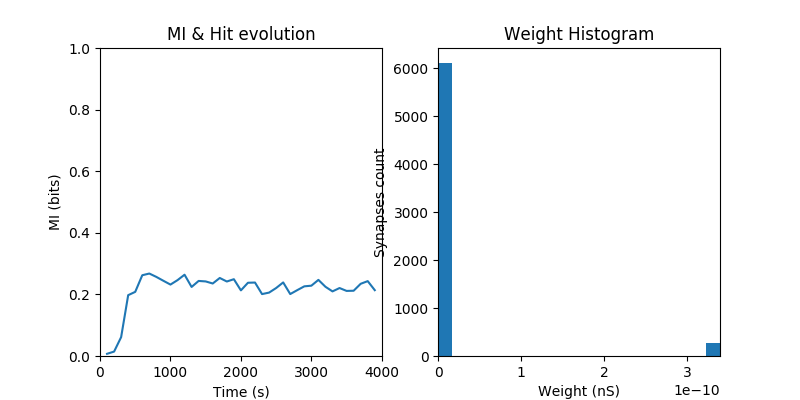

2018-06-03 23:51:39,504 - P11831 - MemTotal:1111M - Simulation - INFO: Running the simulation from 0.0s until time 100.0s
2018-06-03 23:51:39,525 - P11831 - MemTotal:1118M - Simulation - DEBUG: Running the simulation 0.136s until 0.136s
2018-06-03 23:51:39,726 - P11831 - MemTotal:1118M - Simulation - DEBUG: Simulation time is 0.199788808823 seconds. Real-time rate: 0.6807188090336824
2018-06-03 23:51:39,742 - P11831 - MemTotal:1118M - Simulation - DEBUG: Running the simulation 0.035s until 0.171s
2018-06-03 23:51:39,781 - P11831 - MemTotal:1118M - Simulation - DEBUG: Simulation time is 0.037575006485 seconds. Real-time rate: 0.9314702317878695
2018-06-03 23:51:39,797 - P11831 - MemTotal:1118M - Simulation - DEBUG: Running the simulation 0.028999999999999998s until 0.2s
2018-06-03 23:51:39,846 - P11831 - MemTotal:1118M - Simulation - DEBUG: Simulation time is 0.0467419624329 seconds. Real-time rate: 0.6204275235909207
2018-06-03 23:51:39,861 - P11831 - MemTotal:1118M - Simulation - DEBU

2018-06-03 23:51:47,753 - P11831 - MemTotal:1119M - Simulation - DEBUG: Running the simulation 0.5010000000000003s until 7.706000000000001s
2018-06-03 23:51:48,269 - P11831 - MemTotal:1119M - Simulation - DEBUG: Simulation time is 0.515136003494 seconds. Real-time rate: 0.9725586963474204
2018-06-03 23:51:48,285 - P11831 - MemTotal:1119M - Simulation - DEBUG: Running the simulation 0.07800000000000029s until 7.784000000000002s
2018-06-03 23:51:48,372 - P11831 - MemTotal:1119M - Simulation - DEBUG: Simulation time is 0.0850658416748 seconds. Real-time rate: 0.9169367923047637
2018-06-03 23:51:48,388 - P11831 - MemTotal:1119M - Simulation - DEBUG: Running the simulation 0.9500000000000002s until 8.734000000000002s
2018-06-03 23:51:49,375 - P11831 - MemTotal:1119M - Simulation - DEBUG: Simulation time is 0.985067129135 seconds. Real-time rate: 0.9644012797727604
2018-06-03 23:51:49,391 - P11831 - MemTotal:1119M - Simulation - DEBUG: Running the simulation 1.3719999999999999s until 10.1060

2018-06-03 23:51:55,238 - P11831 - MemTotal:1127M - Simulation - DEBUG: Running the simulation 0.02999999999999936s until 13.905000000000005s
2018-06-03 23:51:55,277 - P11831 - MemTotal:1127M - Simulation - DEBUG: Simulation time is 0.0373089313507 seconds. Real-time rate: 0.8040970061028042
2018-06-03 23:51:55,293 - P11831 - MemTotal:1127M - Simulation - DEBUG: Running the simulation 0.20500000000000007s until 14.110000000000005s
2018-06-03 23:51:55,502 - P11831 - MemTotal:1127M - Simulation - DEBUG: Simulation time is 0.207330942154 seconds. Real-time rate: 0.9887573840657127
2018-06-03 23:51:55,517 - P11831 - MemTotal:1127M - Simulation - DEBUG: Running the simulation 0.4870000000000001s until 14.597000000000005s
2018-06-03 23:51:56,010 - P11831 - MemTotal:1127M - Simulation - DEBUG: Simulation time is 0.490890979767 seconds. Real-time rate: 0.9920736376767533
2018-06-03 23:51:56,025 - P11831 - MemTotal:1127M - Simulation - DEBUG: Running the simulation 0.43599999999999994s until 15

2018-06-03 23:52:02,565 - P11831 - MemTotal:1127M - Simulation - DEBUG: Running the simulation 0.004000000000001336s until 20.557000000000013s
2018-06-03 23:52:02,572 - P11831 - MemTotal:1127M - Simulation - DEBUG: Simulation time is 0.00516700744629 seconds. Real-time rate: 0.7741424880032116
2018-06-03 23:52:02,588 - P11831 - MemTotal:1127M - Simulation - DEBUG: Running the simulation 0.1670000000000016s until 20.724000000000014s
2018-06-03 23:52:02,757 - P11831 - MemTotal:1127M - Simulation - DEBUG: Simulation time is 0.167474031448 seconds. Real-time rate: 0.9971695226760644
2018-06-03 23:52:02,772 - P11831 - MemTotal:1127M - Simulation - DEBUG: Running the simulation 0.02400000000000091s until 20.748000000000015s
2018-06-03 23:52:02,804 - P11831 - MemTotal:1127M - Simulation - DEBUG: Simulation time is 0.0297381877899 seconds. Real-time rate: 0.80704312480461
2018-06-03 23:52:02,820 - P11831 - MemTotal:1127M - Simulation - DEBUG: Running the simulation 0.2680000000000007s until 21

2018-06-03 23:52:12,238 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.512534856796 seconds. Real-time rate: 0.9970053611458556
2018-06-03 23:52:12,254 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.03900000000000148s until 29.68100000000001s
2018-06-03 23:52:12,298 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.0420029163361 seconds. Real-time rate: 0.9285069562305586
2018-06-03 23:52:12,314 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.16799999999999926s until 29.84900000000001s
2018-06-03 23:52:12,488 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.172309875488 seconds. Real-time rate: 0.9749876466681383
2018-06-03 23:52:12,504 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.4770000000000003s until 30.32600000000001s
2018-06-03 23:52:12,657 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.151418209076 seconds. Real-time ra

2018-06-03 23:52:19,824 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.572260856628 seconds. Real-time rate: 0.9943018003229728
2018-06-03 23:52:19,840 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.11899999999999977s until 36.698000000000015s
2018-06-03 23:52:19,957 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.115148067474 seconds. Real-time rate: 1.033451994550339
2018-06-03 23:52:19,973 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.027000000000001023s until 36.725000000000016s
2018-06-03 23:52:20,002 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.0278151035309 seconds. Real-time rate: 0.970695649937893
2018-06-03 23:52:20,018 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.014000000000002899s until 36.73900000000002s
2018-06-03 23:52:20,036 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.0162329673767 seconds. Real-tim

2018-06-03 23:52:26,881 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.055704832077 seconds. Real-time rate: 0.7180705606416474
2018-06-03 23:52:26,897 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.0660000000000025s until 43.090000000000025s
2018-06-03 23:52:26,963 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.0641779899597 seconds. Real-time rate: 1.0283899517798756
2018-06-03 23:52:26,979 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.3639999999999972s until 43.45400000000002s
2018-06-03 23:52:27,355 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.374337911606 seconds. Real-time rate: 0.972383476839174
2018-06-03 23:52:27,370 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.18500000000000227s until 43.639000000000024s
2018-06-03 23:52:27,560 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.187958955765 seconds. Real-time ra

2018-06-03 23:52:35,545 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.260010004044 seconds. Real-time rate: 0.9345794247181118
2018-06-03 23:52:35,561 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.5799999999999983s until 51.56000000000004s
2018-06-03 23:52:36,145 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.582344055176 seconds. Real-time rate: 0.995974793328876
2018-06-03 23:52:36,162 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.13300000000000267s until 51.69300000000004s
2018-06-03 23:52:36,304 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.140803098679 seconds. Real-time rate: 0.9445814846987258
2018-06-03 23:52:36,320 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.39000000000000057s until 52.08300000000004s
2018-06-03 23:52:36,718 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.396088838577 seconds. Real-time rate

2018-06-03 23:52:45,680 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.349138975143 seconds. Real-time rate: 0.9967377599623023
2018-06-03 23:52:45,696 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.14399999999999835s until 60.57800000000003s
2018-06-03 23:52:45,843 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.145577907562 seconds. Real-time rate: 0.9891610781561568
2018-06-03 23:52:45,859 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.10600000000000165s until 60.68400000000003s
2018-06-03 23:52:45,969 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.107575893402 seconds. Real-time rate: 0.9853508685611604
2018-06-03 23:52:45,985 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.07800000000000296s until 60.762000000000036s
2018-06-03 23:52:46,064 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.0776219367981 seconds. Real-time 

2018-06-03 23:52:52,077 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.12399999999999523s until 66.38300000000005s
2018-06-03 23:52:52,212 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.133599042892 seconds. Real-time rate: 0.928150361824165
2018-06-03 23:52:52,228 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.19400000000000261s until 66.57700000000006s
2018-06-03 23:52:52,422 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.192354202271 seconds. Real-time rate: 1.0085560788902357
2018-06-03 23:52:52,438 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.3960000000000008s until 66.97300000000006s
2018-06-03 23:52:52,834 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.394191026688 seconds. Real-time rate: 1.00458907785796
2018-06-03 23:52:52,849 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.30299999999999727s until 67.276000

2018-06-03 23:52:58,585 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.01300000000000523s until 72.1260000000001s
2018-06-03 23:52:58,601 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.0139200687408 seconds. Real-time rate: 0.9339034341016004
2018-06-03 23:52:58,617 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.22499999999999432s until 72.3510000000001s
2018-06-03 23:52:58,838 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.219601154327 seconds. Real-time rate: 1.0245847782045483
2018-06-03 23:52:58,855 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.18899999999999295s until 72.54000000000009s
2018-06-03 23:52:59,051 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.194411039352 seconds. Real-time rate: 0.9721670159757995
2018-06-03 23:52:59,069 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.0049999999999954525s until 72.5

2018-06-03 23:53:04,925 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.237779855728 seconds. Real-time rate: 1.0051314030287322
2018-06-03 23:53:04,941 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.35599999999999454s until 78.27700000000007s
2018-06-03 23:53:05,300 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.35707616806 seconds. Real-time rate: 0.9969861666597518
2018-06-03 23:53:05,315 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.3469999999999942s until 78.62400000000007s
2018-06-03 23:53:05,664 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.346570014954 seconds. Real-time rate: 1.0012406873873334
2018-06-03 23:53:05,679 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.23900000000000432s until 78.86300000000007s
2018-06-03 23:53:05,928 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.247395038605 seconds. Real-time rate

2018-06-03 23:53:13,189 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 1.40927195549 seconds. Real-time rate: 0.9948399203845774
2018-06-03 23:53:13,204 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.04000000000000625s until 85.51900000000008s
2018-06-03 23:53:13,245 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.0386168956757 seconds. Real-time rate: 1.0358160411433295
2018-06-03 23:53:13,260 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.2950000000000017s until 85.81400000000008s
2018-06-03 23:53:13,551 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.288969993591 seconds. Real-time rate: 1.020867240690815
2018-06-03 23:53:13,566 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.6099999999999994s until 86.42400000000008s
2018-06-03 23:53:14,184 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.616488933563 seconds. Real-time rate:

2018-06-03 23:53:19,812 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.764048099518 seconds. Real-time rate: 0.9920841377373446
2018-06-03 23:53:19,829 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.018000000000000682s until 91.48600000000006s
2018-06-03 23:53:19,852 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.0207769870758 seconds. Real-time rate: 0.8663431292673459
2018-06-03 23:53:19,868 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.03300000000000125s until 91.51900000000006s
2018-06-03 23:53:19,903 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.0337429046631 seconds. Real-time rate: 0.9779833813804
2018-06-03 23:53:19,919 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.24800000000000466s until 91.76700000000007s
2018-06-03 23:53:20,185 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.263541936874 seconds. Real-time ra

2018-06-03 23:53:25,787 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.16800000000000637s until 96.93200000000007s
2018-06-03 23:53:25,957 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.167724847794 seconds. Real-time rate: 1.0016404975771145
2018-06-03 23:53:25,972 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.6380000000000052s until 97.57000000000008s
2018-06-03 23:53:26,630 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.656393051147 seconds. Real-time rate: 0.9719786016696821
2018-06-03 23:53:26,647 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.257000000000005s until 97.82700000000008s
2018-06-03 23:53:26,907 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.259215116501 seconds. Real-time rate: 0.9914545242162134
2018-06-03 23:53:26,923 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.5619999999999976s until 98.389000

2018-06-03 23:53:31,322 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.590999999999994s until 101.25400000000008s
2018-06-03 23:53:31,925 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.601476192474 seconds. Real-time rate: 0.9825825317685908
2018-06-03 23:53:31,940 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.08299999999999841s until 101.33700000000007s
2018-06-03 23:53:32,025 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.0825228691101 seconds. Real-time rate: 1.0057818020027196
2018-06-03 23:53:32,041 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.036000000000001364s until 101.37300000000008s
2018-06-03 23:53:32,112 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.0694668292999 seconds. Real-time rate: 0.518232951795877
2018-06-03 23:53:32,128 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.4939999999999998s until 101

2018-06-03 23:53:39,756 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.0421659946442 seconds. Real-time rate: 0.8774843404559941
2018-06-03 23:53:39,772 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.5769999999999982s until 108.98800000000011s
2018-06-03 23:53:40,351 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.577220916748 seconds. Real-time rate: 0.9996172752205632
2018-06-03 23:53:40,367 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.04099999999999682s until 109.02900000000011s
2018-06-03 23:53:40,411 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.0426499843597 seconds. Real-time rate: 0.961313365420554
2018-06-03 23:53:40,426 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.24899999999999523s until 109.2780000000001s
2018-06-03 23:53:40,681 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.252413034439 seconds. Real-time 

2018-06-03 23:53:47,484 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.146025896072 seconds. Real-time rate: 1.006670761514348
2018-06-03 23:53:47,499 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.17799999999999727s until 115.69400000000013s
2018-06-03 23:53:47,680 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.178864002228 seconds. Real-time rate: 0.9951695018727937
2018-06-03 23:53:47,695 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.4689999999999941s until 116.16300000000012s
2018-06-03 23:53:48,158 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.461068153381 seconds. Real-time rate: 1.0172031977495657
2018-06-03 23:53:48,174 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.06300000000000239s until 116.22600000000013s
2018-06-03 23:53:48,239 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.0632059574127 seconds. Real-time 

2018-06-03 23:53:55,529 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.261212825775 seconds. Real-time rate: 0.995356944010914
2018-06-03 23:53:55,544 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.05500000000000682s until 122.89700000000018s
2018-06-03 23:53:55,606 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.0604169368744 seconds. Real-time rate: 0.910340756174962
2018-06-03 23:53:55,622 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.0870000000000033s until 122.98400000000018s
2018-06-03 23:53:55,724 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.100824117661 seconds. Real-time rate: 0.8628887811637951
2018-06-03 23:53:55,740 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.29399999999999693s until 123.27800000000018s
2018-06-03 23:53:56,036 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.294190168381 seconds. Real-time r

2018-06-03 23:54:03,016 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.15799999999998704s until 129.85900000000015s
2018-06-03 23:54:03,181 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.162963151932 seconds. Real-time rate: 0.9695443302799281
2018-06-03 23:54:03,198 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.09999999999999432s until 129.95900000000015s
2018-06-03 23:54:03,300 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.0998480319977 seconds. Real-time rate: 1.0015219929654415
2018-06-03 23:54:03,315 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.09399999999999409s until 130.05300000000014s
2018-06-03 23:54:03,360 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.0438189506531 seconds. Real-time rate: 0.9356682300418445
2018-06-03 23:54:03,362 - P11831 - MemTotal:1129M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-0

2018-06-03 23:54:08,701 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.1419999999999959s until 134.89800000000017s
2018-06-03 23:54:08,851 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.149119853973 seconds. Real-time rate: 0.9522541513844069
2018-06-03 23:54:08,870 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.4099999999999966s until 135.30800000000016s
2018-06-03 23:54:09,295 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.424178123474 seconds. Real-time rate: 0.9665750714393231
2018-06-03 23:54:09,311 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.39500000000001023s until 135.70300000000017s
2018-06-03 23:54:09,702 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.389286994934 seconds. Real-time rate: 1.0146755610649043
2018-06-03 23:54:09,718 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.18199999999998795s until 135.

2018-06-03 23:54:16,096 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.09999999999999432s until 141.59800000000018s
2018-06-03 23:54:16,197 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.0992369651794 seconds. Real-time rate: 1.007689018090902
2018-06-03 23:54:16,213 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.48099999999999454s until 142.07900000000018s
2018-06-03 23:54:16,692 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.477214097977 seconds. Real-time rate: 1.0079333406941697
2018-06-03 23:54:16,707 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.046999999999997044s until 142.12600000000018s
2018-06-03 23:54:16,762 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.0528769493103 seconds. Real-time rate: 0.8888561199736119
2018-06-03 23:54:16,778 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.020000000000010232s until

2018-06-03 23:54:22,917 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.00980091094971 seconds. Real-time rate: 0.612187992604869
2018-06-03 23:54:22,932 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.008000000000009777s until 147.76900000000023s
2018-06-03 23:54:22,944 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.0102119445801 seconds. Real-time rate: 0.783396339186613
2018-06-03 23:54:22,960 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.036000000000001364s until 147.80500000000023s
2018-06-03 23:54:22,999 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.0371849536896 seconds. Real-time rate: 0.9681335171352914
2018-06-03 23:54:23,014 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.32499999999998863s until 148.13000000000022s
2018-06-03 23:54:23,346 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.329777002335 seconds. Real-

2018-06-03 23:54:30,007 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.232075929642 seconds. Real-time rate: 0.9178030669911396
2018-06-03 23:54:30,022 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.7450000000000045s until 154.93900000000025s
2018-06-03 23:54:30,768 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.743571996689 seconds. Real-time rate: 1.0019204640808432
2018-06-03 23:54:30,783 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.14500000000001023s until 155.08400000000026s
2018-06-03 23:54:30,932 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.147142887115 seconds. Real-time rate: 0.9854366924730344
2018-06-03 23:54:30,947 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.18299999999999272s until 155.26700000000025s
2018-06-03 23:54:31,138 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.188802957535 seconds. Real-time 

2018-06-03 23:54:37,675 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 1.02349281311 seconds. Real-time rate: 0.9379645735690204
2018-06-03 23:54:37,691 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.09499999999999886s until 161.24900000000028s
2018-06-03 23:54:37,790 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.0971159934998 seconds. Real-time rate: 0.9782116886878955
2018-06-03 23:54:37,806 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.18999999999999773s until 161.43900000000028s
2018-06-03 23:54:37,993 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.184955120087 seconds. Real-time rate: 1.027276238208295
2018-06-03 23:54:38,008 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.12000000000000455s until 161.55900000000028s
2018-06-03 23:54:38,133 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.123409986496 seconds. Real-time 

2018-06-03 23:54:45,306 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.05299999999999727s until 168.1370000000003s
2018-06-03 23:54:45,378 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.0695819854736 seconds. Real-time rate: 0.7616914010032227
2018-06-03 23:54:45,394 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.3019999999999925s until 168.4390000000003s
2018-06-03 23:54:45,741 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.344560146332 seconds. Real-time rate: 0.8764797763615639
2018-06-03 23:54:45,757 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.08099999999998886s until 168.5200000000003s
2018-06-03 23:54:45,839 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.0804409980774 seconds. Real-time rate: 1.0069492166427183
2018-06-03 23:54:45,854 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.14500000000001023s until 168.

2018-06-03 23:54:51,316 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.21000000000000796s until 173.55200000000028s
2018-06-03 23:54:51,538 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.220273971558 seconds. Real-time rate: 0.9533582134786095
2018-06-03 23:54:51,554 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.1980000000000075s until 173.75000000000028s
2018-06-03 23:54:51,754 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.197635889053 seconds. Real-time rate: 1.0018423321209868
2018-06-03 23:54:51,769 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.09100000000000819s until 173.8410000000003s
2018-06-03 23:54:51,869 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.097934961319 seconds. Real-time rate: 0.929188093551447
2018-06-03 23:54:51,885 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.022999999999996135s until 173.

2018-06-03 23:54:59,940 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.16800000000000637s until 181.53300000000027s
2018-06-03 23:55:00,139 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.19771194458 seconds. Real-time rate: 0.8497210442030846
2018-06-03 23:55:00,158 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.08500000000000796s until 181.61800000000028s
2018-06-03 23:55:00,245 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.0852320194244 seconds. Real-time rate: 0.9972777903656711
2018-06-03 23:55:00,260 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.4159999999999968s until 182.03400000000028s
2018-06-03 23:55:00,685 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.422325849533 seconds. Real-time rate: 0.9850214010341114
2018-06-03 23:55:00,700 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.08799999999999386s until 182

2018-06-03 23:55:08,459 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.176758050919 seconds. Real-time rate: 1.0183411678539105
2018-06-03 23:55:08,474 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.6800000000000068s until 189.94400000000024s
2018-06-03 23:55:09,175 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.69834280014 seconds. Real-time rate: 0.9737338164914326
2018-06-03 23:55:09,190 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.007000000000005002s until 189.95100000000025s
2018-06-03 23:55:09,199 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.00790691375732 seconds. Real-time rate: 0.8853011699439447
2018-06-03 23:55:09,215 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.07699999999999818s until 190.02800000000025s
2018-06-03 23:55:09,266 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.0495040416718 seconds. Real-ti

2018-06-03 23:55:14,991 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.0286259651184 seconds. Real-time rate: 0.6637330801394473
2018-06-03 23:55:15,007 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.7110000000000127s until 195.8890000000003s
2018-06-03 23:55:15,723 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.714524030685 seconds. Real-time rate: 0.9950680025666435
2018-06-03 23:55:15,738 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.13800000000000523s until 196.0270000000003s
2018-06-03 23:55:15,878 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.138024806976 seconds. Real-time rate: 0.9998202716101796
2018-06-03 23:55:15,894 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.3439999999999941s until 196.3710000000003s
2018-06-03 23:55:16,235 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.339381933212 seconds. Real-time rat

2018-06-03 23:55:20,317 - P11831 - MemTotal:1129M - Simulation - INFO: Individual pattern false alarm matrix:
2018-06-03 23:55:20,318 - P11831 - MemTotal:1129M - Simulation - INFO: [[0.76835237 0.67373573 0.80424144 0.69331158 0.77161501 0.82707993
  0.67536705 0.76508972 0.7177814  0.76508972 0.67862969 0.78466558
  0.72430669 0.77487765 0.60195759 0.52365416 0.67862969 0.31647635
  0.63295269 0.6182708  0.72104405 0.80587276 0.55628059 0.76508972
  0.57585644 0.40293638 0.75367047 0.57585644 0.65089723 0.75040783
  0.77487765 0.73735726]]
2018-06-03 23:55:20,320 - P11831 - MemTotal:1129M - Simulation - DEBUG: Shannon entropy of the patterns: [0.78449133]
2018-06-03 23:55:20,321 - P11831 - MemTotal:1129M - Simulation - DEBUG: Shannon entropy of the population response: [0.81910718 0.86382773 0.78874835 0.85714844 0.77362772 0.64320574
 0.88281353 0.78662611 0.836032   0.84502915 0.89026653 0.73425334
 0.83785438 0.74858985 0.97095059 0.99761373 0.90573561 0.97095059
 0.96064753 0.9506

2018-06-03 23:55:31,048 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.21999999999999886s until 209.20100000000036s
2018-06-03 23:55:31,274 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.224929094315 seconds. Real-time rate: 0.978086008261418
2018-06-03 23:55:31,290 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.22100000000000364s until 209.42200000000037s
2018-06-03 23:55:31,521 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.229025125504 seconds. Real-time rate: 0.96495962839932
2018-06-03 23:55:31,536 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.12899999999999068s until 209.55100000000036s
2018-06-03 23:55:31,663 - P11831 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 0.125248908997 seconds. Real-time rate: 1.0299490912412739
2018-06-03 23:55:31,679 - P11831 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.07099999999999795s until 209.6

2018-06-03 23:55:38,384 - P11831 - MemTotal:1130M - Simulation - DEBUG: Running the simulation 0.15100000000001046s until 215.7310000000003s
2018-06-03 23:55:38,538 - P11831 - MemTotal:1130M - Simulation - DEBUG: Simulation time is 0.152570962906 seconds. Real-time rate: 0.9897033952204758
2018-06-03 23:55:38,554 - P11831 - MemTotal:1130M - Simulation - DEBUG: Running the simulation 0.2560000000000002s until 215.9870000000003s
2018-06-03 23:55:38,809 - P11831 - MemTotal:1130M - Simulation - DEBUG: Simulation time is 0.253355979919 seconds. Real-time rate: 1.0104359884515353
2018-06-03 23:55:38,836 - P11831 - MemTotal:1130M - Simulation - DEBUG: Running the simulation 0.5600000000000023s until 216.5470000000003s
2018-06-03 23:55:39,393 - P11831 - MemTotal:1130M - Simulation - DEBUG: Simulation time is 0.555872917175 seconds. Real-time rate: 1.007424507827583
2018-06-03 23:55:39,408 - P11831 - MemTotal:1130M - Simulation - DEBUG: Running the simulation 0.4259999999999877s until 216.97300

2018-06-03 23:55:45,786 - P11831 - MemTotal:1130M - Simulation - DEBUG: Running the simulation 0.03299999999998704s until 222.45700000000028s
2018-06-03 23:55:45,829 - P11831 - MemTotal:1130M - Simulation - DEBUG: Simulation time is 0.0409660339355 seconds. Real-time rate: 0.8055453952878855
2018-06-03 23:55:45,844 - P11831 - MemTotal:1130M - Simulation - DEBUG: Running the simulation 0.42099999999999227s until 222.87800000000027s
2018-06-03 23:55:46,281 - P11831 - MemTotal:1130M - Simulation - DEBUG: Simulation time is 0.43491101265 seconds. Real-time rate: 0.968014117267815
2018-06-03 23:55:46,296 - P11831 - MemTotal:1130M - Simulation - DEBUG: Running the simulation 0.132000000000005s until 223.01000000000028s
2018-06-03 23:55:46,430 - P11831 - MemTotal:1130M - Simulation - DEBUG: Simulation time is 0.132498979568 seconds. Real-time rate: 0.9962340874616431
2018-06-03 23:55:46,446 - P11831 - MemTotal:1130M - Simulation - DEBUG: Running the simulation 0.02199999999999136s until 223.0

2018-06-03 23:55:53,659 - P11831 - MemTotal:1130M - Simulation - DEBUG: Simulation time is 0.807283878326 seconds. Real-time rate: 1.0293776728487862
2018-06-03 23:55:53,674 - P11831 - MemTotal:1130M - Simulation - DEBUG: Running the simulation 0.036000000000001364s until 229.65000000000026s
2018-06-03 23:55:53,712 - P11831 - MemTotal:1130M - Simulation - DEBUG: Simulation time is 0.0362339019775 seconds. Real-time rate: 0.9935446649471346
2018-06-03 23:55:53,728 - P11831 - MemTotal:1130M - Simulation - DEBUG: Running the simulation 0.20199999999999818s until 229.85200000000026s
2018-06-03 23:55:53,930 - P11831 - MemTotal:1130M - Simulation - DEBUG: Simulation time is 0.200453042984 seconds. Real-time rate: 1.0077173037283988
2018-06-03 23:55:53,946 - P11831 - MemTotal:1130M - Simulation - DEBUG: Running the simulation 0.21000000000000796s until 230.06200000000027s
2018-06-03 23:55:54,094 - P11831 - MemTotal:1130M - Simulation - DEBUG: Simulation time is 0.146479129791 seconds. Real-ti

2018-06-03 23:56:03,163 - P11831 - MemTotal:1126M - Simulation - DEBUG: Simulation time is 0.0543460845947 seconds. Real-time rate: 1.0304330186363697
2018-06-03 23:56:03,179 - P11831 - MemTotal:1126M - Simulation - DEBUG: Running the simulation 0.6539999999999964s until 238.78000000000026s
2018-06-03 23:56:03,839 - P11831 - MemTotal:1126M - Simulation - DEBUG: Simulation time is 0.658211946487 seconds. Real-time rate: 0.9936009267077154
2018-06-03 23:56:03,855 - P11831 - MemTotal:1126M - Simulation - DEBUG: Running the simulation 0.21700000000001296s until 238.99700000000027s
2018-06-03 23:56:04,076 - P11831 - MemTotal:1126M - Simulation - DEBUG: Simulation time is 0.219146966934 seconds. Real-time rate: 0.9902030725579892
2018-06-03 23:56:04,094 - P11831 - MemTotal:1126M - Simulation - DEBUG: Running the simulation 0.23699999999999477s until 239.23400000000026s
2018-06-03 23:56:04,346 - P11831 - MemTotal:1126M - Simulation - DEBUG: Simulation time is 0.250540971756 seconds. Real-time

2018-06-03 23:56:10,898 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.139969110489 seconds. Real-time rate: 1.014509555029754
2018-06-03 23:56:10,914 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.570999999999998s until 245.8580000000003s
2018-06-03 23:56:11,494 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.578891038895 seconds. Real-time rate: 0.9863686974500026
2018-06-03 23:56:11,510 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.015999999999991132s until 245.87400000000028s
2018-06-03 23:56:11,539 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.0267360210419 seconds. Real-time rate: 0.5984435744920394
2018-06-03 23:56:11,555 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.7270000000000039s until 246.60100000000028s
2018-06-03 23:56:12,283 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.725665092468 seconds. Real-time ra

2018-06-03 23:56:19,168 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.0163180828094 seconds. Real-time rate: 0.0612817088675252
2018-06-03 23:56:19,184 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.06200000000001182s until 252.93300000000025s
2018-06-03 23:56:19,253 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.0676910877228 seconds. Real-time rate: 0.9159255979742305
2018-06-03 23:56:19,270 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.6910000000000025s until 253.62400000000025s
2018-06-03 23:56:19,970 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.698204040527 seconds. Real-time rate: 0.989682041195436
2018-06-03 23:56:19,985 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.5380000000000109s until 254.16200000000026s
2018-06-03 23:56:20,525 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.53759598732 seconds. Real-time r

2018-06-03 23:56:28,122 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.569357872009 seconds. Real-time rate: 0.7973895195263236
2018-06-03 23:56:28,138 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.13999999999998636s until 261.09800000000035s
2018-06-03 23:56:28,302 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.161881923676 seconds. Real-time rate: 0.8648278746711147
2018-06-03 23:56:28,320 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.04399999999998272s until 261.14200000000034s
2018-06-03 23:56:28,400 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.0778279304504 seconds. Real-time rate: 0.5653497368531695
2018-06-03 23:56:28,416 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.03899999999998727s until 261.1810000000003s
2018-06-03 23:56:28,472 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.0541379451752 seconds. Real-tim

2018-06-03 23:56:38,102 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.08600000000001273s until 269.2630000000003s
2018-06-03 23:56:38,202 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.0978000164032 seconds. Real-time rate: 0.8793454557866554
2018-06-03 23:56:38,218 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.07799999999997453s until 269.3410000000003s
2018-06-03 23:56:38,303 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.0826909542084 seconds. Real-time rate: 0.9432712531460371
2018-06-03 23:56:38,318 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.02800000000002001s until 269.3690000000003s
2018-06-03 23:56:38,347 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.0279631614685 seconds. Real-time rate: 1.001317395086233
2018-06-03 23:56:38,363 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.18400000000002592s until 269

2018-06-03 23:56:44,596 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.15100000000001046s until 275.2180000000003s
2018-06-03 23:56:44,755 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.157100200653 seconds. Real-time rate: 0.9611700008802868
2018-06-03 23:56:44,771 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.242999999999995s until 275.4610000000003s
2018-06-03 23:56:45,019 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.246068000793 seconds. Real-time rate: 0.9875318985663755
2018-06-03 23:56:45,035 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.22100000000000364s until 275.6820000000003s
2018-06-03 23:56:45,261 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.224981069565 seconds. Real-time rate: 0.9823048687051036
2018-06-03 23:56:45,277 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.5169999999999959s until 276.1990

2018-06-03 23:56:50,354 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.0159080028534 seconds. Real-time rate: 0.9429216311993206
2018-06-03 23:56:50,356 - P11831 - MemTotal:1132M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-06-03 23:56:50,358 - P11831 - MemTotal:1132M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-06-03 23:56:50,504 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.109997034073 seconds. Real-time rate: 0.8727508046875349
2018-06-03 23:56:50,521 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.23599999999999s until 280.33200000000033s
2018-06-03 23:56:50,926 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.403131008148 seconds. Real-time rate: 0.5854176315636702
2018-06-03 23:56:50,943 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.021000000000015007s until 280.35300000000035s
2018-06

2018-06-03 23:57:02,838 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.210038900375 seconds. Real-time rate: 0.9950537715941838
2018-06-03 23:57:02,855 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.257000000000005s until 288.6120000000005s
2018-06-03 23:57:03,115 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.25804901123 seconds. Real-time rate: 0.9959348372409501
2018-06-03 23:57:03,130 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.01999999999998181s until 288.63200000000046s
2018-06-03 23:57:03,154 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.021742105484 seconds. Real-time rate: 0.9198741131438126
2018-06-03 23:57:03,169 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.19200000000000728s until 288.82400000000047s
2018-06-03 23:57:03,361 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.189439058304 seconds. Real-time rat

2018-06-03 23:57:08,306 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.0637710094452 seconds. Real-time rate: 0.8781419721466658
2018-06-03 23:57:08,321 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.012000000000000455s until 293.01600000000036s
2018-06-03 23:57:08,335 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.0126469135284 seconds. Real-time rate: 0.9488481100952382
2018-06-03 23:57:08,353 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.09300000000001774s until 293.1090000000004s
2018-06-03 23:57:08,446 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.091502904892 seconds. Real-time rate: 1.0163611757442836
2018-06-03 23:57:08,462 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.6480000000000246s until 293.7570000000004s
2018-06-03 23:57:09,119 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.655380010605 seconds. Real-time

2018-06-03 23:57:15,905 - P11831 - MemTotal:1132M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-06-03 23:57:15,908 - P11831 - MemTotal:1132M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-06-03 23:57:15,941 - P11831 - MemTotal:1132M - Simulation - INFO: Analyzing individual mutual information in section individual_mutual_information
2018-06-03 23:57:15,965 - P11831 - MemTotal:1132M - Simulation - INFO: Analyzing mutual information from time 200.0 to 300.0 seconds
2018-06-03 23:57:15,968 - P11831 - MemTotal:1132M - Simulation - INFO: Average firing rate in MI analysis: 4.6296875Hz
2018-06-03 23:57:15,973 - P11831 - MemTotal:1132M - Simulation - INFO: Individual pattern hit matrix:
2018-06-03 23:57:15,974 - P11831 - MemTotal:1132M - Simulation - INFO: [[0.64251208 0.93236715 0.68115942 0.7826087  0.79227053 0.93236715
  0.57487923 0.76328502 0.63768116 0.65217391 0.61835749 0.78743961
  0.57487923 0.82125604 0.5

2018-06-03 23:57:21,805 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.5400000000000205s until 304.82000000000045s
2018-06-03 23:57:22,343 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.536342144012 seconds. Real-time rate: 1.006820004783149
2018-06-03 23:57:22,359 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.17599999999998772s until 304.99600000000044s
2018-06-03 23:57:22,529 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.169247150421 seconds. Real-time rate: 1.0398993398827798
2018-06-03 23:57:22,545 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.146000000000015s until 305.14200000000045s
2018-06-03 23:57:22,698 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.150902986526 seconds. Real-time rate: 0.9675090159622945
2018-06-03 23:57:22,714 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.4359999999999786s until 305.578

2018-06-03 23:57:30,706 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.3340000000000032s until 312.8490000000004s
2018-06-03 23:57:31,043 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.33522605896 seconds. Real-time rate: 0.9963425905379742
2018-06-03 23:57:31,058 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.48799999999999955s until 313.3370000000004s
2018-06-03 23:57:31,543 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.483726024628 seconds. Real-time rate: 1.0088355291109334
2018-06-03 23:57:31,561 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.3129999999999882s until 313.6500000000004s
2018-06-03 23:57:31,892 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.329250097275 seconds. Real-time rate: 0.95064512536429
2018-06-03 23:57:31,908 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.04099999999999682s until 313.691000

2018-06-03 23:57:38,834 - P11831 - MemTotal:1132M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-06-03 23:57:39,014 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.147133111954 seconds. Real-time rate: 0.7748085966958956
2018-06-03 23:57:39,030 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.33300000000002683s until 320.4470000000004s
2018-06-03 23:57:39,380 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.347487926483 seconds. Real-time rate: 0.9583066766383613
2018-06-03 23:57:39,395 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.42099999999999227s until 320.8680000000004s
2018-06-03 23:57:39,822 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.425579071045 seconds. Real-time rate: 0.9892403753932574
2018-06-03 23:57:39,839 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.117999999999995s until 320.

2018-06-03 23:57:47,529 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.38694691658 seconds. Real-time rate: 0.9381131737866237
2018-06-03 23:57:47,544 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.07799999999997453s until 328.0600000000003s
2018-06-03 23:57:47,627 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.0816628932953 seconds. Real-time rate: 0.9551461729127236
2018-06-03 23:57:47,643 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.26600000000001955s until 328.3260000000003s
2018-06-03 23:57:47,915 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.271242856979 seconds. Real-time rate: 0.9806709860022256
2018-06-03 23:57:47,931 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.34699999999998s until 328.6730000000003s
2018-06-03 23:57:48,277 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.343816041946 seconds. Real-time rate:

2018-06-03 23:57:52,036 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.319554805756 seconds. Real-time rate: 0.9732289873237612
2018-06-03 23:57:52,053 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.3140000000000214s until 332.14100000000025s
2018-06-03 23:57:52,369 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.314440011978 seconds. Real-time rate: 0.9986006488952855
2018-06-03 23:57:52,385 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.06799999999998363s until 332.20900000000023s
2018-06-03 23:57:52,456 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.068717956543 seconds. Real-time rate: 0.9895521261238874
2018-06-03 23:57:52,472 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.10300000000000864s until 332.31200000000024s
2018-06-03 23:57:52,579 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.105094909668 seconds. Real-time 

2018-06-03 23:57:59,084 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.3450000000000273s until 338.5690000000002s
2018-06-03 23:57:59,440 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.353901147842 seconds. Real-time rate: 0.9748484911771361
2018-06-03 23:57:59,456 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.26200000000000045s until 338.8310000000002s
2018-06-03 23:57:59,719 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.261468172073 seconds. Real-time rate: 1.0020340063665072
2018-06-03 23:57:59,736 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.42500000000001137s until 339.2560000000002s
2018-06-03 23:58:00,168 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.431054830551 seconds. Real-time rate: 0.9859534562148523
2018-06-03 23:58:00,185 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.2980000000000018s until 339.554

2018-06-03 23:58:04,800 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.04800000000000182s until 343.3320000000001s
2018-06-03 23:58:04,852 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.0500960350037 seconds. Real-time rate: 0.9581596626657766
2018-06-03 23:58:04,868 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.05099999999998772s until 343.3830000000001s
2018-06-03 23:58:04,939 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.0691571235657 seconds. Real-time rate: 0.7374511456011683
2018-06-03 23:58:04,957 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.4379999999999882s until 343.8210000000001s
2018-06-03 23:58:05,413 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.454260110855 seconds. Real-time rate: 0.9642052857678693
2018-06-03 23:58:05,430 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.07400000000001228s until 343.

2018-06-03 23:58:12,425 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.25s until 350.4590000000001s
2018-06-03 23:58:12,669 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.242385149002 seconds. Real-time rate: 1.0314163265747756
2018-06-03 23:58:12,685 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.04399999999998272s until 350.5030000000001s
2018-06-03 23:58:12,756 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.0696890354156 seconds. Real-time rate: 0.6313762234984537
2018-06-03 23:58:12,772 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.20299999999997453s until 350.7060000000001s
2018-06-03 23:58:12,982 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.208878993988 seconds. Real-time rate: 0.9718545466165962
2018-06-03 23:58:12,998 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.060000000000002274s until 350.7660000000001s

2018-06-03 23:58:19,900 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.904423952103 seconds. Real-time rate: 0.9973198939534508
2018-06-03 23:58:19,916 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.6229999999999905s until 357.48600000000005s
2018-06-03 23:58:20,550 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.632359981537 seconds. Real-time rate: 0.985198333528117
2018-06-03 23:58:20,566 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.09699999999997999s until 357.583s
2018-06-03 23:58:20,666 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.0986430644989 seconds. Real-time rate: 0.9833433348074899
2018-06-03 23:58:20,681 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.19200000000000728s until 357.77500000000003s
2018-06-03 23:58:20,891 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.208070993423 seconds. Real-time rate: 0.922

2018-06-03 23:58:28,307 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.382946968079 seconds. Real-time rate: 0.9009080336398014
2018-06-03 23:58:28,323 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.45699999999999363s until 364.97400000000016s
2018-06-03 23:58:28,769 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.444113016129 seconds. Real-time rate: 1.0290173523482673
2018-06-03 23:58:28,784 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.36299999999999955s until 365.33700000000016s
2018-06-03 23:58:29,148 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.361999034882 seconds. Real-time rate: 1.0027651043841461
2018-06-03 23:58:29,163 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.08699999999998909s until 365.42400000000015s
2018-06-03 23:58:29,266 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.101047039032 seconds. Real-time

2018-06-03 23:58:35,836 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.0247700214386 seconds. Real-time rate: 0.8881704060905331
2018-06-03 23:58:35,852 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.41100000000000136s until 371.831s
2018-06-03 23:58:36,269 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.415710926056 seconds. Real-time rate: 0.9886677838838586
2018-06-03 23:58:36,285 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.04199999999997317s until 371.873s
2018-06-03 23:58:36,328 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.0415120124817 seconds. Real-time rate: 1.0117553327124038
2018-06-03 23:58:36,343 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.132000000000005s until 372.005s
2018-06-03 23:58:36,494 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.149454116821 seconds. Real-time rate: 0.8832142118764453
2018-06

2018-06-03 23:58:43,290 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.0730910301208 seconds. Real-time rate: 0.9850729957008
2018-06-03 23:58:43,306 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.03100000000000591s until 378.21199999999993s
2018-06-03 23:58:43,339 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.0319230556488 seconds. Real-time rate: 0.9710849845029672
2018-06-03 23:58:43,356 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.02400000000000091s until 378.23599999999993s
2018-06-03 23:58:43,382 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.0247061252594 seconds. Real-time rate: 0.9714190205066713
2018-06-03 23:58:43,398 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.38700000000000045s until 378.62299999999993s
2018-06-03 23:58:43,787 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.387411832809 seconds. Real-time

2018-06-03 23:58:50,599 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.0591750144958 seconds. Real-time rate: 0.8787492566422281
2018-06-03 23:58:50,615 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 1.0260000000000105s until 385.881s
2018-06-03 23:58:51,641 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 1.02380013466 seconds. Real-time rate: 1.0021487253876267
2018-06-03 23:58:51,657 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.29000000000002046s until 386.171s
2018-06-03 23:58:51,957 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.298454999924 seconds. Real-time rate: 0.971670771386484
2018-06-03 23:58:51,972 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.005999999999971806s until 386.17699999999996s
2018-06-03 23:58:51,981 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.00690793991089 seconds. Real-time rate: 0.868565748598

2018-06-03 23:58:59,099 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.131964921951 seconds. Real-time rate: 0.8865992437232781
2018-06-03 23:58:59,115 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.012999999999976808s until 392.66500000000013s
2018-06-03 23:58:59,136 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.0202040672302 seconds. Real-time rate: 0.6434348021040656
2018-06-03 23:58:59,152 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.146000000000015s until 392.81100000000015s
2018-06-03 23:58:59,301 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.147058963776 seconds. Real-time rate: 0.9927990531931437
2018-06-03 23:58:59,316 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.26900000000000546s until 393.08000000000015s
2018-06-03 23:58:59,580 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.262813091278 seconds. Real-time

2018-06-03 23:59:05,226 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.16800000000000637s until 398.23400000000015s
2018-06-03 23:59:05,405 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.17720413208 seconds. Real-time rate: 0.9480591565668884
2018-06-03 23:59:05,421 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.132000000000005s until 398.36600000000016s
2018-06-03 23:59:05,554 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.131854057312 seconds. Real-time rate: 1.001106850187006
2018-06-03 23:59:05,570 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.08800000000002228s until 398.4540000000002s
2018-06-03 23:59:05,661 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.0885379314423 seconds. Real-time rate: 0.9939242826947084
2018-06-03 23:59:05,676 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.20100000000002183s until 398.65

2018-06-03 23:59:10,335 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.21199999999998909s until 401.8090000000002s
2018-06-03 23:59:10,547 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.210213899612 seconds. Real-time rate: 1.0084965855771448
2018-06-03 23:59:10,564 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 1.3179999999999836s until 403.1270000000002s
2018-06-03 23:59:11,889 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 1.32365202904 seconds. Real-time rate: 0.9957299736535727
2018-06-03 23:59:11,905 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.002999999999985903s until 403.13000000000017s
2018-06-03 23:59:11,910 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.00406098365784 seconds. Real-time rate: 0.7387372746985776
2018-06-03 23:59:11,926 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.18500000000000227s until 403

2018-06-03 23:59:18,864 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.220872879028 seconds. Real-time rate: 1.0005755390713544
2018-06-03 23:59:18,880 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.37000000000000455s until 409.88000000000005s
2018-06-03 23:59:19,247 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.365494966507 seconds. Real-time rate: 1.012325842777265
2018-06-03 23:59:19,264 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.2610000000000241s until 410.1410000000001s
2018-06-03 23:59:19,392 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.126216888428 seconds. Real-time rate: 0.9507444011238944
2018-06-03 23:59:19,394 - P11831 - MemTotal:1133M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-06-03 23:59:19,396 - P11831 - MemTotal:1133M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-06-0

2018-06-03 23:59:26,026 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.263618946075 seconds. Real-time rate: 0.9255783912063857
2018-06-03 23:59:26,041 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.2370000000000232s until 416.21300000000025s
2018-06-03 23:59:26,291 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.247545957565 seconds. Real-time rate: 0.9573979810900277
2018-06-03 23:59:26,306 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.46800000000001774s until 416.68100000000027s
2018-06-03 23:59:26,787 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.478989124298 seconds. Real-time rate: 0.9770576747140527
2018-06-03 23:59:26,802 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.1519999999999868s until 416.83300000000025s
2018-06-03 23:59:26,967 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.162953138351 seconds. Real-time r

2018-06-03 23:59:33,177 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.027761220932 seconds. Real-time rate: 0.9725797026764631
2018-06-03 23:59:33,192 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.10300000000000864s until 422.52900000000017s
2018-06-03 23:59:33,298 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.10409116745 seconds. Real-time rate: 0.9895171946220396
2018-06-03 23:59:33,313 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.1519999999999868s until 422.68100000000015s
2018-06-03 23:59:33,472 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.156433105469 seconds. Real-time rate: 0.9716613343736964
2018-06-03 23:59:33,487 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.4479999999999791s until 423.12900000000013s
2018-06-03 23:59:33,935 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.446913003922 seconds. Real-time ra

2018-06-03 23:59:40,336 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.09600000000000364s until 428.8990000000001s
2018-06-03 23:59:40,435 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.0972321033478 seconds. Real-time rate: 0.9873282248830131
2018-06-03 23:59:40,451 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.4089999999999918s until 429.3080000000001s
2018-06-03 23:59:40,858 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.406056880951 seconds. Real-time rate: 1.0072480462396591
2018-06-03 23:59:40,874 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.5459999999999923s until 429.8540000000001s
2018-06-03 23:59:41,436 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.560449123383 seconds. Real-time rate: 0.9742186707414778
2018-06-03 23:59:41,452 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.7019999999999982s until 430.556

2018-06-03 23:59:47,024 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.20699999999999363s until 435.0230000000001s
2018-06-03 23:59:47,234 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.2081990242 seconds. Real-time rate: 0.9942409710849966
2018-06-03 23:59:47,250 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.410000000000025s until 435.4330000000001s
2018-06-03 23:59:47,673 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.421735048294 seconds. Real-time rate: 0.972174358423586
2018-06-03 23:59:47,688 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.05900000000002592s until 435.49200000000013s
2018-06-03 23:59:47,761 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.0707201957703 seconds. Real-time rate: 0.8342737086261596
2018-06-03 23:59:47,776 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 1.197999999999979s until 436.690000

2018-06-03 23:59:55,145 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.0020000000000095497s until 442.21500000000003s
2018-06-03 23:59:55,149 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.00246500968933 seconds. Real-time rate: 0.8113558371254526
2018-06-03 23:59:55,165 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.06799999999998363s until 442.283s
2018-06-03 23:59:55,235 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.0683360099792 seconds. Real-time rate: 0.9950829733932892
2018-06-03 23:59:55,250 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 1.0810000000000173s until 443.36400000000003s
2018-06-03 23:59:56,342 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 1.08954811096 seconds. Real-time rate: 0.9921544437772922
2018-06-03 23:59:56,357 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.011000000000024102s until 443.37500

2018-06-04 00:00:01,608 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.0153210163116 seconds. Real-time rate: 0.9137775011288645
2018-06-04 00:00:01,624 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.2540000000000191s until 448.29200000000003s
2018-06-04 00:00:01,892 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.265870094299 seconds. Real-time rate: 0.9553537815880339
2018-06-04 00:00:01,907 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.06900000000001683s until 448.36100000000005s
2018-06-04 00:00:01,976 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.066920042038 seconds. Real-time rate: 1.0310812411156736
2018-06-04 00:00:01,991 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.77800000000002s until 449.13900000000007s
2018-06-04 00:00:02,777 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.783797025681 seconds. Real-time ra

2018-06-04 00:00:07,920 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.489889860153 seconds. Real-time rate: 0.9491929468688335
2018-06-04 00:00:07,935 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.5160000000000196s until 454.21500000000003s
2018-06-04 00:00:08,435 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.498049020767 seconds. Real-time rate: 1.0360425951749797
2018-06-04 00:00:08,451 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.055999999999983174s until 454.271s
2018-06-04 00:00:08,507 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.0540368556976 seconds. Real-time rate: 1.0363297286084945
2018-06-04 00:00:08,522 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.32200000000000273s until 454.593s
2018-06-04 00:00:08,856 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.331981182098 seconds. Real-time rate: 0.969934494373

2018-06-04 00:00:15,021 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.198751926422 seconds. Real-time rate: 0.8855260080656194
2018-06-04 00:00:15,040 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.029999999999972715s until 460.2059999999999s
2018-06-04 00:00:15,075 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.0329082012177 seconds. Real-time rate: 0.9116268556143766
2018-06-04 00:00:15,091 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.19600000000002638s until 460.40199999999993s
2018-06-04 00:00:15,288 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.194956064224 seconds. Real-time rate: 1.005354723280536
2018-06-04 00:00:15,304 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.5029999999999859s until 460.9049999999999s
2018-06-04 00:00:15,815 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.508728981018 seconds. Real-time r

2018-06-04 00:00:21,384 - P11831 - MemTotal:1128M - Simulation - DEBUG: Running the simulation 0.5389999999999873s until 466.42299999999983s
2018-06-04 00:00:21,918 - P11831 - MemTotal:1128M - Simulation - DEBUG: Simulation time is 0.531757831573 seconds. Real-time rate: 1.0136192981024297
2018-06-04 00:00:21,934 - P11831 - MemTotal:1128M - Simulation - DEBUG: Running the simulation 0.1209999999999809s until 466.5439999999998s
2018-06-04 00:00:22,057 - P11831 - MemTotal:1128M - Simulation - DEBUG: Simulation time is 0.12203001976 seconds. Real-time rate: 0.9915592920317837
2018-06-04 00:00:22,073 - P11831 - MemTotal:1128M - Simulation - DEBUG: Running the simulation 0.08100000000001728s until 466.62499999999983s
2018-06-04 00:00:22,157 - P11831 - MemTotal:1128M - Simulation - DEBUG: Simulation time is 0.0827491283417 seconds. Real-time rate: 0.978862274724692
2018-06-04 00:00:22,174 - P11831 - MemTotal:1128M - Simulation - DEBUG: Running the simulation 0.34699999999998s until 466.97199

2018-06-04 00:00:28,381 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.5919999999999845s until 472.82799999999975s
2018-06-04 00:00:28,967 - P11831 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.584539890289 seconds. Real-time rate: 1.0127623620468154
2018-06-04 00:00:28,983 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.2330000000000041s until 473.06099999999975s
2018-06-04 00:00:29,227 - P11831 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.242269039154 seconds. Real-time rate: 0.9617407193819979
2018-06-04 00:00:29,243 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.7540000000000191s until 473.81499999999977s
2018-06-04 00:00:30,001 - P11831 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.756227970123 seconds. Real-time rate: 0.9970538379810143
2018-06-04 00:00:30,016 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.1290000000000191s until 473.94

2018-06-04 00:00:37,276 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.09100000000000819s until 480.60199999999986s
2018-06-04 00:00:37,373 - P11831 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.0945029258728 seconds. Real-time rate: 0.9629331489957321
2018-06-04 00:00:37,388 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.028999999999996362s until 480.63099999999986s
2018-06-04 00:00:37,426 - P11831 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.0361490249634 seconds. Real-time rate: 0.8022346392295524
2018-06-04 00:00:37,442 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.09100000000000819s until 480.72199999999987s
2018-06-04 00:00:37,541 - P11831 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.0972990989685 seconds. Real-time rate: 0.9352604593950393
2018-06-04 00:00:37,558 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.18999999999999773s unti

2018-06-04 00:00:45,284 - P11831 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.0659658908844 seconds. Real-time rate: 1.0156764215830885
2018-06-04 00:00:45,300 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.35199999999997544s until 488.2069999999999s
2018-06-04 00:00:45,653 - P11831 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.351613998413 seconds. Real-time rate: 1.0010977992589363
2018-06-04 00:00:45,669 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.2880000000000109s until 488.4949999999999s
2018-06-04 00:00:45,978 - P11831 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.307079792023 seconds. Real-time rate: 0.9378669892374962
2018-06-04 00:00:45,994 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.028999999999996362s until 488.5239999999999s
2018-06-04 00:00:46,039 - P11831 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.0431361198425 seconds. Real-time 

2018-06-04 00:00:50,925 - P11831 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.265230894089 seconds. Real-time rate: 0.9991294600519595
2018-06-04 00:00:50,941 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.06900000000001683s until 492.8959999999999s
2018-06-04 00:00:51,012 - P11831 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.0695650577545 seconds. Real-time rate: 0.9918772761392111
2018-06-04 00:00:51,028 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.08800000000002228s until 492.9839999999999s
2018-06-04 00:00:51,121 - P11831 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.0906920433044 seconds. Real-time rate: 0.9703166539606547
2018-06-04 00:00:51,137 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.05200000000002092s until 493.03599999999994s
2018-06-04 00:00:51,195 - P11831 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.0567429065704 seconds. Real-tim

2018-06-04 00:00:56,236 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.5480000000000018s until 498.0319999999999s
2018-06-04 00:00:56,782 - P11831 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.54452085495 seconds. Real-time rate: 1.0063893696970898
2018-06-04 00:00:56,798 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.08100000000001728s until 498.11299999999994s
2018-06-04 00:00:56,887 - P11831 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.087601184845 seconds. Real-time rate: 0.9246450278425383
2018-06-04 00:00:56,908 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.011000000000024102s until 498.12399999999997s
2018-06-04 00:00:56,922 - P11831 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.0120360851288 seconds. Real-time rate: 0.913918427987661
2018-06-04 00:00:56,940 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.1309999999999718s until 498.2

2018-06-04 00:00:59,236 - P11831 - MemTotal:1134M - Simulation - DEBUG: Shannon entropy of the population response: [0.96479955 0.89026653 0.97021469 0.79085809 0.90841292 0.9161984
 0.92600985 0.99695016 0.83785438 0.99277445 0.99999549 0.98203135
 0.98958752 0.90301695 0.73181608 0.96560148 0.91235172 0.93952631
 0.97905146 0.85883491 0.76695602 0.9318155  0.97779457 0.68007705
 0.65195376 0.4195565  0.87821342 0.73181608 0.65195376 0.57433301
 0.92600985 0.93406806]
2018-06-04 00:00:59,238 - P11831 - MemTotal:1134M - Simulation - DEBUG: Joint shannon entropy: [[1.69610446 1.5887464  1.61783719 1.15394068 1.4103756  1.6565027
  1.69788334 1.75781272 1.54951973 1.70303066 1.77093567 1.58217221
  1.75999059 1.36615458 1.08362925 1.47635134 1.53149776 1.39623744
  1.56910748 1.63225267 1.18430418 1.64764937 1.63933842 1.07331142
  1.08842322 1.05206698 1.59580913 1.08362925 1.2962417  1.33499101
  1.69631039 1.48905083]]
2018-06-04 00:00:59,240 - P11831 - MemTotal:1134M - Simulation - D

2018-06-04 00:01:05,562 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.21699999999998454s until 504.7519999999999s
2018-06-04 00:01:05,782 - P11831 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.218117952347 seconds. Real-time rate: 0.9948745514305961
2018-06-04 00:01:05,797 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.06999999999999318s until 504.8219999999999s
2018-06-04 00:01:05,871 - P11831 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.0719699859619 seconds. Real-time rate: 0.9726276733892462
2018-06-04 00:01:05,886 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.045000000000015916s until 504.8669999999999s
2018-06-04 00:01:05,933 - P11831 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.0450849533081 seconds. Real-time rate: 0.9981157059760273
2018-06-04 00:01:05,948 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.5869999999999891s until 505

2018-06-04 00:01:11,689 - P11831 - MemTotal:1134M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-06-04 00:01:11,992 - P11831 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.270060062408 seconds. Real-time rate: 1.0034804760944693
2018-06-04 00:01:12,008 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.18400000000002592s until 510.45499999999976s
2018-06-04 00:01:12,203 - P11831 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.193516969681 seconds. Real-time rate: 0.9508210070855345
2018-06-04 00:01:12,218 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.047000000000025466s until 510.5019999999998s
2018-06-04 00:01:12,275 - P11831 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.0556650161743 seconds. Real-time rate: 0.8443364114517415
2018-06-04 00:01:12,291 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.5439999999999827s until 

2018-06-04 00:01:16,154 - P11831 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.0246269702911 seconds. Real-time rate: 0.9745413145131211
2018-06-04 00:01:16,171 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.4109999999999445s until 514.2459999999998s
2018-06-04 00:01:16,581 - P11831 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.408222913742 seconds. Real-time rate: 1.0068028671698566
2018-06-04 00:01:16,596 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.15200000000004366s until 514.3979999999998s
2018-06-04 00:01:16,744 - P11831 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.146328926086 seconds. Real-time rate: 1.0387556586745426
2018-06-04 00:01:16,760 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.54200000000003s until 514.9399999999998s
2018-06-04 00:01:17,313 - P11831 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.551854133606 seconds. Real-time rate:

2018-06-04 00:01:24,191 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.9199999999999591s until 522.1700000000001s
2018-06-04 00:01:25,128 - P11831 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.934976100922 seconds. Real-time rate: 0.9839823703441088
2018-06-04 00:01:25,144 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.6480000000000246s until 522.8180000000001s
2018-06-04 00:01:25,784 - P11831 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.638607978821 seconds. Real-time rate: 1.014707021350667
2018-06-04 00:01:25,800 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.21199999999998909s until 523.0300000000001s
2018-06-04 00:01:26,017 - P11831 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.216068029404 seconds. Real-time rate: 0.9811724602898237
2018-06-04 00:01:26,033 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.42600000000004457s until 523.4560

2018-06-04 00:01:33,402 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.047000000000025466s until 529.7990000000001s
2018-06-04 00:01:33,451 - P11831 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.0471441745758 seconds. Real-time rate: 0.9969418368848866
2018-06-04 00:01:33,466 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.13999999999998636s until 529.9390000000001s
2018-06-04 00:01:33,610 - P11831 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.142257928848 seconds. Real-time rate: 0.9841279226644122
2018-06-04 00:01:33,627 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.16399999999998727s until 530.1030000000001s
2018-06-04 00:01:33,689 - P11831 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.0608429908752 seconds. Real-time rate: 1.0025805622376385
2018-06-04 00:01:33,692 - P11831 - MemTotal:1134M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-06-

2018-06-04 00:01:40,424 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.3669999999999618s until 536.074s
2018-06-04 00:01:40,826 - P11831 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.399956941605 seconds. Real-time rate: 0.9175987758271421
2018-06-04 00:01:40,842 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.4819999999999709s until 536.5559999999999s
2018-06-04 00:01:41,342 - P11831 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.498871088028 seconds. Real-time rate: 0.9661814676519441
2018-06-04 00:01:41,358 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.4919999999999618s until 537.0479999999999s
2018-06-04 00:01:41,859 - P11831 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.499809980392 seconds. Real-time rate: 0.9843741007605294
2018-06-04 00:01:41,876 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.18899999999996453s until 537.2369999999999s

2018-06-04 00:01:48,438 - P11831 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.321309089661 seconds. Real-time rate: 0.9772521540912533
2018-06-04 00:01:48,455 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.1710000000000491s until 543.231s
2018-06-04 00:01:48,625 - P11831 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.168200016022 seconds. Real-time rate: 1.016646752149886
2018-06-04 00:01:48,641 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.17999999999994998s until 543.411s
2018-06-04 00:01:48,819 - P11831 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.176352977753 seconds. Real-time rate: 1.0206802419428322
2018-06-04 00:01:48,835 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.23299999999994725s until 543.6439999999999s
2018-06-04 00:01:49,071 - P11831 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.23370218277 seconds. Real-time rate: 0.9969953949017246


2018-06-04 00:01:56,102 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.0495898723602 seconds. Real-time rate: 1.0284357989360806
2018-06-04 00:01:56,104 - P11831 - MemTotal:1135M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-06-04 00:01:56,106 - P11831 - MemTotal:1135M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-06-04 00:01:56,742 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.602292060852 seconds. Real-time rate: 0.9712895753140899
2018-06-04 00:01:56,757 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.09500000000002728s until 550.6800000000001s
2018-06-04 00:01:56,863 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.103871822357 seconds. Real-time rate: 0.9145887483648506
2018-06-04 00:01:56,879 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.05700000000001637s until 550.7370000000001s
2018-06

2018-06-04 00:02:03,815 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.41600000000005366s until 557.4169999999999s
2018-06-04 00:02:04,230 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.412711143494 seconds. Real-time rate: 1.0079689064815667
2018-06-04 00:02:04,245 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.13199999999994816s until 557.5489999999999s
2018-06-04 00:02:04,376 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.129820108414 seconds. Real-time rate: 1.0167916327669766
2018-06-04 00:02:04,395 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.3429999999999609s until 557.8919999999998s
2018-06-04 00:02:04,744 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.347012996674 seconds. Real-time rate: 0.9884356012250518
2018-06-04 00:02:04,760 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.15200000000004366s until 558.04

2018-06-04 00:02:10,003 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.10799999999994725s until 562.6459999999997s
2018-06-04 00:02:10,114 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.109102964401 seconds. Real-time rate: 0.9898906101465628
2018-06-04 00:02:10,129 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.07299999999997908s until 562.7189999999997s
2018-06-04 00:02:10,207 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.0757439136505 seconds. Real-time rate: 0.9637738067880384
2018-06-04 00:02:10,223 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.6200000000000045s until 563.3389999999997s
2018-06-04 00:02:10,844 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.619342088699 seconds. Real-time rate: 1.0010622744887974
2018-06-04 00:02:10,860 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.17399999999997817s until 563.5

2018-06-04 00:02:18,774 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.004000000000019099s until 570.7569999999996s
2018-06-04 00:02:18,789 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.0137310028076 seconds. Real-time rate: 0.2913115710529259
2018-06-04 00:02:18,810 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.23299999999994725s until 570.9899999999996s
2018-06-04 00:02:19,059 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.246578931808 seconds. Real-time rate: 0.9449306892972034
2018-06-04 00:02:19,074 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.30499999999995s until 571.2949999999995s
2018-06-04 00:02:19,375 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.298923969269 seconds. Real-time rate: 1.0203263416647845
2018-06-04 00:02:19,390 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.7050000000000409s until 571.999

2018-06-04 00:02:25,552 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.346098899841 seconds. Real-time rate: 0.9939355489363877
2018-06-04 00:02:25,567 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.33600000000001273s until 577.2759999999996s
2018-06-04 00:02:25,924 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.355573892593 seconds. Real-time rate: 0.9449512661050322
2018-06-04 00:02:25,939 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.24300000000005184s until 577.5189999999997s
2018-06-04 00:02:26,189 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.248276948929 seconds. Real-time rate: 0.9787457154135812
2018-06-04 00:02:26,205 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.3289999999999509s until 577.8479999999996s
2018-06-04 00:02:26,539 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.331477880478 seconds. Real-time rat

2018-06-04 00:02:34,002 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.285307168961 seconds. Real-time rate: 0.9849033973583137
2018-06-04 00:02:34,019 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.9800000000000182s until 585.6169999999994s
2018-06-04 00:02:35,003 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.983013153076 seconds. Real-time rate: 0.9969347784750138
2018-06-04 00:02:35,019 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.3310000000000173s until 585.9479999999994s
2018-06-04 00:02:35,361 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.340046882629 seconds. Real-time rate: 0.9733951902178232
2018-06-04 00:02:35,376 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.1029999999999518s until 586.0509999999994s
2018-06-04 00:02:35,482 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.103950977325 seconds. Real-time rate:

2018-06-04 00:02:41,526 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.243740797043 seconds. Real-time rate: 1.001063436898239
2018-06-04 00:02:41,541 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.5359999999999445s until 592.0519999999995s
2018-06-04 00:02:42,119 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.575969934464 seconds. Real-time rate: 0.9306041304034606
2018-06-04 00:02:42,134 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.05999999999994543s until 592.1119999999994s
2018-06-04 00:02:42,198 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.0621070861816 seconds. Real-time rate: 0.966073337017732
2018-06-04 00:02:42,214 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.3429999999999609s until 592.4549999999994s
2018-06-04 00:02:42,567 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.351627826691 seconds. Real-time rate:

2018-06-04 00:02:47,747 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.11400000000003274s until 597.1799999999993s
2018-06-04 00:02:47,865 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.116371154785 seconds. Real-time rate: 0.9796242050746929
2018-06-04 00:02:47,880 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.043000000000006366s until 597.2229999999993s
2018-06-04 00:02:47,927 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.0444238185883 seconds. Real-time rate: 0.9679492075760716
2018-06-04 00:02:47,943 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.11800000000005184s until 597.3409999999993s
2018-06-04 00:02:48,092 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.148015975952 seconds. Real-time rate: 0.7972112418337846
2018-06-04 00:02:48,108 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.004000000000019099s until 59

2018-06-04 00:02:51,096 - P11831 - MemTotal:1135M - Simulation - DEBUG: Average MI of individual cells: [0.21969276]
2018-06-04 00:02:51,097 - P11831 - MemTotal:1135M - Simulation - INFO: Mutual information
2018-06-04 00:02:51,098 - P11831 - MemTotal:1135M - Simulation - INFO: [0.21969276]
2018-06-04 00:02:51,100 - P11831 - MemTotal:1135M - Simulation - INFO: Theoretical maximum of MI
2018-06-04 00:02:51,101 - P11831 - MemTotal:1135M - Simulation - INFO: [0.83785438]
2018-06-04 00:02:52,188 - P11831 - MemTotal:1135M - Simulation - INFO: Running the simulation from 600.0s until time 700.0s
2018-06-04 00:02:52,226 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.22799999999938336s until 600.2279999999994s
2018-06-04 00:02:52,564 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.335975885391 seconds. Real-time rate: 0.6786201329118701
2018-06-04 00:02:52,581 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.1549999999999727

2018-06-04 00:02:57,225 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.175760984421 seconds. Real-time rate: 0.9956703450237852
2018-06-04 00:02:57,241 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.07600000000002183s until 604.3399999999992s
2018-06-04 00:02:57,325 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.0816459655762 seconds. Real-time rate: 0.9308481988508958
2018-06-04 00:02:57,341 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.4009999999999536s until 604.7409999999992s
2018-06-04 00:02:57,742 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.399458885193 seconds. Real-time rate: 1.0038580060782436
2018-06-04 00:02:57,767 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.11199999999996635s until 604.8529999999992s
2018-06-04 00:02:57,906 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.136925935745 seconds. Real-time ra

2018-06-04 00:03:03,214 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.7939999999999827s until 610.316999999999s
2018-06-04 00:03:03,683 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.467622995377 seconds. Real-time rate: 1.0200524882589663
2018-06-04 00:03:03,686 - P11831 - MemTotal:1135M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-06-04 00:03:03,688 - P11831 - MemTotal:1135M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-06-04 00:03:04,072 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.352519989014 seconds. Real-time rate: 0.8992397874683067
2018-06-04 00:03:04,088 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.20100000000002183s until 610.517999999999s
2018-06-04 00:03:04,294 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.203920841217 seconds. Real-time rate: 0.9856765929387746
2018-06-04 

2018-06-04 00:03:10,877 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.4550000000000409s until 616.9659999999991s
2018-06-04 00:03:11,347 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.468032836914 seconds. Real-time rate: 0.9721540116715901
2018-06-04 00:03:11,363 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 1.5119999999999436s until 618.477999999999s
2018-06-04 00:03:12,874 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 1.50981903076 seconds. Real-time rate: 1.0014445236109686
2018-06-04 00:03:12,891 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.11599999999998545s until 618.593999999999s
2018-06-04 00:03:13,049 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.156341075897 seconds. Real-time rate: 0.7419675177126659
2018-06-04 00:03:13,065 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.8899999999999864s until 619.4839999

2018-06-04 00:03:18,817 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.19399999999995998s until 623.9019999999987s
2018-06-04 00:03:19,012 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.193637132645 seconds. Real-time rate: 1.0018739554255462
2018-06-04 00:03:19,028 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.8740000000000236s until 624.7759999999987s
2018-06-04 00:03:19,926 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.896512031555 seconds. Real-time rate: 0.9748893146296089
2018-06-04 00:03:19,943 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.6559999999999491s until 625.4319999999987s
2018-06-04 00:03:20,642 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.697030067444 seconds. Real-time rate: 0.9411358715207735
2018-06-04 00:03:20,658 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.5040000000000191s until 625.9359

2018-06-04 00:03:26,433 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.25699999999994816s until 630.8439999999987s
2018-06-04 00:03:26,689 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.255205154419 seconds. Real-time rate: 1.0070329519209336
2018-06-04 00:03:26,705 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.03899999999998727s until 630.8829999999987s
2018-06-04 00:03:26,745 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.0383830070496 seconds. Real-time rate: 1.0160746381759524
2018-06-04 00:03:26,760 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.28300000000001546s until 631.1659999999987s
2018-06-04 00:03:27,063 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.30137181282 seconds. Real-time rate: 0.9390393791360789
2018-06-04 00:03:27,079 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.027000000000043656s until 631.

2018-06-04 00:03:32,102 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.0645020008087 seconds. Real-time rate: 0.9767138880981087
2018-06-04 00:03:32,118 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.4149999999999636s until 635.9539999999988s
2018-06-04 00:03:32,546 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.426109075546 seconds. Real-time rate: 0.973929033236245
2018-06-04 00:03:32,562 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.3650000000000091s until 636.3189999999988s
2018-06-04 00:03:32,932 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.367646932602 seconds. Real-time rate: 0.9928003408509718
2018-06-04 00:03:32,947 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.15099999999995362s until 636.4699999999988s
2018-06-04 00:03:33,105 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.156463861465 seconds. Real-time rate

2018-06-04 00:03:39,231 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.286287069321 seconds. Real-time rate: 0.9640672932063088
2018-06-04 00:03:39,246 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.03300000000001546s until 642.0409999999989s
2018-06-04 00:03:39,282 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.0338449478149 seconds. Real-time rate: 0.9750347431603091
2018-06-04 00:03:39,297 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.19100000000003092s until 642.231999999999s
2018-06-04 00:03:39,508 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.209511041641 seconds. Real-time rate: 0.9116464626580276
2018-06-04 00:03:39,524 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.20899999999994634s until 642.4409999999989s
2018-06-04 00:03:39,738 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.212665081024 seconds. Real-time ra

2018-06-04 00:03:45,153 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.28300000000001546s until 647.5749999999989s
2018-06-04 00:03:45,457 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.302713155746 seconds. Real-time rate: 0.9348784307116291
2018-06-04 00:03:45,473 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.4819999999999709s until 648.0569999999989s
2018-06-04 00:03:45,957 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.481462955475 seconds. Real-time rate: 1.0011154430865563
2018-06-04 00:03:45,972 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.049999999999954525s until 648.1069999999988s
2018-06-04 00:03:46,023 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.0498988628387 seconds. Real-time rate: 1.0020268430071493
2018-06-04 00:03:46,039 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.5960000000000036s until 648.7

2018-06-04 00:03:53,799 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.13599999999996726s until 655.2309999999986s
2018-06-04 00:03:53,941 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.140118837357 seconds. Real-time rate: 0.970604685035184
2018-06-04 00:03:53,956 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.30299999999999727s until 655.5339999999986s
2018-06-04 00:03:54,268 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.310567855835 seconds. Real-time rate: 0.9756321985911339
2018-06-04 00:03:54,284 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.09699999999997999s until 655.6309999999986s
2018-06-04 00:03:54,388 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.10231089592 seconds. Real-time rate: 0.9480906127145738
2018-06-04 00:03:54,403 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.033999999999991815s until 655.66

2018-06-04 00:03:59,613 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.5470000000000255s until 660.7719999999986s
2018-06-04 00:04:00,189 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.57474899292 seconds. Real-time rate: 0.9517198059296772
2018-06-04 00:04:00,204 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.03499999999996817s until 660.8069999999985s
2018-06-04 00:04:00,242 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.0363459587097 seconds. Real-time rate: 0.9629681329773591
2018-06-04 00:04:00,258 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.6090000000000373s until 661.4159999999986s
2018-06-04 00:04:00,871 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.612032175064 seconds. Real-time rate: 0.9950457260458045
2018-06-04 00:04:00,887 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.5819999999999936s until 661.9979

2018-06-04 00:04:05,493 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.307045936584 seconds. Real-time rate: 0.9900798668160813
2018-06-04 00:04:05,510 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.4560000000000173s until 665.9099999999986s
2018-06-04 00:04:05,973 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.461535930634 seconds. Real-time rate: 0.9880054178535385
2018-06-04 00:04:05,989 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.06899999999995998s until 665.9789999999986s
2018-06-04 00:04:06,060 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.0697710514069 seconds. Real-time rate: 0.9889488349200288
2018-06-04 00:04:06,075 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.10500000000001819s until 666.0839999999986s
2018-06-04 00:04:06,190 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.113259077072 seconds. Real-time ra

2018-06-04 00:04:12,158 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.0525348186493 seconds. Real-time rate: 0.9327147453784642
2018-06-04 00:04:12,173 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.1470000000000482s until 671.5599999999986s
2018-06-04 00:04:12,322 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.146333932877 seconds. Real-time rate: 1.0045516929010787
2018-06-04 00:04:12,337 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.2039999999999509s until 671.7639999999985s
2018-06-04 00:04:12,543 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.204487085342 seconds. Real-time rate: 0.9976180141565384
2018-06-04 00:04:12,559 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.8300000000000409s until 672.5939999999986s
2018-06-04 00:04:13,397 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.835187911987 seconds. Real-time rate

2018-06-04 00:04:19,881 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.0049999999999954525s until 678.4849999999985s
2018-06-04 00:04:19,892 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.00859308242798 seconds. Real-time rate: 0.5818633816098143
2018-06-04 00:04:19,907 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.16899999999998272s until 678.6539999999985s
2018-06-04 00:04:20,079 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.170637845993 seconds. Real-time rate: 0.9904016252459841
2018-06-04 00:04:20,095 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.1430000000000291s until 678.7969999999985s
2018-06-04 00:04:20,275 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.179097890854 seconds. Real-time rate: 0.7984460303706009
2018-06-04 00:04:20,291 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.06200000000001182s until 67

2018-06-04 00:04:29,080 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.004000000000019099s until 686.9589999999985s
2018-06-04 00:04:29,087 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.00584816932678 seconds. Real-time rate: 0.6839747237995886
2018-06-04 00:04:29,103 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.31899999999996s until 687.2779999999984s
2018-06-04 00:04:29,428 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.322949886322 seconds. Real-time rate: 0.987769352183258
2018-06-04 00:04:29,443 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.2179999999999609s until 687.4959999999984s
2018-06-04 00:04:29,666 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.221154928207 seconds. Real-time rate: 0.9857343074693868
2018-06-04 00:04:29,682 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.1570000000000391s until 687.6529

2018-06-04 00:04:35,829 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.0019999999999527063s until 693.0239999999985s
2018-06-04 00:04:35,842 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.0109510421753 seconds. Real-time rate: 0.18263101976403456
2018-06-04 00:04:35,857 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.21199999999998909s until 693.2359999999985s
2018-06-04 00:04:36,074 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.214268922806 seconds. Real-time rate: 0.9894108638056971
2018-06-04 00:04:36,091 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.7949999999999591s until 694.0309999999985s
2018-06-04 00:04:36,892 - P11831 - MemTotal:1135M - Simulation - DEBUG: Simulation time is 0.798351049423 seconds. Real-time rate: 0.9958025364585169
2018-06-04 00:04:36,907 - P11831 - MemTotal:1135M - Simulation - DEBUG: Running the simulation 0.6440000000000055s until 694

2018-06-04 00:04:43,458 - P11831 - MemTotal:1135M - Simulation - INFO: Individual pattern false alarm matrix:
2018-06-04 00:04:43,459 - P11831 - MemTotal:1135M - Simulation - INFO: [[0.32418525 0.55917667 0.17838765 0.05145798 0.06174957 0.50085763
  0.135506   0.30360206 0.135506   0.46140652 0.28816467 0.25900515
  0.23842196 0.11320755 0.04116638 0.17667238 0.26072041 0.12178388
  0.18696398 0.41166381 0.01715266 0.32933105 0.31903945 0.04288165
  0.11320755 0.04802744 0.69125214 0.03945111 0.06689537 0.06689537
  0.65180103 0.20240137]]
2018-06-04 00:04:43,461 - P11831 - MemTotal:1135M - Simulation - DEBUG: Shannon entropy of the patterns: [0.84325259]
2018-06-04 00:04:43,463 - P11831 - MemTotal:1135M - Simulation - DEBUG: Shannon entropy of the population response: [0.98631872 0.91995349 0.9571544  0.86051027 0.85883491 0.98478007
 0.58423881 0.92118493 0.69089387 0.97239423 0.86872125 0.98530216
 0.84854818 0.91104905 0.83966524 0.9562572  0.96717696 0.9248187
 0.95978857 0.97448

2018-06-04 00:04:49,582 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.8740000000000236s until 705.2919999999987s
2018-06-04 00:04:50,479 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.895432949066 seconds. Real-time rate: 0.9760641496513048
2018-06-04 00:04:50,496 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.08799999999996544s until 705.3799999999986s
2018-06-04 00:04:50,587 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.0892980098724 seconds. Real-time rate: 0.9854642911490938
2018-06-04 00:04:50,603 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.27899999999999636s until 705.6589999999986s
2018-06-04 00:04:50,878 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.273936033249 seconds. Real-time rate: 1.0184859461204718
2018-06-04 00:04:50,894 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.15999999999996817s until 705.8

2018-06-04 00:04:57,943 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.32200000000000273s until 712.5369999999986s
2018-06-04 00:04:58,261 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.316987991333 seconds. Real-time rate: 1.0158113518620004
2018-06-04 00:04:58,277 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.27499999999997726s until 712.8119999999985s
2018-06-04 00:04:58,551 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.272779941559 seconds. Real-time rate: 1.0081386425572663
2018-06-04 00:04:58,567 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.24099999999998545s until 713.0529999999985s
2018-06-04 00:04:58,811 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.242892026901 seconds. Real-time rate: 0.9922104198915145
2018-06-04 00:04:58,827 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.63900000000001s until 713.6919

2018-06-04 00:05:06,485 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.08799999999996544s until 720.3029999999984s
2018-06-04 00:05:06,573 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.0868780612946 seconds. Real-time rate: 1.0129139473037492
2018-06-04 00:05:06,588 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.0049999999999954525s until 720.3079999999984s
2018-06-04 00:05:06,596 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.00588297843933 seconds. Real-time rate: 0.8499096251258734
2018-06-04 00:05:06,611 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.006999999999948159s until 720.3149999999983s
2018-06-04 00:05:06,620 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.00783109664917 seconds. Real-time rate: 0.8938722523224308
2018-06-04 00:05:06,636 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.7930000000000064s unti

2018-06-04 00:05:15,786 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.429191827774 seconds. Real-time rate: 1.0181927327611529
2018-06-04 00:05:15,801 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.06200000000001182s until 729.0769999999983s
2018-06-04 00:05:15,868 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.0649008750916 seconds. Real-time rate: 0.9553029895598668
2018-06-04 00:05:15,884 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.2279999999999518s until 729.3049999999982s
2018-06-04 00:05:16,108 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.222759962082 seconds. Real-time rate: 1.0235232483839076
2018-06-04 00:05:16,125 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.40399999999999636s until 729.7089999999982s
2018-06-04 00:05:16,524 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.397894859314 seconds. Real-time ra

2018-06-04 00:05:24,102 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.172283887863 seconds. Real-time rate: 1.0215697020944698
2018-06-04 00:05:24,118 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.35199999999997544s until 737.1899999999982s
2018-06-04 00:05:24,467 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.34716796875 seconds. Real-time rate: 1.0139184247537971
2018-06-04 00:05:24,483 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.029999999999972715s until 737.2199999999982s
2018-06-04 00:05:24,525 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.0399298667908 seconds. Real-time rate: 0.7513173073471474
2018-06-04 00:05:24,541 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.22100000000000364s until 737.4409999999982s
2018-06-04 00:05:24,767 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.2245221138 seconds. Real-time rat

2018-06-04 00:05:34,767 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 1.14070796967 seconds. Real-time rate: 0.988859576680953
2018-06-04 00:05:34,783 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.31500000000005457s until 747.2119999999982s
2018-06-04 00:05:35,102 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.318221092224 seconds. Real-time rate: 0.9898778167042493
2018-06-04 00:05:35,119 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.09299999999996089s until 747.3049999999981s
2018-06-04 00:05:35,210 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.090224981308 seconds. Real-time rate: 1.0307566557703676
2018-06-04 00:05:35,226 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.17999999999994998s until 747.4849999999981s
2018-06-04 00:05:35,412 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.18470788002 seconds. Real-time rate:

2018-06-04 00:05:42,823 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.16650390625 seconds. Real-time rate: 0.9729501466277736
2018-06-04 00:05:42,839 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 1.086999999999989s until 755.5089999999982s
2018-06-04 00:05:43,962 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 1.12101602554 seconds. Real-time rate: 0.9696560755884461
2018-06-04 00:05:43,978 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.44700000000000273s until 755.9559999999982s
2018-06-04 00:05:44,427 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.447759866714 seconds. Real-time rate: 0.9983029593070712
2018-06-04 00:05:44,443 - P11831 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.1190000000000282s until 756.0749999999982s
2018-06-04 00:05:44,566 - P11831 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.121364116669 seconds. Real-time rate: 0

2018-06-04 00:05:52,052 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.0337128639221 seconds. Real-time rate: 0.7118944286502582
2018-06-04 00:05:52,068 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.21500000000003183s until 763.1729999999984s
2018-06-04 00:05:52,285 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.215909957886 seconds. Real-time rate: 0.9957854751368536
2018-06-04 00:05:52,302 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.12199999999995725s until 763.2949999999984s
2018-06-04 00:05:52,440 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.136187076569 seconds. Real-time rate: 0.8958265576579905
2018-06-04 00:05:52,455 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.5410000000000537s until 763.8359999999984s
2018-06-04 00:05:53,003 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.545607805252 seconds. Real-time ra

2018-06-04 00:06:00,483 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.431929826736 seconds. Real-time rate: 1.0001624645005334
2018-06-04 00:06:00,499 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.20699999999999363s until 770.8749999999984s
2018-06-04 00:06:00,721 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.220957994461 seconds. Real-time rate: 0.9368296472136661
2018-06-04 00:06:00,737 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.03200000000003911s until 770.9069999999984s
2018-06-04 00:06:00,770 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.0310888290405 seconds. Real-time rate: 1.0293086291003102
2018-06-04 00:06:00,786 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.16200000000003456s until 771.0689999999985s
2018-06-04 00:06:00,947 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.159732103348 seconds. Real-time r

2018-06-04 00:06:07,338 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.08199999999999363s until 777.0909999999983s
2018-06-04 00:06:07,430 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.0899980068207 seconds. Real-time rate: 0.9111312894226521
2018-06-04 00:06:07,446 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.2799999999999727s until 777.3709999999983s
2018-06-04 00:06:07,724 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.276741981506 seconds. Real-time rate: 1.0117727656494009
2018-06-04 00:06:07,740 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.125s until 777.4959999999983s
2018-06-04 00:06:07,887 - P11831 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.145539999008 seconds. Real-time rate: 0.8588704194849935
2018-06-04 00:06:07,903 - P11831 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.13400000000001455s until 777.6299999999983s


2018-06-04 00:06:13,355 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.033999999999991815s until 782.4509999999984s
2018-06-04 00:06:13,391 - P11831 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.0345680713654 seconds. Real-time rate: 0.9835665878098729
2018-06-04 00:06:13,407 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.13800000000003365s until 782.5889999999985s
2018-06-04 00:06:13,543 - P11831 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.135192871094 seconds. Real-time rate: 1.020763882618759
2018-06-04 00:06:13,560 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.6559999999999491s until 783.2449999999984s
2018-06-04 00:06:14,212 - P11831 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.650177001953 seconds. Real-time rate: 1.0089560197136038
2018-06-04 00:06:14,227 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.009999999999990905s until 783.

2018-06-04 00:06:20,186 - P11831 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.331180810928 seconds. Real-time rate: 0.9179275790400429
2018-06-04 00:06:20,202 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.6649999999999636s until 789.3829999999982s
2018-06-04 00:06:20,881 - P11831 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.678026914597 seconds. Real-time rate: 0.9807870243553011
2018-06-04 00:06:20,897 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.1369999999999436s until 789.5199999999982s
2018-06-04 00:06:21,036 - P11831 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.137247085571 seconds. Real-time rate: 0.9981997025997531
2018-06-04 00:06:21,051 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.1290000000000191s until 789.6489999999982s
2018-06-04 00:06:21,182 - P11831 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.129631996155 seconds. Real-time rate:

2018-06-04 00:06:26,506 - P11831 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.128931045532 seconds. Real-time rate: 0.8531692234863552
2018-06-04 00:06:26,522 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.10500000000001819s until 794.5369999999982s
2018-06-04 00:06:26,628 - P11831 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.104340076447 seconds. Real-time rate: 1.0063247371092654
2018-06-04 00:06:26,644 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.09500000000002728s until 794.6319999999982s
2018-06-04 00:06:26,750 - P11831 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.103854179382 seconds. Real-time rate: 0.914744120699259
2018-06-04 00:06:26,766 - P11831 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.09600000000000364s until 794.7279999999982s
2018-06-04 00:06:26,877 - P11831 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.10965180397 seconds. Real-time rate

2018-06-04 00:06:32,582 - P11831 - MemTotal:1134M - Simulation - INFO: Individual pattern miss matrix:
2018-06-04 00:06:32,583 - P11831 - MemTotal:1134M - Simulation - INFO: [[0.2745098  0.05882353 0.07189542 0.07843137 0.11764706 0.2745098
  0.67320261 0.4248366  0.39869281 0.05228758 0.58823529 0.08496732
  0.63398693 0.10457516 0.07843137 0.06535948 0.13071895 0.07843137
  0.09150327 0.51633987 0.37254902 0.1372549  0.05228758 0.10457516
  0.05882353 0.08496732 0.05228758 0.10457516 0.65359477 0.83660131
  0.33333333 0.08496732]]
2018-06-04 00:06:32,585 - P11831 - MemTotal:1134M - Simulation - INFO: Individual pattern false alarm matrix:
2018-06-04 00:06:32,587 - P11831 - MemTotal:1134M - Simulation - INFO: [[0.34621329 0.61669243 0.26275116 0.08191654 0.07264297 0.57650696
  0.32302937 0.39103555 0.21329212 0.45285935 0.42503864 0.26893354
  0.20865533 0.12673879 0.04636785 0.2503864  0.29211747 0.0927357
  0.20247295 0.45595054 0.02163833 0.4992272  0.39412674 0.05873261
  0.17001

2018-06-04 00:06:38,609 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.006999999999948159s until 804.385999999998s
2018-06-04 00:06:38,624 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.013592004776 seconds. Real-time rate: 0.5150086477535576
2018-06-04 00:06:38,640 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.5190000000000055s until 804.904999999998s
2018-06-04 00:06:39,152 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.510385990143 seconds. Real-time rate: 1.016877441825495
2018-06-04 00:06:39,167 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.09600000000000364s until 805.000999999998s
2018-06-04 00:06:39,262 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.0941050052643 seconds. Real-time rate: 1.020137023853296
2018-06-04 00:06:39,277 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.13800000000003365s until 805.13899

2018-06-04 00:06:46,502 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 1.5030000000000427s until 812.9509999999981s
2018-06-04 00:06:48,068 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 1.56413888931 seconds. Real-time rate: 0.9609121097042956
2018-06-04 00:06:48,084 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.038000000000010914s until 812.9889999999981s
2018-06-04 00:06:48,134 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.04856300354 seconds. Real-time rate: 0.7824886689448852
2018-06-04 00:06:48,150 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.17600000000004457s until 813.1649999999981s
2018-06-04 00:06:48,326 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.175029039383 seconds. Real-time rate: 1.0055474258473516
2018-06-04 00:06:48,342 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.27899999999999636s until 813.443

2018-06-04 00:06:53,941 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.665894031525 seconds. Real-time rate: 1.0091695798224634
2018-06-04 00:06:53,957 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.18299999999999272s until 818.4549999999982s
2018-06-04 00:06:54,149 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.189877033234 seconds. Real-time rate: 0.9637816479616694
2018-06-04 00:06:54,165 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.16999999999995907s until 818.6249999999982s
2018-06-04 00:06:54,333 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.166372060776 seconds. Real-time rate: 1.0218061807210053
2018-06-04 00:06:54,348 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.7599999999999909s until 819.3849999999982s
2018-06-04 00:06:55,097 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.746471166611 seconds. Real-time rat

2018-06-04 00:07:01,404 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.0383369922638 seconds. Real-time rate: 0.9912097365003437
2018-06-04 00:07:01,420 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.20500000000004093s until 825.4169999999982s
2018-06-04 00:07:01,625 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.203506946564 seconds. Real-time rate: 1.0073366214840864
2018-06-04 00:07:01,640 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.21699999999998454s until 825.6339999999982s
2018-06-04 00:07:01,856 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.214951992035 seconds. Real-time rate: 1.0095277459198415
2018-06-04 00:07:01,874 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.36800000000005184s until 826.0019999999982s
2018-06-04 00:07:02,259 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.383332967758 seconds. Real-time r

2018-06-04 00:07:08,004 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.203980922699 seconds. Real-time rate: 0.9314596555700828
2018-06-04 00:07:08,019 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.17799999999999727s until 831.420999999998s
2018-06-04 00:07:08,206 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.185628175735 seconds. Real-time rate: 0.9589061536307572
2018-06-04 00:07:08,223 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.04399999999998272s until 831.464999999998s
2018-06-04 00:07:08,268 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.0438559055328 seconds. Real-time rate: 1.0032856342924652
2018-06-04 00:07:08,284 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.8220000000000027s until 832.286999999998s
2018-06-04 00:07:09,111 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.825391054153 seconds. Real-time rate:

2018-06-04 00:07:15,987 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.11800000000005184s until 838.798999999998s
2018-06-04 00:07:16,124 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.135674953461 seconds. Real-time rate: 0.8697257451740187
2018-06-04 00:07:16,141 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.05499999999994998s until 838.853999999998s
2018-06-04 00:07:16,203 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.0608770847321 seconds. Real-time rate: 0.9034598197667796
2018-06-04 00:07:16,219 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.6979999999999791s until 839.551999999998s
2018-06-04 00:07:16,908 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.687932014465 seconds. Real-time rate: 1.0146351460943013
2018-06-04 00:07:16,924 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.08299999999996999s until 839.6349

2018-06-04 00:07:22,814 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.1369999999999436s until 845.0479999999977s
2018-06-04 00:07:22,956 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.140329837799 seconds. Real-time rate: 0.9762713486215497
2018-06-04 00:07:22,971 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.03300000000001546s until 845.0809999999977s
2018-06-04 00:07:23,005 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.0324149131775 seconds. Real-time rate: 1.0180499271838719
2018-06-04 00:07:23,021 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.7409999999999854s until 845.8219999999977s
2018-06-04 00:07:23,741 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.718298912048 seconds. Real-time rate: 1.0316039570307993
2018-06-04 00:07:23,757 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.48099999999999454s until 846.30

2018-06-04 00:07:30,048 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.1029999999999518s until 851.6959999999978s
2018-06-04 00:07:30,163 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.112981081009 seconds. Real-time rate: 0.9116570586877983
2018-06-04 00:07:30,178 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.5209999999999582s until 852.2169999999977s
2018-06-04 00:07:30,685 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.505175828934 seconds. Real-time rate: 1.0313240859121124
2018-06-04 00:07:30,701 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.19799999999997908s until 852.4149999999977s
2018-06-04 00:07:30,896 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.19330906868 seconds. Real-time rate: 1.024266483472327
2018-06-04 00:07:30,911 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.39999999999997726s until 852.81499

2018-06-04 00:07:37,547 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.0615630149841 seconds. Real-time rate: 0.8609065039075672
2018-06-04 00:07:37,563 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.08299999999996999s until 858.6289999999976s
2018-06-04 00:07:37,646 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.0819170475006 seconds. Real-time rate: 1.0132201114713217
2018-06-04 00:07:37,662 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.05700000000001637s until 858.6859999999976s
2018-06-04 00:07:37,732 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.0690441131592 seconds. Real-time rate: 0.8255591590930297
2018-06-04 00:07:37,747 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.1570000000000391s until 858.8429999999977s
2018-06-04 00:07:37,905 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.156318187714 seconds. Real-time 

2018-06-04 00:07:43,341 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.0920140743256 seconds. Real-time rate: 1.0215828468530028
2018-06-04 00:07:43,357 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.25900000000001455s until 864.0199999999978s
2018-06-04 00:07:43,646 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.287344932556 seconds. Real-time rate: 0.9013557249679401
2018-06-04 00:07:43,662 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.11199999999996635s until 864.1319999999978s
2018-06-04 00:07:43,776 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.113092184067 seconds. Real-time rate: 0.9903425327239126
2018-06-04 00:07:43,792 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.049999999999954525s until 864.1819999999977s
2018-06-04 00:07:43,845 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.0515089035034 seconds. Real-time

2018-06-04 00:07:48,764 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.6660000000000537s until 869.2199999999978s
2018-06-04 00:07:49,427 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.660682916641 seconds. Real-time rate: 1.0080478596084324
2018-06-04 00:07:49,442 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.7259999999999991s until 869.9459999999978s
2018-06-04 00:07:50,164 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.720273971558 seconds. Real-time rate: 1.00794979225752
2018-06-04 00:07:50,181 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.07699999999999818s until 870.0229999999978s
2018-06-04 00:07:50,243 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.0602309703827 seconds. Real-time rate: 0.8965487299830427
2018-06-04 00:07:50,246 - P11831 - MemTotal:1136M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-06-04 00:

2018-06-04 00:07:56,569 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.21400000000005548s until 875.7929999999978s
2018-06-04 00:07:56,787 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.215779066086 seconds. Real-time rate: 0.9917551497555726
2018-06-04 00:07:56,802 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.08299999999996999s until 875.8759999999978s
2018-06-04 00:07:56,886 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.0821549892426 seconds. Real-time rate: 1.0102855683532679
2018-06-04 00:07:56,901 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.06899999999995998s until 875.9449999999978s
2018-06-04 00:07:56,974 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.0713930130005 seconds. Real-time rate: 0.966481131696852
2018-06-04 00:07:56,990 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.1290000000000191s until 876.0

2018-06-04 00:08:02,869 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.14400000000000546s until 881.4429999999978s
2018-06-04 00:08:03,011 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.140871047974 seconds. Real-time rate: 1.022211462691456
2018-06-04 00:08:03,027 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.06100000000003547s until 881.5039999999979s
2018-06-04 00:08:03,089 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.0606231689453 seconds. Real-time rate: 1.0062159577151584
2018-06-04 00:08:03,105 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.41399999999998727s until 881.9179999999978s
2018-06-04 00:08:03,516 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.409797906876 seconds. Real-time rate: 1.0102540619507177
2018-06-04 00:08:03,532 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.07699999999999818s until 881.9

2018-06-04 00:08:10,207 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.104698896408 seconds. Real-time rate: 1.0028759003415235
2018-06-04 00:08:10,224 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.4679999999999609s until 888.630999999998s
2018-06-04 00:08:10,696 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.471066951752 seconds. Real-time rate: 0.9934893506319148
2018-06-04 00:08:10,712 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.26400000000001s until 888.894999999998s
2018-06-04 00:08:10,972 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.257943868637 seconds. Real-time rate: 1.0234784854353167
2018-06-04 00:08:10,987 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.033999999999991815s until 888.928999999998s
2018-06-04 00:08:11,024 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.0357980728149 seconds. Real-time rate: 0

2018-06-04 00:08:17,576 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.194617986679 seconds. Real-time rate: 1.0071011592737733
2018-06-04 00:08:17,591 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.33399999999994634s until 895.404999999998s
2018-06-04 00:08:17,943 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.349973917007 seconds. Real-time rate: 0.9543568356633844
2018-06-04 00:08:17,958 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.049999999999954525s until 895.454999999998s
2018-06-04 00:08:18,023 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.0631511211395 seconds. Real-time rate: 0.7917515809336829
2018-06-04 00:08:18,037 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.18100000000004002s until 895.635999999998s
2018-06-04 00:08:18,230 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.190717935562 seconds. Real-time rat

2018-06-04 00:08:23,011 - P11831 - MemTotal:1136M - Simulation - INFO: Individual pattern false alarm matrix:
2018-06-04 00:08:23,013 - P11831 - MemTotal:1136M - Simulation - INFO: [[0.25986842 0.64638158 0.13322368 0.13157895 0.08059211 0.36842105
  0.29934211 0.36184211 0.14309211 0.46217105 0.27138158 0.19243421
  0.12006579 0.16776316 0.03289474 0.19901316 0.23519737 0.12993421
  0.15789474 0.46546053 0.01315789 0.41447368 0.28947368 0.06578947
  0.16940789 0.13486842 0.72861842 0.03289474 0.07565789 0.07730263
  0.74671053 0.14967105]]
2018-06-04 00:08:23,015 - P11831 - MemTotal:1136M - Simulation - DEBUG: Shannon entropy of the patterns: [0.79504028]
2018-06-04 00:08:23,016 - P11831 - MemTotal:1136M - Simulation - DEBUG: Shannon entropy of the population response: [0.94058841 0.8654699  0.8946111  0.89745487 0.83785438 0.97779457
 0.90025676 0.93952631 0.76244341 0.98530216 0.8719288  0.93406806
 0.58423881 0.92600985 0.78449133 0.95067209 0.92240626 0.89745487
 0.91746025 0.9934

2018-06-04 00:08:28,424 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.15399999999999636s until 903.9149999999979s
2018-06-04 00:08:28,579 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.153820037842 seconds. Real-time rate: 1.0011699526324689
2018-06-04 00:08:28,595 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.04899999999997817s until 903.9639999999979s
2018-06-04 00:08:28,650 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.053062915802 seconds. Real-time rate: 0.9234321043120948
2018-06-04 00:08:28,665 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.9099999999999682s until 904.8739999999979s
2018-06-04 00:08:29,548 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.880990982056 seconds. Real-time rate: 1.0329277126953285
2018-06-04 00:08:29,564 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.06799999999998363s until 904.94

2018-06-04 00:08:35,660 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.15599999999994907s until 910.6169999999978s
2018-06-04 00:08:35,817 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.155441999435 seconds. Real-time rate: 1.0035897670291876
2018-06-04 00:08:35,832 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.2599999999999909s until 910.8769999999978s
2018-06-04 00:08:36,114 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.279900074005 seconds. Real-time rate: 0.9289029341065071
2018-06-04 00:08:36,129 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.5240000000000009s until 911.4009999999978s
2018-06-04 00:08:36,645 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.514524936676 seconds. Real-time rate: 1.0184151683399196
2018-06-04 00:08:36,661 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.45299999999997453s until 911.853

2018-06-04 00:08:45,159 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.113545179367 seconds. Real-time rate: 0.9951985687983582
2018-06-04 00:08:45,174 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.3790000000000191s until 919.7979999999981s
2018-06-04 00:08:45,563 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.386728048325 seconds. Real-time rate: 0.9800168403661282
2018-06-04 00:08:45,579 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.2279999999999518s until 920.025999999998s
2018-06-04 00:08:45,776 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.195868968964 seconds. Real-time rate: 1.0313016965921054
2018-06-04 00:08:45,779 - P11831 - MemTotal:1136M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-06-04 00:08:45,781 - P11831 - MemTotal:1136M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-06-04 

2018-06-04 00:08:52,244 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.2954890728 seconds. Real-time rate: 1.008497529795362
2018-06-04 00:08:52,260 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.07000000000005002s until 925.9559999999982s
2018-06-04 00:08:52,348 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.0862140655518 seconds. Real-time rate: 0.8119324793705056
2018-06-04 00:08:52,363 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.17300000000000182s until 926.1289999999982s
2018-06-04 00:08:52,536 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.170819044113 seconds. Real-time rate: 1.0127676389840812
2018-06-04 00:08:52,552 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.27800000000002s until 926.4069999999982s
2018-06-04 00:08:52,829 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.276018857956 seconds. Real-time rate: 1

2018-06-04 00:08:59,369 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.00535798072815 seconds. Real-time rate: 0.9331873804112013
2018-06-04 00:08:59,384 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.014999999999986358s until 932.4979999999981s
2018-06-04 00:08:59,402 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.015722990036 seconds. Real-time rate: 0.9540170136616188
2018-06-04 00:08:59,417 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.2899999999999636s until 932.7879999999981s
2018-06-04 00:08:59,704 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.285171031952 seconds. Real-time rate: 1.0169335854873007
2018-06-04 00:08:59,719 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.35199999999997544s until 933.139999999998s
2018-06-04 00:09:00,074 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.3534719944 seconds. Real-time rat

2018-06-04 00:09:05,932 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.33799999999996544s until 938.8449999999979s
2018-06-04 00:09:06,268 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.334572792053 seconds. Real-time rate: 1.0102435345256575
2018-06-04 00:09:06,292 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.01999999999998181s until 938.8649999999978s
2018-06-04 00:09:06,315 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.0209038257599 seconds. Real-time rate: 0.9567626629552073
2018-06-04 00:09:06,332 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.07399999999995543s until 938.9389999999978s
2018-06-04 00:09:06,420 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.0871300697327 seconds. Real-time rate: 0.8493049555337613
2018-06-04 00:09:06,437 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.02400000000000091s until 938

2018-06-04 00:09:12,342 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.051000000000044565s until 944.4189999999978s
2018-06-04 00:09:12,394 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.0513219833374 seconds. Real-time rate: 0.9937262101653206
2018-06-04 00:09:12,410 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.028999999999996362s until 944.4479999999978s
2018-06-04 00:09:12,441 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.0296790599823 seconds. Real-time rate: 0.977119895889276
2018-06-04 00:09:12,457 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.07100000000002638s until 944.5189999999978s
2018-06-04 00:09:12,527 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.0689671039581 seconds. Real-time rate: 1.0294763144343522
2018-06-04 00:09:12,543 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.39800000000002456s until 9

2018-06-04 00:09:19,297 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.2720000000000482s until 951.0629999999979s
2018-06-04 00:09:19,571 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.27313709259 seconds. Real-time rate: 0.9958369162551302
2018-06-04 00:09:19,588 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.43100000000004s until 951.493999999998s
2018-06-04 00:09:20,017 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.428251028061 seconds. Real-time rate: 1.0064190667599189
2018-06-04 00:09:20,035 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.09900000000004638s until 951.592999999998s
2018-06-04 00:09:20,140 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.103546857834 seconds. Real-time rate: 0.9560888864333169
2018-06-04 00:09:20,156 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.11199999999996635s until 951.70499999

2018-06-04 00:09:27,071 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.530480861664 seconds. Real-time rate: 1.014174193415026
2018-06-04 00:09:27,087 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.04399999999998272s until 958.1479999999981s
2018-06-04 00:09:27,139 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.0506820678711 seconds. Real-time rate: 0.8681571579102416
2018-06-04 00:09:27,155 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.16700000000003s until 958.3149999999981s
2018-06-04 00:09:27,320 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.162645816803 seconds. Real-time rate: 1.0267709510311351
2018-06-04 00:09:27,335 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.2980000000000018s until 958.6129999999981s
2018-06-04 00:09:27,631 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.294291973114 seconds. Real-time rate: 

2018-06-04 00:09:32,346 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.624205112457 seconds. Real-time rate: 0.9900591771304208
2018-06-04 00:09:32,362 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.9339999999999691s until 963.7209999999978s
2018-06-04 00:09:33,289 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.92590713501 seconds. Real-time rate: 1.0087404715702057
2018-06-04 00:09:33,306 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.34000000000003183s until 964.0609999999979s
2018-06-04 00:09:33,637 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.329475879669 seconds. Real-time rate: 1.0319420054099533
2018-06-04 00:09:33,653 - P11831 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.014999999999986358s until 964.0759999999979s
2018-06-04 00:09:33,669 - P11831 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.0150318145752 seconds. Real-time ra

2018-06-04 00:09:43,509 - P11831 - MemTotal:1137M - Simulation - DEBUG: Simulation time is 0.513246059418 seconds. Real-time rate: 0.9644496843513614
2018-06-04 00:09:43,526 - P11831 - MemTotal:1137M - Simulation - DEBUG: Running the simulation 0.1209999999999809s until 973.4689999999978s
2018-06-04 00:09:43,646 - P11831 - MemTotal:1137M - Simulation - DEBUG: Simulation time is 0.118436098099 seconds. Real-time rate: 1.0216479767772169
2018-06-04 00:09:43,662 - P11831 - MemTotal:1137M - Simulation - DEBUG: Running the simulation 0.1290000000000191s until 973.5979999999978s
2018-06-04 00:09:43,795 - P11831 - MemTotal:1137M - Simulation - DEBUG: Simulation time is 0.13068819046 seconds. Real-time rate: 0.9870823028902521
2018-06-04 00:09:43,811 - P11831 - MemTotal:1137M - Simulation - DEBUG: Running the simulation 0.06399999999996453s until 973.6619999999978s
2018-06-04 00:09:43,883 - P11831 - MemTotal:1137M - Simulation - DEBUG: Simulation time is 0.0706231594086 seconds. Real-time rate

2018-06-04 00:09:52,320 - P11831 - MemTotal:1137M - Simulation - DEBUG: Simulation time is 0.30103302002 seconds. Real-time rate: 0.9866027320881805
2018-06-04 00:09:52,336 - P11831 - MemTotal:1137M - Simulation - DEBUG: Running the simulation 0.21699999999998454s until 981.7299999999974s
2018-06-04 00:09:52,552 - P11831 - MemTotal:1137M - Simulation - DEBUG: Simulation time is 0.214553117752 seconds. Real-time rate: 1.0114045522784563
2018-06-04 00:09:52,568 - P11831 - MemTotal:1137M - Simulation - DEBUG: Running the simulation 0.03899999999998727s until 981.7689999999974s
2018-06-04 00:09:52,608 - P11831 - MemTotal:1137M - Simulation - DEBUG: Simulation time is 0.0392558574677 seconds. Real-time rate: 0.9934823110697573
2018-06-04 00:09:52,625 - P11831 - MemTotal:1137M - Simulation - DEBUG: Running the simulation 0.14200000000005275s until 981.9109999999974s
2018-06-04 00:09:52,766 - P11831 - MemTotal:1137M - Simulation - DEBUG: Simulation time is 0.140161991119 seconds. Real-time ra

2018-06-04 00:09:59,634 - P11831 - MemTotal:1137M - Simulation - DEBUG: Running the simulation 0.19399999999995998s until 988.4169999999975s
2018-06-04 00:09:59,825 - P11831 - MemTotal:1137M - Simulation - DEBUG: Simulation time is 0.189605951309 seconds. Real-time rate: 1.0231746348699267
2018-06-04 00:09:59,842 - P11831 - MemTotal:1137M - Simulation - DEBUG: Running the simulation 0.028999999999996362s until 988.4459999999975s
2018-06-04 00:09:59,881 - P11831 - MemTotal:1137M - Simulation - DEBUG: Simulation time is 0.0378799438477 seconds. Real-time rate: 0.7655766364550902
2018-06-04 00:09:59,897 - P11831 - MemTotal:1137M - Simulation - DEBUG: Running the simulation 0.05600000000004002s until 988.5019999999976s
2018-06-04 00:09:59,953 - P11831 - MemTotal:1137M - Simulation - DEBUG: Simulation time is 0.0546700954437 seconds. Real-time rate: 1.0243259966078413
2018-06-04 00:09:59,969 - P11831 - MemTotal:1137M - Simulation - DEBUG: Running the simulation 0.5289999999999964s until 989

2018-06-04 00:10:08,025 - P11831 - MemTotal:1137M - Simulation - DEBUG: Running the simulation 0.013000000000033651s until 995.9589999999973s
2018-06-04 00:10:08,040 - P11831 - MemTotal:1137M - Simulation - DEBUG: Simulation time is 0.0138738155365 seconds. Real-time rate: 0.9370169270186308
2018-06-04 00:10:08,056 - P11831 - MemTotal:1137M - Simulation - DEBUG: Running the simulation 0.47299999999995634s until 996.4319999999973s
2018-06-04 00:10:08,544 - P11831 - MemTotal:1137M - Simulation - DEBUG: Simulation time is 0.486113071442 seconds. Real-time rate: 0.9730246475314785
2018-06-04 00:10:08,560 - P11831 - MemTotal:1137M - Simulation - DEBUG: Running the simulation 0.18600000000003547s until 996.6179999999973s
2018-06-04 00:10:08,755 - P11831 - MemTotal:1137M - Simulation - DEBUG: Simulation time is 0.193824052811 seconds. Real-time rate: 0.9596332204534173
2018-06-04 00:10:08,771 - P11831 - MemTotal:1137M - Simulation - DEBUG: Running the simulation 0.8479999999999563s until 997.

2018-06-04 00:10:12,396 - P11831 - MemTotal:1138M - Simulation - INFO: Theoretical maximum of MI
2018-06-04 00:10:12,398 - P11831 - MemTotal:1138M - Simulation - INFO: [0.78234397]
2018-06-04 00:10:13,489 - P11831 - MemTotal:1138M - Simulation - INFO: Running the simulation from 1000.0s until time 1100.0s
2018-06-04 00:10:13,529 - P11831 - MemTotal:1138M - Simulation - DEBUG: Running the simulation 0.32199999999738793s until 1000.3219999999974s
2018-06-04 00:10:13,973 - P11831 - MemTotal:1138M - Simulation - DEBUG: Simulation time is 0.442330121994 seconds. Real-time rate: 0.7279630845528132
2018-06-04 00:10:13,991 - P11831 - MemTotal:1138M - Simulation - DEBUG: Running the simulation 0.33799999999996544s until 1000.6599999999974s
2018-06-04 00:10:14,337 - P11831 - MemTotal:1138M - Simulation - DEBUG: Simulation time is 0.344393014908 seconds. Real-time rate: 0.9814368624474503
2018-06-04 00:10:14,353 - P11831 - MemTotal:1138M - Simulation - DEBUG: Running the simulation 0.075000000000

2018-06-04 00:10:18,638 - P11831 - MemTotal:1138M - Simulation - DEBUG: Running the simulation 0.04499999999995907s until 1004.5399999999972s
2018-06-04 00:10:18,684 - P11831 - MemTotal:1138M - Simulation - DEBUG: Simulation time is 0.0446701049805 seconds. Real-time rate: 1.007385140904293
2018-06-04 00:10:18,699 - P11831 - MemTotal:1138M - Simulation - DEBUG: Running the simulation 0.03899999999998727s until 1004.5789999999972s
2018-06-04 00:10:18,740 - P11831 - MemTotal:1138M - Simulation - DEBUG: Simulation time is 0.0389139652252 seconds. Real-time rate: 1.0022108971488668
2018-06-04 00:10:18,756 - P11831 - MemTotal:1138M - Simulation - DEBUG: Running the simulation 0.94500000000005s until 1005.5239999999973s
2018-06-04 00:10:19,690 - P11831 - MemTotal:1138M - Simulation - DEBUG: Simulation time is 0.933264970779 seconds. Real-time rate: 1.012574166595828
2018-06-04 00:10:19,706 - P11831 - MemTotal:1138M - Simulation - DEBUG: Running the simulation 0.3160000000000309s until 1005.8

2018-06-04 00:10:25,234 - P11831 - MemTotal:1138M - Simulation - DEBUG: Running the simulation 0.06299999999998818s until 1010.5829999999969s
2018-06-04 00:10:25,308 - P11831 - MemTotal:1138M - Simulation - DEBUG: Simulation time is 0.0721039772034 seconds. Real-time rate: 0.8737382103388942
2018-06-04 00:10:25,325 - P11831 - MemTotal:1138M - Simulation - DEBUG: Running the simulation 0.44700000000000273s until 1011.0299999999969s
2018-06-04 00:10:25,763 - P11831 - MemTotal:1138M - Simulation - DEBUG: Simulation time is 0.436814069748 seconds. Real-time rate: 1.0233186862729857
2018-06-04 00:10:25,779 - P11831 - MemTotal:1138M - Simulation - DEBUG: Running the simulation 0.03899999999998727s until 1011.0689999999969s
2018-06-04 00:10:25,824 - P11831 - MemTotal:1138M - Simulation - DEBUG: Simulation time is 0.0440990924835 seconds. Real-time rate: 0.8843719406371292
2018-06-04 00:10:25,842 - P11831 - MemTotal:1138M - Simulation - DEBUG: Running the simulation 0.47500000000002274s until 

2018-06-04 00:10:32,974 - P11831 - MemTotal:1138M - Simulation - DEBUG: Simulation time is 0.14580488205 seconds. Real-time rate: 0.9876212509198314
2018-06-04 00:10:32,991 - P11831 - MemTotal:1138M - Simulation - DEBUG: Running the simulation 0.8869999999999436s until 1018.6549999999968s
2018-06-04 00:10:33,847 - P11831 - MemTotal:1138M - Simulation - DEBUG: Simulation time is 0.855271816254 seconds. Real-time rate: 1.0370971931300859
2018-06-04 00:10:33,863 - P11831 - MemTotal:1138M - Simulation - DEBUG: Running the simulation 0.06399999999996453s until 1018.7189999999968s
2018-06-04 00:10:33,928 - P11831 - MemTotal:1138M - Simulation - DEBUG: Simulation time is 0.0634560585022 seconds. Real-time rate: 1.008571939553233
2018-06-04 00:10:33,944 - P11831 - MemTotal:1138M - Simulation - DEBUG: Running the simulation 0.08399999999994634s until 1018.8029999999967s
2018-06-04 00:10:34,029 - P11831 - MemTotal:1138M - Simulation - DEBUG: Simulation time is 0.0833520889282 seconds. Real-time 

2018-06-04 00:10:40,253 - P11831 - MemTotal:1138M - Simulation - DEBUG: Simulation time is 0.924734830856 seconds. Real-time rate: 1.0013681426300727
2018-06-04 00:10:40,269 - P11831 - MemTotal:1138M - Simulation - DEBUG: Running the simulation 0.36400000000003274s until 1024.8589999999965s
2018-06-04 00:10:40,636 - P11831 - MemTotal:1138M - Simulation - DEBUG: Simulation time is 0.365925073624 seconds. Real-time rate: 0.994739159018099
2018-06-04 00:10:40,652 - P11831 - MemTotal:1138M - Simulation - DEBUG: Running the simulation 0.08300000000008367s until 1024.9419999999966s
2018-06-04 00:10:40,738 - P11831 - MemTotal:1138M - Simulation - DEBUG: Simulation time is 0.0848069190979 seconds. Real-time rate: 0.9786937302163893
2018-06-04 00:10:40,754 - P11831 - MemTotal:1138M - Simulation - DEBUG: Running the simulation 0.10200000000008913s until 1025.0439999999967s
2018-06-04 00:10:40,858 - P11831 - MemTotal:1138M - Simulation - DEBUG: Simulation time is 0.10258102417 seconds. Real-time 

2018-06-04 00:10:46,402 - P11831 - MemTotal:1138M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-06-04 00:10:46,404 - P11831 - MemTotal:1138M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-06-04 00:10:46,605 - P11831 - MemTotal:1138M - Simulation - DEBUG: Simulation time is 0.168076992035 seconds. Real-time rate: 0.8091529860823234
2018-06-04 00:10:46,621 - P11831 - MemTotal:1138M - Simulation - DEBUG: Running the simulation 0.23600000000010368s until 1030.371999999997s
2018-06-04 00:10:46,861 - P11831 - MemTotal:1138M - Simulation - DEBUG: Simulation time is 0.238160848618 seconds. Real-time rate: 0.9909269360182706
2018-06-04 00:10:46,876 - P11831 - MemTotal:1138M - Simulation - DEBUG: Running the simulation 0.06199999999989814s until 1030.4339999999968s
2018-06-04 00:10:46,941 - P11831 - MemTotal:1138M - Simulation - DEBUG: Simulation time is 0.0636448860168 seconds. Real-time rate: 0.9741552523715387
2018-0

2018-06-04 00:10:51,316 - P11831 - MemTotal:1138M - Simulation - DEBUG: Running the simulation 0.2380000000000564s until 1034.5219999999965s
2018-06-04 00:10:51,548 - P11831 - MemTotal:1138M - Simulation - DEBUG: Simulation time is 0.230458974838 seconds. Real-time rate: 1.0327217682326848
2018-06-04 00:10:51,563 - P11831 - MemTotal:1138M - Simulation - DEBUG: Running the simulation 0.1410000000000764s until 1034.6629999999966s
2018-06-04 00:10:51,702 - P11831 - MemTotal:1138M - Simulation - DEBUG: Simulation time is 0.137501001358 seconds. Real-time rate: 1.025447077530245
2018-06-04 00:10:51,719 - P11831 - MemTotal:1138M - Simulation - DEBUG: Running the simulation 0.04899999999997817s until 1034.7119999999966s
2018-06-04 00:10:51,771 - P11831 - MemTotal:1138M - Simulation - DEBUG: Simulation time is 0.0507900714874 seconds. Real-time rate: 0.964755483994707
2018-06-04 00:10:51,787 - P11831 - MemTotal:1138M - Simulation - DEBUG: Running the simulation 0.6769999999999072s until 1035.3

2018-06-04 00:10:58,255 - P11831 - MemTotal:1138M - Simulation - DEBUG: Running the simulation 0.38200000000006185s until 1040.9949999999965s
2018-06-04 00:10:58,631 - P11831 - MemTotal:1138M - Simulation - DEBUG: Simulation time is 0.374564886093 seconds. Real-time rate: 1.0198500024507726
2018-06-04 00:10:58,647 - P11831 - MemTotal:1138M - Simulation - DEBUG: Running the simulation 0.1959999999999127s until 1041.1909999999964s
2018-06-04 00:10:58,841 - P11831 - MemTotal:1138M - Simulation - DEBUG: Simulation time is 0.192871809006 seconds. Real-time rate: 1.016219016196827
2018-06-04 00:10:58,858 - P11831 - MemTotal:1138M - Simulation - DEBUG: Running the simulation 0.10400000000004184s until 1041.2949999999964s
2018-06-04 00:10:58,965 - P11831 - MemTotal:1138M - Simulation - DEBUG: Simulation time is 0.10583281517 seconds. Real-time rate: 0.9826819765939591
2018-06-04 00:10:58,981 - P11831 - MemTotal:1138M - Simulation - DEBUG: Running the simulation 0.04800000000000182s until 1041.

2018-06-04 00:11:06,896 - P11831 - MemTotal:1138M - Simulation - DEBUG: Simulation time is 1.38339304924 seconds. Real-time rate: 1.0192331100511056
2018-06-04 00:11:06,911 - P11831 - MemTotal:1138M - Simulation - DEBUG: Running the simulation 0.28500000000008185s until 1049.0759999999966s
2018-06-04 00:11:07,201 - P11831 - MemTotal:1138M - Simulation - DEBUG: Simulation time is 0.288378953934 seconds. Real-time rate: 0.9882829385170367
2018-06-04 00:11:07,217 - P11831 - MemTotal:1138M - Simulation - DEBUG: Running the simulation 0.20900000000006003s until 1049.2849999999967s
2018-06-04 00:11:07,421 - P11831 - MemTotal:1138M - Simulation - DEBUG: Simulation time is 0.202373981476 seconds. Real-time rate: 1.0327414545877347
2018-06-04 00:11:07,437 - P11831 - MemTotal:1138M - Simulation - DEBUG: Running the simulation 0.22600000000011278s until 1049.5109999999968s
2018-06-04 00:11:07,664 - P11831 - MemTotal:1138M - Simulation - DEBUG: Simulation time is 0.225645065308 seconds. Real-time 

2018-06-04 00:11:14,939 - P11831 - MemTotal:1138M - Simulation - DEBUG: Simulation time is 0.184848070145 seconds. Real-time rate: 1.017051462062774
2018-06-04 00:11:14,955 - P11831 - MemTotal:1138M - Simulation - DEBUG: Running the simulation 0.02800000000002001s until 1056.3389999999965s
2018-06-04 00:11:14,989 - P11831 - MemTotal:1138M - Simulation - DEBUG: Simulation time is 0.0327131748199 seconds. Real-time rate: 0.8559242615286455
2018-06-04 00:11:15,005 - P11831 - MemTotal:1138M - Simulation - DEBUG: Running the simulation 0.3389999999999418s until 1056.6779999999965s
2018-06-04 00:11:15,342 - P11831 - MemTotal:1138M - Simulation - DEBUG: Simulation time is 0.335063934326 seconds. Real-time rate: 1.0117472078326948
2018-06-04 00:11:15,358 - P11831 - MemTotal:1138M - Simulation - DEBUG: Running the simulation 0.07600000000002183s until 1056.7539999999965s
2018-06-04 00:11:15,441 - P11831 - MemTotal:1138M - Simulation - DEBUG: Simulation time is 0.081423997879 seconds. Real-time 

2018-06-04 00:11:21,349 - P11831 - MemTotal:1138M - Simulation - DEBUG: Simulation time is 0.12212395668 seconds. Real-time rate: 0.9826081897594655
2018-06-04 00:11:21,365 - P11831 - MemTotal:1138M - Simulation - DEBUG: Running the simulation 0.027000000000043656s until 1062.2329999999965s
2018-06-04 00:11:21,394 - P11831 - MemTotal:1138M - Simulation - DEBUG: Simulation time is 0.0278010368347 seconds. Real-time rate: 0.9711867999947096
2018-06-04 00:11:21,409 - P11831 - MemTotal:1138M - Simulation - DEBUG: Running the simulation 0.32199999999988904s until 1062.5549999999964s
2018-06-04 00:11:21,725 - P11831 - MemTotal:1138M - Simulation - DEBUG: Simulation time is 0.314316034317 seconds. Real-time rate: 1.0244466232833749
2018-06-04 00:11:21,741 - P11831 - MemTotal:1138M - Simulation - DEBUG: Running the simulation 0.03899999999998727s until 1062.5939999999964s
2018-06-04 00:11:21,784 - P11831 - MemTotal:1138M - Simulation - DEBUG: Simulation time is 0.0420939922333 seconds. Real-ti

2018-06-04 00:11:29,530 - P11831 - MemTotal:1138M - Simulation - DEBUG: Running the simulation 1.1649999999999636s until 1071.0359999999962s
2018-06-04 00:11:29,661 - P11831 - MemTotal:1138M - Simulation - DEBUG: Simulation time is 0.1296210289 seconds. Real-time rate: 0.9952088877734945
2018-06-04 00:11:29,664 - P11831 - MemTotal:1138M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-06-04 00:11:29,666 - P11831 - MemTotal:1138M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-06-04 00:11:30,755 - P11831 - MemTotal:1138M - Simulation - DEBUG: Simulation time is 1.05588698387 seconds. Real-time rate: 0.9811656131962623
2018-06-04 00:11:30,771 - P11831 - MemTotal:1138M - Simulation - DEBUG: Running the simulation 0.1169999999999618s until 1071.1529999999962s
2018-06-04 00:11:30,919 - P11831 - MemTotal:1138M - Simulation - DEBUG: Simulation time is 0.146636009216 seconds. Real-time rate: 0.7978940549818869
2018-06-04 

2018-06-04 00:11:38,706 - P11831 - MemTotal:1138M - Simulation - DEBUG: Running the simulation 0.1369999999999436s until 1078.6629999999966s
2018-06-04 00:11:38,845 - P11831 - MemTotal:1138M - Simulation - DEBUG: Simulation time is 0.137730121613 seconds. Real-time rate: 0.9946988966243773
2018-06-04 00:11:38,860 - P11831 - MemTotal:1138M - Simulation - DEBUG: Running the simulation 0.125s until 1078.7879999999966s
2018-06-04 00:11:39,003 - P11831 - MemTotal:1138M - Simulation - DEBUG: Simulation time is 0.14150595665 seconds. Real-time rate: 0.8833550400239925
2018-06-04 00:11:39,019 - P11831 - MemTotal:1138M - Simulation - DEBUG: Running the simulation 0.3009999999999309s until 1079.0889999999965s
2018-06-04 00:11:39,328 - P11831 - MemTotal:1138M - Simulation - DEBUG: Simulation time is 0.307322025299 seconds. Real-time rate: 0.9794286618637598
2018-06-04 00:11:39,344 - P11831 - MemTotal:1138M - Simulation - DEBUG: Running the simulation 0.5370000000000346s until 1079.6259999999966s


2018-06-04 00:11:46,979 - P11831 - MemTotal:1138M - Simulation - DEBUG: Running the simulation 0.049999999999954525s until 1086.2929999999965s
2018-06-04 00:11:47,045 - P11831 - MemTotal:1138M - Simulation - DEBUG: Simulation time is 0.0646598339081 seconds. Real-time rate: 0.7732775817369618
2018-06-04 00:11:47,061 - P11831 - MemTotal:1138M - Simulation - DEBUG: Running the simulation 0.8959999999999582s until 1087.1889999999964s
2018-06-04 00:11:48,038 - P11831 - MemTotal:1138M - Simulation - DEBUG: Simulation time is 0.975718021393 seconds. Real-time rate: 0.9182980946902386
2018-06-04 00:11:48,055 - P11831 - MemTotal:1138M - Simulation - DEBUG: Running the simulation 0.38599999999996726s until 1087.5749999999964s
2018-06-04 00:11:48,448 - P11831 - MemTotal:1138M - Simulation - DEBUG: Simulation time is 0.392418146133 seconds. Real-time rate: 0.9836446244989053
2018-06-04 00:11:48,465 - P11831 - MemTotal:1138M - Simulation - DEBUG: Running the simulation 0.038000000000010914s until 

2018-06-04 00:11:55,212 - P11831 - MemTotal:1138M - Simulation - DEBUG: Running the simulation 0.1369999999999436s until 1093.657999999996s
2018-06-04 00:11:55,349 - P11831 - MemTotal:1138M - Simulation - DEBUG: Simulation time is 0.136051893234 seconds. Real-time rate: 1.0069687142394868
2018-06-04 00:11:55,366 - P11831 - MemTotal:1138M - Simulation - DEBUG: Running the simulation 0.1310000000000855s until 1093.7889999999961s
2018-06-04 00:11:55,499 - P11831 - MemTotal:1138M - Simulation - DEBUG: Simulation time is 0.130810976028 seconds. Real-time rate: 1.0014450161399453
2018-06-04 00:11:55,515 - P11831 - MemTotal:1138M - Simulation - DEBUG: Running the simulation 0.027000000000043656s until 1093.8159999999962s
2018-06-04 00:11:55,544 - P11831 - MemTotal:1138M - Simulation - DEBUG: Simulation time is 0.0276629924774 seconds. Real-time rate: 0.9760332336454713
2018-06-04 00:11:55,560 - P11831 - MemTotal:1138M - Simulation - DEBUG: Running the simulation 0.19100000000003092s until 109

2018-06-04 00:12:02,336 - P11831 - MemTotal:1138M - Simulation - DEBUG: Simulation time is 0.122106075287 seconds. Real-time rate: 0.9418040808357672
2018-06-04 00:12:02,352 - P11831 - MemTotal:1138M - Simulation - DEBUG: Running the simulation 0.01000000000340151s until 1100.0s
2018-06-04 00:12:02,363 - P11831 - MemTotal:1138M - Simulation - DEBUG: Simulation time is 0.0100390911102 seconds. Real-time rate: 0.9961061109617633
2018-06-04 00:12:02,367 - P11831 - MemTotal:1138M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-06-04 00:12:02,369 - P11831 - MemTotal:1138M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-06-04 00:12:02,401 - P11831 - MemTotal:1138M - Simulation - INFO: Analyzing individual mutual information in section individual_mutual_information
2018-06-04 00:12:02,425 - P11831 - MemTotal:1138M - Simulation - INFO: Analyzing mutual information from time 1000.0 to 1100.0 seconds
2018-06-04 00:12:02,42

2018-06-04 00:12:06,614 - P11831 - MemTotal:1139M - Simulation - DEBUG: Simulation time is 0.193824052811 seconds. Real-time rate: 0.9854298124010614
2018-06-04 00:12:06,630 - P11831 - MemTotal:1139M - Simulation - DEBUG: Running the simulation 0.032999999999901775s until 1102.6819999999966s
2018-06-04 00:12:06,668 - P11831 - MemTotal:1139M - Simulation - DEBUG: Simulation time is 0.0362510681152 seconds. Real-time rate: 0.9103180048378671
2018-06-04 00:12:06,684 - P11831 - MemTotal:1139M - Simulation - DEBUG: Running the simulation 0.4739999999999327s until 1103.1559999999965s
2018-06-04 00:12:07,152 - P11831 - MemTotal:1139M - Simulation - DEBUG: Simulation time is 0.466289997101 seconds. Real-time rate: 1.0165347808167444
2018-06-04 00:12:07,168 - P11831 - MemTotal:1139M - Simulation - DEBUG: Running the simulation 0.05700000000001637s until 1103.2129999999966s
2018-06-04 00:12:07,228 - P11831 - MemTotal:1139M - Simulation - DEBUG: Simulation time is 0.05841588974 seconds. Real-time

2018-06-04 00:12:14,169 - P11831 - MemTotal:1139M - Simulation - DEBUG: Running the simulation 0.16599999999993997s until 1109.8779999999963s
2018-06-04 00:12:14,357 - P11831 - MemTotal:1139M - Simulation - DEBUG: Simulation time is 0.185887098312 seconds. Real-time rate: 0.8930151769919058
2018-06-04 00:12:14,373 - P11831 - MemTotal:1139M - Simulation - DEBUG: Running the simulation 0.11200000000008004s until 1109.9899999999964s
2018-06-04 00:12:14,497 - P11831 - MemTotal:1139M - Simulation - DEBUG: Simulation time is 0.122859954834 seconds. Real-time rate: 0.9116070419480542
2018-06-04 00:12:14,514 - P11831 - MemTotal:1139M - Simulation - DEBUG: Running the simulation 0.05300000000011096s until 1110.0429999999965s
2018-06-04 00:12:14,526 - P11831 - MemTotal:1139M - Simulation - DEBUG: Simulation time is 0.0109159946442 seconds. Real-time rate: 0.916086928365636
2018-06-04 00:12:14,529 - P11831 - MemTotal:1139M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-06-

2018-06-04 00:12:20,146 - P11831 - MemTotal:1139M - Simulation - DEBUG: Running the simulation 0.1430000000000291s until 1115.3389999999963s
2018-06-04 00:12:20,291 - P11831 - MemTotal:1139M - Simulation - DEBUG: Simulation time is 0.143305063248 seconds. Real-time rate: 0.9978712318969197
2018-06-04 00:12:20,307 - P11831 - MemTotal:1139M - Simulation - DEBUG: Running the simulation 0.023999999999887223s until 1115.3629999999962s
2018-06-04 00:12:20,335 - P11831 - MemTotal:1139M - Simulation - DEBUG: Simulation time is 0.0256559848785 seconds. Real-time rate: 0.9354542463876346
2018-06-04 00:12:20,351 - P11831 - MemTotal:1139M - Simulation - DEBUG: Running the simulation 0.30300000000011096s until 1115.6659999999963s
2018-06-04 00:12:20,651 - P11831 - MemTotal:1139M - Simulation - DEBUG: Simulation time is 0.299158096313 seconds. Real-time rate: 1.012842385795264
2018-06-04 00:12:20,668 - P11831 - MemTotal:1139M - Simulation - DEBUG: Running the simulation 0.05300000000011096s until 11

2018-06-04 00:12:26,971 - P11831 - MemTotal:1139M - Simulation - DEBUG: Running the simulation 0.44000000000005457s until 1121.8939999999968s
2018-06-04 00:12:27,401 - P11831 - MemTotal:1139M - Simulation - DEBUG: Simulation time is 0.428458929062 seconds. Real-time rate: 1.0269362362535752
2018-06-04 00:12:27,417 - P11831 - MemTotal:1139M - Simulation - DEBUG: Running the simulation 0.0009999999999763531s until 1121.8949999999968s
2018-06-04 00:12:27,420 - P11831 - MemTotal:1139M - Simulation - DEBUG: Simulation time is 0.00155782699585 seconds. Real-time rate: 0.6419198040864429
2018-06-04 00:12:27,436 - P11831 - MemTotal:1139M - Simulation - DEBUG: Running the simulation 0.11100000000010368s until 1122.005999999997s
2018-06-04 00:12:27,550 - P11831 - MemTotal:1139M - Simulation - DEBUG: Simulation time is 0.112836122513 seconds. Real-time rate: 0.983727529165094
2018-06-04 00:12:27,566 - P11831 - MemTotal:1139M - Simulation - DEBUG: Running the simulation 0.4570000000001073s until 1

2018-06-04 00:12:35,573 - P11831 - MemTotal:1139M - Simulation - DEBUG: Simulation time is 0.0203790664673 seconds. Real-time rate: 0.9323292620153363
2018-06-04 00:12:35,589 - P11831 - MemTotal:1139M - Simulation - DEBUG: Running the simulation 0.49099999999998545s until 1130.057999999997s
2018-06-04 00:12:36,015 - P11831 - MemTotal:1139M - Simulation - DEBUG: Simulation time is 0.424195051193 seconds. Real-time rate: 1.0207568400077829
2018-06-04 00:12:36,017 - P11831 - MemTotal:1139M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-06-04 00:12:36,019 - P11831 - MemTotal:1139M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-06-04 00:12:36,120 - P11831 - MemTotal:1139M - Simulation - DEBUG: Simulation time is 0.0685980319977 seconds. Real-time rate: 0.845505305443717
2018-06-04 00:12:36,137 - P11831 - MemTotal:1139M - Simulation - DEBUG: Running the simulation 0.5119999999999436s until 1130.569999999997s
2018-06-

2018-06-04 00:12:42,203 - P11831 - MemTotal:1139M - Simulation - DEBUG: Simulation time is 0.00441884994507 seconds. Real-time rate: 0.6789096794918773
2018-06-04 00:12:42,219 - P11831 - MemTotal:1139M - Simulation - DEBUG: Running the simulation 0.15799999999990177s until 1135.8579999999968s
2018-06-04 00:12:42,376 - P11831 - MemTotal:1139M - Simulation - DEBUG: Simulation time is 0.156073093414 seconds. Real-time rate: 1.0123461805199185
2018-06-04 00:12:42,392 - P11831 - MemTotal:1139M - Simulation - DEBUG: Running the simulation 0.14799999999991087s until 1136.0059999999967s
2018-06-04 00:12:42,543 - P11831 - MemTotal:1139M - Simulation - DEBUG: Simulation time is 0.149631977081 seconds. Real-time rate: 0.9890933935832361
2018-06-04 00:12:42,560 - P11831 - MemTotal:1139M - Simulation - DEBUG: Running the simulation 0.29500000000007276s until 1136.3009999999967s
2018-06-04 00:12:42,863 - P11831 - MemTotal:1139M - Simulation - DEBUG: Simulation time is 0.301687955856 seconds. Real-ti

2018-06-04 00:12:48,342 - P11831 - MemTotal:1139M - Simulation - DEBUG: Simulation time is 0.0994908809662 seconds. Real-time rate: 1.0252195880620996
2018-06-04 00:12:48,359 - P11831 - MemTotal:1139M - Simulation - DEBUG: Running the simulation 0.018000000000029104s until 1141.2169999999967s
2018-06-04 00:12:48,378 - P11831 - MemTotal:1139M - Simulation - DEBUG: Simulation time is 0.0179798603058 seconds. Real-time rate: 1.0011201251789754
2018-06-04 00:12:48,394 - P11831 - MemTotal:1139M - Simulation - DEBUG: Running the simulation 0.29500000000007276s until 1141.5119999999968s
2018-06-04 00:12:48,689 - P11831 - MemTotal:1139M - Simulation - DEBUG: Simulation time is 0.293354988098 seconds. Real-time rate: 1.0056075811513996
2018-06-04 00:12:48,705 - P11831 - MemTotal:1139M - Simulation - DEBUG: Running the simulation 0.34999999999990905s until 1141.8619999999967s
2018-06-04 00:12:49,049 - P11831 - MemTotal:1139M - Simulation - DEBUG: Simulation time is 0.34267115593 seconds. Real-ti

2018-06-04 00:12:54,910 - P11831 - MemTotal:1139M - Simulation - DEBUG: Running the simulation 0.27299999999991087s until 1147.5159999999964s
2018-06-04 00:12:55,177 - P11831 - MemTotal:1139M - Simulation - DEBUG: Simulation time is 0.265674114227 seconds. Real-time rate: 1.0275747066812402
2018-06-04 00:12:55,193 - P11831 - MemTotal:1139M - Simulation - DEBUG: Running the simulation 0.14599999999995816s until 1147.6619999999964s
2018-06-04 00:12:55,344 - P11831 - MemTotal:1139M - Simulation - DEBUG: Simulation time is 0.148972034454 seconds. Real-time rate: 0.9800497156041837
2018-06-04 00:12:55,360 - P11831 - MemTotal:1139M - Simulation - DEBUG: Running the simulation 0.3689999999999145s until 1148.0309999999963s
2018-06-04 00:12:55,726 - P11831 - MemTotal:1139M - Simulation - DEBUG: Simulation time is 0.364934921265 seconds. Real-time rate: 1.0111391881083316
2018-06-04 00:12:55,743 - P11831 - MemTotal:1139M - Simulation - DEBUG: Running the simulation 1.7609999999999673s until 1149

2018-06-04 00:13:02,820 - P11831 - MemTotal:1139M - Simulation - DEBUG: Running the simulation 0.15499999999997272s until 1154.6899999999953s
2018-06-04 00:13:02,978 - P11831 - MemTotal:1139M - Simulation - DEBUG: Simulation time is 0.156236886978 seconds. Real-time rate: 0.9920832589403187
2018-06-04 00:13:02,994 - P11831 - MemTotal:1139M - Simulation - DEBUG: Running the simulation 0.125s until 1154.8149999999953s
2018-06-04 00:13:03,120 - P11831 - MemTotal:1139M - Simulation - DEBUG: Simulation time is 0.124835014343 seconds. Real-time rate: 1.0013216296533969
2018-06-04 00:13:03,146 - P11831 - MemTotal:1139M - Simulation - DEBUG: Running the simulation 0.016000000000076398s until 1154.8309999999954s
2018-06-04 00:13:03,183 - P11831 - MemTotal:1139M - Simulation - DEBUG: Simulation time is 0.0357179641724 seconds. Real-time rate: 0.4479538621760636
2018-06-04 00:13:03,199 - P11831 - MemTotal:1139M - Simulation - DEBUG: Running the simulation 0.22000000000002728s until 1155.050999999

2018-06-04 00:13:10,523 - P11831 - MemTotal:1139M - Simulation - DEBUG: Running the simulation 0.8959999999999582s until 1162.5999999999956s
2018-06-04 00:13:11,431 - P11831 - MemTotal:1139M - Simulation - DEBUG: Simulation time is 0.906357049942 seconds. Real-time rate: 0.9885728809162779
2018-06-04 00:13:11,447 - P11831 - MemTotal:1139M - Simulation - DEBUG: Running the simulation 0.13599999999996726s until 1162.7359999999956s
2018-06-04 00:13:11,587 - P11831 - MemTotal:1139M - Simulation - DEBUG: Simulation time is 0.139091014862 seconds. Real-time rate: 0.977777034230725
2018-06-04 00:13:11,603 - P11831 - MemTotal:1139M - Simulation - DEBUG: Running the simulation 0.019000000000005457s until 1162.7549999999956s
2018-06-04 00:13:11,624 - P11831 - MemTotal:1139M - Simulation - DEBUG: Simulation time is 0.0193610191345 seconds. Real-time rate: 0.9813532990175958
2018-06-04 00:13:11,640 - P11831 - MemTotal:1139M - Simulation - DEBUG: Running the simulation 0.08999999999991815s until 11

2018-06-04 00:13:17,344 - P11831 - MemTotal:1139M - Simulation - DEBUG: Simulation time is 0.221617937088 seconds. Real-time rate: 1.0287975919093508
2018-06-04 00:13:17,361 - P11831 - MemTotal:1139M - Simulation - DEBUG: Running the simulation 0.3389999999999418s until 1168.3229999999955s
2018-06-04 00:13:17,706 - P11831 - MemTotal:1139M - Simulation - DEBUG: Simulation time is 0.343562841415 seconds. Real-time rate: 0.9867190485540708
2018-06-04 00:13:17,722 - P11831 - MemTotal:1139M - Simulation - DEBUG: Running the simulation 0.03099999999994907s until 1168.3539999999955s
2018-06-04 00:13:17,754 - P11831 - MemTotal:1139M - Simulation - DEBUG: Simulation time is 0.0310349464417 seconds. Real-time rate: 0.9988739648136005
2018-06-04 00:13:17,770 - P11831 - MemTotal:1139M - Simulation - DEBUG: Running the simulation 0.17399999999997817s until 1168.5279999999955s
2018-06-04 00:13:17,952 - P11831 - MemTotal:1139M - Simulation - DEBUG: Simulation time is 0.179688930511 seconds. Real-time

2018-06-04 00:13:23,949 - P11831 - MemTotal:1139M - Simulation - DEBUG: Simulation time is 0.570102930069 seconds. Real-time rate: 1.0050816611848892
2018-06-04 00:13:23,965 - P11831 - MemTotal:1139M - Simulation - DEBUG: Running the simulation 0.18800000000010186s until 1174.2399999999957s
2018-06-04 00:13:24,153 - P11831 - MemTotal:1139M - Simulation - DEBUG: Simulation time is 0.186617136002 seconds. Real-time rate: 1.00741016622666
2018-06-04 00:13:24,169 - P11831 - MemTotal:1139M - Simulation - DEBUG: Running the simulation 0.13000000000010914s until 1174.3699999999958s
2018-06-04 00:13:24,303 - P11831 - MemTotal:1139M - Simulation - DEBUG: Simulation time is 0.132405042648 seconds. Real-time rate: 0.9818357171290342
2018-06-04 00:13:24,319 - P11831 - MemTotal:1139M - Simulation - DEBUG: Running the simulation 0.18000000000006366s until 1174.5499999999959s
2018-06-04 00:13:24,500 - P11831 - MemTotal:1139M - Simulation - DEBUG: Simulation time is 0.179171085358 seconds. Real-time r

2018-06-04 00:13:30,240 - P11831 - MemTotal:1139M - Simulation - DEBUG: Running the simulation 0.2840000000001055s until 1180.023999999996s
2018-06-04 00:13:30,517 - P11831 - MemTotal:1139M - Simulation - DEBUG: Simulation time is 0.276284217834 seconds. Real-time rate: 0.941059905780991
2018-06-04 00:13:30,521 - P11831 - MemTotal:1139M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-06-04 00:13:30,523 - P11831 - MemTotal:1139M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-06-04 00:13:30,610 - P11831 - MemTotal:1139M - Simulation - DEBUG: Simulation time is 0.0354809761047 seconds. Real-time rate: 0.6764188201918754
2018-06-04 00:13:30,626 - P11831 - MemTotal:1139M - Simulation - DEBUG: Running the simulation 0.08400000000006003s until 1180.107999999996s
2018-06-04 00:13:30,721 - P11831 - MemTotal:1139M - Simulation - DEBUG: Simulation time is 0.0935699939728 seconds. Real-time rate: 0.8977236871950379
2018-06-

2018-06-04 00:13:36,334 - P11831 - MemTotal:1139M - Simulation - DEBUG: Running the simulation 0.2660000000000764s until 1185.4059999999956s
2018-06-04 00:13:36,603 - P11831 - MemTotal:1139M - Simulation - DEBUG: Simulation time is 0.267708063126 seconds. Real-time rate: 0.9936196799394401
2018-06-04 00:13:36,618 - P11831 - MemTotal:1139M - Simulation - DEBUG: Running the simulation 0.10100000000011278s until 1185.5069999999957s
2018-06-04 00:13:36,725 - P11831 - MemTotal:1139M - Simulation - DEBUG: Simulation time is 0.104785919189 seconds. Real-time rate: 0.9638699625042617
2018-06-04 00:13:36,740 - P11831 - MemTotal:1139M - Simulation - DEBUG: Running the simulation 0.05600000000004002s until 1185.5629999999958s
2018-06-04 00:13:36,798 - P11831 - MemTotal:1139M - Simulation - DEBUG: Simulation time is 0.0558819770813 seconds. Real-time rate: 1.0021120032773623
2018-06-04 00:13:36,814 - P11831 - MemTotal:1139M - Simulation - DEBUG: Running the simulation 0.06199999999989814s until 11

2018-06-04 00:13:41,092 - P11831 - MemTotal:1139M - Simulation - DEBUG: Simulation time is 0.0790750980377 seconds. Real-time rate: 1.024342707248566
2018-06-04 00:13:41,108 - P11831 - MemTotal:1139M - Simulation - DEBUG: Running the simulation 0.8769999999999527s until 1190.2609999999954s
2018-06-04 00:13:41,715 - P11831 - MemTotal:1139M - Simulation - DEBUG: Simulation time is 0.605444908142 seconds. Real-time rate: 1.0174336124071688
2018-06-04 00:13:41,718 - P11831 - MemTotal:1139M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-06-04 00:13:41,720 - P11831 - MemTotal:1139M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-06-04 00:13:42,047 - P11831 - MemTotal:1139M - Simulation - DEBUG: Simulation time is 0.293926954269 seconds. Real-time rate: 0.887975723914694
2018-06-04 00:13:42,064 - P11831 - MemTotal:1139M - Simulation - DEBUG: Running the simulation 0.0029999999999290594s until 1190.2639999999953s
2018-0

2018-06-04 00:13:49,092 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.0904579162598 seconds. Real-time rate: 0.9617732045712115
2018-06-04 00:13:49,108 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.055000000000063665s until 1196.8609999999958s
2018-06-04 00:13:49,165 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.0556621551514 seconds. Real-time rate: 0.98810403317114
2018-06-04 00:13:49,181 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.08300000000008367s until 1196.9439999999959s
2018-06-04 00:13:49,274 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.0914149284363 seconds. Real-time rate: 0.9079479842063078
2018-06-04 00:13:49,291 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.4919999999999618s until 1197.4359999999958s
2018-06-04 00:13:49,787 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.494131088257 seconds. Real-tim

2018-06-04 00:13:54,233 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.0150279998779 seconds. Real-time rate: 0.6654245462616108
2018-06-04 00:13:54,249 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.09200000000009823s until 1200.409999999996s
2018-06-04 00:13:54,352 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.100555181503 seconds. Real-time rate: 0.9149205304460889
2018-06-04 00:13:54,368 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.1610000000000582s until 1200.570999999996s
2018-06-04 00:13:54,532 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.162355899811 seconds. Real-time rate: 0.9916485953863521
2018-06-04 00:13:54,548 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.07799999999997453s until 1200.648999999996s
2018-06-04 00:13:54,630 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.0806429386139 seconds. Real-time r

2018-06-04 00:14:02,295 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.24499999999989086s until 1208.024999999996s
2018-06-04 00:14:02,537 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.240614175797 seconds. Real-time rate: 1.0182276218301087
2018-06-04 00:14:02,554 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.3320000000001073s until 1208.356999999996s
2018-06-04 00:14:02,894 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.338256835938 seconds. Real-time rate: 0.9815027066044313
2018-06-04 00:14:02,909 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.4800000000000182s until 1208.8369999999961s
2018-06-04 00:14:03,386 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.475337028503 seconds. Real-time rate: 1.0098098216991036
2018-06-04 00:14:03,402 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.5460000000000491s until 1209.38

2018-06-04 00:14:10,634 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.049999999999954525s until 1215.6629999999966s
2018-06-04 00:14:10,686 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.050360918045 seconds. Real-time rate: 0.9928333704169847
2018-06-04 00:14:10,702 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.0060000000000854925s until 1215.6689999999967s
2018-06-04 00:14:10,711 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.00632309913635 seconds. Real-time rate: 0.9489017759646537
2018-06-04 00:14:10,726 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.19499999999993634s until 1215.8639999999966s
2018-06-04 00:14:10,921 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.193691015244 seconds. Real-time rate: 1.0067581077767611
2018-06-04 00:14:10,937 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.01700000000005275s unt

2018-06-04 00:14:16,790 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.18299999999999272s until 1221.371999999997s
2018-06-04 00:14:16,971 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.17964220047 seconds. Real-time rate: 1.0186915965248562
2018-06-04 00:14:16,987 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.038000000000010914s until 1221.409999999997s
2018-06-04 00:14:17,025 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.0374269485474 seconds. Real-time rate: 1.0153111988791297
2018-06-04 00:14:17,042 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.11799999999993815s until 1221.5279999999968s
2018-06-04 00:14:17,158 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.11439204216 seconds. Real-time rate: 1.0315402869970312
2018-06-04 00:14:17,174 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.10999999999989996s until 1221

2018-06-04 00:14:23,042 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.16507101059 seconds. Real-time rate: 1.0116858157191064
2018-06-04 00:14:23,058 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.1150000000000091s until 1227.0529999999967s
2018-06-04 00:14:23,175 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.115684986115 seconds. Real-time rate: 0.9940788676430762
2018-06-04 00:14:23,191 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.023999999999887223s until 1227.0769999999966s
2018-06-04 00:14:23,217 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.024365901947 seconds. Real-time rate: 0.9849830329314367
2018-06-04 00:14:23,233 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.30199999999990723s until 1227.3789999999965s
2018-06-04 00:14:23,552 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.318289995193 seconds. Real-time 

2018-06-04 00:14:32,268 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.371699094772 seconds. Real-time rate: 1.022332325648666
2018-06-04 00:14:32,295 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.013999999999896318s until 1235.7359999999967s
2018-06-04 00:14:32,323 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.0259869098663 seconds. Real-time rate: 0.5387327724576376
2018-06-04 00:14:32,344 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.1710000000000491s until 1235.9069999999967s
2018-06-04 00:14:32,533 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.187031984329 seconds. Real-time rate: 0.9142821245966456
2018-06-04 00:14:32,549 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.05700000000001637s until 1235.9639999999968s
2018-06-04 00:14:32,617 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.0667028427124 seconds. Real-tim

2018-06-04 00:14:39,078 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.0882229804993 seconds. Real-time rate: 1.0201423652952342
2018-06-04 00:14:39,094 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.2719999999999345s until 1242.1759999999963s
2018-06-04 00:14:39,367 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.271930932999 seconds. Real-time rate: 1.0002539872919776
2018-06-04 00:14:39,383 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.55600000000004s until 1242.7319999999963s
2018-06-04 00:14:39,959 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.575028896332 seconds. Real-time rate: 0.9669079302742247
2018-06-04 00:14:39,975 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.032999999999901775s until 1242.7649999999962s
2018-06-04 00:14:40,010 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.0327079296112 seconds. Real-time 

2018-06-04 00:14:46,860 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.46900000000005093s until 1249.5929999999962s
2018-06-04 00:14:47,317 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.455760002136 seconds. Real-time rate: 1.0290503725683742
2018-06-04 00:14:47,333 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.06400000000007822s until 1249.6569999999963s
2018-06-04 00:14:47,403 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.0691230297089 seconds. Real-time rate: 0.9258853419712408
2018-06-04 00:14:47,419 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.8840000000000146s until 1250.5409999999963s
2018-06-04 00:14:47,761 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.34099984169 seconds. Real-time rate: 1.0058655696252992
2018-06-04 00:14:47,765 - P11831 - MemTotal:1140M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-06-0

2018-06-04 00:14:53,389 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.6179999999999382s until 1255.7009999999952s
2018-06-04 00:14:54,007 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.615878105164 seconds. Real-time rate: 1.0034453162380246
2018-06-04 00:14:54,022 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.5609999999999218s until 1256.2619999999952s
2018-06-04 00:14:54,573 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.549693107605 seconds. Real-time rate: 1.0205694636489178
2018-06-04 00:14:54,589 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.08600000000001273s until 1256.3479999999952s
2018-06-04 00:14:54,676 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.0856339931488 seconds. Real-time rate: 1.0042740836641009
2018-06-04 00:14:54,692 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.021999999999934516s until 12

2018-06-04 00:14:59,504 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.19800000000009277s until 1260.8349999999957s
2018-06-04 00:14:59,699 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.193875789642 seconds. Real-time rate: 1.0212724361580536
2018-06-04 00:14:59,715 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.42800000000011096s until 1261.2629999999958s
2018-06-04 00:15:00,136 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.419954061508 seconds. Real-time rate: 1.0191590919802915
2018-06-04 00:15:00,157 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.20199999999999818s until 1261.4649999999958s
2018-06-04 00:15:00,371 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.212912082672 seconds. Real-time rate: 0.9487484104463655
2018-06-04 00:15:00,389 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.6610000000000582s until 126

2018-06-04 00:15:07,819 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.0161650180817 seconds. Real-time rate: 0.6804817628038329
2018-06-04 00:15:07,835 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.3040000000000873s until 1268.7029999999959s
2018-06-04 00:15:08,157 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.320381879807 seconds. Real-time rate: 0.9488676456473618
2018-06-04 00:15:08,173 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.44699999999988904s until 1269.1499999999958s
2018-06-04 00:15:08,620 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.446235179901 seconds. Real-time rate: 1.0017139394947199
2018-06-04 00:15:08,636 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.18499999999994543s until 1269.3349999999957s
2018-06-04 00:15:08,822 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.183764219284 seconds. Real-time

2018-06-04 00:15:16,170 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.541267871857 seconds. Real-time rate: 1.0142852154087134
2018-06-04 00:15:16,186 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.05300000000011096s until 1276.1969999999958s
2018-06-04 00:15:16,242 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.0551800727844 seconds. Real-time rate: 0.9604916653004442
2018-06-04 00:15:16,258 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.02800000000002001s until 1276.2249999999958s
2018-06-04 00:15:16,290 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.0299088954926 seconds. Real-time rate: 0.9361763294465705
2018-06-04 00:15:16,306 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.018000000000029104s until 1276.2429999999958s
2018-06-04 00:15:16,328 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.0205221176147 seconds. Real-

2018-06-04 00:15:22,704 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.439467906952 seconds. Real-time rate: 0.9739050183861357
2018-06-04 00:15:22,719 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.19499999999993634s until 1282.296999999996s
2018-06-04 00:15:22,916 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.1954600811 seconds. Real-time rate: 0.9976461633601234
2018-06-04 00:15:22,932 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.21700000000009823s until 1282.513999999996s
2018-06-04 00:15:23,149 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.214900016785 seconds. Real-time rate: 1.0097719081033598
2018-06-04 00:15:23,164 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.1349999999999909s until 1282.648999999996s
2018-06-04 00:15:23,300 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.13419508934 seconds. Real-time rate: 

2018-06-04 00:15:32,083 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.386736154556 seconds. Real-time rate: 0.982582040813086
2018-06-04 00:15:32,100 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.02800000000002001s until 1290.9329999999964s
2018-06-04 00:15:32,131 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.0291540622711 seconds. Real-time rate: 0.960415044038599
2018-06-04 00:15:32,147 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 1.3989999999998872s until 1292.3319999999962s
2018-06-04 00:15:33,528 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 1.37940907478 seconds. Real-time rate: 1.0142024041850235
2018-06-04 00:15:33,544 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.1150000000000091s until 1292.4469999999963s
2018-06-04 00:15:33,658 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.112545967102 seconds. Real-time rat

2018-06-04 00:15:40,843 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.06799999999998363s until 1299.2419999999968s
2018-06-04 00:15:40,914 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.0693759918213 seconds. Real-time rate: 0.9801661672117069
2018-06-04 00:15:40,930 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.0019999999999527063s until 1299.2439999999967s
2018-06-04 00:15:40,936 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.0049250125885 seconds. Real-time rate: 0.4060903325653113
2018-06-04 00:15:40,952 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.029999999999972715s until 1299.2739999999967s
2018-06-04 00:15:40,990 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.0369279384613 seconds. Real-time rate: 0.8123930349214947
2018-06-04 00:15:41,006 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.03899999999998727s un

2018-06-04 00:15:43,147 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.7259999999969295s until 1300.725999999997s
2018-06-04 00:15:43,981 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.831610918045 seconds. Real-time rate: 0.8730044113701811
2018-06-04 00:15:43,997 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.37400000000002365s until 1301.099999999997s
2018-06-04 00:15:44,399 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.400741100311 seconds. Real-time rate: 0.9332708816478164
2018-06-04 00:15:44,415 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.04899999999997817s until 1301.148999999997s
2018-06-04 00:15:44,467 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.0501968860626 seconds. Real-time rate: 0.9761561691067699
2018-06-04 00:15:44,483 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.03999999999996362s until 1301.

2018-06-04 00:15:52,068 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.501986980438 seconds. Real-time rate: 1.0299071891241363
2018-06-04 00:15:52,084 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.044000000000096406s until 1308.2669999999969s
2018-06-04 00:15:52,128 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.0424280166626 seconds. Real-time rate: 1.0370505967790036
2018-06-04 00:15:52,144 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.25299999999992906s until 1308.5199999999968s
2018-06-04 00:15:52,403 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.25722193718 seconds. Real-time rate: 0.9835864031430217
2018-06-04 00:15:52,418 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.09999999999990905s until 1308.6199999999967s
2018-06-04 00:15:52,526 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.105751991272 seconds. Real-tim

2018-06-04 00:16:00,863 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.177316904068 seconds. Real-time rate: 0.8685015160254783
2018-06-04 00:16:00,881 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.1349999999999909s until 1316.3349999999966s
2018-06-04 00:16:01,019 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.136857032776 seconds. Real-time rate: 0.9864308560676663
2018-06-04 00:16:01,036 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.005000000000109139s until 1316.3399999999967s
2018-06-04 00:16:01,043 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.00584983825684 seconds. Real-time rate: 0.8547244864875189
2018-06-04 00:16:01,059 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.3160000000000309s until 1316.6559999999968s
2018-06-04 00:16:01,393 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.332758903503 seconds. Real-tim

2018-06-04 00:16:07,486 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.593759775162 seconds. Real-time rate: 0.9936678513447618
2018-06-04 00:16:07,503 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.16499999999996362s until 1322.4219999999964s
2018-06-04 00:16:07,665 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.160509109497 seconds. Real-time rate: 1.0279790381802303
2018-06-04 00:16:07,681 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.27500000000009095s until 1322.6969999999965s
2018-06-04 00:16:07,956 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.273897171021 seconds. Real-time rate: 1.0040264343566387
2018-06-04 00:16:07,972 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.34699999999998s until 1323.0439999999965s
2018-06-04 00:16:08,333 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.35940694809 seconds. Real-time rat

2018-06-04 00:16:14,262 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.38400000000001455s until 1328.8729999999964s
2018-06-04 00:16:14,643 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.379698991776 seconds. Real-time rate: 1.0113274154466143
2018-06-04 00:16:14,659 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.3910000000000764s until 1329.2639999999965s
2018-06-04 00:16:15,053 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.392827033997 seconds. Real-time rate: 0.9953490115537172
2018-06-04 00:16:15,069 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.49299999999993815s until 1329.7569999999964s
2018-06-04 00:16:15,570 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.500410079956 seconds. Real-time rate: 0.9851919850280249
2018-06-04 00:16:15,586 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.026000000000067303s until 13

2018-06-04 00:16:21,616 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.11200000000008004s until 1335.3439999999962s
2018-06-04 00:16:21,728 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.110192775726 seconds. Real-time rate: 1.0164005694733582
2018-06-04 00:16:21,744 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.33400000000006s until 1335.6779999999962s
2018-06-04 00:16:22,071 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.325234174728 seconds. Real-time rate: 1.02695234988447
2018-06-04 00:16:22,086 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.09999999999990905s until 1335.7779999999962s
2018-06-04 00:16:22,187 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.0991339683533 seconds. Real-time rate: 1.0087359727550842
2018-06-04 00:16:22,203 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.18900000000007822s until 1335.9

2018-06-04 00:16:30,059 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.2480000000000473s until 1343.4739999999963s
2018-06-04 00:16:30,312 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.251183986664 seconds. Real-time rate: 0.9873240857983814
2018-06-04 00:16:30,327 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.2580000000000382s until 1343.7319999999963s
2018-06-04 00:16:30,591 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.262258052826 seconds. Real-time rate: 0.9837638814899774
2018-06-04 00:16:30,607 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.30500000000006366s until 1344.0369999999964s
2018-06-04 00:16:30,920 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.312053203583 seconds. Real-time rate: 0.9773974325476542
2018-06-04 00:16:30,936 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.33999999999991815s until 1344

2018-06-04 00:16:41,091 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.20499999999992724s until 1353.938999999996s
2018-06-04 00:16:41,293 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.200507879257 seconds. Real-time rate: 1.0224037118110596
2018-06-04 00:16:41,309 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.0340000000001055s until 1353.972999999996s
2018-06-04 00:16:41,367 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.0566470623016 seconds. Real-time rate: 0.6002076474691913
2018-06-04 00:16:41,383 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.14599999999995816s until 1354.118999999996s
2018-06-04 00:16:41,528 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.143539905548 seconds. Real-time rate: 1.0171387492730246
2018-06-04 00:16:41,543 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.049999999999954525s until 1354

2018-06-04 00:16:47,608 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.390710115433 seconds. Real-time rate: 0.9905041735899609
2018-06-04 00:16:47,624 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.12200000000007094s until 1359.833999999996s
2018-06-04 00:16:47,748 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.122934818268 seconds. Real-time rate: 0.9923958217783773
2018-06-04 00:16:47,765 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.009000000000014552s until 1359.842999999996s
2018-06-04 00:16:47,776 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.00938510894775 seconds. Real-time rate: 0.9589659587455807
2018-06-04 00:16:47,792 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.0039999999999054126s until 1359.846999999996s
2018-06-04 00:16:47,798 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.00441002845764 seconds. Real-

2018-06-04 00:16:53,992 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.247251033783 seconds. Real-time rate: 1.011118118193407
2018-06-04 00:16:54,009 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.849999999999909s until 1366.2489999999955s
2018-06-04 00:16:54,901 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.890340805054 seconds. Real-time rate: 0.9546906029412319
2018-06-04 00:16:54,916 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.14899999999988722s until 1366.3979999999954s
2018-06-04 00:16:55,067 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.149135828018 seconds. Real-time rate: 0.9990892328147688
2018-06-04 00:16:55,084 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.83400000000006s until 1367.2319999999954s
2018-06-04 00:16:55,908 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.822139978409 seconds. Real-time rate:

2018-06-04 00:17:03,866 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.264324903488 seconds. Real-time rate: 1.0063372633066798
2018-06-04 00:17:03,882 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.06199999999989814s until 1374.4829999999959s
2018-06-04 00:17:03,947 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.0638661384583 seconds. Real-time rate: 0.9707804714140706
2018-06-04 00:17:03,963 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.0039999999999054126s until 1374.4869999999958s
2018-06-04 00:17:03,969 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.00482892990112 seconds. Real-time rate: 0.828340870919486
2018-06-04 00:17:03,985 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.3849999999999909s until 1374.8719999999958s
2018-06-04 00:17:04,374 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.386851072311 seconds. Real-t

2018-06-04 00:17:10,669 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.20515704155 seconds. Real-time rate: 1.0041088448334679
2018-06-04 00:17:10,685 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.12599999999997635s until 1380.7969999999955s
2018-06-04 00:17:10,812 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.125351905823 seconds. Real-time rate: 1.005170198035432
2018-06-04 00:17:10,829 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.15499999999997272s until 1380.9519999999955s
2018-06-04 00:17:10,985 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.154262065887 seconds. Real-time rate: 1.004783639505126
2018-06-04 00:17:11,001 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.10500000000001819s until 1381.0569999999955s
2018-06-04 00:17:11,111 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.107845067978 seconds. Real-time ra

2018-06-04 00:17:17,285 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.5080000000000382s until 1387.2409999999952s
2018-06-04 00:17:17,786 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.49970293045 seconds. Real-time rate: 1.016604004187287
2018-06-04 00:17:17,802 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.30600000000004s until 1387.5469999999953s
2018-06-04 00:17:18,117 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.313293218613 seconds. Real-time rate: 0.9767207900479723
2018-06-04 00:17:18,132 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.0019999999999527063s until 1387.5489999999952s
2018-06-04 00:17:18,137 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.00279498100281 seconds. Real-time rate: 0.7155683698542724
2018-06-04 00:17:18,153 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.013999999999896318s until 138

2018-06-04 00:17:22,757 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.16699999999991633s until 1391.8239999999953s
2018-06-04 00:17:22,920 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.162153959274 seconds. Real-time rate: 1.0298854295467865
2018-06-04 00:17:22,936 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 1.0160000000000764s until 1392.8399999999954s
2018-06-04 00:17:23,943 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 1.00547099113 seconds. Real-time rate: 1.0104717181880614
2018-06-04 00:17:23,959 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.09200000000009823s until 1392.9319999999955s
2018-06-04 00:17:24,056 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.0960409641266 seconds. Real-time rate: 0.957924577671227
2018-06-04 00:17:24,073 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.05099999999993088s until 1392

2018-06-04 00:17:31,177 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.762499809265 seconds. Real-time rate: 1.0098363181783263
2018-06-04 00:17:31,192 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.10599999999999454s until 1399.6669999999956s
2018-06-04 00:17:31,301 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.1063580513 seconds. Real-time rate: 0.9966335289554696
2018-06-04 00:17:31,317 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.16599999999993997s until 1399.8329999999955s
2018-06-04 00:17:31,486 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.167605876923 seconds. Real-time rate: 0.9904187314182965
2018-06-04 00:17:31,502 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.11100000000010368s until 1399.9439999999956s
2018-06-04 00:17:31,615 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.110664844513 seconds. Real-time r

2018-06-04 00:17:35,394 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.0123481750488 seconds. Real-time rate: 0.9718035217748588
2018-06-04 00:17:35,410 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.15000000000009095s until 1402.3129999999958s
2018-06-04 00:17:35,561 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.149827957153 seconds. Real-time rate: 1.0011482693219569
2018-06-04 00:17:35,577 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.1510000000000673s until 1402.4639999999958s
2018-06-04 00:17:35,728 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.149587154388 seconds. Real-time rate: 1.009444966163143
2018-06-04 00:17:35,745 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.5309999999999491s until 1402.9949999999958s
2018-06-04 00:17:36,275 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.529273033142 seconds. Real-time r

2018-06-04 00:17:40,584 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.4700000000000273s until 1407.3099999999963s
2018-06-04 00:17:41,049 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.462924003601 seconds. Real-time rate: 1.0152854385253498
2018-06-04 00:17:41,066 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.5080000000000382s until 1407.8179999999963s
2018-06-04 00:17:41,558 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.490365982056 seconds. Real-time rate: 1.0359609324253092
2018-06-04 00:17:41,573 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.044000000000096406s until 1407.8619999999964s
2018-06-04 00:17:41,618 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.0437071323395 seconds. Real-time rate: 1.0067006835027321
2018-06-04 00:17:41,634 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.07400000000006912s until 14

2018-06-04 00:17:49,080 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.23299999999994725s until 1415.0519999999965s
2018-06-04 00:17:49,317 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.235946178436 seconds. Real-time rate: 0.9875133453914885
2018-06-04 00:17:49,333 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.011999999999943611s until 1415.0639999999964s
2018-06-04 00:17:49,348 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.0133020877838 seconds. Real-time rate: 0.9021140286373468
2018-06-04 00:17:49,364 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.625s until 1415.6889999999964s
2018-06-04 00:17:49,982 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.616713047028 seconds. Real-time rate: 1.0134372914799732
2018-06-04 00:17:49,998 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.5830000000000837s until 1416.2719999999

2018-06-04 00:17:56,424 - P11831 - MemTotal:1143M - Simulation - DEBUG: Running the simulation 0.08200000000010732s until 1421.6169999999963s
2018-06-04 00:17:56,507 - P11831 - MemTotal:1143M - Simulation - DEBUG: Simulation time is 0.0813710689545 seconds. Real-time rate: 1.0077291727111448
2018-06-04 00:17:56,523 - P11831 - MemTotal:1143M - Simulation - DEBUG: Running the simulation 0.3949999999999818s until 1422.0119999999963s
2018-06-04 00:17:56,910 - P11831 - MemTotal:1143M - Simulation - DEBUG: Simulation time is 0.386025905609 seconds. Real-time rate: 1.0232473889976121
2018-06-04 00:17:56,926 - P11831 - MemTotal:1143M - Simulation - DEBUG: Running the simulation 0.2039999999999509s until 1422.2159999999963s
2018-06-04 00:17:57,128 - P11831 - MemTotal:1143M - Simulation - DEBUG: Simulation time is 0.2004570961 seconds. Real-time rate: 1.0176741256310156
2018-06-04 00:17:57,144 - P11831 - MemTotal:1143M - Simulation - DEBUG: Running the simulation 0.2519999999999527s until 1422.4

2018-06-04 00:18:03,646 - P11831 - MemTotal:1143M - Simulation - DEBUG: Simulation time is 0.321728944778 seconds. Real-time rate: 1.013275321636108
2018-06-04 00:18:03,662 - P11831 - MemTotal:1143M - Simulation - DEBUG: Running the simulation 0.76299999999992s until 1429.0469999999962s
2018-06-04 00:18:04,426 - P11831 - MemTotal:1143M - Simulation - DEBUG: Simulation time is 0.763142108917 seconds. Real-time rate: 0.999813784463397
2018-06-04 00:18:04,442 - P11831 - MemTotal:1143M - Simulation - DEBUG: Running the simulation 0.29099999999994s until 1429.337999999996s
2018-06-04 00:18:04,737 - P11831 - MemTotal:1143M - Simulation - DEBUG: Simulation time is 0.292824983597 seconds. Real-time rate: 0.9937676643077196
2018-06-04 00:18:04,752 - P11831 - MemTotal:1143M - Simulation - DEBUG: Running the simulation 0.18599999999992178s until 1429.523999999996s
2018-06-04 00:18:04,957 - P11831 - MemTotal:1143M - Simulation - DEBUG: Simulation time is 0.202920198441 seconds. Real-time rate: 0.9

2018-06-04 00:18:10,409 - P11831 - MemTotal:1143M - Simulation - DEBUG: Simulation time is 0.145009994507 seconds. Real-time rate: 1.0206193062984632
2018-06-04 00:18:10,425 - P11831 - MemTotal:1143M - Simulation - DEBUG: Running the simulation 0.12100000000009459s until 1434.6479999999958s
2018-06-04 00:18:10,548 - P11831 - MemTotal:1143M - Simulation - DEBUG: Simulation time is 0.121505975723 seconds. Real-time rate: 0.9958357955634677
2018-06-04 00:18:10,565 - P11831 - MemTotal:1143M - Simulation - DEBUG: Running the simulation 0.26099999999996726s until 1434.9089999999958s
2018-06-04 00:18:10,825 - P11831 - MemTotal:1143M - Simulation - DEBUG: Simulation time is 0.258291006088 seconds. Real-time rate: 1.0104881465008688
2018-06-04 00:18:10,841 - P11831 - MemTotal:1143M - Simulation - DEBUG: Running the simulation 0.05700000000001637s until 1434.9659999999958s
2018-06-04 00:18:10,900 - P11831 - MemTotal:1143M - Simulation - DEBUG: Simulation time is 0.0575859546661 seconds. Real-tim

2018-06-04 00:18:16,187 - P11831 - MemTotal:1143M - Simulation - DEBUG: Running the simulation 0.049999999999954525s until 1439.7869999999953s
2018-06-04 00:18:16,245 - P11831 - MemTotal:1143M - Simulation - DEBUG: Simulation time is 0.0559470653534 seconds. Real-time rate: 0.8937019249200298
2018-06-04 00:18:16,261 - P11831 - MemTotal:1143M - Simulation - DEBUG: Running the simulation 0.044000000000096406s until 1439.8309999999954s
2018-06-04 00:18:16,307 - P11831 - MemTotal:1143M - Simulation - DEBUG: Simulation time is 0.0438590049744 seconds. Real-time rate: 1.0032147338001303
2018-06-04 00:18:16,323 - P11831 - MemTotal:1143M - Simulation - DEBUG: Running the simulation 0.3650000000000091s until 1440.1959999999954s
2018-06-04 00:18:16,499 - P11831 - MemTotal:1143M - Simulation - DEBUG: Simulation time is 0.174102067947 seconds. Real-time rate: 0.9706949607038233
2018-06-04 00:18:16,502 - P11831 - MemTotal:1143M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-

2018-06-04 00:18:22,156 - P11831 - MemTotal:1143M - Simulation - DEBUG: Running the simulation 0.19299999999998363s until 1445.3199999999954s
2018-06-04 00:18:22,350 - P11831 - MemTotal:1143M - Simulation - DEBUG: Simulation time is 0.193212985992 seconds. Real-time rate: 0.9988976621247583
2018-06-04 00:18:22,366 - P11831 - MemTotal:1143M - Simulation - DEBUG: Running the simulation 0.13799999999991996s until 1445.4579999999953s
2018-06-04 00:18:22,508 - P11831 - MemTotal:1143M - Simulation - DEBUG: Simulation time is 0.140397071838 seconds. Real-time rate: 0.9829264826746644
2018-06-04 00:18:22,524 - P11831 - MemTotal:1143M - Simulation - DEBUG: Running the simulation 0.07199999999988904s until 1445.5299999999952s
2018-06-04 00:18:22,596 - P11831 - MemTotal:1143M - Simulation - DEBUG: Simulation time is 0.0702359676361 seconds. Real-time rate: 1.0251157978333847
2018-06-04 00:18:22,611 - P11831 - MemTotal:1143M - Simulation - DEBUG: Running the simulation 0.4169999999999163s until 14

2018-06-04 00:18:30,223 - P11831 - MemTotal:1143M - Simulation - DEBUG: Running the simulation 0.06199999999989814s until 1452.7569999999948s
2018-06-04 00:18:30,291 - P11831 - MemTotal:1143M - Simulation - DEBUG: Simulation time is 0.0663259029388 seconds. Real-time rate: 0.9347780769312191
2018-06-04 00:18:30,307 - P11831 - MemTotal:1143M - Simulation - DEBUG: Running the simulation 0.019000000000005457s until 1452.7759999999948s
2018-06-04 00:18:30,328 - P11831 - MemTotal:1143M - Simulation - DEBUG: Simulation time is 0.0191750526428 seconds. Real-time rate: 0.9908708129214793
2018-06-04 00:18:30,344 - P11831 - MemTotal:1143M - Simulation - DEBUG: Running the simulation 0.02500000000009095s until 1452.800999999995s
2018-06-04 00:18:30,370 - P11831 - MemTotal:1143M - Simulation - DEBUG: Simulation time is 0.024600982666 seconds. Real-time rate: 1.0162195689291118
2018-06-04 00:18:30,386 - P11831 - MemTotal:1143M - Simulation - DEBUG: Running the simulation 0.3610000000001037s until 1

2018-06-04 00:18:35,425 - P11831 - MemTotal:1143M - Simulation - DEBUG: Simulation time is 0.112207889557 seconds. Real-time rate: 0.9981472821775216
2018-06-04 00:18:35,441 - P11831 - MemTotal:1143M - Simulation - DEBUG: Running the simulation 0.25s until 1457.5839999999957s
2018-06-04 00:18:35,688 - P11831 - MemTotal:1143M - Simulation - DEBUG: Simulation time is 0.245321035385 seconds. Real-time rate: 1.0190728227097305
2018-06-04 00:18:35,705 - P11831 - MemTotal:1143M - Simulation - DEBUG: Running the simulation 0.5499999999999545s until 1458.1339999999957s
2018-06-04 00:18:36,253 - P11831 - MemTotal:1143M - Simulation - DEBUG: Simulation time is 0.547114849091 seconds. Real-time rate: 1.0052733917095726
2018-06-04 00:18:36,270 - P11831 - MemTotal:1143M - Simulation - DEBUG: Running the simulation 0.4619999999999891s until 1458.5959999999957s
2018-06-04 00:18:36,734 - P11831 - MemTotal:1143M - Simulation - DEBUG: Simulation time is 0.462540864944 seconds. Real-time rate: 0.99883066

2018-06-04 00:18:41,971 - P11831 - MemTotal:1143M - Simulation - DEBUG: Simulation time is 0.290194034576 seconds. Real-time rate: 1.0027773328445582
2018-06-04 00:18:41,987 - P11831 - MemTotal:1143M - Simulation - DEBUG: Running the simulation 0.18399999999996908s until 1463.4699999999957s
2018-06-04 00:18:42,180 - P11831 - MemTotal:1143M - Simulation - DEBUG: Simulation time is 0.190754890442 seconds. Real-time rate: 0.9645886381928276
2018-06-04 00:18:42,196 - P11831 - MemTotal:1143M - Simulation - DEBUG: Running the simulation 0.8260000000000218s until 1464.2959999999957s
2018-06-04 00:18:43,011 - P11831 - MemTotal:1143M - Simulation - DEBUG: Simulation time is 0.81364107132 seconds. Real-time rate: 1.0151896568598704
2018-06-04 00:18:43,027 - P11831 - MemTotal:1143M - Simulation - DEBUG: Running the simulation 0.25700000000006185s until 1464.5529999999958s
2018-06-04 00:18:43,294 - P11831 - MemTotal:1143M - Simulation - DEBUG: Simulation time is 0.265700101852 seconds. Real-time r

2018-06-04 00:18:49,068 - P11831 - MemTotal:1143M - Simulation - DEBUG: Running the simulation 0.38000000000010914s until 1470.251999999997s
2018-06-04 00:18:49,192 - P11831 - MemTotal:1143M - Simulation - DEBUG: Simulation time is 0.122921943665 seconds. Real-time rate: 1.041311227167212
2018-06-04 00:18:49,196 - P11831 - MemTotal:1143M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-06-04 00:18:49,198 - P11831 - MemTotal:1143M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-06-04 00:18:49,516 - P11831 - MemTotal:1143M - Simulation - DEBUG: Simulation time is 0.284559965134 seconds. Real-time rate: 0.885577842542342
2018-06-04 00:18:49,532 - P11831 - MemTotal:1143M - Simulation - DEBUG: Running the simulation 0.5260000000000673s until 1470.777999999997s
2018-06-04 00:18:50,048 - P11831 - MemTotal:1143M - Simulation - DEBUG: Simulation time is 0.515036821365 seconds. Real-time rate: 1.021286203587634
2018-06-04 0

2018-06-04 00:18:56,963 - P11831 - MemTotal:1144M - Simulation - DEBUG: Running the simulation 0.1710000000000491s until 1477.401999999997s
2018-06-04 00:18:57,135 - P11831 - MemTotal:1144M - Simulation - DEBUG: Simulation time is 0.17006611824 seconds. Real-time rate: 1.0054912863852916
2018-06-04 00:18:57,151 - P11831 - MemTotal:1144M - Simulation - DEBUG: Running the simulation 0.3530000000000655s until 1477.7549999999972s
2018-06-04 00:18:57,508 - P11831 - MemTotal:1144M - Simulation - DEBUG: Simulation time is 0.355944871902 seconds. Real-time rate: 0.9917266067448577
2018-06-04 00:18:57,524 - P11831 - MemTotal:1144M - Simulation - DEBUG: Running the simulation 0.32799999999997453s until 1478.0829999999971s
2018-06-04 00:18:57,858 - P11831 - MemTotal:1144M - Simulation - DEBUG: Simulation time is 0.332592964172 seconds. Real-time rate: 0.9861904349545756
2018-06-04 00:18:57,875 - P11831 - MemTotal:1144M - Simulation - DEBUG: Running the simulation 0.22199999999998s until 1478.3049

2018-06-04 00:19:05,503 - P11831 - MemTotal:1144M - Simulation - DEBUG: Running the simulation 0.09200000000009823s until 1485.3109999999972s
2018-06-04 00:19:05,597 - P11831 - MemTotal:1144M - Simulation - DEBUG: Simulation time is 0.0923521518707 seconds. Real-time rate: 0.9961868579833175
2018-06-04 00:19:05,613 - P11831 - MemTotal:1144M - Simulation - DEBUG: Running the simulation 0.1150000000000091s until 1485.4259999999972s
2018-06-04 00:19:05,733 - P11831 - MemTotal:1144M - Simulation - DEBUG: Simulation time is 0.118753910065 seconds. Real-time rate: 0.9683891666165515
2018-06-04 00:19:05,749 - P11831 - MemTotal:1144M - Simulation - DEBUG: Running the simulation 0.19100000000003092s until 1485.6169999999972s
2018-06-04 00:19:05,951 - P11831 - MemTotal:1144M - Simulation - DEBUG: Simulation time is 0.201242923737 seconds. Real-time rate: 0.9491016948752475
2018-06-04 00:19:05,967 - P11831 - MemTotal:1144M - Simulation - DEBUG: Running the simulation 0.47299999999995634s until 14

2018-06-04 00:19:10,815 - P11831 - MemTotal:1144M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-06-04 00:19:11,060 - P11831 - MemTotal:1144M - Simulation - DEBUG: Simulation time is 0.211671829224 seconds. Real-time rate: 0.9873774926188539
2018-06-04 00:19:11,075 - P11831 - MemTotal:1144M - Simulation - DEBUG: Running the simulation 0.03700000000003456s until 1490.245999999997s
2018-06-04 00:19:11,113 - P11831 - MemTotal:1144M - Simulation - DEBUG: Simulation time is 0.036073923111 seconds. Real-time rate: 1.0256716433703112
2018-06-04 00:19:11,129 - P11831 - MemTotal:1144M - Simulation - DEBUG: Running the simulation 0.1449999999999818s until 1490.390999999997s
2018-06-04 00:19:11,276 - P11831 - MemTotal:1144M - Simulation - DEBUG: Simulation time is 0.146039009094 seconds. Real-time rate: 0.9928854002728408
2018-06-04 00:19:11,292 - P11831 - MemTotal:1144M - Simulation - DEBUG: Running the simulation 0.0340000000001055s until 1490

2018-06-04 00:19:20,039 - P11831 - MemTotal:1144M - Simulation - DEBUG: Simulation time is 0.609090805054 seconds. Real-time rate: 1.0277613695789978
2018-06-04 00:19:20,055 - P11831 - MemTotal:1144M - Simulation - DEBUG: Running the simulation 0.7159999999998945s until 1499.4279999999972s
2018-06-04 00:19:20,752 - P11831 - MemTotal:1144M - Simulation - DEBUG: Simulation time is 0.696137905121 seconds. Real-time rate: 1.028531839356739
2018-06-04 00:19:20,768 - P11831 - MemTotal:1144M - Simulation - DEBUG: Running the simulation 0.009999999999990905s until 1499.4379999999971s
2018-06-04 00:19:20,781 - P11831 - MemTotal:1144M - Simulation - DEBUG: Simulation time is 0.0113921165466 seconds. Real-time rate: 0.8778000083705548
2018-06-04 00:19:20,796 - P11831 - MemTotal:1144M - Simulation - DEBUG: Running the simulation 0.2300000000000182s until 1499.6679999999972s
2018-06-04 00:19:21,031 - P11831 - MemTotal:1144M - Simulation - DEBUG: Simulation time is 0.23287987709 seconds. Real-time r

2018-06-04 00:19:26,389 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.648175954819 seconds. Real-time rate: 1.0197848209054887
2018-06-04 00:19:26,405 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.5299999999999727s until 1504.093999999997s
2018-06-04 00:19:26,931 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.524208068848 seconds. Real-time rate: 1.011048916444664
2018-06-04 00:19:26,946 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.2840000000001055s until 1504.3779999999972s
2018-06-04 00:19:27,233 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.285274028778 seconds. Real-time rate: 0.9955340176481268
2018-06-04 00:19:27,248 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.04500000000007276s until 1504.4229999999973s
2018-06-04 00:19:27,295 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.0451459884644 seconds. Real-time ra

2018-06-04 00:19:33,546 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.177606105804 seconds. Real-time rate: 0.7713698770472543
2018-06-04 00:19:33,562 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.007000000000061846s until 1510.1439999999973s
2018-06-04 00:19:33,571 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.00753211975098 seconds. Real-time rate: 0.9293532539965624
2018-06-04 00:19:33,586 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.19200000000000728s until 1510.3359999999973s
2018-06-04 00:19:33,780 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.19250702858 seconds. Real-time rate: 0.9973661814664876
2018-06-04 00:19:33,796 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.08999999999991815s until 1510.4259999999972s
2018-06-04 00:19:33,911 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.113672018051 seconds. Real-ti

2018-06-04 00:19:42,535 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.5s until 1519.1459999999965s
2018-06-04 00:19:43,027 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.490555047989 seconds. Real-time rate: 1.0192536027298658
2018-06-04 00:19:43,043 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.20199999999999818s until 1519.3479999999965s
2018-06-04 00:19:43,250 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.205430984497 seconds. Real-time rate: 0.9832986026646771
2018-06-04 00:19:43,266 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.12400000000002365s until 1519.4719999999966s
2018-06-04 00:19:43,393 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.125159978867 seconds. Real-time rate: 0.9907320305016186
2018-06-04 00:19:43,410 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.2719999999999345s until 1519.7439999999965s

2018-06-04 00:19:47,710 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.2819999999999254s until 1523.4979999999969s
2018-06-04 00:19:47,992 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.280883073807 seconds. Real-time rate: 1.003976480953534
2018-06-04 00:19:48,007 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.06500000000005457s until 1523.562999999997s
2018-06-04 00:19:48,073 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.064285993576 seconds. Real-time rate: 1.0111067183423104
2018-06-04 00:19:48,089 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.07699999999999818s until 1523.639999999997s
2018-06-04 00:19:48,173 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.0830240249634 seconds. Real-time rate: 0.927442388320274
2018-06-04 00:19:48,189 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.1169999999999618s until 1523.75

2018-06-04 00:19:54,490 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.132665872574 seconds. Real-time rate: 0.9120657607911652
2018-06-04 00:19:54,506 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.028999999999996362s until 1529.5059999999971s
2018-06-04 00:19:54,557 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.0496649742126 seconds. Real-time rate: 0.5839125150016069
2018-06-04 00:19:54,574 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.23700000000008004s until 1529.7429999999972s
2018-06-04 00:19:54,804 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.229423999786 seconds. Real-time rate: 1.033021829541623
2018-06-04 00:19:54,820 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.04299999999989268s until 1529.785999999997s
2018-06-04 00:19:54,864 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.0426120758057 seconds. Real-tim

2018-06-04 00:20:04,551 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.62464594841 seconds. Real-time rate: 1.0325849413443833
2018-06-04 00:20:04,567 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.36200000000008004s until 1539.3829999999973s
2018-06-04 00:20:04,920 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.3518409729 seconds. Real-time rate: 1.0288739171448504
2018-06-04 00:20:04,936 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.5019999999999527s until 1539.8849999999973s
2018-06-04 00:20:05,426 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.489165067673 seconds. Real-time rate: 1.026238448277362
2018-06-04 00:20:05,442 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.0009999999999763531s until 1539.8859999999972s
2018-06-04 00:20:05,445 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.00158596038818 seconds. Real-time 

2018-06-04 00:20:13,242 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 1.21423792839 seconds. Real-time rate: 1.0105103549404872
2018-06-04 00:20:13,259 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.5380000000000109s until 1547.7189999999969s
2018-06-04 00:20:13,788 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.527539968491 seconds. Real-time rate: 1.019827941263557
2018-06-04 00:20:13,804 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.5440000000000964s until 1548.262999999997s
2018-06-04 00:20:14,342 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.537052154541 seconds. Real-time rate: 1.012937003232058
2018-06-04 00:20:14,358 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.17800000000011096s until 1548.440999999997s
2018-06-04 00:20:14,536 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.176554203033 seconds. Real-time rate: 

2018-06-04 00:20:21,602 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.112076997757 seconds. Real-time rate: 0.9993129923318883
2018-06-04 00:20:21,618 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.1310000000000855s until 1555.0789999999974s
2018-06-04 00:20:21,759 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.139647960663 seconds. Real-time rate: 0.9380731331720951
2018-06-04 00:20:21,775 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.011999999999943611s until 1555.0909999999974s
2018-06-04 00:20:21,797 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.019828081131 seconds. Real-time rate: 0.6052022846120783
2018-06-04 00:20:21,813 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.3830000000000382s until 1555.4739999999974s
2018-06-04 00:20:22,187 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.373117923737 seconds. Real-time 

2018-06-04 00:20:28,027 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.0631091594696 seconds. Real-time rate: 0.9190425048827895
2018-06-04 00:20:28,045 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.0039999999999054126s until 1560.8049999999973s
2018-06-04 00:20:28,051 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.00456190109253 seconds. Real-time rate: 0.8768274275950283
2018-06-04 00:20:28,066 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.14400000000000546s until 1560.9489999999973s
2018-06-04 00:20:28,211 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.14367890358 seconds. Real-time rate: 1.0022348195336512
2018-06-04 00:20:28,227 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.015000000000100044s until 1560.9639999999974s
2018-06-04 00:20:28,244 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.0159728527069 seconds. Rea

2018-06-04 00:20:35,441 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.28500000000008185s until 1567.8619999999974s
2018-06-04 00:20:35,718 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.275532960892 seconds. Real-time rate: 1.0343590076400277
2018-06-04 00:20:35,735 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.30300000000011096s until 1568.1649999999975s
2018-06-04 00:20:36,061 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.324539899826 seconds. Real-time rate: 0.9336294248026699
2018-06-04 00:20:36,077 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.20000000000004547s until 1568.3649999999975s
2018-06-04 00:20:36,278 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.199687957764 seconds. Real-time rate: 1.0015626492446925
2018-06-04 00:20:36,294 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.7599999999999909s until 156

2018-06-04 00:20:45,183 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.41399999999998727s until 1577.2059999999972s
2018-06-04 00:20:45,608 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.423236846924 seconds. Real-time rate: 0.9781757023496982
2018-06-04 00:20:45,624 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.7010000000000218s until 1577.9069999999972s
2018-06-04 00:20:46,311 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.684952974319 seconds. Real-time rate: 1.02342792320379
2018-06-04 00:20:46,326 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.044000000000096406s until 1577.9509999999973s
2018-06-04 00:20:46,371 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.0438578128815 seconds. Real-time rate: 1.003242002035326
2018-06-04 00:20:46,387 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.14799999999991087s until 1578

2018-06-04 00:20:53,198 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.35599999999999454s until 1584.685999999997s
2018-06-04 00:20:53,561 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.361695051193 seconds. Real-time rate: 0.9842545504162838
2018-06-04 00:20:53,577 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.019000000000005457s until 1584.704999999997s
2018-06-04 00:20:53,609 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.0307579040527 seconds. Real-time rate: 0.6177273967507665
2018-06-04 00:20:53,625 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.3089999999999691s until 1585.013999999997s
2018-06-04 00:20:53,935 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.308348894119 seconds. Real-time rate: 1.0021115881818423
2018-06-04 00:20:53,951 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.1369999999999436s until 1585.

2018-06-04 00:21:00,108 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.5260000000000673s until 1591.1969999999972s
2018-06-04 00:21:00,632 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.523178815842 seconds. Real-time rate: 1.0053923898922663
2018-06-04 00:21:00,649 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.06199999999989814s until 1591.258999999997s
2018-06-04 00:21:00,715 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.0642328262329 seconds. Real-time rate: 0.9652385491350525
2018-06-04 00:21:00,734 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.5869999999999891s until 1591.845999999997s
2018-06-04 00:21:01,322 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.587018966675 seconds. Real-time rate: 0.999967689843272
2018-06-04 00:21:01,338 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.055000000000063665s until 1591.

2018-06-04 00:21:09,928 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.0888559818268 seconds. Real-time rate: 1.0241291371946992
2018-06-04 00:21:09,932 - P11831 - MemTotal:1146M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-06-04 00:21:09,934 - P11831 - MemTotal:1146M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-06-04 00:21:09,966 - P11831 - MemTotal:1146M - Simulation - INFO: Analyzing individual mutual information in section individual_mutual_information
2018-06-04 00:21:09,989 - P11831 - MemTotal:1146M - Simulation - INFO: Analyzing mutual information from time 1500.0 to 1600.0 seconds
2018-06-04 00:21:09,992 - P11831 - MemTotal:1146M - Simulation - INFO: Average firing rate in MI analysis: 3.335625Hz
2018-06-04 00:21:09,997 - P11831 - MemTotal:1146M - Simulation - INFO: Individual pattern hit matrix:
2018-06-04 00:21:09,998 - P11831 - MemTotal:1146M - Simulation - INFO: [[0.4132653

2018-06-04 00:21:15,751 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.351396083832 seconds. Real-time rate: 0.9761064957236925
2018-06-04 00:21:15,767 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.06099999999992178s until 1604.2909999999974s
2018-06-04 00:21:15,828 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.0591959953308 seconds. Real-time rate: 1.0304751133759935
2018-06-04 00:21:15,844 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.14699999999993452s until 1604.4379999999974s
2018-06-04 00:21:15,990 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.144160985947 seconds. Real-time rate: 1.0196933590224597
2018-06-04 00:21:16,005 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.07400000000006912s until 1604.5119999999974s
2018-06-04 00:21:16,082 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.0753772258759 seconds. Real-ti

2018-06-04 00:21:22,026 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.021999999999934516s until 1609.983999999997s
2018-06-04 00:21:22,054 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.027410030365 seconds. Real-time rate: 0.8026258893909969
2018-06-04 00:21:22,071 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.25s until 1610.233999999997s
2018-06-04 00:21:22,089 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.0158040523529 seconds. Real-time rate: 1.0123985700471918
2018-06-04 00:21:22,092 - P11831 - MemTotal:1146M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-06-04 00:21:22,094 - P11831 - MemTotal:1146M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-06-04 00:21:22,382 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.25560092926 seconds. Real-time rate: 0.9154896293773173
2018-06-04 00:21:22,39

2018-06-04 00:21:27,534 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.10799999999994725s until 1615.023999999997s
2018-06-04 00:21:27,644 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.108867883682 seconds. Real-time rate: 0.9920281018336244
2018-06-04 00:21:27,660 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.1150000000000091s until 1615.138999999997s
2018-06-04 00:21:27,775 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.114001989365 seconds. Real-time rate: 1.008754326489804
2018-06-04 00:21:27,791 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.05999999999994543s until 1615.1989999999969s
2018-06-04 00:21:27,852 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.0596289634705 seconds. Real-time rate: 1.006222421251214
2018-06-04 00:21:27,868 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.14200000000005275s until 1615.3

2018-06-04 00:21:33,121 - P11831 - MemTotal:1146M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-06-04 00:21:34,351 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 1.19735407829 seconds. Real-time rate: 0.9637917646229582
2018-06-04 00:21:34,369 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.12599999999997635s until 1621.2799999999963s
2018-06-04 00:21:34,494 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.123288154602 seconds. Real-time rate: 1.0219959930998956
2018-06-04 00:21:34,509 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.18000000000006366s until 1621.4599999999964s
2018-06-04 00:21:34,691 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.180158138275 seconds. Real-time rate: 0.9991222251928398
2018-06-04 00:21:34,707 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.0340000000001055s until 16

2018-06-04 00:21:39,978 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.0114099979401 seconds. Real-time rate: 0.9640667822860328
2018-06-04 00:21:39,994 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.23900000000003274s until 1626.4919999999966s
2018-06-04 00:21:40,234 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.238296985626 seconds. Real-time rate: 1.0029501605820341
2018-06-04 00:21:40,250 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.3530000000000655s until 1626.8449999999966s
2018-06-04 00:21:40,592 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.341183185577 seconds. Real-time rate: 1.034634808871589
2018-06-04 00:21:40,608 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.7470000000000709s until 1627.5919999999967s
2018-06-04 00:21:41,357 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.747569084167 seconds. Real-time r

2018-06-04 00:21:47,642 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.195292949677 seconds. Real-time rate: 0.916571746684075
2018-06-04 00:21:47,658 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.10500000000001819s until 1633.4509999999966s
2018-06-04 00:21:47,763 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.103003025055 seconds. Real-time rate: 1.019387536861384
2018-06-04 00:21:47,779 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.06899999999995998s until 1633.5199999999966s
2018-06-04 00:21:47,877 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.0967469215393 seconds. Real-time rate: 0.7132009877123217
2018-06-04 00:21:47,896 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.01999999999998181s until 1633.5399999999966s
2018-06-04 00:21:47,919 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.0221228599548 seconds. Real-time

2018-06-04 00:21:55,878 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.0240490436554 seconds. Real-time rate: 0.5821437309734916
2018-06-04 00:21:55,894 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.6079999999999472s until 1641.4769999999967s
2018-06-04 00:21:56,484 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.588740825653 seconds. Real-time rate: 1.0327124831635506
2018-06-04 00:21:56,500 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.4230000000000018s until 1641.8999999999967s
2018-06-04 00:21:56,931 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.42939209938 seconds. Real-time rate: 0.985113607377235
2018-06-04 00:21:56,947 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.3109999999999218s until 1642.2109999999966s
2018-06-04 00:21:57,253 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.304824829102 seconds. Real-time rat

2018-06-04 00:22:02,898 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.22100000000000364s until 1647.4559999999965s
2018-06-04 00:22:03,121 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.221204996109 seconds. Real-time rate: 0.9990732754114463
2018-06-04 00:22:03,136 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.4600000000000364s until 1647.9159999999965s
2018-06-04 00:22:03,608 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.469594955444 seconds. Real-time rate: 0.9795675925964309
2018-06-04 00:22:03,623 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.2560000000000855s until 1648.1719999999966s
2018-06-04 00:22:03,912 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.286785125732 seconds. Real-time rate: 0.8926543848684129
2018-06-04 00:22:03,929 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.22100000000000364s until 1648

2018-06-04 00:22:09,069 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.2899999999999636s until 1652.8129999999965s
2018-06-04 00:22:09,356 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.285108089447 seconds. Real-time rate: 1.0171580910328788
2018-06-04 00:22:09,371 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.1069999999999709s until 1652.9199999999964s
2018-06-04 00:22:09,475 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.102474927902 seconds. Real-time rate: 1.0441578461227794
2018-06-04 00:22:09,491 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.17200000000002547s until 1653.0919999999965s
2018-06-04 00:22:09,659 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.166577100754 seconds. Real-time rate: 1.032554890328274
2018-06-04 00:22:09,674 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.10999999999989996s until 1653.

2018-06-04 00:22:16,889 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.310360908508 seconds. Real-time rate: 0.9633945249002944
2018-06-04 00:22:16,905 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.20800000000008367s until 1660.0439999999965s
2018-06-04 00:22:17,070 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.162801027298 seconds. Real-time rate: 1.00736465073686
2018-06-04 00:22:17,073 - P11831 - MemTotal:1146M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-06-04 00:22:17,075 - P11831 - MemTotal:1146M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-06-04 00:22:17,152 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.043025970459 seconds. Real-time rate: 1.0226381770610513
2018-06-04 00:22:17,168 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.29500000000007276s until 1660.3389999999965s
2018-06-

2018-06-04 00:22:25,539 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.218641042709 seconds. Real-time rate: 1.0153628854354424
2018-06-04 00:22:25,555 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.3810000000000855s until 1668.3269999999968s
2018-06-04 00:22:25,946 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.390037059784 seconds. Real-time rate: 0.9768302535434551
2018-06-04 00:22:25,963 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.3369999999999891s until 1668.6639999999968s
2018-06-04 00:22:26,289 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.324685811996 seconds. Real-time rate: 1.037926473989764
2018-06-04 00:22:26,306 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.38799999999991996s until 1669.0519999999967s
2018-06-04 00:22:26,699 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.390888929367 seconds. Real-time ra

2018-06-04 00:22:33,733 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.343317985535 seconds. Real-time rate: 1.013637544965775
2018-06-04 00:22:33,749 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.012999999999919964s until 1675.5269999999969s
2018-06-04 00:22:33,766 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.0147860050201 seconds. Real-time rate: 0.8792097650590049
2018-06-04 00:22:33,782 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.29500000000007276s until 1675.821999999997s
2018-06-04 00:22:34,072 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.28861117363 seconds. Real-time rate: 1.0221364484609587
2018-06-04 00:22:34,088 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.16599999999993997s until 1675.9879999999969s
2018-06-04 00:22:34,278 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.18846988678 seconds. Real-time r

2018-06-04 00:22:42,233 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.521253108978 seconds. Real-time rate: 0.9381239009941652
2018-06-04 00:22:42,248 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.47499999999990905s until 1683.7769999999966s
2018-06-04 00:22:42,727 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.477910995483 seconds. Real-time rate: 0.9939089171184585
2018-06-04 00:22:42,743 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.027000000000043656s until 1683.8039999999967s
2018-06-04 00:22:42,780 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.0351920127869 seconds. Real-time rate: 0.7672195439222194
2018-06-04 00:22:42,796 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 1.2919999999999163s until 1685.0959999999966s
2018-06-04 00:22:44,080 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 1.2824420929 seconds. Real-time 

2018-06-04 00:22:50,057 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.137989997864 seconds. Real-time rate: 1.0145662886256066
2018-06-04 00:22:50,073 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.22900000000004184s until 1690.6959999999972s
2018-06-04 00:22:50,309 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.234631061554 seconds. Real-time rate: 0.9760003576823167
2018-06-04 00:22:50,325 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.1449999999999818s until 1690.8409999999972s
2018-06-04 00:22:50,471 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.144083976746 seconds. Real-time rate: 1.006357565046901
2018-06-04 00:22:50,487 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.17699999999990723s until 1691.017999999997s
2018-06-04 00:22:50,663 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.174664020538 seconds. Real-time ra

2018-06-04 00:22:56,757 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.03199999999992542s until 1696.6679999999974s
2018-06-04 00:22:56,791 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.0320329666138 seconds. Real-time rate: 0.9989708535509184
2018-06-04 00:22:56,806 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.11799999999993815s until 1696.7859999999973s
2018-06-04 00:22:56,923 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.115227937698 seconds. Real-time rate: 1.0240572065850073
2018-06-04 00:22:56,939 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.04099999999993997s until 1696.8269999999973s
2018-06-04 00:22:56,982 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.0415961742401 seconds. Real-time rate: 0.9856675703700312
2018-06-04 00:22:56,999 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.05899999999996908s until 

2018-06-04 00:23:00,639 - P11831 - MemTotal:1146M - Simulation - INFO: [[0.53136531 0.04797048 0.08487085 0.18081181 0.10332103 0.25830258
  0.45756458 0.56088561 0.36162362 0.06642066 0.48708487 0.09594096
  0.67527675 0.08856089 0.08118081 0.08118081 0.39114391 0.08856089
  0.07749077 0.40221402 0.12177122 0.12177122 0.05535055 0.08856089
  0.06642066 0.06642066 0.04059041 0.15867159 0.74169742 0.63468635
  0.48339483 0.11808118]]
2018-06-04 00:23:00,641 - P11831 - MemTotal:1146M - Simulation - INFO: Individual pattern false alarm matrix:
2018-06-04 00:23:00,642 - P11831 - MemTotal:1146M - Simulation - INFO: [[0.10775047 0.536862   0.08695652 0.0510397  0.09829868 0.65028355
  0.36672968 0.3100189  0.32136106 0.4442344  0.32136106 0.21172023
  0.18714556 0.22873346 0.12287335 0.23818526 0.24763705 0.08506616
  0.36483932 0.48582231 0.1020794  0.63705104 0.49338374 0.11153119
  0.1342155  0.27410208 0.7221172  0.06805293 0.05293006 0.1436673
  0.61625709 0.09640832]]
2018-06-04 00:23:

2018-06-04 00:23:06,544 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.188779115677 seconds. Real-time rate: 0.9587924985825507
2018-06-04 00:23:06,562 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.3830000000000382s until 1704.609999999997s
2018-06-04 00:23:06,954 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.390380144119 seconds. Real-time rate: 0.9810949808016624
2018-06-04 00:23:06,970 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.21000000000003638s until 1704.819999999997s
2018-06-04 00:23:07,179 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.207672119141 seconds. Real-time rate: 1.0112094048495506
2018-06-04 00:23:07,196 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.027000000000043656s until 1704.846999999997s
2018-06-04 00:23:07,244 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.0463809967041 seconds. Real-time r

2018-06-04 00:23:13,011 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.135503053665 seconds. Real-time rate: 0.9003487131598679
2018-06-04 00:23:13,027 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.3589999999999236s until 1710.4809999999966s
2018-06-04 00:23:13,378 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.348701000214 seconds. Real-time rate: 1.0295353319319163
2018-06-04 00:23:13,394 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.41200000000003456s until 1710.8929999999966s
2018-06-04 00:23:13,796 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.400765180588 seconds. Real-time rate: 1.0280334219549434
2018-06-04 00:23:13,812 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.49499999999989086s until 1711.3879999999965s
2018-06-04 00:23:14,294 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.480080127716 seconds. Real-time 

2018-06-04 00:23:21,748 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.43699999999989814s until 1718.7769999999957s
2018-06-04 00:23:22,177 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.427359104156 seconds. Real-time rate: 1.022559238236969
2018-06-04 00:23:22,193 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.0039999999999054126s until 1718.7809999999956s
2018-06-04 00:23:22,205 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.0109450817108 seconds. Real-time rate: 0.36546095365855474
2018-06-04 00:23:22,221 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.06500000000005457s until 1718.8459999999957s
2018-06-04 00:23:22,304 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.0809271335602 seconds. Real-time rate: 0.8031916755301602
2018-06-04 00:23:22,320 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.5519999999999072s until

2018-06-04 00:23:28,474 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.13200000000006185s until 1724.6139999999957s
2018-06-04 00:23:28,615 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.138414144516 seconds. Real-time rate: 0.9536597611583812
2018-06-04 00:23:28,630 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.019000000000005457s until 1724.6329999999957s
2018-06-04 00:23:28,666 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.034686088562 seconds. Real-time rate: 0.5477700365677524
2018-06-04 00:23:28,683 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.11999999999989086s until 1724.7529999999956s
2018-06-04 00:23:28,802 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.116723060608 seconds. Real-time rate: 1.0280744813828042
2018-06-04 00:23:28,817 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.1069999999999709s until 17

2018-06-04 00:23:34,569 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.299530982971 seconds. Real-time rate: 1.0149200493013633
2018-06-04 00:23:34,572 - P11831 - MemTotal:1146M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-06-04 00:23:34,574 - P11831 - MemTotal:1146M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-06-04 00:23:34,636 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.0284337997437 seconds. Real-time rate: 0.6682188158804551
2018-06-04 00:23:34,652 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.055000000000063665s until 1730.0739999999957s
2018-06-04 00:23:34,730 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.0763139724731 seconds. Real-time rate: 0.7207068144620382
2018-06-04 00:23:34,748 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.36599999999998545s until 1730.4399999999957s
201

2018-06-04 00:23:42,722 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.00480103492737 seconds. Real-time rate: 0.6248652728659907
2018-06-04 00:23:42,740 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.04899999999997817s until 1737.6529999999952s
2018-06-04 00:23:42,793 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.0512108802795 seconds. Real-time rate: 0.9568279188427444
2018-06-04 00:23:42,810 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.08200000000010732s until 1737.7349999999954s
2018-06-04 00:23:42,894 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.0825448036194 seconds. Real-time rate: 0.9933999041079613
2018-06-04 00:23:42,910 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.08400000000006003s until 1737.8189999999954s
2018-06-04 00:23:42,998 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.086177110672 seconds. Real-

2018-06-04 00:23:49,810 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.844853878021 seconds. Real-time rate: 1.0120093216622754
2018-06-04 00:23:49,827 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.7650000000001s until 1744.9489999999955s
2018-06-04 00:23:50,583 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.754833936691 seconds. Real-time rate: 1.0134679468087742
2018-06-04 00:23:50,599 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.12200000000007094s until 1745.0709999999956s
2018-06-04 00:23:50,722 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.120899200439 seconds. Real-time rate: 1.0091051020735997
2018-06-04 00:23:50,738 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.1150000000000091s until 1745.1859999999956s
2018-06-04 00:23:50,857 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.117640972137 seconds. Real-time rate

2018-06-04 00:23:55,036 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.0029999999999290594s until 1748.800999999996s
2018-06-04 00:23:55,048 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.0105490684509 seconds. Real-time rate: 0.28438530035940995
2018-06-04 00:23:55,064 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.15000000000009095s until 1748.9509999999962s
2018-06-04 00:23:55,212 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.147065877914 seconds. Real-time rate: 1.0199510731331538
2018-06-04 00:23:55,228 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.19000000000005457s until 1749.1409999999962s
2018-06-04 00:23:55,422 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.192245960236 seconds. Real-time rate: 0.9883172565353845
2018-06-04 00:23:55,439 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.4500000000000455s until 

2018-06-04 00:24:01,973 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.21299999999996544s until 1755.318999999996s
2018-06-04 00:24:02,189 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.214567899704 seconds. Real-time rate: 0.992692757368753
2018-06-04 00:24:02,206 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.7390000000000327s until 1756.0579999999961s
2018-06-04 00:24:02,947 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.740031003952 seconds. Real-time rate: 0.9986068097870391
2018-06-04 00:24:02,965 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.2960000000000491s until 1756.3539999999962s
2018-06-04 00:24:03,264 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.297142982483 seconds. Real-time rate: 0.9961534259590775
2018-06-04 00:24:03,280 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.17800000000011096s until 1756.5

2018-06-04 00:24:08,393 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.6649999999999636s until 1761.620999999996s
2018-06-04 00:24:09,048 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.652809858322 seconds. Real-time rate: 1.0186733418964462
2018-06-04 00:24:09,064 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.5070000000000618s until 1762.127999999996s
2018-06-04 00:24:09,566 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.500741004944 seconds. Real-time rate: 1.0124994657805506
2018-06-04 00:24:09,582 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.2829999999999018s until 1762.410999999996s
2018-06-04 00:24:09,868 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.283681154251 seconds. Real-time rate: 0.9975988738025441
2018-06-04 00:24:09,883 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.05999999999994543s until 1762.470

2018-06-04 00:24:16,361 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.417153835297 seconds. Real-time rate: 1.0140144095743813
2018-06-04 00:24:16,377 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.12599999999997635s until 1768.5649999999964s
2018-06-04 00:24:16,524 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.145694971085 seconds. Real-time rate: 0.8648205155057623
2018-06-04 00:24:16,541 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.8930000000000291s until 1769.4579999999964s
2018-06-04 00:24:17,449 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.906878948212 seconds. Real-time rate: 0.9846959197376788
2018-06-04 00:24:17,467 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.4980000000000473s until 1769.9559999999965s
2018-06-04 00:24:17,971 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.502799034119 seconds. Real-time r

2018-06-04 00:24:23,502 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.0145869255066 seconds. Real-time rate: 0.4798817953035108
2018-06-04 00:24:23,518 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.7929999999998927s until 1775.7249999999967s
2018-06-04 00:24:24,315 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.795142889023 seconds. Real-time rate: 0.997305026489556
2018-06-04 00:24:24,332 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.4800000000000182s until 1776.2049999999967s
2018-06-04 00:24:24,809 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.476302862167 seconds. Real-time rate: 1.0077621574975142
2018-06-04 00:24:24,825 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.21499999999991815s until 1776.4199999999967s
2018-06-04 00:24:25,047 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.22009396553 seconds. Real-time ra

2018-06-04 00:24:31,486 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.104171991348 seconds. Real-time rate: 1.0175479860571788
2018-06-04 00:24:31,503 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.11400000000003274s until 1782.4209999999966s
2018-06-04 00:24:31,628 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.123333930969 seconds. Real-time rate: 0.9243198453511257
2018-06-04 00:24:31,644 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.14899999999988722s until 1782.5699999999965s
2018-06-04 00:24:31,795 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.149276971817 seconds. Real-time rate: 0.9981445777352123
2018-06-04 00:24:31,811 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.14400000000000546s until 1782.7139999999965s
2018-06-04 00:24:31,957 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.143699884415 seconds. Real-time

2018-06-04 00:24:39,007 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.4090000000001055s until 1789.623999999997s
2018-06-04 00:24:39,412 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.403162002563 seconds. Real-time rate: 1.014480524949049
2018-06-04 00:24:39,428 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.1690000000000964s until 1789.7929999999972s
2018-06-04 00:24:39,600 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.170533895493 seconds. Real-time rate: 0.9910053336433384
2018-06-04 00:24:39,616 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.0009999999999763531s until 1789.7939999999971s
2018-06-04 00:24:39,620 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.00282692909241 seconds. Real-time rate: 0.35374074385601906
2018-06-04 00:24:39,636 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.13200000000006185s until 1

2018-06-04 00:24:45,083 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.07500000000004547s until 1794.7809999999972s
2018-06-04 00:24:45,160 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.075021982193 seconds. Real-time rate: 0.99970698997407
2018-06-04 00:24:45,176 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.07099999999991269s until 1794.8519999999971s
2018-06-04 00:24:45,251 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.0736680030823 seconds. Real-time rate: 0.9637834206068683
2018-06-04 00:24:45,268 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.19499999999993634s until 1795.046999999997s
2018-06-04 00:24:45,462 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.191651105881 seconds. Real-time rate: 1.0174739097059164
2018-06-04 00:24:45,478 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 1.1590000000001055s until 1796.

2018-06-04 00:24:50,867 - P11831 - MemTotal:1140M - Simulation - INFO: [[0.14208633 0.51978417 0.11510791 0.0323741  0.06294964 0.62769784
  0.35431655 0.28597122 0.23201439 0.38309353 0.35611511 0.16906475
  0.17985612 0.20863309 0.10431655 0.16366906 0.26798561 0.06654676
  0.32553957 0.37589928 0.05215827 0.61151079 0.46582734 0.18165468
  0.13848921 0.25899281 0.74100719 0.02338129 0.0647482  0.16366906
  0.66726619 0.09892086]]
2018-06-04 00:24:50,869 - P11831 - MemTotal:1140M - Simulation - DEBUG: Shannon entropy of the patterns: [0.88731726]
2018-06-04 00:24:50,870 - P11831 - MemTotal:1140M - Simulation - DEBUG: Shannon entropy of the population response: [0.73425334 0.94473883 0.93628097 0.85029072 0.8946111  0.93406806
 0.98530216 0.8887972  0.87665851 0.99537844 0.96064753 0.954434
 0.78018398 0.98086719 0.92719097 0.96149695 0.9571544  0.89603823
 0.99999549 0.96795054 0.88432545 0.89317346 0.96795054 0.97380037
 0.95067209 0.99508474 0.71689983 0.83235261 0.49232884 0.7269


2018-06-04 00:24:57,544 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.4090000000001055s until 1805.4389999999978s
2018-06-04 00:24:57,944 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.398948192596 seconds. Real-time rate: 1.025195771256039
2018-06-04 00:24:57,960 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.22299999999995634s until 1805.6619999999978s
2018-06-04 00:24:58,193 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.231480121613 seconds. Real-time rate: 0.9633656594202654
2018-06-04 00:24:58,210 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.5599999999999454s until 1806.2219999999977s
2018-06-04 00:24:58,776 - P11831 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 0.564986944199 seconds. Real-time rate: 0.9911733461279595
2018-06-04 00:24:58,792 - P11831 - MemTotal:1140M - Simulation - DEBUG: Running the simulation 0.015000000000100044s until 1806

2018-06-04 00:25:04,635 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.23499999999989996s until 1811.7939999999974s
2018-06-04 00:25:04,869 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.232279062271 seconds. Real-time rate: 1.0117140895187784
2018-06-04 00:25:04,885 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.8900000000001s until 1812.6839999999975s
2018-06-04 00:25:05,759 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.872534990311 seconds. Real-time rate: 1.0200164003545722
2018-06-04 00:25:05,775 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.11300000000005639s until 1812.7969999999975s
2018-06-04 00:25:05,891 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.114946126938 seconds. Real-time rate: 0.9830692256481004
2018-06-04 00:25:05,908 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.05400000000008731s until 1812.8

2018-06-04 00:25:12,282 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.0447189807892 seconds. Real-time rate: 0.939198507182305
2018-06-04 00:25:12,299 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.17399999999997817s until 1818.8829999999982s
2018-06-04 00:25:12,474 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.173154830933 seconds. Real-time rate: 1.0048810019495782
2018-06-04 00:25:12,492 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.009000000000014552s until 1818.8919999999982s
2018-06-04 00:25:12,503 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.00913190841675 seconds. Real-time rate: 0.9855552190502072
2018-06-04 00:25:12,519 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.04899999999997817s until 1818.9409999999982s
2018-06-04 00:25:12,577 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.056645154953 seconds. Real-t

2018-06-04 00:25:18,600 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.442275047302 seconds. Real-time rate: 1.0152053631305753
2018-06-04 00:25:18,615 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.047000000000025466s until 1824.5249999999978s
2018-06-04 00:25:18,663 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.0463838577271 seconds. Real-time rate: 1.0132835495615828
2018-06-04 00:25:18,679 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.42699999999990723s until 1824.9519999999977s
2018-06-04 00:25:19,118 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.437064170837 seconds. Real-time rate: 0.9769732421254929
2018-06-04 00:25:19,134 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.13899999999989632s until 1825.0909999999976s
2018-06-04 00:25:19,281 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.145097970963 seconds. Real-ti

2018-06-04 00:25:24,753 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.03199999999992542s until 1829.9329999999975s
2018-06-04 00:25:24,788 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.0336401462555 seconds. Real-time rate: 0.9512443779788883
2018-06-04 00:25:24,805 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.21499999999991815s until 1830.1479999999974s
2018-06-04 00:25:24,874 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.0679359436035 seconds. Real-time rate: 0.9862231456374618
2018-06-04 00:25:24,878 - P11831 - MemTotal:1147M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-06-04 00:25:24,880 - P11831 - MemTotal:1147M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-06-04 00:25:25,096 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.181570053101 seconds. Real-time rate: 0.8151123903423706
2018

2018-06-04 00:25:31,042 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.2619999999999436s until 1835.8149999999969s
2018-06-04 00:25:31,303 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.259183168411 seconds. Real-time rate: 1.010868111559695
2018-06-04 00:25:31,320 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.04500000000007276s until 1835.859999999997s
2018-06-04 00:25:31,367 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.0454449653625 seconds. Real-time rate: 0.9902086983909825
2018-06-04 00:25:31,384 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.7439999999999145s until 1836.6039999999969s
2018-06-04 00:25:32,117 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.731672048569 seconds. Real-time rate: 1.0168490124165663
2018-06-04 00:25:32,133 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.5820000000001073s until 1837.1

2018-06-04 00:25:41,340 - P11831 - MemTotal:1148M - Simulation - DEBUG: Running the simulation 0.38599999999996726s until 1845.7089999999973s
2018-06-04 00:25:41,716 - P11831 - MemTotal:1148M - Simulation - DEBUG: Simulation time is 0.374514102936 seconds. Real-time rate: 1.0306687971805042
2018-06-04 00:25:41,733 - P11831 - MemTotal:1148M - Simulation - DEBUG: Running the simulation 0.5499999999999545s until 1846.2589999999973s
2018-06-04 00:25:42,302 - P11831 - MemTotal:1148M - Simulation - DEBUG: Simulation time is 0.566676855087 seconds. Real-time rate: 0.9705707848527585
2018-06-04 00:25:42,318 - P11831 - MemTotal:1148M - Simulation - DEBUG: Running the simulation 0.8840000000000146s until 1847.1429999999973s
2018-06-04 00:25:43,207 - P11831 - MemTotal:1148M - Simulation - DEBUG: Simulation time is 0.888206005096 seconds. Real-time rate: 0.9952646063274878
2018-06-04 00:25:43,224 - P11831 - MemTotal:1148M - Simulation - DEBUG: Running the simulation 0.8820000000000618s until 1848.

2018-06-04 00:25:51,256 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.21199999999998909s until 1854.6619999999975s
2018-06-04 00:25:51,468 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.210916996002 seconds. Real-time rate: 1.0051347402927193
2018-06-04 00:25:51,485 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.026000000000067303s until 1854.6879999999976s
2018-06-04 00:25:51,515 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.0284440517426 seconds. Real-time rate: 0.9140751196556859
2018-06-04 00:25:51,531 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.010999999999967258s until 1854.6989999999976s
2018-06-04 00:25:51,555 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.0219008922577 seconds. Real-time rate: 0.5022626416558277
2018-06-04 00:25:51,571 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.09500000000002728s unti

2018-06-04 00:25:57,073 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.219582080841 seconds. Real-time rate: 0.9381457685930589
2018-06-04 00:25:57,090 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.07500000000004547s until 1859.6489999999978s
2018-06-04 00:25:57,171 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.0792338848114 seconds. Real-time rate: 0.9465647201139549
2018-06-04 00:25:57,189 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.24499999999989086s until 1859.8939999999977s
2018-06-04 00:25:57,468 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.277508020401 seconds. Real-time rate: 0.8828573662334667
2018-06-04 00:25:57,486 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.12100000000009459s until 1860.0149999999978s
2018-06-04 00:25:57,607 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.120359897614 seconds. Real-tim

2018-06-04 00:26:03,649 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.327445983887 seconds. Real-time rate: 0.9650446655328422
2018-06-04 00:26:03,665 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.06199999999989814s until 1865.4859999999978s
2018-06-04 00:26:03,727 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.0608949661255 seconds. Real-time rate: 1.0181465553676912
2018-06-04 00:26:03,743 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.34600000000000364s until 1865.8319999999978s
2018-06-04 00:26:04,094 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.349029064178 seconds. Real-time rate: 0.9913214557486986
2018-06-04 00:26:04,110 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.14400000000000546s until 1865.9759999999978s
2018-06-04 00:26:04,255 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.143914937973 seconds. Real-tim

2018-06-04 00:26:11,138 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.732437133789 seconds. Real-time rate: 1.0198827524427543
2018-06-04 00:26:11,154 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.15799999999990177s until 1872.4309999999978s
2018-06-04 00:26:11,312 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.156252145767 seconds. Real-time rate: 1.0111861134713238
2018-06-04 00:26:11,328 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.4900000000000091s until 1872.9209999999978s
2018-06-04 00:26:11,815 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.486004114151 seconds. Real-time rate: 1.0082219177423806
2018-06-04 00:26:11,831 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.2159999999998945s until 1873.1369999999977s
2018-06-04 00:26:12,056 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.223353147507 seconds. Real-time r

2018-06-04 00:26:19,354 - P11831 - MemTotal:1141M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-06-04 00:26:19,356 - P11831 - MemTotal:1141M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-06-04 00:26:19,649 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.258930921555 seconds. Real-time rate: 0.8766816980943372
2018-06-04 00:26:19,665 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.02299999999991087s until 1880.2499999999975s
2018-06-04 00:26:19,689 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.0227220058441 seconds. Real-time rate: 1.0122345781310784
2018-06-04 00:26:19,706 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.07999999999992724s until 1880.3299999999974s
2018-06-04 00:26:19,788 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.0805790424347 seconds. Real-time rate: 0.9928139821811056
2018

2018-06-04 00:26:23,263 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.40399999999999636s until 1883.7019999999975s
2018-06-04 00:26:23,658 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.392925024033 seconds. Real-time rate: 1.0281859777057236
2018-06-04 00:26:23,674 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.18100000000004002s until 1883.8829999999975s
2018-06-04 00:26:23,861 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.186212778091 seconds. Real-time rate: 0.97200633519988
2018-06-04 00:26:23,881 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.020999999999958163s until 1883.9039999999975s
2018-06-04 00:26:23,912 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.0288650989532 seconds. Real-time rate: 0.7275221898241873
2018-06-04 00:26:23,928 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.07799999999997453s until 18

2018-06-04 00:26:29,932 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.322983980179 seconds. Real-time rate: 0.90097347812364
2018-06-04 00:26:29,948 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.019000000000005457s until 1889.4419999999977s
2018-06-04 00:26:29,970 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.0201950073242 seconds. Real-time rate: 0.9408265961468513
2018-06-04 00:26:29,986 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.40200000000004366s until 1889.8439999999978s
2018-06-04 00:26:30,385 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.397375106812 seconds. Real-time rate: 1.011638608229966
2018-06-04 00:26:30,401 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.3650000000000091s until 1890.2089999999978s
2018-06-04 00:26:30,562 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.159538030624 seconds. Real-time r

2018-06-04 00:26:37,094 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.102239131927 seconds. Real-time rate: 1.0270040249802397
2018-06-04 00:26:37,111 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.0029999999999290594s until 1895.9809999999973s
2018-06-04 00:26:37,117 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.00436806678772 seconds. Real-time rate: 0.6868026854266936
2018-06-04 00:26:37,132 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.013999999999896318s until 1895.9949999999972s
2018-06-04 00:26:37,149 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.0148310661316 seconds. Real-time rate: 0.9439645050246781
2018-06-04 00:26:37,165 - P11831 - MemTotal:1141M - Simulation - DEBUG: Running the simulation 0.36400000000003274s until 1896.3589999999972s
2018-06-04 00:26:37,522 - P11831 - MemTotal:1141M - Simulation - DEBUG: Simulation time is 0.356020927429 seconds. Rea

2018-06-04 00:26:41,661 - P11831 - MemTotal:1141M - Simulation - INFO: Individual pattern miss matrix:
2018-06-04 00:26:41,663 - P11831 - MemTotal:1141M - Simulation - INFO: [[0.60209424 0.05759162 0.07853403 0.12041885 0.10471204 0.35602094
  0.27225131 0.46596859 0.54973822 0.07329843 0.66492147 0.11518325
  0.78010471 0.06806283 0.08376963 0.07329843 0.34031414 0.10994764
  0.08376963 0.54450262 0.10994764 0.06806283 0.06806283 0.07329843
  0.07853403 0.05759162 0.03664921 0.14136126 0.52356021 0.60209424
  0.36125654 0.12565445]]
2018-06-04 00:26:41,664 - P11831 - MemTotal:1141M - Simulation - INFO: Individual pattern false alarm matrix:
2018-06-04 00:26:41,665 - P11831 - MemTotal:1141M - Simulation - INFO: [[0.1182266  0.54844007 0.14121511 0.06732348 0.07060755 0.44827586
  0.44170772 0.33825944 0.23316913 0.29228243 0.30377668 0.19376026
  0.14449918 0.26108374 0.13957307 0.20197044 0.24137931 0.0771757
  0.37766831 0.40229885 0.08538588 0.66502463 0.52380952 0.13136289
  0.1707

2018-06-04 00:26:46,809 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.07099999999991269s until 1903.618999999997s
2018-06-04 00:26:46,885 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.0744218826294 seconds. Real-time rate: 0.9540204774646442
2018-06-04 00:26:46,901 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.08400000000006003s until 1903.702999999997s
2018-06-04 00:26:46,989 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.0863921642303 seconds. Real-time rate: 0.9723104027824971
2018-06-04 00:26:47,006 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.4680000000000746s until 1904.170999999997s
2018-06-04 00:26:47,470 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.462491035461 seconds. Real-time rate: 1.011911505556324
2018-06-04 00:26:47,486 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.5229999999999109s until 1904.6

2018-06-04 00:26:53,801 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.183176040649 seconds. Real-time rate: 0.9389874319460363
2018-06-04 00:26:53,806 - P11831 - MemTotal:1149M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-06-04 00:26:53,809 - P11831 - MemTotal:1149M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-06-04 00:26:55,298 - P11831 - MemTotal:1149M - Simulation - DEBUG: Simulation time is 1.44562602043 seconds. Real-time rate: 0.9843486350445093
2018-06-04 00:26:55,315 - P11831 - MemTotal:1149M - Simulation - DEBUG: Running the simulation 0.28500000000008185s until 1911.7079999999967s
2018-06-04 00:26:55,600 - P11831 - MemTotal:1149M - Simulation - DEBUG: Simulation time is 0.283258914948 seconds. Real-time rate: 1.006146620496992
2018-06-04 00:26:55,616 - P11831 - MemTotal:1149M - Simulation - DEBUG: Running the simulation 0.18399999999996908s until 1911.8919999999966s
2018-06-

2018-06-04 00:27:00,943 - P11831 - MemTotal:1149M - Simulation - DEBUG: Simulation time is 0.150960922241 seconds. Real-time rate: 0.8545257811407938
2018-06-04 00:27:00,960 - P11831 - MemTotal:1149M - Simulation - DEBUG: Running the simulation 0.08400000000006003s until 1916.6169999999963s
2018-06-04 00:27:01,060 - P11831 - MemTotal:1149M - Simulation - DEBUG: Simulation time is 0.0979020595551 seconds. Real-time rate: 0.8580003360687619
2018-06-04 00:27:01,076 - P11831 - MemTotal:1149M - Simulation - DEBUG: Running the simulation 1.2159999999998945s until 1917.8329999999962s
2018-06-04 00:27:02,285 - P11831 - MemTotal:1149M - Simulation - DEBUG: Simulation time is 1.20792198181 seconds. Real-time rate: 1.0066875330609155
2018-06-04 00:27:02,301 - P11831 - MemTotal:1149M - Simulation - DEBUG: Running the simulation 0.5219999999999345s until 1918.3549999999962s
2018-06-04 00:27:02,819 - P11831 - MemTotal:1149M - Simulation - DEBUG: Simulation time is 0.516412973404 seconds. Real-time r

2018-06-04 00:27:08,016 - P11831 - MemTotal:1149M - Simulation - DEBUG: Simulation time is 0.548680067062 seconds. Real-time rate: 1.0169860971759253
2018-06-04 00:27:08,032 - P11831 - MemTotal:1149M - Simulation - DEBUG: Running the simulation 0.3389999999999418s until 1923.3459999999961s
2018-06-04 00:27:08,373 - P11831 - MemTotal:1149M - Simulation - DEBUG: Simulation time is 0.339486837387 seconds. Real-time rate: 0.9985659609341847
2018-06-04 00:27:08,389 - P11831 - MemTotal:1149M - Simulation - DEBUG: Running the simulation 0.08600000000001273s until 1923.4319999999962s
2018-06-04 00:27:08,481 - P11831 - MemTotal:1149M - Simulation - DEBUG: Simulation time is 0.0907039642334 seconds. Real-time rate: 0.948139375460134
2018-06-04 00:27:08,497 - P11831 - MemTotal:1149M - Simulation - DEBUG: Running the simulation 0.1510000000000673s until 1923.5829999999962s
2018-06-04 00:27:08,650 - P11831 - MemTotal:1149M - Simulation - DEBUG: Simulation time is 0.151360988617 seconds. Real-time r

2018-06-04 00:27:18,179 - P11831 - MemTotal:1149M - Simulation - DEBUG: Simulation time is 0.041825056076 seconds. Real-time rate: 0.884637188118961
2018-06-04 00:27:18,195 - P11831 - MemTotal:1149M - Simulation - DEBUG: Running the simulation 0.14000000000010004s until 1932.2829999999967s
2018-06-04 00:27:18,337 - P11831 - MemTotal:1149M - Simulation - DEBUG: Simulation time is 0.14147901535 seconds. Real-time rate: 0.9895460443615663
2018-06-04 00:27:18,353 - P11831 - MemTotal:1149M - Simulation - DEBUG: Running the simulation 0.375s until 1932.6579999999967s
2018-06-04 00:27:18,733 - P11831 - MemTotal:1149M - Simulation - DEBUG: Simulation time is 0.377823114395 seconds. Real-time rate: 0.9925279468418412
2018-06-04 00:27:18,749 - P11831 - MemTotal:1149M - Simulation - DEBUG: Running the simulation 0.3830000000000382s until 1933.0409999999968s
2018-06-04 00:27:19,134 - P11831 - MemTotal:1149M - Simulation - DEBUG: Simulation time is 0.38277387619 seconds. Real-time rate: 1.000590750

2018-06-04 00:27:25,780 - P11831 - MemTotal:1149M - Simulation - DEBUG: Running the simulation 0.0019999999999527063s until 1939.217999999996s
2018-06-04 00:27:25,784 - P11831 - MemTotal:1149M - Simulation - DEBUG: Simulation time is 0.00251507759094 seconds. Real-time rate: 0.795204095156094
2018-06-04 00:27:25,800 - P11831 - MemTotal:1149M - Simulation - DEBUG: Running the simulation 0.31300000000010186s until 1939.530999999996s
2018-06-04 00:27:26,121 - P11831 - MemTotal:1149M - Simulation - DEBUG: Simulation time is 0.319371938705 seconds. Real-time rate: 0.9800485329701453
2018-06-04 00:27:26,137 - P11831 - MemTotal:1149M - Simulation - DEBUG: Running the simulation 0.11599999999998545s until 1939.646999999996s
2018-06-04 00:27:26,251 - P11831 - MemTotal:1149M - Simulation - DEBUG: Simulation time is 0.112328052521 seconds. Real-time rate: 1.0326894964955893
2018-06-04 00:27:26,267 - P11831 - MemTotal:1149M - Simulation - DEBUG: Running the simulation 0.40000000000009095s until 19

2018-06-04 00:27:33,120 - P11831 - MemTotal:1150M - Simulation - DEBUG: Running the simulation 0.16399999999998727s until 1946.148999999996s
2018-06-04 00:27:33,418 - P11831 - MemTotal:1150M - Simulation - DEBUG: Simulation time is 0.296496868134 seconds. Real-time rate: 0.553125572733268
2018-06-04 00:27:33,436 - P11831 - MemTotal:1150M - Simulation - DEBUG: Running the simulation 0.21700000000009823s until 1946.3659999999961s
2018-06-04 00:27:33,674 - P11831 - MemTotal:1150M - Simulation - DEBUG: Simulation time is 0.236710786819 seconds. Real-time rate: 0.9167305086337556
2018-06-04 00:27:33,691 - P11831 - MemTotal:1150M - Simulation - DEBUG: Running the simulation 0.13000000000010914s until 1946.4959999999962s
2018-06-04 00:27:33,832 - P11831 - MemTotal:1150M - Simulation - DEBUG: Simulation time is 0.138763904572 seconds. Real-time rate: 0.9368430529647842
2018-06-04 00:27:33,848 - P11831 - MemTotal:1150M - Simulation - DEBUG: Running the simulation 0.2539999999999054s until 1946.

2018-06-04 00:27:40,867 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.5080000000000382s until 1953.4169999999958s
2018-06-04 00:27:41,387 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.518981218338 seconds. Real-time rate: 0.9788408174516589
2018-06-04 00:27:41,404 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.018000000000029104s until 1953.4349999999959s
2018-06-04 00:27:41,424 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.0185470581055 seconds. Real-time rate: 0.9705043192117707
2018-06-04 00:27:41,439 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.30300000000011096s until 1953.737999999996s
2018-06-04 00:27:41,743 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.301733016968 seconds. Real-time rate: 1.0041990201969606
2018-06-04 00:27:41,760 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.3689999999999145s until 195

2018-06-04 00:27:48,881 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.008000000000038199s until 1960.3179999999954s
2018-06-04 00:27:48,896 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.0124390125275 seconds. Real-time rate: 0.6431378682490986
2018-06-04 00:27:48,912 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.01700000000005275s until 1960.3349999999955s
2018-06-04 00:27:48,931 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.0182580947876 seconds. Real-time rate: 0.931093862630207
2018-06-04 00:27:48,947 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.18599999999992178s until 1960.5209999999954s
2018-06-04 00:27:49,132 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.183634996414 seconds. Real-time rate: 1.0128788282839236
2018-06-04 00:27:49,148 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.5699999999999363s until 1

2018-06-04 00:27:55,544 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.0596148967743 seconds. Real-time rate: 1.023234179719776
2018-06-04 00:27:55,560 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.08799999999996544s until 1966.4879999999948s
2018-06-04 00:27:55,649 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.0871961116791 seconds. Real-time rate: 1.0092193138593952
2018-06-04 00:27:55,665 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.2339999999999236s until 1966.7219999999948s
2018-06-04 00:27:55,900 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.233363866806 seconds. Real-time rate: 1.0027259284078545
2018-06-04 00:27:55,916 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.07799999999997453s until 1966.7999999999947s
2018-06-04 00:27:56,008 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.0913858413696 seconds. Real-tim

2018-06-04 00:28:01,010 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.138528108597 seconds. Real-time rate: 0.9961877152425512
2018-06-04 00:28:01,026 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.5889999999999418s until 1971.7649999999944s
2018-06-04 00:28:01,597 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.569661855698 seconds. Real-time rate: 1.0339467073473396
2018-06-04 00:28:01,613 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.7850000000000819s until 1972.5499999999945s
2018-06-04 00:28:02,393 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.777657985687 seconds. Real-time rate: 1.0094411868044246
2018-06-04 00:28:02,411 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.055000000000063665s until 1972.6049999999946s
2018-06-04 00:28:02,469 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.0565519332886 seconds. Real-time

2018-06-04 00:28:05,692 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.2599999999999909s until 1975.4359999999947s
2018-06-04 00:28:05,958 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.264036893845 seconds. Real-time rate: 0.9847108720836966
2018-06-04 00:28:05,975 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.15000000000009095s until 1975.5859999999948s
2018-06-04 00:28:06,124 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.147031068802 seconds. Real-time rate: 1.020192543129858
2018-06-04 00:28:06,140 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.21499999999991815s until 1975.8009999999947s
2018-06-04 00:28:06,354 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.212290048599 seconds. Real-time rate: 1.0127653246987134
2018-06-04 00:28:06,371 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.0009999999999763531s until 19

2018-06-04 00:28:12,389 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.03199999999992542s until 1981.3319999999942s
2018-06-04 00:28:12,423 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.0328280925751 seconds. Real-time rate: 0.9747748799826219
2018-06-04 00:28:12,440 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.2699999999999818s until 1981.6019999999942s
2018-06-04 00:28:12,708 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.267040014267 seconds. Real-time rate: 1.0110844277069835
2018-06-04 00:28:12,725 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.38400000000001455s until 1981.9859999999942s
2018-06-04 00:28:13,114 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.387079954147 seconds. Real-time rate: 0.9920431060448252
2018-06-04 00:28:13,130 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.13899999999989632s until 19

2018-06-04 00:28:19,188 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.121611833572 seconds. Real-time rate: 0.9949689635102087
2018-06-04 00:28:19,205 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.18100000000004002s until 1987.7169999999944s
2018-06-04 00:28:19,431 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.224843025208 seconds. Real-time rate: 0.8050060696033846
2018-06-04 00:28:19,447 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.2799999999999727s until 1987.9969999999944s
2018-06-04 00:28:19,740 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.291415929794 seconds. Real-time rate: 0.9608259925859357
2018-06-04 00:28:19,757 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.1289999999999054s until 1988.1259999999943s
2018-06-04 00:28:19,885 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.126976966858 seconds. Real-time r

2018-06-04 00:28:24,506 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.301556825638 seconds. Real-time rate: 0.9948373722446174
2018-06-04 00:28:24,522 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.2860000000000582s until 1992.4649999999945s
2018-06-04 00:28:24,804 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.280896902084 seconds. Real-time rate: 1.0181671562692252
2018-06-04 00:28:24,820 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.6369999999999436s until 1993.1019999999944s
2018-06-04 00:28:25,460 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.637835025787 seconds. Real-time rate: 0.9986908436293865
2018-06-04 00:28:25,476 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.4739999999999327s until 1993.5759999999943s
2018-06-04 00:28:25,939 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.461476802826 seconds. Real-time ra

2018-06-04 00:28:31,095 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.20199999999999818s until 1998.4849999999947s
2018-06-04 00:28:31,299 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.202466964722 seconds. Real-time rate: 0.9976936251189253
2018-06-04 00:28:31,315 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.3889999999998963s until 1998.8739999999946s
2018-06-04 00:28:31,699 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.382243871689 seconds. Real-time rate: 1.0176749159671374
2018-06-04 00:28:31,715 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.3610000000001037s until 1999.2349999999947s
2018-06-04 00:28:32,088 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.371726989746 seconds. Real-time rate: 0.9711428278228679
2018-06-04 00:28:32,105 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.18599999999992178s until 1999

2018-06-04 00:28:35,061 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.07699999999999818s until 2000.6729999999945s
2018-06-04 00:28:35,145 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.0823237895966 seconds. Real-time rate: 0.9353310917457808
2018-06-04 00:28:35,162 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.08500000000003638s until 2000.7579999999946s
2018-06-04 00:28:35,250 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.0856838226318 seconds. Real-time rate: 0.99201923291007
2018-06-04 00:28:35,266 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.03600000000005821s until 2000.7939999999946s
2018-06-04 00:28:35,310 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.0428111553192 seconds. Real-time rate: 0.8409023239767889
2018-06-04 00:28:35,326 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.07099999999991269s until 2

2018-06-04 00:28:42,438 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.273373126984 seconds. Real-time rate: 1.0096091120784594
2018-06-04 00:28:42,454 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.0029999999999290594s until 2007.5039999999942s
2018-06-04 00:28:42,459 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.00341796875 seconds. Real-time rate: 0.8777142856935305
2018-06-04 00:28:42,475 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.28500000000008185s until 2007.7889999999943s
2018-06-04 00:28:42,756 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.279466867447 seconds. Real-time rate: 1.0197988856558595
2018-06-04 00:28:42,772 - P11831 - MemTotal:1142M - Simulation - DEBUG: Running the simulation 0.027000000000043656s until 2007.8159999999943s
2018-06-04 00:28:42,803 - P11831 - MemTotal:1142M - Simulation - DEBUG: Simulation time is 0.0295548439026 seconds. Real-t

2018-06-04 00:28:48,191 - P11831 - MemTotal:1149M - Simulation - DEBUG: Simulation time is 0.0246901512146 seconds. Real-time rate: 0.6075296935091409
2018-06-04 00:28:48,209 - P11831 - MemTotal:1149M - Simulation - DEBUG: Running the simulation 0.07300000000009277s until 2012.762999999995s
2018-06-04 00:28:48,314 - P11831 - MemTotal:1149M - Simulation - DEBUG: Simulation time is 0.1041431427 seconds. Real-time rate: 0.7009582974679701
2018-06-04 00:28:48,333 - P11831 - MemTotal:1149M - Simulation - DEBUG: Running the simulation 0.39200000000005275s until 2013.154999999995s
2018-06-04 00:28:48,724 - P11831 - MemTotal:1149M - Simulation - DEBUG: Simulation time is 0.389598846436 seconds. Real-time rate: 1.0061631434139862
2018-06-04 00:28:48,740 - P11831 - MemTotal:1149M - Simulation - DEBUG: Running the simulation 0.0989999999999327s until 2013.253999999995s
2018-06-04 00:28:48,848 - P11831 - MemTotal:1149M - Simulation - DEBUG: Simulation time is 0.106158018112 seconds. Real-time rate

2018-06-04 00:28:56,645 - P11831 - MemTotal:1149M - Simulation - DEBUG: Simulation time is 0.188194990158 seconds. Real-time rate: 0.998963892939895
2018-06-04 00:28:56,661 - P11831 - MemTotal:1149M - Simulation - DEBUG: Running the simulation 0.2719999999999345s until 2020.8049999999948s
2018-06-04 00:28:56,927 - P11831 - MemTotal:1149M - Simulation - DEBUG: Simulation time is 0.264695882797 seconds. Real-time rate: 1.0275943740624343
2018-06-04 00:28:56,943 - P11831 - MemTotal:1149M - Simulation - DEBUG: Running the simulation 0.26299999999991996s until 2021.0679999999948s
2018-06-04 00:28:57,206 - P11831 - MemTotal:1149M - Simulation - DEBUG: Simulation time is 0.261319875717 seconds. Real-time rate: 1.0064293780874722
2018-06-04 00:28:57,222 - P11831 - MemTotal:1149M - Simulation - DEBUG: Running the simulation 0.057999999999992724s until 2021.1259999999947s
2018-06-04 00:28:57,281 - P11831 - MemTotal:1149M - Simulation - DEBUG: Simulation time is 0.0578370094299 seconds. Real-time

2018-06-04 00:29:04,337 - P11831 - MemTotal:1149M - Simulation - DEBUG: Running the simulation 0.25500000000010914s until 2027.9229999999955s
2018-06-04 00:29:04,593 - P11831 - MemTotal:1149M - Simulation - DEBUG: Simulation time is 0.254153013229 seconds. Real-time rate: 1.0033325859881685
2018-06-04 00:29:04,608 - P11831 - MemTotal:1149M - Simulation - DEBUG: Running the simulation 0.42000000000007276s until 2028.3429999999955s
2018-06-04 00:29:05,036 - P11831 - MemTotal:1149M - Simulation - DEBUG: Simulation time is 0.42621588707 seconds. Real-time rate: 0.985416106583064
2018-06-04 00:29:05,052 - P11831 - MemTotal:1149M - Simulation - DEBUG: Running the simulation 0.4390000000000782s until 2028.7819999999956s
2018-06-04 00:29:05,479 - P11831 - MemTotal:1149M - Simulation - DEBUG: Simulation time is 0.425529003143 seconds. Real-time rate: 1.031657059230416
2018-06-04 00:29:05,495 - P11831 - MemTotal:1149M - Simulation - DEBUG: Running the simulation 0.47199999999998s until 2029.2539

2018-06-04 00:29:15,180 - P11831 - MemTotal:1150M - Simulation - DEBUG: Running the simulation 0.4700000000000273s until 2038.4959999999958s
2018-06-04 00:29:15,641 - P11831 - MemTotal:1150M - Simulation - DEBUG: Simulation time is 0.458990097046 seconds. Real-time rate: 1.0239872342017606
2018-06-04 00:29:15,657 - P11831 - MemTotal:1150M - Simulation - DEBUG: Running the simulation 0.33400000000006s until 2038.8299999999958s
2018-06-04 00:29:15,983 - P11831 - MemTotal:1150M - Simulation - DEBUG: Simulation time is 0.324605941772 seconds. Real-time rate: 1.0289398837750914
2018-06-04 00:29:15,999 - P11831 - MemTotal:1150M - Simulation - DEBUG: Running the simulation 0.027000000000043656s until 2038.8569999999959s
2018-06-04 00:29:16,028 - P11831 - MemTotal:1150M - Simulation - DEBUG: Simulation time is 0.0272560119629 seconds. Real-time rate: 0.9906071378602441
2018-06-04 00:29:16,044 - P11831 - MemTotal:1150M - Simulation - DEBUG: Running the simulation 0.5509999999999309s until 2039.

2018-06-04 00:29:22,596 - P11831 - MemTotal:1150M - Simulation - DEBUG: Running the simulation 0.08999999999991815s until 2044.966999999996s
2018-06-04 00:29:22,685 - P11831 - MemTotal:1150M - Simulation - DEBUG: Simulation time is 0.0875549316406 seconds. Real-time rate: 1.027926106656437
2018-06-04 00:29:22,701 - P11831 - MemTotal:1150M - Simulation - DEBUG: Running the simulation 0.16499999999996362s until 2045.131999999996s
2018-06-04 00:29:22,864 - P11831 - MemTotal:1150M - Simulation - DEBUG: Simulation time is 0.160742044449 seconds. Real-time rate: 1.0264893703804168
2018-06-04 00:29:22,880 - P11831 - MemTotal:1150M - Simulation - DEBUG: Running the simulation 0.3530000000000655s until 2045.484999999996s
2018-06-04 00:29:23,233 - P11831 - MemTotal:1150M - Simulation - DEBUG: Simulation time is 0.351224899292 seconds. Real-time rate: 1.0050540286626932
2018-06-04 00:29:23,250 - P11831 - MemTotal:1150M - Simulation - DEBUG: Running the simulation 0.22900000000004184s until 2045.7

2018-06-04 00:29:28,668 - P11831 - MemTotal:1150M - Simulation - DEBUG: Running the simulation 0.10199999999986176s until 2050.4719999999966s
2018-06-04 00:29:28,770 - P11831 - MemTotal:1150M - Simulation - DEBUG: Simulation time is 0.099879026413 seconds. Real-time rate: 1.0212354251244744
2018-06-04 00:29:28,786 - P11831 - MemTotal:1150M - Simulation - DEBUG: Running the simulation 0.068000000000211s until 2050.539999999997s
2018-06-04 00:29:28,855 - P11831 - MemTotal:1150M - Simulation - DEBUG: Simulation time is 0.067360162735 seconds. Real-time rate: 1.0094987488041405
2018-06-04 00:29:28,871 - P11831 - MemTotal:1150M - Simulation - DEBUG: Running the simulation 0.05099999999993088s until 2050.5909999999967s
2018-06-04 00:29:28,924 - P11831 - MemTotal:1150M - Simulation - DEBUG: Simulation time is 0.0515959262848 seconds. Real-time rate: 0.9884501291522537
2018-06-04 00:29:28,940 - P11831 - MemTotal:1150M - Simulation - DEBUG: Running the simulation 0.13999999999987267s until 2050

2018-06-04 00:29:37,242 - P11831 - MemTotal:1150M - Simulation - DEBUG: Simulation time is 0.0909030437469 seconds. Real-time rate: 1.0120673214881961
2018-06-04 00:29:37,259 - P11831 - MemTotal:1150M - Simulation - DEBUG: Running the simulation 0.6260000000002037s until 2059.0909999999967s
2018-06-04 00:29:37,877 - P11831 - MemTotal:1150M - Simulation - DEBUG: Simulation time is 0.616899967194 seconds. Real-time rate: 1.0147512291952259
2018-06-04 00:29:37,894 - P11831 - MemTotal:1150M - Simulation - DEBUG: Running the simulation 0.09799999999995634s until 2059.1889999999967s
2018-06-04 00:29:37,992 - P11831 - MemTotal:1150M - Simulation - DEBUG: Simulation time is 0.0964529514313 seconds. Real-time rate: 1.0160394113992899
2018-06-04 00:29:38,008 - P11831 - MemTotal:1150M - Simulation - DEBUG: Running the simulation 0.05900000000019645s until 2059.247999999997s
2018-06-04 00:29:38,072 - P11831 - MemTotal:1150M - Simulation - DEBUG: Simulation time is 0.0623638629913 seconds. Real-tim

2018-06-04 00:29:43,459 - P11831 - MemTotal:1150M - Simulation - DEBUG: Simulation time is 0.317837953568 seconds. Real-time rate: 1.0193873839275633
2018-06-04 00:29:43,475 - P11831 - MemTotal:1150M - Simulation - DEBUG: Running the simulation 0.14899999999988722s until 2064.247999999996s
2018-06-04 00:29:43,636 - P11831 - MemTotal:1150M - Simulation - DEBUG: Simulation time is 0.159389019012 seconds. Real-time rate: 0.9348197317673912
2018-06-04 00:29:43,654 - P11831 - MemTotal:1150M - Simulation - DEBUG: Running the simulation 0.11900000000014188s until 2064.366999999996s
2018-06-04 00:29:43,771 - P11831 - MemTotal:1150M - Simulation - DEBUG: Simulation time is 0.115746021271 seconds. Real-time rate: 1.0281130935963514
2018-06-04 00:29:43,787 - P11831 - MemTotal:1150M - Simulation - DEBUG: Running the simulation 0.07600000000002183s until 2064.442999999996s
2018-06-04 00:29:43,882 - P11831 - MemTotal:1150M - Simulation - DEBUG: Simulation time is 0.0942771434784 seconds. Real-time r

2018-06-04 00:29:50,280 - P11831 - MemTotal:1150M - Simulation - DEBUG: Simulation time is 0.335000991821 seconds. Real-time rate: 0.9432807893547317
2018-06-04 00:29:50,296 - P11831 - MemTotal:1150M - Simulation - DEBUG: Running the simulation 0.3249999999998181s until 2070.6489999999967s
2018-06-04 00:29:50,620 - P11831 - MemTotal:1150M - Simulation - DEBUG: Simulation time is 0.322874069214 seconds. Real-time rate: 1.0065843961737997
2018-06-04 00:29:50,637 - P11831 - MemTotal:1150M - Simulation - DEBUG: Running the simulation 0.2480000000000473s until 2070.8969999999968s
2018-06-04 00:29:50,953 - P11831 - MemTotal:1150M - Simulation - DEBUG: Simulation time is 0.314512014389 seconds. Real-time rate: 0.7885231363317071
2018-06-04 00:29:50,976 - P11831 - MemTotal:1150M - Simulation - DEBUG: Running the simulation 0.1289999999999054s until 2071.0259999999967s
2018-06-04 00:29:51,134 - P11831 - MemTotal:1150M - Simulation - DEBUG: Simulation time is 0.156707048416 seconds. Real-time ra

2018-06-04 00:29:58,271 - P11831 - MemTotal:1150M - Simulation - DEBUG: Running the simulation 0.3240000000000691s until 2078.0069999999973s
2018-06-04 00:29:58,605 - P11831 - MemTotal:1150M - Simulation - DEBUG: Simulation time is 0.332352876663 seconds. Real-time rate: 0.97486744586958
2018-06-04 00:29:58,621 - P11831 - MemTotal:1150M - Simulation - DEBUG: Running the simulation 0.05099999999993088s until 2078.0579999999973s
2018-06-04 00:29:58,681 - P11831 - MemTotal:1150M - Simulation - DEBUG: Simulation time is 0.0580959320068 seconds. Real-time rate: 0.8778583669839377
2018-06-04 00:29:58,705 - P11831 - MemTotal:1150M - Simulation - DEBUG: Running the simulation 0.06399999999985084s until 2078.121999999997s
2018-06-04 00:29:58,782 - P11831 - MemTotal:1150M - Simulation - DEBUG: Simulation time is 0.0756161212921 seconds. Real-time rate: 0.846380360513482
2018-06-04 00:29:58,798 - P11831 - MemTotal:1150M - Simulation - DEBUG: Running the simulation 0.8800000000001091s until 2079.0

2018-06-04 00:30:07,339 - P11831 - MemTotal:1150M - Simulation - DEBUG: Running the simulation 0.25s until 2086.446999999998s
2018-06-04 00:30:07,598 - P11831 - MemTotal:1150M - Simulation - DEBUG: Simulation time is 0.257150888443 seconds. Real-time rate: 0.9721918579154417
2018-06-04 00:30:07,615 - P11831 - MemTotal:1150M - Simulation - DEBUG: Running the simulation 0.02500000000009095s until 2086.471999999998s
2018-06-04 00:30:07,650 - P11831 - MemTotal:1150M - Simulation - DEBUG: Simulation time is 0.0342969894409 seconds. Real-time rate: 0.7289269527040394
2018-06-04 00:30:07,666 - P11831 - MemTotal:1150M - Simulation - DEBUG: Running the simulation 0.07000000000016371s until 2086.541999999998s
2018-06-04 00:30:07,737 - P11831 - MemTotal:1150M - Simulation - DEBUG: Simulation time is 0.0692930221558 seconds. Real-time rate: 1.010202727813095
2018-06-04 00:30:07,753 - P11831 - MemTotal:1150M - Simulation - DEBUG: Running the simulation 0.12399999999979627s until 2086.665999999998s


2018-06-04 00:30:14,000 - P11831 - MemTotal:1150M - Simulation - DEBUG: Running the simulation 0.16499999999996362s until 2092.366999999999s
2018-06-04 00:30:14,169 - P11831 - MemTotal:1150M - Simulation - DEBUG: Simulation time is 0.167032957077 seconds. Real-time rate: 0.9878290062474002
2018-06-04 00:30:14,185 - P11831 - MemTotal:1150M - Simulation - DEBUG: Running the simulation 0.29799999999977445s until 2092.6649999999986s
2018-06-04 00:30:14,490 - P11831 - MemTotal:1150M - Simulation - DEBUG: Simulation time is 0.304183959961 seconds. Real-time rate: 0.979670328567104
2018-06-04 00:30:14,506 - P11831 - MemTotal:1150M - Simulation - DEBUG: Running the simulation 0.1590000000001055s until 2092.8239999999987s
2018-06-04 00:30:14,688 - P11831 - MemTotal:1150M - Simulation - DEBUG: Simulation time is 0.180163145065 seconds. Real-time rate: 0.8825334390253309
2018-06-04 00:30:14,704 - P11831 - MemTotal:1150M - Simulation - DEBUG: Running the simulation 0.1999999999998181s until 2093.0

2018-06-04 00:30:21,532 - P11831 - MemTotal:1150M - Simulation - DEBUG: Simulation time is 0.143832921982 seconds. Real-time rate: 1.015066634178843
2018-06-04 00:30:21,547 - P11831 - MemTotal:1150M - Simulation - DEBUG: Running the simulation 0.2460000000000946s until 2099.3909999999987s
2018-06-04 00:30:21,795 - P11831 - MemTotal:1150M - Simulation - DEBUG: Simulation time is 0.246108055115 seconds. Real-time rate: 0.9995609444209328
2018-06-04 00:30:21,811 - P11831 - MemTotal:1150M - Simulation - DEBUG: Running the simulation 0.2880000000000109s until 2099.6789999999987s
2018-06-04 00:30:22,096 - P11831 - MemTotal:1150M - Simulation - DEBUG: Simulation time is 0.283243894577 seconds. Real-time rate: 1.0167915549603883
2018-06-04 00:30:22,113 - P11831 - MemTotal:1150M - Simulation - DEBUG: Running the simulation 0.03999999999996362s until 2099.7189999999987s
2018-06-04 00:30:22,156 - P11831 - MemTotal:1150M - Simulation - DEBUG: Simulation time is 0.041464805603 seconds. Real-time ra

2018-06-04 00:30:25,175 - P11831 - MemTotal:1151M - Simulation - DEBUG: Simulation time is 0.0210719108582 seconds. Real-time rate: 0.94913081849159
2018-06-04 00:30:25,191 - P11831 - MemTotal:1151M - Simulation - DEBUG: Running the simulation 0.36799999999993815s until 2101.4829999999984s
2018-06-04 00:30:25,561 - P11831 - MemTotal:1151M - Simulation - DEBUG: Simulation time is 0.36837387085 seconds. Real-time rate: 0.9989850777178931
2018-06-04 00:30:25,577 - P11831 - MemTotal:1151M - Simulation - DEBUG: Running the simulation 0.09499999999979991s until 2101.577999999998s
2018-06-04 00:30:25,679 - P11831 - MemTotal:1151M - Simulation - DEBUG: Simulation time is 0.100299119949 seconds. Real-time rate: 0.9471668350408519
2018-06-04 00:30:25,695 - P11831 - MemTotal:1151M - Simulation - DEBUG: Running the simulation 0.11499999999978172s until 2101.692999999998s
2018-06-04 00:30:25,809 - P11831 - MemTotal:1151M - Simulation - DEBUG: Simulation time is 0.112440109253 seconds. Real-time rat

2018-06-04 00:30:33,412 - P11831 - MemTotal:1151M - Simulation - DEBUG: Running the simulation 0.18299999999999272s until 2109.0259999999976s
2018-06-04 00:30:33,594 - P11831 - MemTotal:1151M - Simulation - DEBUG: Simulation time is 0.1805768013 seconds. Real-time rate: 1.0134192137777294
2018-06-04 00:30:33,611 - P11831 - MemTotal:1151M - Simulation - DEBUG: Running the simulation 0.027999999999792635s until 2109.0539999999974s
2018-06-04 00:30:33,641 - P11831 - MemTotal:1151M - Simulation - DEBUG: Simulation time is 0.0279448032379 seconds. Real-time rate: 1.0019752066746601
2018-06-04 00:30:33,658 - P11831 - MemTotal:1151M - Simulation - DEBUG: Running the simulation 0.4780000000000655s until 2109.5319999999974s
2018-06-04 00:30:34,129 - P11831 - MemTotal:1151M - Simulation - DEBUG: Simulation time is 0.469383955002 seconds. Real-time rate: 1.0183560705610417
2018-06-04 00:30:34,145 - P11831 - MemTotal:1151M - Simulation - DEBUG: Running the simulation 0.6010000000001128s until 2110

2018-06-04 00:30:42,196 - P11831 - MemTotal:1151M - Simulation - DEBUG: Running the simulation 0.032000000000152795s until 2117.0409999999983s
2018-06-04 00:30:42,231 - P11831 - MemTotal:1151M - Simulation - DEBUG: Simulation time is 0.0336899757385 seconds. Real-time rate: 0.9498374308284211
2018-06-04 00:30:42,247 - P11831 - MemTotal:1151M - Simulation - DEBUG: Running the simulation 0.5230000000001382s until 2117.5639999999985s
2018-06-04 00:30:42,758 - P11831 - MemTotal:1151M - Simulation - DEBUG: Simulation time is 0.508865118027 seconds. Real-time rate: 1.0277772664556313
2018-06-04 00:30:42,774 - P11831 - MemTotal:1151M - Simulation - DEBUG: Running the simulation 0.04100000000016735s until 2117.6049999999987s
2018-06-04 00:30:42,824 - P11831 - MemTotal:1151M - Simulation - DEBUG: Simulation time is 0.0481729507446 seconds. Real-time rate: 0.8511000336581767
2018-06-04 00:30:42,840 - P11831 - MemTotal:1151M - Simulation - DEBUG: Running the simulation 0.2800000000002001s until 2

2018-06-04 00:30:49,609 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.007000000000061846s until 2123.8939999999984s
2018-06-04 00:30:49,619 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.00733685493469 seconds. Real-time rate: 0.9540872843161018
2018-06-04 00:30:49,635 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.7089999999998327s until 2124.6029999999982s
2018-06-04 00:30:50,363 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.726295948029 seconds. Real-time rate: 0.9761860876744812
2018-06-04 00:30:50,379 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.17299999999977445s until 2124.775999999998s
2018-06-04 00:30:50,550 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.169215917587 seconds. Real-time rate: 1.0223624495050376
2018-06-04 00:30:50,566 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.052000000000134605s until 

2018-06-04 00:30:57,999 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.04599999999982174s until 2131.6589999999983s
2018-06-04 00:30:58,048 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.0463440418243 seconds. Real-time rate: 0.9925763526232108
2018-06-04 00:30:58,064 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.6630000000000109s until 2132.3219999999983s
2018-06-04 00:30:58,732 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.66600894928 seconds. Real-time rate: 0.9954821188468592
2018-06-04 00:30:58,748 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.01499999999987267s until 2132.336999999998s
2018-06-04 00:30:58,768 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.0176868438721 seconds. Real-time rate: 0.8480879974046417
2018-06-04 00:30:58,784 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.20200000000022555s until 213

2018-06-04 00:31:03,384 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.162653923035 seconds. Real-time rate: 1.0082757116485888
2018-06-04 00:31:03,401 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.07600000000002183s until 2136.461999999998s
2018-06-04 00:31:03,488 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.0860002040863 seconds. Real-time rate: 0.8837188330826937
2018-06-04 00:31:03,504 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.5399999999999636s until 2137.001999999998s
2018-06-04 00:31:04,067 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.560173034668 seconds. Real-time rate: 0.9639878512182182
2018-06-04 00:31:04,083 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.018999999999778083s until 2137.020999999998s
2018-06-04 00:31:04,104 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.0196440219879 seconds. Real-time 

2018-06-04 00:31:09,065 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.114757061005 seconds. Real-time rate: 1.0021169851599216
2018-06-04 00:31:09,082 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.21000000000003638s until 2141.6629999999977s
2018-06-04 00:31:09,308 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.223761796951 seconds. Real-time rate: 0.9384980048481955
2018-06-04 00:31:09,324 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.08800000000019281s until 2141.750999999998s
2018-06-04 00:31:09,421 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.0945830345154 seconds. Real-time rate: 0.9303994151919758
2018-06-04 00:31:09,437 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.14199999999982538s until 2141.8929999999978s
2018-06-04 00:31:09,578 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.139553070068 seconds. Real-time

2018-06-04 00:31:16,984 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.07200000000011642s until 2148.9489999999973s
2018-06-04 00:31:17,071 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.0857679843903 seconds. Real-time rate: 0.8394740824560395
2018-06-04 00:31:17,087 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.19099999999980355s until 2149.139999999997s
2018-06-04 00:31:17,279 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.189893960953 seconds. Real-time rate: 1.0058245088021516
2018-06-04 00:31:17,295 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.2519999999999527s until 2149.391999999997s
2018-06-04 00:31:17,544 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.247272968292 seconds. Real-time rate: 1.019116653714165
2018-06-04 00:31:17,560 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.1799999999998363s until 2149.5

2018-06-04 00:31:24,963 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.29300000000012005s until 2156.4759999999965s
2018-06-04 00:31:25,254 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.289490938187 seconds. Real-time rate: 1.0121214910402898
2018-06-04 00:31:25,270 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.3760000000002037s until 2156.8519999999967s
2018-06-04 00:31:25,664 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.392525911331 seconds. Real-time rate: 0.9578985466846544
2018-06-04 00:31:25,680 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.33599999999978536s until 2157.1879999999965s
2018-06-04 00:31:26,018 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.335870981216 seconds. Real-time rate: 1.0003841319749847
2018-06-04 00:31:26,034 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.15999999999985448s until 215

2018-06-04 00:31:32,729 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.14399999999977808s until 2163.5079999999957s
2018-06-04 00:31:32,878 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.146672010422 seconds. Real-time rate: 0.9817824108751798
2018-06-04 00:31:32,893 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.2899999999999636s until 2163.7979999999957s
2018-06-04 00:31:33,182 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.287250041962 seconds. Real-time rate: 1.0095733947313423
2018-06-04 00:31:33,199 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.15999999999985448s until 2163.9579999999955s
2018-06-04 00:31:33,358 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.157251834869 seconds. Real-time rate: 1.0174762039040903
2018-06-04 00:31:33,374 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.14800000000013824s until 216

2018-06-04 00:31:40,326 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.13500000000021828s until 2170.515999999996s
2018-06-04 00:31:40,458 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.130033969879 seconds. Real-time rate: 1.0381902523293196
2018-06-04 00:31:40,474 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.21000000000003638s until 2170.725999999996s
2018-06-04 00:31:40,682 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.206618070602 seconds. Real-time rate: 1.0163680233183816
2018-06-04 00:31:40,699 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.18699999999989814s until 2170.912999999996s
2018-06-04 00:31:40,903 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.202927827835 seconds. Real-time rate: 0.9215098884903591
2018-06-04 00:31:40,920 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.19399999999995998s until 2171.

2018-06-04 00:31:48,341 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.462886810303 seconds. Real-time rate: 0.9959238192556945
2018-06-04 00:31:48,357 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.17200000000002547s until 2178.021999999996s
2018-06-04 00:31:48,548 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.189171075821 seconds. Real-time rate: 0.9092299087142041
2018-06-04 00:31:48,564 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.5779999999999745s until 2178.599999999996s
2018-06-04 00:31:49,139 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.572897911072 seconds. Real-time rate: 1.0089057558591061
2018-06-04 00:31:49,154 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.15999999999985448s until 2178.7599999999957s
2018-06-04 00:31:49,323 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.166840076447 seconds. Real-time ra

2018-06-04 00:31:57,822 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.310560941696 seconds. Real-time rate: 1.0207336385209054
2018-06-04 00:31:57,839 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.6829999999999927s until 2187.268999999996s
2018-06-04 00:31:58,531 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.690009117126 seconds. Real-time rate: 0.9898419934570408
2018-06-04 00:31:58,547 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.2460000000000946s until 2187.5149999999962s
2018-06-04 00:31:58,788 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.239004135132 seconds. Real-time rate: 1.029270894683055
2018-06-04 00:31:58,804 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.9800000000000182s until 2188.4949999999963s
2018-06-04 00:31:59,845 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 1.03893709183 seconds. Real-time rate:

2018-06-04 00:32:04,865 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.205872058868 seconds. Real-time rate: 0.9860493022500472
2018-06-04 00:32:04,883 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.3040000000000873s until 2193.287999999997s
2018-06-04 00:32:05,208 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.323322057724 seconds. Real-time rate: 0.94023897453849
2018-06-04 00:32:05,225 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.2159999999998945s until 2193.5039999999967s
2018-06-04 00:32:05,457 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.22958278656 seconds. Real-time rate: 0.9408370864223705
2018-06-04 00:32:05,473 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.16699999999991633s until 2193.6709999999966s
2018-06-04 00:32:05,647 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.172030925751 seconds. Real-time rate:

2018-06-04 00:32:10,935 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.10399999999981446s until 2198.489999999996s
2018-06-04 00:32:11,066 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.128576040268 seconds. Real-time rate: 0.8088598760942166
2018-06-04 00:32:11,082 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.18899999999985084s until 2198.678999999996s
2018-06-04 00:32:11,268 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.184507131577 seconds. Real-time rate: 1.0243506491316787
2018-06-04 00:32:11,284 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.021999999999934516s until 2198.700999999996s
2018-06-04 00:32:11,308 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.0217771530151 seconds. Real-time rate: 1.0102330632770455
2018-06-04 00:32:11,323 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.3730000000000473s until 2199

2018-06-04 00:32:14,939 - P11831 - MemTotal:1143M - Simulation - DEBUG: Running the simulation 0.03499999999985448s until 2200.813999999996s
2018-06-04 00:32:14,976 - P11831 - MemTotal:1143M - Simulation - DEBUG: Simulation time is 0.0358009338379 seconds. Real-time rate: 0.9776281299906077
2018-06-04 00:32:14,992 - P11831 - MemTotal:1143M - Simulation - DEBUG: Running the simulation 0.009000000000014552s until 2200.8229999999962s
2018-06-04 00:32:15,010 - P11831 - MemTotal:1143M - Simulation - DEBUG: Simulation time is 0.0157279968262 seconds. Real-time rate: 0.5722279893290844
2018-06-04 00:32:15,027 - P11831 - MemTotal:1143M - Simulation - DEBUG: Running the simulation 0.007000000000061846s until 2200.8299999999963s
2018-06-04 00:32:15,037 - P11831 - MemTotal:1143M - Simulation - DEBUG: Simulation time is 0.00840306282043 seconds. Real-time rate: 0.8330295928574095
2018-06-04 00:32:15,053 - P11831 - MemTotal:1143M - Simulation - DEBUG: Running the simulation 0.068000000000211s until

2018-06-04 00:32:22,628 - P11831 - MemTotal:1143M - Simulation - DEBUG: Simulation time is 0.271371126175 seconds. Real-time rate: 0.969152480247251
2018-06-04 00:32:22,644 - P11831 - MemTotal:1143M - Simulation - DEBUG: Running the simulation 0.3229999999998654s until 2207.8689999999965s
2018-06-04 00:32:22,977 - P11831 - MemTotal:1143M - Simulation - DEBUG: Simulation time is 0.331629991531 seconds. Real-time rate: 0.9739770474568483
2018-06-04 00:32:22,993 - P11831 - MemTotal:1143M - Simulation - DEBUG: Running the simulation 0.2139999999999418s until 2208.0829999999964s
2018-06-04 00:32:23,207 - P11831 - MemTotal:1143M - Simulation - DEBUG: Simulation time is 0.211715936661 seconds. Real-time rate: 1.0107883392020458
2018-06-04 00:32:23,223 - P11831 - MemTotal:1143M - Simulation - DEBUG: Running the simulation 0.007999999999810825s until 2208.0909999999963s
2018-06-04 00:32:23,233 - P11831 - MemTotal:1143M - Simulation - DEBUG: Simulation time is 0.00831699371338 seconds. Real-time

2018-06-04 00:32:32,626 - P11831 - MemTotal:1151M - Simulation - DEBUG: Simulation time is 0.651789903641 seconds. Real-time rate: 1.0171989414022016
2018-06-04 00:32:32,642 - P11831 - MemTotal:1151M - Simulation - DEBUG: Running the simulation 0.032000000000152795s until 2216.963999999995s
2018-06-04 00:32:32,677 - P11831 - MemTotal:1151M - Simulation - DEBUG: Simulation time is 0.0327930450439 seconds. Real-time rate: 0.9758166695794863
2018-06-04 00:32:32,693 - P11831 - MemTotal:1151M - Simulation - DEBUG: Running the simulation 0.30999999999994543s until 2217.273999999995s
2018-06-04 00:32:33,011 - P11831 - MemTotal:1151M - Simulation - DEBUG: Simulation time is 0.316386938095 seconds. Real-time rate: 0.9798128894523841
2018-06-04 00:32:33,027 - P11831 - MemTotal:1151M - Simulation - DEBUG: Running the simulation 0.05499999999983629s until 2217.3289999999947s
2018-06-04 00:32:33,085 - P11831 - MemTotal:1151M - Simulation - DEBUG: Simulation time is 0.0564157962799 seconds. Real-tim

2018-06-04 00:32:41,350 - P11831 - MemTotal:1151M - Simulation - DEBUG: Simulation time is 0.0344560146332 seconds. Real-time rate: 0.7255627287787867
2018-06-04 00:32:41,367 - P11831 - MemTotal:1151M - Simulation - DEBUG: Running the simulation 0.13999999999987267s until 2225.2539999999944s
2018-06-04 00:32:41,505 - P11831 - MemTotal:1151M - Simulation - DEBUG: Simulation time is 0.136423110962 seconds. Real-time rate: 1.0262190842353476
2018-06-04 00:32:41,521 - P11831 - MemTotal:1151M - Simulation - DEBUG: Running the simulation 0.3569999999999709s until 2225.6109999999944s
2018-06-04 00:32:41,877 - P11831 - MemTotal:1151M - Simulation - DEBUG: Simulation time is 0.353898048401 seconds. Real-time rate: 1.0087650994774016
2018-06-04 00:32:41,893 - P11831 - MemTotal:1151M - Simulation - DEBUG: Running the simulation 0.16800000000012005s until 2225.7789999999945s
2018-06-04 00:32:42,060 - P11831 - MemTotal:1151M - Simulation - DEBUG: Simulation time is 0.165312051773 seconds. Real-time

2018-06-04 00:32:48,406 - P11831 - MemTotal:1151M - Simulation - DEBUG: Simulation time is 0.225235939026 seconds. Real-time rate: 1.0122718469625267
2018-06-04 00:32:48,423 - P11831 - MemTotal:1151M - Simulation - DEBUG: Running the simulation 0.5859999999997854s until 2232.1839999999947s
2018-06-04 00:32:49,005 - P11831 - MemTotal:1151M - Simulation - DEBUG: Simulation time is 0.580353975296 seconds. Real-time rate: 1.0097285879723406
2018-06-04 00:32:49,022 - P11831 - MemTotal:1151M - Simulation - DEBUG: Running the simulation 0.3449999999997999s until 2232.5289999999945s
2018-06-04 00:32:49,365 - P11831 - MemTotal:1151M - Simulation - DEBUG: Simulation time is 0.341575860977 seconds. Real-time rate: 1.0100245345582424
2018-06-04 00:32:49,381 - P11831 - MemTotal:1151M - Simulation - DEBUG: Running the simulation 0.41800000000012005s until 2232.9469999999947s
2018-06-04 00:32:49,797 - P11831 - MemTotal:1151M - Simulation - DEBUG: Simulation time is 0.414111852646 seconds. Real-time r

2018-06-04 00:32:56,816 - P11831 - MemTotal:1151M - Simulation - DEBUG: Running the simulation 0.14399999999977808s until 2239.6249999999936s
2018-06-04 00:32:56,965 - P11831 - MemTotal:1151M - Simulation - DEBUG: Simulation time is 0.146831035614 seconds. Real-time rate: 0.9807190925106749
2018-06-04 00:32:56,981 - P11831 - MemTotal:1151M - Simulation - DEBUG: Running the simulation 0.14800000000013824s until 2239.7729999999938s
2018-06-04 00:32:57,135 - P11831 - MemTotal:1151M - Simulation - DEBUG: Simulation time is 0.151584148407 seconds. Real-time rate: 0.976355387786187
2018-06-04 00:32:57,150 - P11831 - MemTotal:1151M - Simulation - DEBUG: Running the simulation 0.38999999999987267s until 2240.1629999999936s
2018-06-04 00:32:57,392 - P11831 - MemTotal:1151M - Simulation - DEBUG: Simulation time is 0.239675998688 seconds. Real-time rate: 0.9471119396563753
2018-06-04 00:32:57,396 - P11831 - MemTotal:1151M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-06-0

2018-06-04 00:33:04,085 - P11831 - MemTotal:1151M - Simulation - DEBUG: Running the simulation 0.04399999999986903s until 2246.1729999999934s
2018-06-04 00:33:04,138 - P11831 - MemTotal:1151M - Simulation - DEBUG: Simulation time is 0.0505130290985 seconds. Real-time rate: 0.871062392913718
2018-06-04 00:33:04,154 - P11831 - MemTotal:1151M - Simulation - DEBUG: Running the simulation 0.03000000000020009s until 2246.2029999999936s
2018-06-04 00:33:04,187 - P11831 - MemTotal:1151M - Simulation - DEBUG: Simulation time is 0.031170129776 seconds. Real-time rate: 0.9624599004171676
2018-06-04 00:33:04,203 - P11831 - MemTotal:1151M - Simulation - DEBUG: Running the simulation 0.057999999999992724s until 2246.2609999999936s
2018-06-04 00:33:04,262 - P11831 - MemTotal:1151M - Simulation - DEBUG: Simulation time is 0.0572869777679 seconds. Real-time rate: 1.0124464976130643
2018-06-04 00:33:04,278 - P11831 - MemTotal:1151M - Simulation - DEBUG: Running the simulation 0.24099999999998545s until 

2018-06-04 00:33:09,526 - P11831 - MemTotal:1151M - Simulation - DEBUG: Running the simulation 0.08800000000019281s until 2250.9989999999934s
2018-06-04 00:33:09,618 - P11831 - MemTotal:1151M - Simulation - DEBUG: Simulation time is 0.0897200107574 seconds. Real-time rate: 0.9808291289453426
2018-06-04 00:33:09,634 - P11831 - MemTotal:1151M - Simulation - DEBUG: Running the simulation 0.04399999999986903s until 2251.0429999999933s
2018-06-04 00:33:09,682 - P11831 - MemTotal:1151M - Simulation - DEBUG: Simulation time is 0.0466470718384 seconds. Real-time rate: 0.9432532046667076
2018-06-04 00:33:09,698 - P11831 - MemTotal:1151M - Simulation - DEBUG: Running the simulation 0.014000000000123691s until 2251.0569999999934s
2018-06-04 00:33:09,715 - P11831 - MemTotal:1151M - Simulation - DEBUG: Simulation time is 0.0147931575775 seconds. Real-time rate: 0.9463834834966848
2018-06-04 00:33:09,731 - P11831 - MemTotal:1151M - Simulation - DEBUG: Running the simulation 0.40000000000009095s unti

2018-06-04 00:33:16,855 - P11831 - MemTotal:1151M - Simulation - DEBUG: Simulation time is 0.149049043655 seconds. Real-time rate: 1.0197985594021712
2018-06-04 00:33:16,873 - P11831 - MemTotal:1151M - Simulation - DEBUG: Running the simulation 0.193000000000211s until 2257.8089999999943s
2018-06-04 00:33:17,071 - P11831 - MemTotal:1151M - Simulation - DEBUG: Simulation time is 0.196332931519 seconds. Real-time rate: 0.98302408316035
2018-06-04 00:33:17,088 - P11831 - MemTotal:1151M - Simulation - DEBUG: Running the simulation 0.07999999999992724s until 2257.888999999994s
2018-06-04 00:33:17,170 - P11831 - MemTotal:1151M - Simulation - DEBUG: Simulation time is 0.0802371501923 seconds. Real-time rate: 0.99704438415665
2018-06-04 00:33:17,186 - P11831 - MemTotal:1151M - Simulation - DEBUG: Running the simulation 0.44000000000005457s until 2258.3289999999943s
2018-06-04 00:33:17,628 - P11831 - MemTotal:1151M - Simulation - DEBUG: Simulation time is 0.440139055252 seconds. Real-time rate:

2018-06-04 00:33:23,068 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.0874619483948 seconds. Real-time rate: 0.9832847492901569
2018-06-04 00:33:23,083 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.021000000000185537s until 2263.2719999999945s
2018-06-04 00:33:23,106 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.0207040309906 seconds. Real-time rate: 1.014295236020431
2018-06-04 00:33:23,122 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.362999999999829s until 2263.6349999999943s
2018-06-04 00:33:23,482 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.358532190323 seconds. Real-time rate: 1.0124613906297495
2018-06-04 00:33:23,498 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.02599999999983993s until 2263.660999999994s
2018-06-04 00:33:23,528 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.0281269550323 seconds. Real-time

2018-06-04 00:33:29,618 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.19900000000006912s until 2269.3999999999937s
2018-06-04 00:33:29,825 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.204859972 seconds. Real-time rate: 0.9713952318608662
2018-06-04 00:33:29,843 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.04300000000012005s until 2269.442999999994s
2018-06-04 00:33:29,888 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.042445898056 seconds. Real-time rate: 1.013054310768931
2018-06-04 00:33:29,904 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.6709999999998217s until 2270.1139999999937s
2018-06-04 00:33:30,477 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.571202993393 seconds. Real-time rate: 0.9751349458054778
2018-06-04 00:33:30,481 - P11831 - MemTotal:1152M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-06-04 00:

2018-06-04 00:33:36,177 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.09900000000016007s until 2275.290999999993s
2018-06-04 00:33:36,277 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.0974190235138 seconds. Real-time rate: 1.0162286217757281
2018-06-04 00:33:36,293 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.04899999999997817s until 2275.339999999993s
2018-06-04 00:33:36,348 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.053375005722 seconds. Real-time rate: 0.9180326884675034
2018-06-04 00:33:36,365 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.0010000000002037268s until 2275.340999999993s
2018-06-04 00:33:36,369 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.00283002853394 seconds. Real-time rate: 0.353353327788921
2018-06-04 00:33:36,385 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 1.0399999999999636s until 22

2018-06-04 00:33:45,507 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.2139999999999418s until 2284.1159999999927s
2018-06-04 00:33:45,755 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.247009992599 seconds. Real-time rate: 0.8663617117179978
2018-06-04 00:33:45,771 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.07200000000011642s until 2284.187999999993s
2018-06-04 00:33:45,851 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.0782940387726 seconds. Real-time rate: 0.9196102427319072
2018-06-04 00:33:45,867 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 1.2950000000000728s until 2285.482999999993s
2018-06-04 00:33:47,198 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 1.32899713516 seconds. Real-time rate: 0.9744189552687579
2018-06-04 00:33:47,214 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.2680000000000291s until 2285.75

2018-06-04 00:33:51,395 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.0345249176025 seconds. Real-time rate: 0.9847959781258114
2018-06-04 00:33:51,410 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.19399999999995998s until 2289.2659999999923s
2018-06-04 00:33:51,604 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.191564083099 seconds. Real-time rate: 1.0127159374616757
2018-06-04 00:33:51,619 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.5109999999999673s until 2289.7769999999923s
2018-06-04 00:33:52,147 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.526252031326 seconds. Real-time rate: 0.9710176295417092
2018-06-04 00:33:52,164 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.03999999999996362s until 2289.8169999999923s
2018-06-04 00:33:52,207 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.041806936264 seconds. Real-time

2018-06-04 00:33:59,175 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 1.04323887825 seconds. Real-time rate: 0.9700558722443803
2018-06-04 00:33:59,192 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.056999999999789s until 2296.2839999999915s
2018-06-04 00:33:59,250 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.0564031600952 seconds. Real-time rate: 1.0105816749197496
2018-06-04 00:33:59,267 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.2849999999998545s until 2296.5689999999913s
2018-06-04 00:33:59,557 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.288226127625 seconds. Real-time rate: 0.9888069563601115
2018-06-04 00:33:59,573 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.08100000000013097s until 2296.6499999999915s
2018-06-04 00:33:59,655 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.0801889896393 seconds. Real-time r

2018-06-04 00:34:03,375 - P11831 - MemTotal:1153M - Simulation - DEBUG: Joint shannon entropy: [[1.36740035 1.58430969 1.23383531 1.12691025 1.17297792 1.71592642
  1.72750647 1.72339704 1.6766194  1.20930823 1.72882481 1.43565756
  1.57588799 1.50559406 1.43701679 1.43010953 1.57482342 1.08107293
  1.60210404 1.7296127  1.1925579  1.5621339  1.63448782 1.32658475
  1.37611185 1.59010449 1.48521582 1.06539986 1.35378835 1.70316592
  1.71339298 1.169067  ]]
2018-06-04 00:34:03,376 - P11831 - MemTotal:1153M - Simulation - DEBUG: Average MI of individual cells: [0.14759996]
2018-06-04 00:34:03,378 - P11831 - MemTotal:1153M - Simulation - INFO: Mutual information
2018-06-04 00:34:03,379 - P11831 - MemTotal:1153M - Simulation - INFO: [0.14759996]
2018-06-04 00:34:03,380 - P11831 - MemTotal:1153M - Simulation - INFO: Theoretical maximum of MI
2018-06-04 00:34:03,382 - P11831 - MemTotal:1153M - Simulation - INFO: [0.73425334]
2018-06-04 00:34:04,487 - P11831 - MemTotal:1153M - Simulation - IN

2018-06-04 00:34:10,658 - P11831 - MemTotal:1154M - Simulation - DEBUG: Running the simulation 0.2829999999999018s until 2305.8599999999915s
2018-06-04 00:34:10,940 - P11831 - MemTotal:1154M - Simulation - DEBUG: Simulation time is 0.280626058578 seconds. Real-time rate: 1.0084594475418132
2018-06-04 00:34:10,957 - P11831 - MemTotal:1154M - Simulation - DEBUG: Running the simulation 0.05600000000004002s until 2305.9159999999915s
2018-06-04 00:34:11,016 - P11831 - MemTotal:1154M - Simulation - DEBUG: Simulation time is 0.0579710006714 seconds. Real-time rate: 0.9660002303130927
2018-06-04 00:34:11,033 - P11831 - MemTotal:1154M - Simulation - DEBUG: Running the simulation 0.1799999999998363s until 2306.0959999999914s
2018-06-04 00:34:11,218 - P11831 - MemTotal:1154M - Simulation - DEBUG: Simulation time is 0.183212995529 seconds. Real-time rate: 0.9824630588018147
2018-06-04 00:34:11,234 - P11831 - MemTotal:1154M - Simulation - DEBUG: Running the simulation 0.15399999999999636s until 230

2018-06-04 00:34:16,476 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 1.0289999999999964s until 2311.8239999999923s
2018-06-04 00:34:17,501 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 1.02338194847 seconds. Real-time rate: 1.005489691837266
2018-06-04 00:34:17,517 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.262000000000171s until 2312.0859999999925s
2018-06-04 00:34:17,788 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.269062042236 seconds. Real-time rate: 0.9737531084746831
2018-06-04 00:34:17,804 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.4670000000000982s until 2312.5529999999926s
2018-06-04 00:34:18,292 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.486927032471 seconds. Real-time rate: 0.9590759371696952
2018-06-04 00:34:18,308 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.07700000000022555s until 2312.629

2018-06-04 00:34:24,746 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.0867760181427 seconds. Real-time rate: 1.0025811492862067
2018-06-04 00:34:24,762 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.6920000000000073s until 2319.1359999999927s
2018-06-04 00:34:25,443 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.679031848907 seconds. Real-time rate: 1.0190980012401505
2018-06-04 00:34:25,459 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.23500000000012733s until 2319.370999999993s
2018-06-04 00:34:25,690 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.228641033173 seconds. Real-time rate: 1.027812010553326
2018-06-04 00:34:25,707 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.007000000000061846s until 2319.377999999993s
2018-06-04 00:34:25,716 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.00722599029541 seconds. Real-time

2018-06-04 00:34:31,299 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.157299995422 seconds. Real-time rate: 0.9345200526244617
2018-06-04 00:34:31,316 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.03999999999996362s until 2324.420999999994s
2018-06-04 00:34:31,378 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.060800075531 seconds. Real-time rate: 0.6578939195489166
2018-06-04 00:34:31,393 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.6709999999998217s until 2325.0919999999937s
2018-06-04 00:34:32,098 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.702463150024 seconds. Real-time rate: 0.955210248361784
2018-06-04 00:34:32,114 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.18299999999999272s until 2325.2749999999937s
2018-06-04 00:34:32,294 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.179131984711 seconds. Real-time ra

2018-06-04 00:34:38,347 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.00515294075012 seconds. Real-time rate: 0.19406394303680619
2018-06-04 00:34:38,363 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.13200000000006185s until 2330.9259999999936s
2018-06-04 00:34:38,497 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.132139921188 seconds. Real-time rate: 0.9989411134270831
2018-06-04 00:34:38,513 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.18600000000014916s until 2331.1119999999937s
2018-06-04 00:34:38,701 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.186018943787 seconds. Real-time rate: 0.9998981620576576
2018-06-04 00:34:38,719 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.5349999999998545s until 2331.6469999999936s
2018-06-04 00:34:39,275 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.554987192154 seconds. Real-ti

2018-06-04 00:34:45,539 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.443000000000211s until 2337.894999999994s
2018-06-04 00:34:45,992 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.450839042664 seconds. Real-time rate: 0.9826123251947084
2018-06-04 00:34:46,008 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.06899999999995998s until 2337.963999999994s
2018-06-04 00:34:46,078 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.0688691139221 seconds. Real-time rate: 1.0019005047456957
2018-06-04 00:34:46,094 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.1289999999999054s until 2338.092999999994s
2018-06-04 00:34:46,226 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.130667924881 seconds. Real-time rate: 0.9872353916801292
2018-06-04 00:34:46,242 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.3710000000000946s until 2338.463

2018-06-04 00:34:52,652 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.005000000000109139s until 2343.964999999994s
2018-06-04 00:34:52,660 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.00602293014526 seconds. Real-time rate: 0.8301607157175902
2018-06-04 00:34:52,676 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.1790000000000873s until 2344.143999999994s
2018-06-04 00:34:52,857 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.179039001465 seconds. Real-time rate: 0.9997821621856839
2018-06-04 00:34:52,876 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.23799999999982901s until 2344.3819999999937s
2018-06-04 00:34:53,118 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.240035057068 seconds. Real-time rate: 0.9915218339650002
2018-06-04 00:34:53,135 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.03000000000020009s until 23

2018-06-04 00:34:59,917 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.01499999999987267s until 2350.670999999995s
2018-06-04 00:34:59,934 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.0158720016479 seconds. Real-time rate: 0.9450603857397396
2018-06-04 00:34:59,950 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.032000000000152795s until 2350.702999999995s
2018-06-04 00:34:59,994 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.0423920154572 seconds. Real-time rate: 0.7548591321989869
2018-06-04 00:35:00,010 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.02599999999983993s until 2350.728999999995s
2018-06-04 00:35:00,039 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.0275740623474 seconds. Real-time rate: 0.9429151088533783
2018-06-04 00:35:00,055 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.6739999999999782s until 23

2018-06-04 00:35:05,512 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.142228841782 seconds. Real-time rate: 1.0265147221290019
2018-06-04 00:35:05,528 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.2800000000002001s until 2355.8789999999954s
2018-06-04 00:35:05,819 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.288547992706 seconds. Real-time rate: 0.9703758372188733
2018-06-04 00:35:05,834 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.19399999999995998s until 2356.0729999999953s
2018-06-04 00:35:06,028 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.191607952118 seconds. Real-time rate: 1.012484074150367
2018-06-04 00:35:06,044 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.1550000000002001s until 2356.2279999999955s
2018-06-04 00:35:06,201 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.155508995056 seconds. Real-time ra

2018-06-04 00:35:12,187 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.156203985214 seconds. Real-time rate: 1.0050959953731504
2018-06-04 00:35:12,203 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.09000000000014552s until 2361.731999999995s
2018-06-04 00:35:12,295 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.0902600288391 seconds. Real-time rate: 0.9971191141603853
2018-06-04 00:35:12,311 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.2640000000001237s until 2361.995999999995s
2018-06-04 00:35:12,579 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.266788005829 seconds. Real-time rate: 0.9895497332420475
2018-06-04 00:35:12,596 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.12800000000015643s until 2362.1239999999952s
2018-06-04 00:35:12,736 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.138258934021 seconds. Real-time r

2018-06-04 00:35:18,558 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.11000000000012733s until 2367.5039999999944s
2018-06-04 00:35:18,670 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.110449075699 seconds. Real-time rate: 0.9959340927401724
2018-06-04 00:35:18,686 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.20800000000008367s until 2367.7119999999945s
2018-06-04 00:35:18,901 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.213039875031 seconds. Real-time rate: 0.9763430436217072
2018-06-04 00:35:18,916 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.45600000000013097s until 2368.1679999999947s
2018-06-04 00:35:19,370 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.451460123062 seconds. Real-time rate: 1.0100559865779604
2018-06-04 00:35:19,407 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.13999999999987267s until 23

2018-06-04 00:35:25,663 - P11831 - MemTotal:1144M - Simulation - DEBUG: Running the simulation 0.3850000000002183s until 2374.2509999999957s
2018-06-04 00:35:26,045 - P11831 - MemTotal:1144M - Simulation - DEBUG: Simulation time is 0.380069971085 seconds. Real-time rate: 1.012971371828074
2018-06-04 00:35:26,061 - P11831 - MemTotal:1144M - Simulation - DEBUG: Running the simulation 0.032999999999901775s until 2374.2839999999956s
2018-06-04 00:35:26,097 - P11831 - MemTotal:1144M - Simulation - DEBUG: Simulation time is 0.0347509384155 seconds. Real-time rate: 0.9496146436482067
2018-06-04 00:35:26,113 - P11831 - MemTotal:1144M - Simulation - DEBUG: Running the simulation 0.362999999999829s until 2374.6469999999954s
2018-06-04 00:35:26,489 - P11831 - MemTotal:1144M - Simulation - DEBUG: Simulation time is 0.374343156815 seconds. Real-time rate: 0.9696985062815912
2018-06-04 00:35:26,505 - P11831 - MemTotal:1144M - Simulation - DEBUG: Running the simulation 0.06500000000005457s until 2374

2018-06-04 00:35:32,355 - P11831 - MemTotal:1153M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-06-04 00:35:32,430 - P11831 - MemTotal:1153M - Simulation - DEBUG: Simulation time is 0.0409898757935 seconds. Real-time rate: 0.6586992390777452
2018-06-04 00:35:32,446 - P11831 - MemTotal:1153M - Simulation - DEBUG: Running the simulation 0.10399999999981446s until 2380.130999999995s
2018-06-04 00:35:32,565 - P11831 - MemTotal:1153M - Simulation - DEBUG: Simulation time is 0.117743015289 seconds. Real-time rate: 0.8832795707182785
2018-06-04 00:35:32,581 - P11831 - MemTotal:1153M - Simulation - DEBUG: Running the simulation 0.15599999999994907s until 2380.286999999995s
2018-06-04 00:35:32,740 - P11831 - MemTotal:1153M - Simulation - DEBUG: Simulation time is 0.156971931458 seconds. Real-time rate: 0.9938082468085481
2018-06-04 00:35:32,757 - P11831 - MemTotal:1153M - Simulation - DEBUG: Running the simulation 0.556999999999789s until 238

2018-06-04 00:35:38,943 - P11831 - MemTotal:1153M - Simulation - DEBUG: Simulation time is 0.370666027069 seconds. Real-time rate: 0.9901096221364272
2018-06-04 00:35:38,960 - P11831 - MemTotal:1153M - Simulation - DEBUG: Running the simulation 0.73700000000008s until 2386.6139999999946s
2018-06-04 00:35:39,685 - P11831 - MemTotal:1153M - Simulation - DEBUG: Simulation time is 0.723317861557 seconds. Real-time rate: 1.0189158033697954
2018-06-04 00:35:39,701 - P11831 - MemTotal:1153M - Simulation - DEBUG: Running the simulation 0.32799999999997453s until 2386.9419999999946s
2018-06-04 00:35:40,062 - P11831 - MemTotal:1153M - Simulation - DEBUG: Simulation time is 0.358801841736 seconds. Real-time rate: 0.9141536130727487
2018-06-04 00:35:40,078 - P11831 - MemTotal:1153M - Simulation - DEBUG: Running the simulation 0.18100000000004002s until 2387.1229999999946s
2018-06-04 00:35:40,260 - P11831 - MemTotal:1153M - Simulation - DEBUG: Simulation time is 0.180120944977 seconds. Real-time ra

2018-06-04 00:35:45,785 - P11831 - MemTotal:1153M - Simulation - DEBUG: Simulation time is 0.180517911911 seconds. Real-time rate: 0.980512117198595
2018-06-04 00:35:45,803 - P11831 - MemTotal:1153M - Simulation - DEBUG: Running the simulation 0.6329999999998108s until 2392.800999999993s
2018-06-04 00:35:46,426 - P11831 - MemTotal:1153M - Simulation - DEBUG: Simulation time is 0.622084856033 seconds. Real-time rate: 1.0175460692550613
2018-06-04 00:35:46,442 - P11831 - MemTotal:1153M - Simulation - DEBUG: Running the simulation 1.0520000000001346s until 2393.8529999999932s
2018-06-04 00:35:47,522 - P11831 - MemTotal:1153M - Simulation - DEBUG: Simulation time is 1.078166008 seconds. Real-time rate: 0.9757310026457655
2018-06-04 00:35:47,538 - P11831 - MemTotal:1153M - Simulation - DEBUG: Running the simulation 0.09200000000009823s until 2393.9449999999933s
2018-06-04 00:35:47,638 - P11831 - MemTotal:1153M - Simulation - DEBUG: Simulation time is 0.0985939502716 seconds. Real-time rate:

2018-06-04 00:35:54,147 - P11831 - MemTotal:1154M - Simulation - DEBUG: Shannon entropy of the patterns: [0.74386529]
2018-06-04 00:35:54,148 - P11831 - MemTotal:1154M - Simulation - DEBUG: Shannon entropy of the population response: [0.59397609 0.9248187  0.93845438 0.82485424 0.86382773 0.99992786
 0.99761373 0.96398814 0.97516909 0.50741096 0.99203247 0.90573561
 0.70147146 0.96479955 0.98203135 0.94371589 0.87975754 0.85202198
 0.99508474 0.99203247 0.74858985 0.84854818 0.99478197 0.93952631
 0.93628097 0.93294674 0.84502915 0.75557623 0.66621171 0.99671086
 0.99761373 0.8032567 ]
2018-06-04 00:35:54,150 - P11831 - MemTotal:1154M - Simulation - DEBUG: Joint shannon entropy: [[1.25840894 1.60426554 1.42695996 1.21920886 1.25012978 1.73360547
  1.72601303 1.70041144 1.70783733 1.11605821 1.73558715 1.38822293
  1.44518141 1.48168588 1.50227097 1.4125287  1.55286977 1.22415375
  1.60176562 1.72911776 1.14582503 1.56755936 1.59704549 1.40286664
  1.38111455 1.55734567 1.53369557 1.080

2018-06-04 00:36:02,755 - P11831 - MemTotal:1154M - Simulation - DEBUG: Simulation time is 0.0165319442749 seconds. Real-time rate: 0.9678232477692592
2018-06-04 00:36:02,771 - P11831 - MemTotal:1154M - Simulation - DEBUG: Running the simulation 0.3009999999999309s until 2406.598999999992s
2018-06-04 00:36:03,074 - P11831 - MemTotal:1154M - Simulation - DEBUG: Simulation time is 0.301004886627 seconds. Real-time rate: 0.9999837656214783
2018-06-04 00:36:03,091 - P11831 - MemTotal:1154M - Simulation - DEBUG: Running the simulation 0.3769999999999527s until 2406.975999999992s
2018-06-04 00:36:03,472 - P11831 - MemTotal:1154M - Simulation - DEBUG: Simulation time is 0.378885030746 seconds. Real-time rate: 0.9950247948756554
2018-06-04 00:36:03,488 - P11831 - MemTotal:1154M - Simulation - DEBUG: Running the simulation 0.25700000000006185s until 2407.232999999992s
2018-06-04 00:36:03,737 - P11831 - MemTotal:1154M - Simulation - DEBUG: Simulation time is 0.246833086014 seconds. Real-time rat

2018-06-04 00:36:10,055 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.110473871231 seconds. Real-time rate: 1.0138143866236815
2018-06-04 00:36:10,072 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.6920000000000073s until 2413.7149999999924s
2018-06-04 00:36:10,749 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.675942897797 seconds. Real-time rate: 1.023755116379975
2018-06-04 00:36:10,766 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.18100000000004002s until 2413.8959999999925s
2018-06-04 00:36:10,947 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.179589033127 seconds. Real-time rate: 1.0078566427394957
2018-06-04 00:36:10,963 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.5019999999999527s until 2414.3979999999924s
2018-06-04 00:36:11,464 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.49859213829 seconds. Real-time rat

2018-06-04 00:36:18,053 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.10156583786 seconds. Real-time rate: 1.0141205169983771
2018-06-04 00:36:18,069 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.3789999999999054s until 2420.8779999999915s
2018-06-04 00:36:18,443 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.37192606926 seconds. Real-time rate: 1.019019722802285
2018-06-04 00:36:18,459 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.04300000000012005s until 2420.9209999999916s
2018-06-04 00:36:18,506 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.0450220108032 seconds. Real-time rate: 0.9550883941647966
2018-06-04 00:36:18,522 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.14699999999993452s until 2421.0679999999916s
2018-06-04 00:36:18,679 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.155388116837 seconds. Real-time ra

2018-06-04 00:36:23,971 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.8980000000001382s until 2426.753999999991s
2018-06-04 00:36:24,855 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.882566928864 seconds. Real-time rate: 1.0174865731219793
2018-06-04 00:36:24,871 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.4270000000001346s until 2427.180999999991s
2018-06-04 00:36:25,308 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.434682846069 seconds. Real-time rate: 0.9823253985321154
2018-06-04 00:36:25,324 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.04599999999982174s until 2427.2269999999908s
2018-06-04 00:36:25,385 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.0586378574371 seconds. Real-time rate: 0.7844761389711209
2018-06-04 00:36:25,401 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.09999999999990905s until 2427.

2018-06-04 00:36:30,659 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.181999999999789s until 2432.1009999999906s
2018-06-04 00:36:30,841 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.18011713028 seconds. Real-time rate: 1.0104535849384553
2018-06-04 00:36:30,856 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.20400000000017826s until 2432.3049999999907s
2018-06-04 00:36:31,063 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.205300092697 seconds. Real-time rate: 0.9936673545545682
2018-06-04 00:36:31,080 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.057999999999992724s until 2432.3629999999907s
2018-06-04 00:36:31,140 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.0580911636353 seconds. Real-time rate: 0.998430679821916
2018-06-04 00:36:31,155 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.016999999999825377s until 243

2018-06-04 00:36:38,742 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.114233016968 seconds. Real-time rate: 1.0329763069570983
2018-06-04 00:36:38,758 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.005999999999858119s until 2439.48099999999s
2018-06-04 00:36:38,767 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.00668215751648 seconds. Real-time rate: 0.8979135833091272
2018-06-04 00:36:38,783 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.20600000000013097s until 2439.6869999999903s
2018-06-04 00:36:38,994 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.20899105072 seconds. Real-time rate: 0.9856881397084887
2018-06-04 00:36:39,009 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.16300000000001091s until 2439.8499999999904s
2018-06-04 00:36:39,183 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.172345876694 seconds. Real-time

2018-06-04 00:36:44,362 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.948175191879 seconds. Real-time rate: 1.0240723532066818
2018-06-04 00:36:44,379 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.1390000000001237s until 2444.6479999999897s
2018-06-04 00:36:44,518 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.137431144714 seconds. Real-time rate: 1.0114155731514063
2018-06-04 00:36:44,533 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.4290000000000873s until 2445.0769999999898s
2018-06-04 00:36:44,964 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.42910695076 seconds. Real-time rate: 0.9997507596658339
2018-06-04 00:36:44,980 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.028999999999996362s until 2445.1059999999898s
2018-06-04 00:36:45,010 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.0282340049744 seconds. Real-time 

2018-06-04 00:36:52,411 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.0987329483032 seconds. Real-time rate: 1.0027047880320281
2018-06-04 00:36:52,427 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.33399999999983265s until 2452.29299999999s
2018-06-04 00:36:52,767 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.338055849075 seconds. Real-time rate: 0.9880024289283008
2018-06-04 00:36:52,782 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.43699999999989814s until 2452.72999999999s
2018-06-04 00:36:53,216 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.43224811554 seconds. Real-time rate: 1.0109934185702947
2018-06-04 00:36:53,232 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.7170000000000982s until 2453.44699999999s
2018-06-04 00:36:53,953 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.718989133835 seconds. Real-time rate: 

2018-06-04 00:37:00,156 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.21500000000014552s until 2459.35399999999s
2018-06-04 00:37:00,372 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.214090108871 seconds. Real-time rate: 1.004250038142733
2018-06-04 00:37:00,388 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.16800000000012005s until 2459.52199999999s
2018-06-04 00:37:00,554 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.164719104767 seconds. Real-time rate: 1.0199181220534093
2018-06-04 00:37:00,571 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.32900000000017826s until 2459.85099999999s
2018-06-04 00:37:00,894 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.321604967117 seconds. Real-time rate: 1.0229941500877728
2018-06-04 00:37:00,910 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.1269999999999527s until 2459.97799

2018-06-04 00:37:09,058 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.0909999999998945s until 2467.5779999999895s
2018-06-04 00:37:09,149 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.0893330574036 seconds. Real-time rate: 1.0186598628187502
2018-06-04 00:37:09,165 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.04899999999997817s until 2467.6269999999895s
2018-06-04 00:37:09,217 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.0501198768616 seconds. Real-time rate: 0.9776560332602748
2018-06-04 00:37:09,233 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.7159999999998945s until 2468.3429999999894s
2018-06-04 00:37:09,944 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.70885181427 seconds. Real-time rate: 1.0100841749798386
2018-06-04 00:37:09,960 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.08300000000008367s until 246

2018-06-04 00:37:14,558 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.43100000000004s until 2472.874999999988s
2018-06-04 00:37:14,985 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.425254106522 seconds. Real-time rate: 1.0135116707641756
2018-06-04 00:37:15,002 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.09000000000014552s until 2472.9649999999883s
2018-06-04 00:37:15,094 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.0894420146942 seconds. Real-time rate: 1.006238514503942
2018-06-04 00:37:15,109 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.6309999999998581s until 2473.595999999988s
2018-06-04 00:37:15,752 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.641570091248 seconds. Real-time rate: 0.9835246508652756
2018-06-04 00:37:15,769 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.2860000000000582s until 2473.8819

2018-06-04 00:37:22,246 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.169246196747 seconds. Real-time rate: 0.992636781383216
2018-06-04 00:37:22,263 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.3040000000000873s until 2479.9439999999886s
2018-06-04 00:37:22,590 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.325647115707 seconds. Real-time rate: 0.9335258484931257
2018-06-04 00:37:22,607 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.31199999999989814s until 2480.2559999999885s
2018-06-04 00:37:22,663 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.0549879074097 seconds. Real-time rate: 1.0184057304490695
2018-06-04 00:37:22,670 - P11831 - MemTotal:1145M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-06-04 00:37:22,673 - P11831 - MemTotal:1145M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-06

2018-06-04 00:37:30,784 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.507142066956 seconds. Real-time rate: 1.019438208120729
2018-06-04 00:37:30,801 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.1089999999999236s until 2487.3079999999886s
2018-06-04 00:37:30,910 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.106606006622 seconds. Real-time rate: 1.0224564586317413
2018-06-04 00:37:30,926 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.9859999999998763s until 2488.2939999999885s
2018-06-04 00:37:31,947 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 1.01837778091 seconds. Real-time rate: 0.9682065128273308
2018-06-04 00:37:31,962 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.12199999999984357s until 2488.4159999999883s
2018-06-04 00:37:32,084 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.119555950165 seconds. Real-time rat

2018-06-04 00:37:38,150 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.122680902481 seconds. Real-time rate: 0.9944498086705831
2018-06-04 00:37:38,167 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.17299999999977445s until 2494.1089999999886s
2018-06-04 00:37:38,341 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.171994924545 seconds. Real-time rate: 1.0058436343813257
2018-06-04 00:37:38,356 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.32700000000022555s until 2494.435999999989s
2018-06-04 00:37:38,686 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.327836036682 seconds. Real-time rate: 0.9974498328787632
2018-06-04 00:37:38,702 - P11831 - MemTotal:1145M - Simulation - DEBUG: Running the simulation 0.1790000000000873s until 2494.614999999989s
2018-06-04 00:37:38,896 - P11831 - MemTotal:1145M - Simulation - DEBUG: Simulation time is 0.19272685051 seconds. Real-time rat

2018-06-04 00:37:44,787 - P11831 - MemTotal:1145M - Simulation - INFO: Analyzing individual mutual information in section individual_mutual_information
2018-06-04 00:37:44,810 - P11831 - MemTotal:1145M - Simulation - INFO: Analyzing mutual information from time 2400.0 to 2500.0 seconds
2018-06-04 00:37:44,816 - P11831 - MemTotal:1155M - Simulation - INFO: Average firing rate in MI analysis: 3.5309375Hz
2018-06-04 00:37:44,821 - P11831 - MemTotal:1155M - Simulation - INFO: Individual pattern hit matrix:
2018-06-04 00:37:44,822 - P11831 - MemTotal:1155M - Simulation - INFO: [[0.30962343 0.94142259 0.89958159 0.89539749 0.87447699 0.70292887
  0.52719665 0.36820084 0.60251046 0.43933054 0.51464435 0.86192469
  0.38493724 0.89958159 0.92887029 0.90376569 0.50627615 0.89121339
  0.91631799 0.62761506 0.81589958 0.89958159 0.92887029 0.89121339
  0.90794979 0.9665272  0.9539749  0.83682008 0.34728033 0.45188285
  0.47698745 0.84937238]]
2018-06-04 00:37:44,824 - P11831 - MemTotal:1155M - Sim

2018-06-04 00:37:50,575 - P11831 - MemTotal:1155M - Simulation - DEBUG: Running the simulation 0.32799999999997453s until 2504.5289999999895s
2018-06-04 00:37:51,050 - P11831 - MemTotal:1155M - Simulation - DEBUG: Simulation time is 0.473448038101 seconds. Real-time rate: 0.6927898599293948
2018-06-04 00:37:51,068 - P11831 - MemTotal:1155M - Simulation - DEBUG: Running the simulation 0.5470000000000255s until 2505.0759999999896s
2018-06-04 00:37:51,617 - P11831 - MemTotal:1155M - Simulation - DEBUG: Simulation time is 0.546946048737 seconds. Real-time rate: 1.000098640923685
2018-06-04 00:37:51,633 - P11831 - MemTotal:1155M - Simulation - DEBUG: Running the simulation 0.021000000000185537s until 2505.0969999999897s
2018-06-04 00:37:51,656 - P11831 - MemTotal:1155M - Simulation - DEBUG: Simulation time is 0.021094083786 seconds. Real-time rate: 0.9955398022128081
2018-06-04 00:37:51,672 - P11831 - MemTotal:1155M - Simulation - DEBUG: Running the simulation 0.2739999999998872s until 2505

2018-06-04 00:37:58,446 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.29799999999977445s until 2511.63699999999s
2018-06-04 00:37:58,746 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.297801971436 seconds. Real-time rate: 1.0006649672709451
2018-06-04 00:37:58,763 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.03600000000005821s until 2511.67299999999s
2018-06-04 00:37:58,802 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.0371510982513 seconds. Real-time rate: 0.9690157678920579
2018-06-04 00:37:58,817 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.31599999999980355s until 2511.98899999999s
2018-06-04 00:37:59,133 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.31369805336 seconds. Real-time rate: 1.007338096667041
2018-06-04 00:37:59,149 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.5259999999998399s until 2512.51499

2018-06-04 00:38:07,644 - P11831 - MemTotal:1146M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-06-04 00:38:07,778 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.099720954895 seconds. Real-time rate: 0.8824624682318695
2018-06-04 00:38:07,795 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.032999999999901775s until 2520.120999999991s
2018-06-04 00:38:07,830 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.0336589813232 seconds. Real-time rate: 0.980421828069842
2018-06-04 00:38:07,847 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.14199999999982538s until 2520.262999999991s
2018-06-04 00:38:08,009 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.160550117493 seconds. Real-time rate: 0.8844590226245294
2018-06-04 00:38:08,026 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.11099999999987631s until 2

2018-06-04 00:38:13,458 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.120515108109 seconds. Real-time rate: 0.9459394908178559
2018-06-04 00:38:13,474 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.34400000000005093s until 2525.5359999999905s
2018-06-04 00:38:13,816 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.340021133423 seconds. Real-time rate: 1.0117018214048807
2018-06-04 00:38:13,832 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.2820000000001528s until 2525.8179999999907s
2018-06-04 00:38:14,115 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.281070947647 seconds. Real-time rate: 1.0033054015750662
2018-06-04 00:38:14,132 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.3769999999999527s until 2526.1949999999906s
2018-06-04 00:38:14,525 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.391403198242 seconds. Real-time r

2018-06-04 00:38:21,585 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.572341918945 seconds. Real-time rate: 1.0098858407315132
2018-06-04 00:38:21,601 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.13799999999991996s until 2532.9059999999904s
2018-06-04 00:38:21,754 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.15048789978 seconds. Real-time rate: 0.9170172499012413
2018-06-04 00:38:21,769 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.3380000000001928s until 2533.2439999999906s
2018-06-04 00:38:22,104 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.3328769207 seconds. Real-time rate: 1.0153903108973288
2018-06-04 00:38:22,120 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.6140000000000327s until 2533.8579999999906s
2018-06-04 00:38:22,738 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.615571975708 seconds. Real-time rate

2018-06-04 00:38:31,237 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.0300810337067 seconds. Real-time rate: 0.797844922283025
2018-06-04 00:38:31,254 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.09000000000014552s until 2541.9499999999903s
2018-06-04 00:38:31,344 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.088259935379 seconds. Real-time rate: 1.0197152265480884
2018-06-04 00:38:31,361 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.0729999999998654s until 2542.02299999999s
2018-06-04 00:38:31,435 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.0723509788513 seconds. Real-time rate: 1.0089704542889568
2018-06-04 00:38:31,451 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.0010000000002037268s until 2542.0239999999903s
2018-06-04 00:38:31,455 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.00236487388611 seconds. Real-ti

2018-06-04 00:38:38,675 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.3769999999999527s until 2549.1119999999896s
2018-06-04 00:38:39,049 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.371757030487 seconds. Real-time rate: 1.0141032154954084
2018-06-04 00:38:39,065 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.13400000000001455s until 2549.2459999999896s
2018-06-04 00:38:39,217 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.150364875793 seconds. Real-time rate: 0.8911655683743491
2018-06-04 00:38:39,233 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 1.0489999999999782s until 2550.2949999999896s
2018-06-04 00:38:39,983 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.748692989349 seconds. Real-time rate: 1.0070883669761772
2018-06-04 00:38:39,991 - P11831 - MemTotal:1146M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-06-04

2018-06-04 00:38:48,095 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.0019999999999527063s until 2557.577999999989s
2018-06-04 00:38:48,111 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.0141940116882 seconds. Real-time rate: 0.1409044915477145
2018-06-04 00:38:48,127 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.5079999999998108s until 2558.085999999989s
2018-06-04 00:38:48,634 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.504956007004 seconds. Real-time rate: 1.006028234051692
2018-06-04 00:38:48,649 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.22499999999990905s until 2558.310999999989s
2018-06-04 00:38:48,885 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.234527826309 seconds. Real-time rate: 0.9593744313447332
2018-06-04 00:38:48,901 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.2820000000001528s until 2558.

2018-06-04 00:38:56,140 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.1449999999999818s until 2565.1899999999896s
2018-06-04 00:38:56,283 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.141600131989 seconds. Real-time rate: 1.0240103449319662
2018-06-04 00:38:56,299 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.25700000000006185s until 2565.4469999999897s
2018-06-04 00:38:56,559 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.258489131927 seconds. Real-time rate: 0.9942390926986976
2018-06-04 00:38:56,575 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.1570000000001528s until 2565.60399999999s
2018-06-04 00:38:56,730 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.152707099915 seconds. Real-time rate: 1.0281119875107585
2018-06-04 00:38:56,745 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.14699999999993452s until 2565.7

2018-06-04 00:39:02,990 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.2860000000000582s until 2571.591999999989s
2018-06-04 00:39:03,292 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.300148963928 seconds. Real-time rate: 0.9528601940083724
2018-06-04 00:39:03,308 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.1269999999999527s until 2571.718999999989s
2018-06-04 00:39:03,436 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.126120090485 seconds. Real-time rate: 1.0069767593089451
2018-06-04 00:39:03,452 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.95699999999988s until 2572.675999999989s
2018-06-04 00:39:04,387 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.9327480793 seconds. Real-time rate: 1.0260005045715617
2018-06-04 00:39:04,403 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.24200000000018917s until 2572.9179999

2018-06-04 00:39:11,390 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.346840858459 seconds. Real-time rate: 1.003341998245628
2018-06-04 00:39:11,406 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.22499999999990905s until 2579.3669999999875s
2018-06-04 00:39:11,628 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.220902919769 seconds. Real-time rate: 1.0185469718322464
2018-06-04 00:39:11,645 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.48700000000008004s until 2579.8539999999875s
2018-06-04 00:39:12,126 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.479573965073 seconds. Real-time rate: 1.0154846498523404
2018-06-04 00:39:12,142 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.2689999999997781s until 2580.1229999999873s
2018-06-04 00:39:12,299 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.15510392189 seconds. Real-time ra

2018-06-04 00:39:19,050 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.364092111588 seconds. Real-time rate: 1.0217194719705378
2018-06-04 00:39:19,066 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.11299999999982901s until 2586.2729999999865s
2018-06-04 00:39:19,187 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.119472980499 seconds. Real-time rate: 0.9458205489443009
2018-06-04 00:39:19,204 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.6439999999997781s until 2586.9169999999863s
2018-06-04 00:39:19,851 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.645203828812 seconds. Real-time rate: 0.9981341883632577
2018-06-04 00:39:19,867 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.6060000000002219s until 2587.5229999999865s
2018-06-04 00:39:20,467 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.598757982254 seconds. Real-time r

2018-06-04 00:39:29,525 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.172100067139 seconds. Real-time rate: 1.0168502715293735
2018-06-04 00:39:29,542 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.10800000000017462s until 2596.1869999999867s
2018-06-04 00:39:29,653 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.109043121338 seconds. Real-time rate: 0.990433863916242
2018-06-04 00:39:29,669 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.32799999999997453s until 2596.5149999999867s
2018-06-04 00:39:29,996 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.325407028198 seconds. Real-time rate: 1.0079683952005876
2018-06-04 00:39:30,012 - P11831 - MemTotal:1146M - Simulation - DEBUG: Running the simulation 0.16699999999991633s until 2596.6819999999866s
2018-06-04 00:39:30,185 - P11831 - MemTotal:1146M - Simulation - DEBUG: Simulation time is 0.170819044113 seconds. Real-time 

2018-06-04 00:39:33,855 - P11831 - MemTotal:1155M - Simulation - DEBUG: Joint shannon entropy: [[1.20574327 1.63574734 1.32557141 1.24652565 1.15970252 1.75794191
  1.77500982 1.74828494 1.75991392 1.05832498 1.77853506 1.48384201
  1.66104294 1.49510912 1.62023123 1.48424715 1.58045979 1.12191056
  1.60409074 1.77097567 1.0857588  1.5510413  1.62988035 1.39245724
  1.2910342  1.59269668 1.44709037 0.99640398 1.38984162 1.7628176
  1.75631978 1.26310927]]
2018-06-04 00:39:33,857 - P11831 - MemTotal:1155M - Simulation - DEBUG: Average MI of individual cells: [0.18688156]
2018-06-04 00:39:33,858 - P11831 - MemTotal:1155M - Simulation - INFO: Mutual information
2018-06-04 00:39:33,860 - P11831 - MemTotal:1155M - Simulation - INFO: [0.18688156]
2018-06-04 00:39:33,861 - P11831 - MemTotal:1155M - Simulation - INFO: Theoretical maximum of MI
2018-06-04 00:39:33,863 - P11831 - MemTotal:1155M - Simulation - INFO: [0.78234397]
2018-06-04 00:39:34,972 - P11831 - MemTotal:1155M - Simulation - INF

2018-06-04 00:39:41,983 - P11831 - MemTotal:1155M - Simulation - DEBUG: Running the simulation 0.01499999999987267s until 2606.4029999999857s
2018-06-04 00:39:42,010 - P11831 - MemTotal:1155M - Simulation - DEBUG: Simulation time is 0.0244429111481 seconds. Real-time rate: 0.6136748568533855
2018-06-04 00:39:42,025 - P11831 - MemTotal:1155M - Simulation - DEBUG: Running the simulation 0.2199999999997999s until 2606.6229999999855s
2018-06-04 00:39:42,242 - P11831 - MemTotal:1155M - Simulation - DEBUG: Simulation time is 0.214576005936 seconds. Real-time rate: 1.0252777287026076
2018-06-04 00:39:42,258 - P11831 - MemTotal:1155M - Simulation - DEBUG: Running the simulation 0.032000000000152795s until 2606.6549999999856s
2018-06-04 00:39:42,293 - P11831 - MemTotal:1155M - Simulation - DEBUG: Simulation time is 0.0339579582214 seconds. Real-time rate: 0.942341697680551
2018-06-04 00:39:42,309 - P11831 - MemTotal:1155M - Simulation - DEBUG: Running the simulation 0.22100000000000364s until 2

2018-06-04 00:39:50,330 - P11831 - MemTotal:1157M - Simulation - DEBUG: Running the simulation 0.1289999999999054s until 2614.318999999986s
2018-06-04 00:39:50,467 - P11831 - MemTotal:1157M - Simulation - DEBUG: Simulation time is 0.135163068771 seconds. Real-time rate: 0.9544027164559119
2018-06-04 00:39:50,483 - P11831 - MemTotal:1157M - Simulation - DEBUG: Running the simulation 0.0340000000001055s until 2614.352999999986s
2018-06-04 00:39:50,519 - P11831 - MemTotal:1157M - Simulation - DEBUG: Simulation time is 0.0340511798859 seconds. Real-time rate: 0.998496971736947
2018-06-04 00:39:50,535 - P11831 - MemTotal:1157M - Simulation - DEBUG: Running the simulation 0.0010000000002037268s until 2614.353999999986s
2018-06-04 00:39:50,539 - P11831 - MemTotal:1157M - Simulation - DEBUG: Simulation time is 0.00241279602051 seconds. Real-time rate: 0.41445691708048343
2018-06-04 00:39:50,556 - P11831 - MemTotal:1157M - Simulation - DEBUG: Running the simulation 0.005999999999858119s until 2

2018-06-04 00:39:57,259 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.04300000000012005s until 2620.3599999999856s
2018-06-04 00:39:57,305 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.0439851284027 seconds. Real-time rate: 0.9776031481920328
2018-06-04 00:39:57,321 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.3730000000000473s until 2620.7329999999856s
2018-06-04 00:39:57,687 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.363742113113 seconds. Real-time rate: 1.0254517872769866
2018-06-04 00:39:57,703 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.15000000000009095s until 2620.8829999999857s
2018-06-04 00:39:57,853 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.148322105408 seconds. Real-time rate: 1.0113125052247864
2018-06-04 00:39:57,870 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.25900000000001455s until 26

2018-06-04 00:40:04,772 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.168432950974 seconds. Real-time rate: 1.0093036963225115
2018-06-04 00:40:04,788 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.15299999999979264s until 2627.2819999999847s
2018-06-04 00:40:04,941 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.151691913605 seconds. Real-time rate: 1.0086233099970299
2018-06-04 00:40:04,957 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.5289999999999964s until 2627.8109999999847s
2018-06-04 00:40:05,482 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.522747993469 seconds. Real-time rate: 1.0119598862336445
2018-06-04 00:40:05,498 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.06199999999989814s until 2627.8729999999846s
2018-06-04 00:40:05,562 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.0620601177216 seconds. Real-time

2018-06-04 00:40:12,946 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.110704898834 seconds. Real-time rate: 1.0116986798189558
2018-06-04 00:40:12,963 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.012000000000170985s until 2634.683999999984s
2018-06-04 00:40:12,978 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.0133068561554 seconds. Real-time rate: 0.901790765605095
2018-06-04 00:40:12,995 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.2880000000000109s until 2634.971999999984s
2018-06-04 00:40:13,278 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.280711174011 seconds. Real-time rate: 1.0259655712475801
2018-06-04 00:40:13,294 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.1799999999998363s until 2635.1519999999837s
2018-06-04 00:40:13,517 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.220986127853 seconds. Real-time ra

2018-06-04 00:40:20,602 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.196474075317 seconds. Real-time rate: 0.9568692444354707
2018-06-04 00:40:20,618 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.03099999999994907s until 2641.7349999999847s
2018-06-04 00:40:20,652 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.0320770740509 seconds. Real-time rate: 0.9664223099262409
2018-06-04 00:40:20,669 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.018999999999778083s until 2641.7539999999844s
2018-06-04 00:40:20,690 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.0199451446533 seconds. Real-time rate: 0.9526127952456395
2018-06-04 00:40:20,706 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.27700000000004366s until 2642.0309999999845s
2018-06-04 00:40:20,987 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.279182195663 seconds. Real-t

2018-06-04 00:40:27,386 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.04599999999982174s until 2647.985999999985s
2018-06-04 00:40:27,434 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.0457329750061 seconds. Real-time rate: 1.0058387846774146
2018-06-04 00:40:27,450 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.15200000000004366s until 2648.137999999985s
2018-06-04 00:40:27,600 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.148081064224 seconds. Real-time rate: 1.026464800184485
2018-06-04 00:40:27,616 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.3020000000001346s until 2648.439999999985s
2018-06-04 00:40:27,916 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.298530101776 seconds. Real-time rate: 1.0116232775300287
2018-06-04 00:40:27,933 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.03000000000020009s until 2648.4

2018-06-04 00:40:33,289 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.17099999999982174s until 2653.314999999985s
2018-06-04 00:40:33,461 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.170661211014 seconds. Real-time rate: 1.0019851551738983
2018-06-04 00:40:33,478 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.2699999999999818s until 2653.584999999985s
2018-06-04 00:40:33,747 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.267143964767 seconds. Real-time rate: 1.0106909966504836
2018-06-04 00:40:33,764 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.05600000000004002s until 2653.640999999985s
2018-06-04 00:40:33,822 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.0563838481903 seconds. Real-time rate: 0.9931922314175501
2018-06-04 00:40:33,839 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.5419999999999163s until 2654.1

2018-06-04 00:40:41,412 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.2300000000000182s until 2660.895999999985s
2018-06-04 00:40:41,639 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.224735975266 seconds. Real-time rate: 1.023423151225772
2018-06-04 00:40:41,655 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 1.3969999999999345s until 2662.292999999985s
2018-06-04 00:40:43,058 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 1.40156912804 seconds. Real-time rate: 0.9967399909535924
2018-06-04 00:40:43,074 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 1.1660000000001673s until 2663.4589999999853s
2018-06-04 00:40:44,223 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 1.14706301689 seconds. Real-time rate: 1.0165091044082362
2018-06-04 00:40:44,240 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.125s until 2663.5839999999853s
2018

2018-06-04 00:40:50,801 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.372089862823 seconds. Real-time rate: 0.9890084003027829
2018-06-04 00:40:50,817 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.7319999999999709s until 2670.3079999999854s
2018-06-04 00:40:51,244 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.42520904541 seconds. Real-time rate: 0.9971565858989196
2018-06-04 00:40:51,252 - P11831 - MemTotal:1147M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-06-04 00:40:51,254 - P11831 - MemTotal:1147M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-06-04 00:40:51,605 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.317228078842 seconds. Real-time rate: 0.970910270962131
2018-06-04 00:40:51,622 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.6640000000002146s until 2670.9719999999857s
2018-06-04

2018-06-04 00:41:00,277 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.828620910645 seconds. Real-time rate: 1.0064916167166447
2018-06-04 00:41:00,294 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.13599999999996726s until 2678.6219999999853s
2018-06-04 00:41:00,436 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.14023900032 seconds. Real-time rate: 0.9697730281107142
2018-06-04 00:41:00,452 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.19200000000000728s until 2678.8139999999853s
2018-06-04 00:41:00,642 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.187783002853 seconds. Real-time rate: 1.0224567563759006
2018-06-04 00:41:00,658 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.027999999999792635s until 2678.841999999985s
2018-06-04 00:41:00,691 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.0320801734924 seconds. Real-time

2018-06-04 00:41:05,617 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.0930459499359 seconds. Real-time rate: 0.999506158665718
2018-06-04 00:41:05,633 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.0340000000001055s until 2683.2279999999855s
2018-06-04 00:41:05,671 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.03604388237 seconds. Real-time rate: 0.9432946110269449
2018-06-04 00:41:05,687 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.5949999999997999s until 2683.8229999999853s
2018-06-04 00:41:06,291 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.602200984955 seconds. Real-time rate: 0.9880422232195881
2018-06-04 00:41:06,306 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.47899999999981446s until 2684.301999999985s
2018-06-04 00:41:06,784 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.476016998291 seconds. Real-time rat

2018-06-04 00:41:15,373 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.606960058212 seconds. Real-time rate: 1.0148938001197825
2018-06-04 00:41:15,389 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.1950000000001637s until 2692.610999999986s
2018-06-04 00:41:15,590 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.198862075806 seconds. Real-time rate: 0.9805791235465402
2018-06-04 00:41:15,605 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.3550000000000182s until 2692.965999999986s
2018-06-04 00:41:15,950 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.343219041824 seconds. Real-time rate: 1.0343248967570595
2018-06-04 00:41:15,967 - P11831 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.009000000000014552s until 2692.974999999986s
2018-06-04 00:41:15,979 - P11831 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.0101630687714 seconds. Real-time ra

2018-06-04 00:41:23,514 - P11831 - MemTotal:1147M - Simulation - INFO: Analyzing individual mutual information in section individual_mutual_information
2018-06-04 00:41:23,538 - P11831 - MemTotal:1147M - Simulation - INFO: Analyzing mutual information from time 2600.0 to 2700.0 seconds
2018-06-04 00:41:23,545 - P11831 - MemTotal:1156M - Simulation - INFO: Average firing rate in MI analysis: 3.4171875Hz
2018-06-04 00:41:23,549 - P11831 - MemTotal:1156M - Simulation - INFO: Individual pattern hit matrix:
2018-06-04 00:41:23,551 - P11831 - MemTotal:1156M - Simulation - INFO: [[0.32947977 0.92485549 0.9017341  0.89017341 0.85549133 0.8150289
  0.61271676 0.36416185 0.59537572 0.50867052 0.57803468 0.9017341
  0.27745665 0.9017341  0.91907514 0.88439306 0.37572254 0.86705202
  0.9132948  0.60115607 0.78034682 0.85549133 0.89017341 0.9017341
  0.89595376 0.93641618 0.94797688 0.79768786 0.3583815  0.55491329
  0.57803468 0.83236994]]
2018-06-04 00:41:23,553 - P11831 - MemTotal:1156M - Simula

2018-06-04 00:41:28,528 - P11831 - MemTotal:1156M - Simulation - DEBUG: Running the simulation 0.13200000000006185s until 2703.5699999999865s
2018-06-04 00:41:28,661 - P11831 - MemTotal:1156M - Simulation - DEBUG: Simulation time is 0.131497859955 seconds. Real-time rate: 1.0038186176216124
2018-06-04 00:41:28,678 - P11831 - MemTotal:1156M - Simulation - DEBUG: Running the simulation 0.5709999999999127s until 2704.1409999999864s
2018-06-04 00:41:29,227 - P11831 - MemTotal:1156M - Simulation - DEBUG: Simulation time is 0.547167062759 seconds. Real-time rate: 1.0435569661673754
2018-06-04 00:41:29,243 - P11831 - MemTotal:1156M - Simulation - DEBUG: Running the simulation 0.2689999999997781s until 2704.409999999986s
2018-06-04 00:41:29,515 - P11831 - MemTotal:1156M - Simulation - DEBUG: Simulation time is 0.270066022873 seconds. Real-time rate: 0.9960527323585303
2018-06-04 00:41:29,531 - P11831 - MemTotal:1156M - Simulation - DEBUG: Running the simulation 0.08899999999994179s until 2704.

2018-06-04 00:41:37,065 - P11831 - MemTotal:1158M - Simulation - DEBUG: Running the simulation 0.2600000000002183s until 2711.721999999986s
2018-06-04 00:41:37,355 - P11831 - MemTotal:1158M - Simulation - DEBUG: Simulation time is 0.287966012955 seconds. Real-time rate: 0.9028843276762254
2018-06-04 00:41:37,371 - P11831 - MemTotal:1158M - Simulation - DEBUG: Running the simulation 0.15099999999983993s until 2711.872999999986s
2018-06-04 00:41:37,525 - P11831 - MemTotal:1158M - Simulation - DEBUG: Simulation time is 0.151734828949 seconds. Real-time rate: 0.9951571504431472
2018-06-04 00:41:37,541 - P11831 - MemTotal:1158M - Simulation - DEBUG: Running the simulation 0.25700000000006185s until 2712.129999999986s
2018-06-04 00:41:37,794 - P11831 - MemTotal:1158M - Simulation - DEBUG: Simulation time is 0.251229047775 seconds. Real-time rate: 1.0229708796649803
2018-06-04 00:41:37,810 - P11831 - MemTotal:1158M - Simulation - DEBUG: Running the simulation 0.10100000000011278s until 2712.2

2018-06-04 00:41:46,421 - P11831 - MemTotal:1158M - Simulation - DEBUG: Running the simulation 0.16899999999986903s until 2720.3229999999858s
2018-06-04 00:41:46,598 - P11831 - MemTotal:1158M - Simulation - DEBUG: Simulation time is 0.174849033356 seconds. Real-time rate: 0.9665480944127122
2018-06-04 00:41:46,620 - P11831 - MemTotal:1158M - Simulation - DEBUG: Running the simulation 0.047999999999774445s until 2720.3709999999855s
2018-06-04 00:41:46,670 - P11831 - MemTotal:1158M - Simulation - DEBUG: Simulation time is 0.0478479862213 seconds. Real-time rate: 1.0031770151779815
2018-06-04 00:41:46,687 - P11831 - MemTotal:1158M - Simulation - DEBUG: Running the simulation 0.0010000000002037268s until 2720.3719999999857s
2018-06-04 00:41:46,690 - P11831 - MemTotal:1158M - Simulation - DEBUG: Simulation time is 0.00150799751282 seconds. Real-time rate: 0.6631310673287735
2018-06-04 00:41:46,706 - P11831 - MemTotal:1158M - Simulation - DEBUG: Running the simulation 0.2660000000000764s unt

2018-06-04 00:41:54,932 - P11831 - MemTotal:1158M - Simulation - DEBUG: Simulation time is 0.0323579311371 seconds. Real-time rate: 0.8035124337736692
2018-06-04 00:41:54,948 - P11831 - MemTotal:1158M - Simulation - DEBUG: Running the simulation 0.3829999999998108s until 2728.446999999985s
2018-06-04 00:41:55,329 - P11831 - MemTotal:1158M - Simulation - DEBUG: Simulation time is 0.379267930984 seconds. Real-time rate: 1.0098401913539754
2018-06-04 00:41:55,345 - P11831 - MemTotal:1158M - Simulation - DEBUG: Running the simulation 0.2130000000001928s until 2728.6599999999853s
2018-06-04 00:41:55,564 - P11831 - MemTotal:1158M - Simulation - DEBUG: Simulation time is 0.217250108719 seconds. Real-time rate: 0.980436793593604
2018-06-04 00:41:55,580 - P11831 - MemTotal:1158M - Simulation - DEBUG: Running the simulation 0.35399999999981446s until 2729.013999999985s
2018-06-04 00:41:55,938 - P11831 - MemTotal:1158M - Simulation - DEBUG: Simulation time is 0.355535984039 seconds. Real-time rat

2018-06-04 00:42:01,877 - P11831 - MemTotal:1158M - Simulation - DEBUG: Simulation time is 0.0872440338135 seconds. Real-time rate: 0.9972028595788085
2018-06-04 00:42:01,893 - P11831 - MemTotal:1158M - Simulation - DEBUG: Running the simulation 0.24200000000018917s until 2734.7109999999852s
2018-06-04 00:42:02,133 - P11831 - MemTotal:1158M - Simulation - DEBUG: Simulation time is 0.237942934036 seconds. Real-time rate: 1.0170505839157054
2018-06-04 00:42:02,149 - P11831 - MemTotal:1158M - Simulation - DEBUG: Running the simulation 0.2829999999999018s until 2734.993999999985s
2018-06-04 00:42:02,437 - P11831 - MemTotal:1158M - Simulation - DEBUG: Simulation time is 0.286993980408 seconds. Real-time rate: 0.9860834000694403
2018-06-04 00:42:02,460 - P11831 - MemTotal:1158M - Simulation - DEBUG: Running the simulation 0.11200000000008004s until 2735.105999999985s
2018-06-04 00:42:02,579 - P11831 - MemTotal:1158M - Simulation - DEBUG: Simulation time is 0.116905927658 seconds. Real-time r

2018-06-04 00:42:10,423 - P11831 - MemTotal:1158M - Simulation - DEBUG: Simulation time is 0.147868871689 seconds. Real-time rate: 0.99412403923162
2018-06-04 00:42:10,439 - P11831 - MemTotal:1158M - Simulation - DEBUG: Running the simulation 0.5239999999998872s until 2742.993999999985s
2018-06-04 00:42:10,958 - P11831 - MemTotal:1158M - Simulation - DEBUG: Simulation time is 0.517208099365 seconds. Real-time rate: 1.0131318528131878
2018-06-04 00:42:10,975 - P11831 - MemTotal:1158M - Simulation - DEBUG: Running the simulation 0.13700000000017099s until 2743.1309999999853s
2018-06-04 00:42:11,110 - P11831 - MemTotal:1158M - Simulation - DEBUG: Simulation time is 0.132772922516 seconds. Real-time rate: 1.031836894181467
2018-06-04 00:42:11,127 - P11831 - MemTotal:1158M - Simulation - DEBUG: Running the simulation 0.10800000000017462s until 2743.2389999999855s
2018-06-04 00:42:11,235 - P11831 - MemTotal:1158M - Simulation - DEBUG: Simulation time is 0.107036113739 seconds. Real-time rate

2018-06-04 00:42:18,430 - P11831 - MemTotal:1158M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-06-04 00:42:18,432 - P11831 - MemTotal:1158M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-06-04 00:42:18,682 - P11831 - MemTotal:1158M - Simulation - DEBUG: Simulation time is 0.215740919113 seconds. Real-time rate: 0.8436044526577083
2018-06-04 00:42:18,697 - P11831 - MemTotal:1158M - Simulation - DEBUG: Running the simulation 0.4119999999998072s until 2750.593999999984s
2018-06-04 00:42:19,108 - P11831 - MemTotal:1158M - Simulation - DEBUG: Simulation time is 0.408892154694 seconds. Real-time rate: 1.0076006479227573
2018-06-04 00:42:19,124 - P11831 - MemTotal:1158M - Simulation - DEBUG: Running the simulation 0.45200000000022555s until 2751.0459999999844s
2018-06-04 00:42:19,579 - P11831 - MemTotal:1158M - Simulation - DEBUG: Simulation time is 0.453592061996 seconds. Real-time rate: 0.9964901017243841
2018-06-

2018-06-04 00:42:25,351 - P11831 - MemTotal:1159M - Simulation - DEBUG: Running the simulation 0.12399999999979627s until 2756.4619999999845s
2018-06-04 00:42:25,478 - P11831 - MemTotal:1159M - Simulation - DEBUG: Simulation time is 0.125454902649 seconds. Real-time rate: 0.9884029829172885
2018-06-04 00:42:25,494 - P11831 - MemTotal:1159M - Simulation - DEBUG: Running the simulation 0.04899999999997817s until 2756.5109999999845s
2018-06-04 00:42:25,555 - P11831 - MemTotal:1159M - Simulation - DEBUG: Simulation time is 0.0592930316925 seconds. Real-time rate: 0.8264040242383519
2018-06-04 00:42:25,571 - P11831 - MemTotal:1159M - Simulation - DEBUG: Running the simulation 1.0630000000001019s until 2757.5739999999846s
2018-06-04 00:42:26,617 - P11831 - MemTotal:1159M - Simulation - DEBUG: Simulation time is 1.0432908535 seconds. Real-time rate: 1.018891324920188
2018-06-04 00:42:26,633 - P11831 - MemTotal:1159M - Simulation - DEBUG: Running the simulation 1.30600000000004s until 2758.879

2018-06-04 00:42:36,764 - P11831 - MemTotal:1159M - Simulation - DEBUG: Running the simulation 0.3939999999997781s until 2767.212999999984s
2018-06-04 00:42:37,171 - P11831 - MemTotal:1159M - Simulation - DEBUG: Simulation time is 0.405266046524 seconds. Real-time rate: 0.9722008625669526
2018-06-04 00:42:37,188 - P11831 - MemTotal:1159M - Simulation - DEBUG: Running the simulation 0.2680000000000291s until 2767.480999999984s
2018-06-04 00:42:37,466 - P11831 - MemTotal:1159M - Simulation - DEBUG: Simulation time is 0.275558948517 seconds. Real-time rate: 0.9725686697619457
2018-06-04 00:42:37,482 - P11831 - MemTotal:1159M - Simulation - DEBUG: Running the simulation 0.31399999999985084s until 2767.7949999999837s
2018-06-04 00:42:37,792 - P11831 - MemTotal:1159M - Simulation - DEBUG: Simulation time is 0.308182001114 seconds. Real-time rate: 1.018878451255851
2018-06-04 00:42:37,808 - P11831 - MemTotal:1159M - Simulation - DEBUG: Running the simulation 0.2130000000001928s until 2768.007

2018-06-04 00:42:45,777 - P11831 - MemTotal:1159M - Simulation - DEBUG: Running the simulation 0.07099999999991269s until 2775.2499999999845s
2018-06-04 00:42:45,850 - P11831 - MemTotal:1159M - Simulation - DEBUG: Simulation time is 0.0706670284271 seconds. Real-time rate: 1.004711837758001
2018-06-04 00:42:45,866 - P11831 - MemTotal:1159M - Simulation - DEBUG: Running the simulation 0.09700000000020736s until 2775.3469999999847s
2018-06-04 00:42:45,963 - P11831 - MemTotal:1159M - Simulation - DEBUG: Simulation time is 0.0959150791168 seconds. Real-time rate: 1.0113112650625526
2018-06-04 00:42:45,979 - P11831 - MemTotal:1159M - Simulation - DEBUG: Running the simulation 0.027000000000043656s until 2775.373999999985s
2018-06-04 00:42:46,007 - P11831 - MemTotal:1159M - Simulation - DEBUG: Simulation time is 0.0266101360321 seconds. Real-time rate: 1.0146509573445548
2018-06-04 00:42:46,024 - P11831 - MemTotal:1159M - Simulation - DEBUG: Running the simulation 0.21199999999998909s until 

2018-06-04 00:42:51,686 - P11831 - MemTotal:1159M - Simulation - DEBUG: Running the simulation 0.27599999999983993s until 2780.738999999984s
2018-06-04 00:42:51,962 - P11831 - MemTotal:1159M - Simulation - DEBUG: Simulation time is 0.27349615097 seconds. Real-time rate: 1.0091549698981006
2018-06-04 00:42:51,978 - P11831 - MemTotal:1159M - Simulation - DEBUG: Running the simulation 0.2689999999997781s until 2781.007999999984s
2018-06-04 00:42:52,259 - P11831 - MemTotal:1159M - Simulation - DEBUG: Simulation time is 0.278648853302 seconds. Real-time rate: 0.9653727148420512
2018-06-04 00:42:52,274 - P11831 - MemTotal:1159M - Simulation - DEBUG: Running the simulation 0.5010000000002037s until 2781.508999999984s
2018-06-04 00:42:52,767 - P11831 - MemTotal:1159M - Simulation - DEBUG: Simulation time is 0.49073600769 seconds. Real-time rate: 1.020915506807988
2018-06-04 00:42:52,783 - P11831 - MemTotal:1159M - Simulation - DEBUG: Running the simulation 0.75s until 2782.258999999984s
2018-0

2018-06-04 00:43:00,960 - P11831 - MemTotal:1159M - Simulation - DEBUG: Simulation time is 0.280221939087 seconds. Real-time rate: 0.9492475887748869
2018-06-04 00:43:00,976 - P11831 - MemTotal:1159M - Simulation - DEBUG: Running the simulation 0.2719999999999345s until 2789.486999999985s
2018-06-04 00:43:01,258 - P11831 - MemTotal:1159M - Simulation - DEBUG: Simulation time is 0.280413150787 seconds. Real-time rate: 0.9699973030373352
2018-06-04 00:43:01,274 - P11831 - MemTotal:1159M - Simulation - DEBUG: Running the simulation 0.4299999999998363s until 2789.916999999985s
2018-06-04 00:43:01,715 - P11831 - MemTotal:1159M - Simulation - DEBUG: Simulation time is 0.439275026321 seconds. Real-time rate: 0.9788856052226642
2018-06-04 00:43:01,730 - P11831 - MemTotal:1159M - Simulation - DEBUG: Running the simulation 0.027999999999792635s until 2789.9449999999847s
2018-06-04 00:43:01,769 - P11831 - MemTotal:1159M - Simulation - DEBUG: Simulation time is 0.0373239517212 seconds. Real-time r

2018-06-04 00:43:08,855 - P11831 - MemTotal:1159M - Simulation - DEBUG: Simulation time is 0.0526859760284 seconds. Real-time rate: 0.9490191464459068
2018-06-04 00:43:08,874 - P11831 - MemTotal:1159M - Simulation - DEBUG: Running the simulation 0.1230000000000473s until 2796.6659999999856s
2018-06-04 00:43:08,996 - P11831 - MemTotal:1159M - Simulation - DEBUG: Simulation time is 0.119760990143 seconds. Real-time rate: 1.027045616885451
2018-06-04 00:43:09,012 - P11831 - MemTotal:1159M - Simulation - DEBUG: Running the simulation 0.2179999999998472s until 2796.8839999999855s
2018-06-04 00:43:09,223 - P11831 - MemTotal:1159M - Simulation - DEBUG: Simulation time is 0.209405899048 seconds. Real-time rate: 1.0410403956673244
2018-06-04 00:43:09,239 - P11831 - MemTotal:1159M - Simulation - DEBUG: Running the simulation 0.08199999999987995s until 2796.9659999999853s
2018-06-04 00:43:09,323 - P11831 - MemTotal:1159M - Simulation - DEBUG: Simulation time is 0.0823249816895 seconds. Real-time 

2018-06-04 00:43:12,671 - P11831 - MemTotal:1160M - Simulation - DEBUG: Joint shannon entropy: [[1.36683334 1.63610875 1.47329387 1.50939911 1.19952533 1.73736122
  1.80302578 1.80155189 1.78845047 1.17113278 1.79591914 1.48779968
  1.64379686 1.59998998 1.57833717 1.51701194 1.59930128 1.17496035
  1.63991109 1.78380087 1.25133336 1.53054581 1.64229767 1.4000125
  1.40144851 1.57911211 1.49258828 1.12599496 1.57970284 1.78669581
  1.7841362  1.32578538]]
2018-06-04 00:43:12,673 - P11831 - MemTotal:1160M - Simulation - DEBUG: Average MI of individual cells: [0.17433741]
2018-06-04 00:43:12,675 - P11831 - MemTotal:1160M - Simulation - INFO: Mutual information
2018-06-04 00:43:12,676 - P11831 - MemTotal:1160M - Simulation - INFO: [0.17433741]
2018-06-04 00:43:12,678 - P11831 - MemTotal:1160M - Simulation - INFO: Theoretical maximum of MI
2018-06-04 00:43:12,679 - P11831 - MemTotal:1160M - Simulation - INFO: [0.81521654]
2018-06-04 00:43:13,794 - P11831 - MemTotal:1148M - Simulation - INF

2018-06-04 00:43:18,693 - P11831 - MemTotal:1148M - Simulation - DEBUG: Running the simulation 0.018000000000029104s until 2804.246999999985s
2018-06-04 00:43:18,713 - P11831 - MemTotal:1148M - Simulation - DEBUG: Simulation time is 0.0186071395874 seconds. Real-time rate: 0.9673706114515155
2018-06-04 00:43:18,730 - P11831 - MemTotal:1148M - Simulation - DEBUG: Running the simulation 0.0039999999999054126s until 2804.2509999999847s
2018-06-04 00:43:18,736 - P11831 - MemTotal:1148M - Simulation - DEBUG: Simulation time is 0.0043568611145 seconds. Real-time rate: 0.9180921527636682
2018-06-04 00:43:18,752 - P11831 - MemTotal:1148M - Simulation - DEBUG: Running the simulation 0.2480000000000473s until 2804.498999999985s
2018-06-04 00:43:19,001 - P11831 - MemTotal:1148M - Simulation - DEBUG: Simulation time is 0.247725009918 seconds. Real-time rate: 1.0011100618460977
2018-06-04 00:43:19,018 - P11831 - MemTotal:1148M - Simulation - DEBUG: Running the simulation 0.27100000000018554s until 

2018-06-04 00:43:24,221 - P11831 - MemTotal:1148M - Simulation - DEBUG: Simulation time is 0.293979883194 seconds. Real-time rate: 0.9048238168887494
2018-06-04 00:43:24,237 - P11831 - MemTotal:1148M - Simulation - DEBUG: Running the simulation 0.021000000000185537s until 2809.1509999999867s
2018-06-04 00:43:24,268 - P11831 - MemTotal:1148M - Simulation - DEBUG: Simulation time is 0.0290589332581 seconds. Real-time rate: 0.7226693359214502
2018-06-04 00:43:24,284 - P11831 - MemTotal:1148M - Simulation - DEBUG: Running the simulation 0.3389999999999418s until 2809.4899999999866s
2018-06-04 00:43:24,625 - P11831 - MemTotal:1148M - Simulation - DEBUG: Simulation time is 0.338683843613 seconds. Real-time rate: 1.0009334852938319
2018-06-04 00:43:24,641 - P11831 - MemTotal:1148M - Simulation - DEBUG: Running the simulation 0.34999999999990905s until 2809.8399999999865s
2018-06-04 00:43:24,988 - P11831 - MemTotal:1148M - Simulation - DEBUG: Simulation time is 0.345185995102 seconds. Real-tim

2018-06-04 00:43:30,666 - P11831 - MemTotal:1157M - Simulation - DEBUG: Simulation time is 0.229909896851 seconds. Real-time rate: 1.0134404964375974
2018-06-04 00:43:30,683 - P11831 - MemTotal:1157M - Simulation - DEBUG: Running the simulation 0.6649999999999636s until 2815.653999999987s
2018-06-04 00:43:31,342 - P11831 - MemTotal:1157M - Simulation - DEBUG: Simulation time is 0.656944036484 seconds. Real-time rate: 1.0122627850605324
2018-06-04 00:43:31,358 - P11831 - MemTotal:1157M - Simulation - DEBUG: Running the simulation 0.7899999999999636s until 2816.4439999999868s
2018-06-04 00:43:32,133 - P11831 - MemTotal:1157M - Simulation - DEBUG: Simulation time is 0.773206949234 seconds. Real-time rate: 1.0217187012902447
2018-06-04 00:43:32,149 - P11831 - MemTotal:1157M - Simulation - DEBUG: Running the simulation 0.30600000000004s until 2816.749999999987s
2018-06-04 00:43:32,455 - P11831 - MemTotal:1157M - Simulation - DEBUG: Simulation time is 0.303936958313 seconds. Real-time rate: 

2018-06-04 00:43:39,222 - P11831 - MemTotal:1159M - Simulation - DEBUG: Simulation time is 0.331774950027 seconds. Real-time rate: 1.0097205951573607
2018-06-04 00:43:39,239 - P11831 - MemTotal:1159M - Simulation - DEBUG: Running the simulation 0.16699999999991633s until 2823.1419999999866s
2018-06-04 00:43:39,404 - P11831 - MemTotal:1159M - Simulation - DEBUG: Simulation time is 0.163600921631 seconds. Real-time rate: 1.0207766456030514
2018-06-04 00:43:39,421 - P11831 - MemTotal:1159M - Simulation - DEBUG: Running the simulation 0.1770000000001346s until 2823.3189999999868s
2018-06-04 00:43:39,602 - P11831 - MemTotal:1159M - Simulation - DEBUG: Simulation time is 0.17959690094 seconds. Real-time rate: 0.9855403911414082
2018-06-04 00:43:39,618 - P11831 - MemTotal:1159M - Simulation - DEBUG: Running the simulation 0.016999999999825377s until 2823.3359999999866s
2018-06-04 00:43:39,639 - P11831 - MemTotal:1159M - Simulation - DEBUG: Simulation time is 0.0194139480591 seconds. Real-time

2018-06-04 00:43:45,381 - P11831 - MemTotal:1159M - Simulation - DEBUG: Running the simulation 0.13599999999996726s until 2828.729999999986s
2018-06-04 00:43:45,543 - P11831 - MemTotal:1159M - Simulation - DEBUG: Simulation time is 0.160084962845 seconds. Real-time rate: 0.8495488744422294
2018-06-04 00:43:45,560 - P11831 - MemTotal:1159M - Simulation - DEBUG: Running the simulation 0.24099999999998545s until 2828.970999999986s
2018-06-04 00:43:45,815 - P11831 - MemTotal:1159M - Simulation - DEBUG: Simulation time is 0.253076076508 seconds. Real-time rate: 0.9522828207461096
2018-06-04 00:43:45,832 - P11831 - MemTotal:1159M - Simulation - DEBUG: Running the simulation 0.041999999999916326s until 2829.012999999986s
2018-06-04 00:43:45,876 - P11831 - MemTotal:1159M - Simulation - DEBUG: Simulation time is 0.0423741340637 seconds. Real-time rate: 0.9911706971228776
2018-06-04 00:43:45,893 - P11831 - MemTotal:1159M - Simulation - DEBUG: Running the simulation 0.39800000000013824s until 282

2018-06-04 00:43:54,977 - P11831 - MemTotal:1159M - Simulation - DEBUG: Running the simulation 0.1430000000000291s until 2837.6009999999856s
2018-06-04 00:43:55,125 - P11831 - MemTotal:1159M - Simulation - DEBUG: Simulation time is 0.146145820618 seconds. Real-time rate: 0.9784747822116906
2018-06-04 00:43:55,142 - P11831 - MemTotal:1159M - Simulation - DEBUG: Running the simulation 0.09600000000000364s until 2837.6969999999856s
2018-06-04 00:43:55,244 - P11831 - MemTotal:1159M - Simulation - DEBUG: Simulation time is 0.0998330116272 seconds. Real-time rate: 0.9616057698278491
2018-06-04 00:43:55,260 - P11831 - MemTotal:1159M - Simulation - DEBUG: Running the simulation 0.4699999999997999s until 2838.1669999999854s
2018-06-04 00:43:55,738 - P11831 - MemTotal:1159M - Simulation - DEBUG: Simulation time is 0.476635217667 seconds. Real-time rate: 0.9860790444749155
2018-06-04 00:43:55,755 - P11831 - MemTotal:1159M - Simulation - DEBUG: Running the simulation 0.04300000000012005s until 283

2018-06-04 00:44:01,920 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.05600000000004002s until 2843.779999999985s
2018-06-04 00:44:01,980 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.0574679374695 seconds. Real-time rate: 0.9744564093635354
2018-06-04 00:44:01,995 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.0039999999999054126s until 2843.783999999985s
2018-06-04 00:44:02,002 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.00458002090454 seconds. Real-time rate: 0.8733584591152146
2018-06-04 00:44:02,017 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.15599999999994907s until 2843.939999999985s
2018-06-04 00:44:02,172 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.152757883072 seconds. Real-time rate: 1.021223892756642
2018-06-04 00:44:02,188 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.06899999999995998s until 2

2018-06-04 00:44:06,704 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.119324922562 seconds. Real-time rate: 1.014037951188141
2018-06-04 00:44:06,721 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.3009999999999309s until 2848.2289999999844s
2018-06-04 00:44:07,019 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.296699047089 seconds. Real-time rate: 1.0144960118797521
2018-06-04 00:44:07,035 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.03999999999996362s until 2848.2689999999843s
2018-06-04 00:44:07,080 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.0427339076996 seconds. Real-time rate: 0.936024860660054
2018-06-04 00:44:07,096 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.9729999999999563s until 2849.2419999999843s
2018-06-04 00:44:08,051 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.953125 seconds. Real-time rate: 1.

2018-06-04 00:44:14,900 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.0255999565125 seconds. Real-time rate: 0.7031261944243679
2018-06-04 00:44:14,916 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.0010000000002037268s until 2855.574999999983s
2018-06-04 00:44:14,921 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.00317001342773 seconds. Real-time rate: 0.3154560770799107
2018-06-04 00:44:14,938 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.41400000000021464s until 2855.988999999983s
2018-06-04 00:44:15,363 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.423701047897 seconds. Real-time rate: 0.9771040266592054
2018-06-04 00:44:15,380 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.0019999999999527063s until 2855.990999999983s
2018-06-04 00:44:15,384 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.0028440952301 seconds. Real

2018-06-04 00:44:21,779 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.101179838181 seconds. Real-time rate: 0.9883391968019589
2018-06-04 00:44:21,795 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.11299999999982901s until 2861.986999999984s
2018-06-04 00:44:21,914 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.117208957672 seconds. Real-time rate: 0.9640901364888486
2018-06-04 00:44:21,931 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.2840000000001055s until 2862.2709999999843s
2018-06-04 00:44:22,220 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.287669181824 seconds. Real-time rate: 0.9872451341490127
2018-06-04 00:44:22,236 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.556999999999789s until 2862.827999999984s
2018-06-04 00:44:22,793 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.554619073868 seconds. Real-time rate

2018-06-04 00:44:29,261 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.08300000000008367s until 2868.848999999985s
2018-06-04 00:44:29,343 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.080600976944 seconds. Real-time rate: 1.029764193277479
2018-06-04 00:44:29,359 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.08899999999994179s until 2868.937999999985s
2018-06-04 00:44:29,454 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.0922899246216 seconds. Real-time rate: 0.9643522883442589
2018-06-04 00:44:29,470 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.027000000000043656s until 2868.964999999985s
2018-06-04 00:44:29,499 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.0279240608215 seconds. Real-time rate: 0.9669080787570491
2018-06-04 00:44:29,516 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.5529999999998836s until 2869

2018-06-04 00:44:37,456 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.34900000000016007s until 2876.768999999985s
2018-06-04 00:44:37,803 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.34546995163 seconds. Real-time rate: 1.0102181053775288
2018-06-04 00:44:37,819 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.3429999999998472s until 2877.111999999985s
2018-06-04 00:44:38,156 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.334594964981 seconds. Real-time rate: 1.025120028387885
2018-06-04 00:44:38,172 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.18100000000004002s until 2877.292999999985s
2018-06-04 00:44:38,355 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.181238889694 seconds. Real-time rate: 0.9986819070974398
2018-06-04 00:44:38,373 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.3079999999999927s until 2877.6009

2018-06-04 00:44:45,713 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.16300000000001091s until 2884.259999999985s
2018-06-04 00:44:45,891 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.176113128662 seconds. Real-time rate: 0.9255414473542327
2018-06-04 00:44:45,907 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.18499999999994543s until 2884.444999999985s
2018-06-04 00:44:46,091 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.181998968124 seconds. Real-time rate: 1.016489279617809
2018-06-04 00:44:46,107 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.08699999999998909s until 2884.531999999985s
2018-06-04 00:44:46,197 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.0880029201508 seconds. Real-time rate: 0.9886035582790929
2018-06-04 00:44:46,213 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.041999999999916326s until 2884

2018-06-04 00:44:54,140 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.193000000000211s until 2892.178999999985s
2018-06-04 00:44:54,330 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.188111066818 seconds. Real-time rate: 1.0259896095677223
2018-06-04 00:44:54,346 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.29300000000012005s until 2892.471999999985s
2018-06-04 00:44:54,640 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.292359828949 seconds. Real-time rate: 1.002189668305139
2018-06-04 00:44:54,657 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.023999999999887223s until 2892.495999999985s
2018-06-04 00:44:54,684 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.0246140956879 seconds. Real-time rate: 0.9750510562822865
2018-06-04 00:44:54,699 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.10600000000022192s until 2892.6

2018-06-04 00:45:02,110 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.660431146622 seconds. Real-time rate: 1.011460473082066
2018-06-04 00:45:02,127 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.3739999999997963s until 2899.7879999999845s
2018-06-04 00:45:02,502 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.372863054276 seconds. Real-time rate: 1.0030492313766315
2018-06-04 00:45:02,518 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.04100000000016735s until 2899.8289999999847s
2018-06-04 00:45:02,575 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.0549528598785 seconds. Real-time rate: 0.7460940175049651
2018-06-04 00:45:02,591 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.06100000000014916s until 2899.889999999985s
2018-06-04 00:45:02,656 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.0635621547699 seconds. Real-time 

2018-06-04 00:45:06,579 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.0993621349335 seconds. Real-time rate: 0.986291207063663
2018-06-04 00:45:06,596 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.30900000000019645s until 2902.481999999985s
2018-06-04 00:45:06,901 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.30362200737 seconds. Real-time rate: 1.0177127892565696
2018-06-04 00:45:06,924 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.21500000000014552s until 2902.696999999985s
2018-06-04 00:45:07,135 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.209159135818 seconds. Real-time rate: 1.0279254557005488
2018-06-04 00:45:07,150 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.1959999999999127s until 2902.892999999985s
2018-06-04 00:45:07,365 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.212413072586 seconds. Real-time rate

2018-06-04 00:45:12,871 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.17599999999993088s until 2908.0209999999847s
2018-06-04 00:45:13,070 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.197530984879 seconds. Real-time rate: 0.8909994556456631
2018-06-04 00:45:13,086 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.22800000000006548s until 2908.248999999985s
2018-06-04 00:45:13,310 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.22164607048 seconds. Real-time rate: 1.028667007296582
2018-06-04 00:45:13,326 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.0010000000002037268s until 2908.249999999985s
2018-06-04 00:45:13,329 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.00150394439697 seconds. Real-time rate: 0.6649181992477001
2018-06-04 00:45:13,345 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.009000000000014552s until 2

2018-06-04 00:45:20,961 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.005000000000109139s until 2915.298999999985s
2018-06-04 00:45:20,970 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.00629210472107 seconds. Real-time rate: 0.7946466598635051
2018-06-04 00:45:20,985 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.07700000000022555s until 2915.375999999985s
2018-06-04 00:45:21,068 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.0812299251556 seconds. Real-time rate: 0.947926516646305
2018-06-04 00:45:21,085 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.2680000000000291s until 2915.643999999985s
2018-06-04 00:45:21,348 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.261384010315 seconds. Real-time rate: 1.0253113787531076
2018-06-04 00:45:21,365 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.14199999999982538s until 291

2018-06-04 00:45:27,786 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.18600000000014916s until 2921.7489999999857s
2018-06-04 00:45:27,969 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.181253910065 seconds. Real-time rate: 1.0261847589040027
2018-06-04 00:45:27,988 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.03999999999996362s until 2921.7889999999857s
2018-06-04 00:45:28,034 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.044704914093 seconds. Real-time rate: 0.8947562211334432
2018-06-04 00:45:28,050 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.16699999999991633s until 2921.9559999999856s
2018-06-04 00:45:28,222 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.169559955597 seconds. Real-time rate: 0.9849023574699854
2018-06-04 00:45:28,237 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.11000000000012733s until 29

2018-06-04 00:45:33,630 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.182613134384 seconds. Real-time rate: 0.9418818672604161
2018-06-04 00:45:33,646 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.007999999999810825s until 2926.9179999999856s
2018-06-04 00:45:33,663 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.0148038864136 seconds. Real-time rate: 0.5403986342718312
2018-06-04 00:45:33,679 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.02599999999983993s until 2926.9439999999854s
2018-06-04 00:45:33,708 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.0269138813019 seconds. Real-time rate: 0.9660442397070347
2018-06-04 00:45:33,724 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.25300000000015643s until 2927.1969999999856s
2018-06-04 00:45:33,982 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.25586605072 seconds. Real-ti

2018-06-04 00:45:39,286 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.225383996964 seconds. Real-time rate: 1.0027331267743538
2018-06-04 00:45:39,302 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.6159999999999854s until 2932.4619999999863s
2018-06-04 00:45:39,931 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.627299070358 seconds. Real-time rate: 0.9819877457305372
2018-06-04 00:45:39,947 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.306999999999789s until 2932.768999999986s
2018-06-04 00:45:40,249 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.30055809021 seconds. Real-time rate: 1.0214331605092644
2018-06-04 00:45:40,265 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.052000000000134605s until 2932.8209999999863s
2018-06-04 00:45:40,319 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.0518479347229 seconds. Real-time ra

2018-06-04 00:45:45,460 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.4070000000001528s until 2937.892999999987s
2018-06-04 00:45:45,868 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.406000852585 seconds. Real-time rate: 1.00246094905701
2018-06-04 00:45:45,884 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.027000000000043656s until 2937.919999999987s
2018-06-04 00:45:45,924 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.0379221439362 seconds. Real-time rate: 0.7119850619600716
2018-06-04 00:45:45,940 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.47400000000016007s until 2938.393999999987s
2018-06-04 00:45:46,402 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.46071600914 seconds. Real-time rate: 1.0288333606747064
2018-06-04 00:45:46,418 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.18699999999989814s until 2938.58

2018-06-04 00:45:52,795 - P11831 - MemTotal:1161M - Simulation - DEBUG: Running the simulation 0.09200000000009823s until 2944.1949999999874s
2018-06-04 00:45:52,893 - P11831 - MemTotal:1161M - Simulation - DEBUG: Simulation time is 0.0964639186859 seconds. Real-time rate: 0.9537244728741593
2018-06-04 00:45:52,909 - P11831 - MemTotal:1161M - Simulation - DEBUG: Running the simulation 0.17099999999982174s until 2944.3659999999873s
2018-06-04 00:45:53,082 - P11831 - MemTotal:1161M - Simulation - DEBUG: Simulation time is 0.171576023102 seconds. Real-time rate: 0.9966427529233318
2018-06-04 00:45:53,099 - P11831 - MemTotal:1161M - Simulation - DEBUG: Running the simulation 0.38599999999996726s until 2944.751999999987s
2018-06-04 00:45:53,504 - P11831 - MemTotal:1161M - Simulation - DEBUG: Simulation time is 0.403380870819 seconds. Real-time rate: 0.9569120102700173
2018-06-04 00:45:53,522 - P11831 - MemTotal:1161M - Simulation - DEBUG: Running the simulation 0.056999999999789s until 2944

2018-06-04 00:45:58,660 - P11831 - MemTotal:1161M - Simulation - DEBUG: Simulation time is 0.0343079566956 seconds. Real-time rate: 0.9910237529391827
2018-06-04 00:45:58,677 - P11831 - MemTotal:1161M - Simulation - DEBUG: Running the simulation 0.443000000000211s until 2949.7359999999867s
2018-06-04 00:45:59,107 - P11831 - MemTotal:1161M - Simulation - DEBUG: Simulation time is 0.428977012634 seconds. Real-time rate: 1.0326893678517195
2018-06-04 00:45:59,125 - P11831 - MemTotal:1161M - Simulation - DEBUG: Running the simulation 0.11299999999982901s until 2949.8489999999865s
2018-06-04 00:45:59,237 - P11831 - MemTotal:1161M - Simulation - DEBUG: Simulation time is 0.111051082611 seconds. Real-time rate: 1.017549737858661
2018-06-04 00:45:59,254 - P11831 - MemTotal:1161M - Simulation - DEBUG: Running the simulation 0.18699999999989814s until 2950.0359999999864s
2018-06-04 00:45:59,405 - P11831 - MemTotal:1161M - Simulation - DEBUG: Simulation time is 0.149235010147 seconds. Real-time r

2018-06-04 00:46:06,553 - P11831 - MemTotal:1161M - Simulation - DEBUG: Simulation time is 0.0421462059021 seconds. Real-time rate: 0.9490771267259179
2018-06-04 00:46:06,570 - P11831 - MemTotal:1161M - Simulation - DEBUG: Running the simulation 0.05400000000008731s until 2956.753999999987s
2018-06-04 00:46:06,627 - P11831 - MemTotal:1161M - Simulation - DEBUG: Simulation time is 0.0549569129944 seconds. Real-time rate: 0.9825879413133116
2018-06-04 00:46:06,643 - P11831 - MemTotal:1161M - Simulation - DEBUG: Running the simulation 0.16499999999996362s until 2956.918999999987s
2018-06-04 00:46:06,807 - P11831 - MemTotal:1161M - Simulation - DEBUG: Simulation time is 0.161014795303 seconds. Real-time rate: 1.0247505497188065
2018-06-04 00:46:06,822 - P11831 - MemTotal:1161M - Simulation - DEBUG: Running the simulation 0.38200000000006185s until 2957.300999999987s
2018-06-04 00:46:07,195 - P11831 - MemTotal:1161M - Simulation - DEBUG: Simulation time is 0.370575904846 seconds. Real-time 

2018-06-04 00:46:14,523 - P11831 - MemTotal:1161M - Simulation - DEBUG: Simulation time is 0.00979590415955 seconds. Real-time rate: 0.8166678511258194
2018-06-04 00:46:14,540 - P11831 - MemTotal:1161M - Simulation - DEBUG: Running the simulation 0.13599999999996726s until 2964.1469999999863s
2018-06-04 00:46:14,678 - P11831 - MemTotal:1161M - Simulation - DEBUG: Simulation time is 0.135962963104 seconds. Real-time rate: 1.0002724042994768
2018-06-04 00:46:14,694 - P11831 - MemTotal:1161M - Simulation - DEBUG: Running the simulation 0.387000000000171s until 2964.5339999999865s
2018-06-04 00:46:15,082 - P11831 - MemTotal:1161M - Simulation - DEBUG: Simulation time is 0.38595199585 seconds. Real-time rate: 1.0027153743518145
2018-06-04 00:46:15,098 - P11831 - MemTotal:1161M - Simulation - DEBUG: Running the simulation 0.028999999999996362s until 2964.5629999999865s
2018-06-04 00:46:15,130 - P11831 - MemTotal:1161M - Simulation - DEBUG: Simulation time is 0.0297620296478 seconds. Real-tim

2018-06-04 00:46:21,008 - P11831 - MemTotal:1161M - Simulation - DEBUG: Running the simulation 0.11900000000014188s until 2970.0789999999865s
2018-06-04 00:46:21,049 - P11831 - MemTotal:1161M - Simulation - DEBUG: Simulation time is 0.0400340557098 seconds. Real-time rate: 0.9991493318468742
2018-06-04 00:46:21,054 - P11831 - MemTotal:1161M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-06-04 00:46:21,057 - P11831 - MemTotal:1161M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-06-04 00:46:21,195 - P11831 - MemTotal:1161M - Simulation - DEBUG: Simulation time is 0.10439491272 seconds. Real-time rate: 0.7567418557897594
2018-06-04 00:46:21,212 - P11831 - MemTotal:1161M - Simulation - DEBUG: Running the simulation 0.032000000000152795s until 2970.1109999999867s
2018-06-04 00:46:21,246 - P11831 - MemTotal:1161M - Simulation - DEBUG: Simulation time is 0.0329110622406 seconds. Real-time rate: 0.9723174465233801
2018

2018-06-04 00:46:28,744 - P11831 - MemTotal:1161M - Simulation - DEBUG: Running the simulation 0.17099999999982174s until 2977.314999999986s
2018-06-04 00:46:28,914 - P11831 - MemTotal:1161M - Simulation - DEBUG: Simulation time is 0.167683839798 seconds. Real-time rate: 1.0197762658932634
2018-06-04 00:46:28,930 - P11831 - MemTotal:1161M - Simulation - DEBUG: Running the simulation 0.027000000000043656s until 2977.341999999986s
2018-06-04 00:46:28,969 - P11831 - MemTotal:1161M - Simulation - DEBUG: Simulation time is 0.0373389720917 seconds. Real-time rate: 0.7231050692491786
2018-06-04 00:46:28,986 - P11831 - MemTotal:1161M - Simulation - DEBUG: Running the simulation 0.487999999999829s until 2977.829999999986s
2018-06-04 00:46:29,457 - P11831 - MemTotal:1161M - Simulation - DEBUG: Simulation time is 0.469815969467 seconds. Real-time rate: 1.0387045816115812
2018-06-04 00:46:29,473 - P11831 - MemTotal:1161M - Simulation - DEBUG: Running the simulation 0.40299999999979264s until 2978.

2018-06-04 00:46:35,060 - P11831 - MemTotal:1161M - Simulation - DEBUG: Running the simulation 0.26499999999987267s until 2983.0679999999866s
2018-06-04 00:46:35,325 - P11831 - MemTotal:1161M - Simulation - DEBUG: Simulation time is 0.263403177261 seconds. Real-time rate: 1.006062275919078
2018-06-04 00:46:35,341 - P11831 - MemTotal:1161M - Simulation - DEBUG: Running the simulation 0.19700000000011642s until 2983.2649999999867s
2018-06-04 00:46:35,537 - P11831 - MemTotal:1161M - Simulation - DEBUG: Simulation time is 0.194107055664 seconds. Real-time rate: 1.0149038597600526
2018-06-04 00:46:35,553 - P11831 - MemTotal:1161M - Simulation - DEBUG: Running the simulation 0.7849999999998545s until 2984.0499999999865s
2018-06-04 00:46:36,334 - P11831 - MemTotal:1161M - Simulation - DEBUG: Simulation time is 0.778586149216 seconds. Real-time rate: 1.008237817729762
2018-06-04 00:46:36,350 - P11831 - MemTotal:1161M - Simulation - DEBUG: Running the simulation 0.28900000000021464s until 2984.

2018-06-04 00:46:43,043 - P11831 - MemTotal:1161M - Simulation - DEBUG: Running the simulation 0.4119999999998072s until 2990.690999999987s
2018-06-04 00:46:43,453 - P11831 - MemTotal:1161M - Simulation - DEBUG: Simulation time is 0.408262014389 seconds. Real-time rate: 1.009155849623588
2018-06-04 00:46:43,469 - P11831 - MemTotal:1161M - Simulation - DEBUG: Running the simulation 0.22400000000016007s until 2990.9149999999872s
2018-06-04 00:46:43,694 - P11831 - MemTotal:1161M - Simulation - DEBUG: Simulation time is 0.223219871521 seconds. Real-time rate: 1.003494888129127
2018-06-04 00:46:43,711 - P11831 - MemTotal:1161M - Simulation - DEBUG: Running the simulation 0.41899999999986903s until 2991.333999999987s
2018-06-04 00:46:44,123 - P11831 - MemTotal:1161M - Simulation - DEBUG: Simulation time is 0.410768032074 seconds. Real-time rate: 1.0200404298365944
2018-06-04 00:46:44,139 - P11831 - MemTotal:1161M - Simulation - DEBUG: Running the simulation 0.016999999999825377s until 2991.3

2018-06-04 00:46:51,708 - P11831 - MemTotal:1161M - Simulation - DEBUG: Simulation time is 0.078369140625 seconds. Real-time rate: 0.9952897196258432
2018-06-04 00:46:51,725 - P11831 - MemTotal:1161M - Simulation - DEBUG: Running the simulation 0.10600000000022192s until 2998.5499999999874s
2018-06-04 00:46:51,844 - P11831 - MemTotal:1161M - Simulation - DEBUG: Simulation time is 0.117246866226 seconds. Real-time rate: 0.9040753361861581
2018-06-04 00:46:51,859 - P11831 - MemTotal:1161M - Simulation - DEBUG: Running the simulation 0.010000000000218279s until 2998.5599999999877s
2018-06-04 00:46:51,876 - P11831 - MemTotal:1161M - Simulation - DEBUG: Simulation time is 0.0144760608673 seconds. Real-time rate: 0.6907956585621082
2018-06-04 00:46:51,892 - P11831 - MemTotal:1161M - Simulation - DEBUG: Running the simulation 0.22100000000000364s until 2998.7809999999877s
2018-06-04 00:46:52,112 - P11831 - MemTotal:1161M - Simulation - DEBUG: Simulation time is 0.21861410141 seconds. Real-tim

2018-06-04 00:46:57,112 - P11831 - MemTotal:1148M - Simulation - DEBUG: Simulation time is 0.788318157196 seconds. Real-time rate: 1.0110131204320612
2018-06-04 00:46:57,129 - P11831 - MemTotal:1148M - Simulation - DEBUG: Running the simulation 0.0010000000002037268s until 3002.1989999999882s
2018-06-04 00:46:57,133 - P11831 - MemTotal:1148M - Simulation - DEBUG: Simulation time is 0.00267100334167 seconds. Real-time rate: 0.37439114530523004
2018-06-04 00:46:57,150 - P11831 - MemTotal:1148M - Simulation - DEBUG: Running the simulation 0.19000000000005457s until 3002.3889999999883s
2018-06-04 00:46:57,341 - P11831 - MemTotal:1148M - Simulation - DEBUG: Simulation time is 0.189259052277 seconds. Real-time rate: 1.0039149922528425
2018-06-04 00:46:57,359 - P11831 - MemTotal:1148M - Simulation - DEBUG: Running the simulation 1.780999999999949s until 3004.1699999999882s
2018-06-04 00:46:59,131 - P11831 - MemTotal:1148M - Simulation - DEBUG: Simulation time is 1.77016401291 seconds. Real-ti

2018-06-04 00:47:05,978 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.0715689659119 seconds. Real-time rate: 0.9221874196293449
2018-06-04 00:47:05,995 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.23300000000017462s until 3010.6409999999887s
2018-06-04 00:47:06,227 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.229803085327 seconds. Real-time rate: 1.0139115393880593
2018-06-04 00:47:06,244 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.08800000000019281s until 3010.728999999989s
2018-06-04 00:47:06,339 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.0931401252747 seconds. Real-time rate: 0.9448129873209015
2018-06-04 00:47:06,355 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.041999999999916326s until 3010.770999999989s
2018-06-04 00:47:06,399 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.0417890548706 seconds. Real-ti

2018-06-04 00:47:14,839 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.3389999999999418s until 3018.967999999989s
2018-06-04 00:47:15,182 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.341075181961 seconds. Real-time rate: 0.9939157638231365
2018-06-04 00:47:15,198 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.22400000000016007s until 3019.191999999989s
2018-06-04 00:47:15,425 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.225360870361 seconds. Real-time rate: 0.9939613724468399
2018-06-04 00:47:15,441 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.13799999999991996s until 3019.329999999989s
2018-06-04 00:47:15,595 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.152057170868 seconds. Real-time rate: 0.9075533841135955
2018-06-04 00:47:15,611 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.04100000000016735s until 3019.3

2018-06-04 00:47:22,517 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.05099999999993088s until 3025.6399999999885s
2018-06-04 00:47:22,569 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.0507688522339 seconds. Real-time rate: 1.0045529444900445
2018-06-04 00:47:22,586 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.05099999999993088s until 3025.6909999999884s
2018-06-04 00:47:22,640 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.0517930984497 seconds. Real-time rate: 0.9846871789192864
2018-06-04 00:47:22,656 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.13999999999987267s until 3025.8309999999883s
2018-06-04 00:47:22,795 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.13706612587 seconds. Real-time rate: 1.0214048081647076
2018-06-04 00:47:22,811 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.9220000000000255s until 30

2018-06-04 00:47:29,001 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.2739999999998872s until 3031.7449999999885s
2018-06-04 00:47:29,272 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.269141197205 seconds. Real-time rate: 1.0180529879697455
2018-06-04 00:47:29,289 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.047999999999774445s until 3031.7929999999883s
2018-06-04 00:47:29,348 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.0575790405273 seconds. Real-time rate: 0.8336366768213113
2018-06-04 00:47:29,365 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.36200000000008004s until 3032.1549999999884s
2018-06-04 00:47:29,736 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.368990898132 seconds. Real-time rate: 0.9810540092787406
2018-06-04 00:47:29,753 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.08899999999994179s until 3

2018-06-04 00:47:35,828 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.0185790061951 seconds. Real-time rate: 0.4305935374484324
2018-06-04 00:47:35,845 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.047000000000025466s until 3037.7299999999886s
2018-06-04 00:47:35,893 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.0460669994354 seconds. Real-time rate: 1.0202531221055218
2018-06-04 00:47:35,910 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.7119999999999891s until 3038.4419999999886s
2018-06-04 00:47:36,605 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.693166971207 seconds. Real-time rate: 1.0271695415038884
2018-06-04 00:47:36,620 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.43600000000014916s until 3038.877999999989s
2018-06-04 00:47:37,060 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.437982082367 seconds. Real-tim

2018-06-04 00:47:42,804 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.22260594368 seconds. Real-time rate: 0.9433710373074977
2018-06-04 00:47:42,821 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.7849999999998545s until 3044.521999999989s
2018-06-04 00:47:43,650 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.827423810959 seconds. Real-time rate: 0.9487278340348402
2018-06-04 00:47:43,666 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.014000000000123691s until 3044.535999999989s
2018-06-04 00:47:43,685 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.0166919231415 seconds. Real-time rate: 0.8387289997360243
2018-06-04 00:47:43,701 - P11831 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.40599999999994907s until 3044.941999999989s
2018-06-04 00:47:44,136 - P11831 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.432786941528 seconds. Real-time ra

2018-06-04 00:47:52,586 - P11831 - MemTotal:1161M - Simulation - DEBUG: Simulation time is 0.0601530075073 seconds. Real-time rate: 0.7813408164887309
2018-06-04 00:47:52,603 - P11831 - MemTotal:1161M - Simulation - DEBUG: Running the simulation 0.3550000000000182s until 3053.0589999999893s
2018-06-04 00:47:52,956 - P11831 - MemTotal:1161M - Simulation - DEBUG: Simulation time is 0.351648807526 seconds. Real-time rate: 1.0095299412444023
2018-06-04 00:47:52,973 - P11831 - MemTotal:1161M - Simulation - DEBUG: Running the simulation 0.14800000000013824s until 3053.2069999999894s
2018-06-04 00:47:53,130 - P11831 - MemTotal:1161M - Simulation - DEBUG: Simulation time is 0.155087947845 seconds. Real-time rate: 0.9542972362211943
2018-06-04 00:47:53,146 - P11831 - MemTotal:1161M - Simulation - DEBUG: Running the simulation 0.3350000000000364s until 3053.5419999999895s
2018-06-04 00:47:53,477 - P11831 - MemTotal:1161M - Simulation - DEBUG: Simulation time is 0.328912973404 seconds. Real-time 

2018-06-04 00:47:59,160 - P11831 - MemTotal:1161M - Simulation - DEBUG: Running the simulation 0.1089999999999236s until 3058.785999999989s
2018-06-04 00:47:59,315 - P11831 - MemTotal:1161M - Simulation - DEBUG: Simulation time is 0.152294158936 seconds. Real-time rate: 0.7157201613100211
2018-06-04 00:47:59,331 - P11831 - MemTotal:1161M - Simulation - DEBUG: Running the simulation 0.2739999999998872s until 3059.059999999989s
2018-06-04 00:47:59,603 - P11831 - MemTotal:1161M - Simulation - DEBUG: Simulation time is 0.270823001862 seconds. Real-time rate: 1.0117309021629515
2018-06-04 00:47:59,619 - P11831 - MemTotal:1161M - Simulation - DEBUG: Running the simulation 0.038000000000010914s until 3059.097999999989s
2018-06-04 00:47:59,661 - P11831 - MemTotal:1161M - Simulation - DEBUG: Simulation time is 0.0395591259003 seconds. Real-time rate: 0.9605874532165268
2018-06-04 00:47:59,677 - P11831 - MemTotal:1161M - Simulation - DEBUG: Running the simulation 0.012000000000170985s until 3059

2018-06-04 00:48:09,380 - P11831 - MemTotal:1161M - Simulation - DEBUG: Running the simulation 0.09999999999990905s until 3068.42799999999s
2018-06-04 00:48:09,490 - P11831 - MemTotal:1161M - Simulation - DEBUG: Simulation time is 0.108472108841 seconds. Real-time rate: 0.9218959700188334
2018-06-04 00:48:09,507 - P11831 - MemTotal:1161M - Simulation - DEBUG: Running the simulation 0.49499999999989086s until 3068.9229999999898s
2018-06-04 00:48:10,050 - P11831 - MemTotal:1161M - Simulation - DEBUG: Simulation time is 0.541902780533 seconds. Real-time rate: 0.9134479795677963
2018-06-04 00:48:10,067 - P11831 - MemTotal:1161M - Simulation - DEBUG: Running the simulation 0.056999999999789s until 3068.9799999999896s
2018-06-04 00:48:10,125 - P11831 - MemTotal:1161M - Simulation - DEBUG: Simulation time is 0.0562977790833 seconds. Real-time rate: 1.0124733324825943
2018-06-04 00:48:10,142 - P11831 - MemTotal:1161M - Simulation - DEBUG: Running the simulation 0.023000000000138243s until 3069

2018-06-04 00:48:15,875 - P11831 - MemTotal:1161M - Simulation - DEBUG: Running the simulation 0.10199999999986176s until 3074.17599999999s
2018-06-04 00:48:15,976 - P11831 - MemTotal:1161M - Simulation - DEBUG: Simulation time is 0.0995700359344 seconds. Real-time rate: 1.0244045715421182
2018-06-04 00:48:15,993 - P11831 - MemTotal:1161M - Simulation - DEBUG: Running the simulation 0.056999999999789s until 3074.2329999999897s
2018-06-04 00:48:16,051 - P11831 - MemTotal:1161M - Simulation - DEBUG: Simulation time is 0.056991815567 seconds. Real-time rate: 1.0001436071599223
2018-06-04 00:48:16,068 - P11831 - MemTotal:1161M - Simulation - DEBUG: Running the simulation 0.21000000000003638s until 3074.4429999999898s
2018-06-04 00:48:16,289 - P11831 - MemTotal:1161M - Simulation - DEBUG: Simulation time is 0.219829082489 seconds. Real-time rate: 0.9552876153705981
2018-06-04 00:48:16,305 - P11831 - MemTotal:1161M - Simulation - DEBUG: Running the simulation 0.11099999999987631s until 3074.

2018-06-04 00:48:22,455 - P11831 - MemTotal:1149M - Simulation - DEBUG: Running the simulation 0.18400000000019645s until 3080.25799999999s
2018-06-04 00:48:22,645 - P11831 - MemTotal:1149M - Simulation - DEBUG: Simulation time is 0.188482046127 seconds. Real-time rate: 0.9762203020435417
2018-06-04 00:48:22,661 - P11831 - MemTotal:1149M - Simulation - DEBUG: Running the simulation 0.0340000000001055s until 3080.29199999999s
2018-06-04 00:48:22,701 - P11831 - MemTotal:1149M - Simulation - DEBUG: Simulation time is 0.0374660491943 seconds. Real-time rate: 0.9074882655427029
2018-06-04 00:48:22,717 - P11831 - MemTotal:1149M - Simulation - DEBUG: Running the simulation 0.16699999999991633s until 3080.45899999999s
2018-06-04 00:48:22,884 - P11831 - MemTotal:1149M - Simulation - DEBUG: Simulation time is 0.165301084518 seconds. Real-time rate: 1.0102777031768009
2018-06-04 00:48:22,900 - P11831 - MemTotal:1149M - Simulation - DEBUG: Running the simulation 0.7890000000002146s until 3081.2479

2018-06-04 00:48:30,987 - P11831 - MemTotal:1149M - Simulation - DEBUG: Simulation time is 0.181407928467 seconds. Real-time rate: 1.0142886342140995
2018-06-04 00:48:31,004 - P11831 - MemTotal:1149M - Simulation - DEBUG: Running the simulation 0.7049999999999272s until 3088.69999999999s
2018-06-04 00:48:31,686 - P11831 - MemTotal:1149M - Simulation - DEBUG: Simulation time is 0.680503129959 seconds. Real-time rate: 1.0359981739427016
2018-06-04 00:48:31,703 - P11831 - MemTotal:1149M - Simulation - DEBUG: Running the simulation 0.02599999999983993s until 3088.7259999999897s
2018-06-04 00:48:31,732 - P11831 - MemTotal:1149M - Simulation - DEBUG: Simulation time is 0.0277788639069 seconds. Real-time rate: 0.9359634032196288
2018-06-04 00:48:31,748 - P11831 - MemTotal:1149M - Simulation - DEBUG: Running the simulation 0.6660000000001673s until 3089.39199999999s
2018-06-04 00:48:32,418 - P11831 - MemTotal:1149M - Simulation - DEBUG: Simulation time is 0.667876005173 seconds. Real-time rate

2018-06-04 00:48:39,601 - P11831 - MemTotal:1149M - Simulation - DEBUG: Simulation time is 0.374725818634 seconds. Real-time rate: 1.0007316852811643
2018-06-04 00:48:39,617 - P11831 - MemTotal:1149M - Simulation - DEBUG: Running the simulation 0.08699999999998909s until 3096.110999999991s
2018-06-04 00:48:39,705 - P11831 - MemTotal:1149M - Simulation - DEBUG: Simulation time is 0.0862488746643 seconds. Real-time rate: 1.0087088131712552
2018-06-04 00:48:39,721 - P11831 - MemTotal:1149M - Simulation - DEBUG: Running the simulation 0.5189999999997781s until 3096.6299999999906s
2018-06-04 00:48:40,236 - P11831 - MemTotal:1149M - Simulation - DEBUG: Simulation time is 0.512924909592 seconds. Real-time rate: 1.0118440151657666
2018-06-04 00:48:40,252 - P11831 - MemTotal:1149M - Simulation - DEBUG: Running the simulation 0.08899999999994179s until 3096.7189999999905s
2018-06-04 00:48:40,362 - P11831 - MemTotal:1149M - Simulation - DEBUG: Simulation time is 0.107263088226 seconds. Real-time 

2018-06-04 00:48:44,000 - P11831 - MemTotal:1160M - Simulation - DEBUG: Joint shannon entropy: [[1.39826195 1.64108159 1.34233394 1.51264013 1.33216206 1.79947264
  1.80247585 1.82744913 1.81043566 1.14844747 1.81755122 1.54701536
  1.63808878 1.54638576 1.62724851 1.47964865 1.70049992 1.17872802
  1.62308405 1.7930709  1.20505774 1.53417002 1.65099664 1.40640009
  1.37034878 1.61323258 1.54546724 1.11043017 1.47070891 1.81711088
  1.7910012  1.40307032]]
2018-06-04 00:48:44,002 - P11831 - MemTotal:1160M - Simulation - DEBUG: Average MI of individual cells: [0.20839989]
2018-06-04 00:48:44,003 - P11831 - MemTotal:1160M - Simulation - INFO: Mutual information
2018-06-04 00:48:44,004 - P11831 - MemTotal:1160M - Simulation - INFO: [0.20839989]
2018-06-04 00:48:44,006 - P11831 - MemTotal:1160M - Simulation - INFO: Theoretical maximum of MI
2018-06-04 00:48:44,007 - P11831 - MemTotal:1160M - Simulation - INFO: [0.84325259]
2018-06-04 00:48:45,123 - P11831 - MemTotal:1161M - Simulation - IN

2018-06-04 00:48:53,864 - P11831 - MemTotal:1161M - Simulation - DEBUG: Running the simulation 0.032000000000152795s until 3108.1419999999903s
2018-06-04 00:48:53,904 - P11831 - MemTotal:1161M - Simulation - DEBUG: Simulation time is 0.0379168987274 seconds. Real-time rate: 0.8439508787414146
2018-06-04 00:48:53,920 - P11831 - MemTotal:1161M - Simulation - DEBUG: Running the simulation 0.03099999999994907s until 3108.17299999999s
2018-06-04 00:48:53,953 - P11831 - MemTotal:1161M - Simulation - DEBUG: Simulation time is 0.0305769443512 seconds. Real-time rate: 1.0138357725969511
2018-06-04 00:48:53,970 - P11831 - MemTotal:1161M - Simulation - DEBUG: Running the simulation 0.22100000000000364s until 3108.3939999999902s
2018-06-04 00:48:54,201 - P11831 - MemTotal:1161M - Simulation - DEBUG: Simulation time is 0.228754043579 seconds. Real-time rate: 0.9661031409203631
2018-06-04 00:48:54,217 - P11831 - MemTotal:1161M - Simulation - DEBUG: Running the simulation 0.3000000000001819s until 31

2018-06-04 00:49:03,337 - P11831 - MemTotal:1162M - Simulation - DEBUG: Running the simulation 0.14600000000018554s until 3117.159999999991s
2018-06-04 00:49:03,485 - P11831 - MemTotal:1162M - Simulation - DEBUG: Simulation time is 0.146318912506 seconds. Real-time rate: 0.9978204286755844
2018-06-04 00:49:03,501 - P11831 - MemTotal:1162M - Simulation - DEBUG: Running the simulation 0.3510000000001128s until 3117.5109999999913s
2018-06-04 00:49:03,865 - P11831 - MemTotal:1162M - Simulation - DEBUG: Simulation time is 0.36185002327 seconds. Real-time rate: 0.9700151372894757
2018-06-04 00:49:03,881 - P11831 - MemTotal:1162M - Simulation - DEBUG: Running the simulation 0.04100000000016735s until 3117.5519999999915s
2018-06-04 00:49:03,924 - P11831 - MemTotal:1162M - Simulation - DEBUG: Simulation time is 0.0413658618927 seconds. Real-time rate: 0.99115546308495
2018-06-04 00:49:03,940 - P11831 - MemTotal:1162M - Simulation - DEBUG: Running the simulation 0.028999999999996362s until 3117.

2018-06-04 00:49:07,344 - P11831 - MemTotal:1162M - Simulation - DEBUG: Running the simulation 0.0010000000002037268s until 3120.342999999992s
2018-06-04 00:49:07,349 - P11831 - MemTotal:1162M - Simulation - DEBUG: Simulation time is 0.00348591804504 seconds. Real-time rate: 0.2868684769068116
2018-06-04 00:49:07,365 - P11831 - MemTotal:1162M - Simulation - DEBUG: Running the simulation 0.03000000000020009s until 3120.3729999999923s
2018-06-04 00:49:07,399 - P11831 - MemTotal:1162M - Simulation - DEBUG: Simulation time is 0.0319509506226 seconds. Real-time rate: 0.9389391994809363
2018-06-04 00:49:07,415 - P11831 - MemTotal:1162M - Simulation - DEBUG: Running the simulation 1.1610000000000582s until 3121.5339999999924s
2018-06-04 00:49:08,592 - P11831 - MemTotal:1162M - Simulation - DEBUG: Simulation time is 1.17477202415 seconds. Real-time rate: 0.9882768538308402
2018-06-04 00:49:08,608 - P11831 - MemTotal:1162M - Simulation - DEBUG: Running the simulation 0.4650000000001455s until 3

2018-06-04 00:49:14,425 - P11831 - MemTotal:1162M - Simulation - DEBUG: Simulation time is 0.0756130218506 seconds. Real-time rate: 1.018343112280056
2018-06-04 00:49:14,441 - P11831 - MemTotal:1162M - Simulation - DEBUG: Running the simulation 0.16400000000021464s until 3127.001999999993s
2018-06-04 00:49:14,612 - P11831 - MemTotal:1162M - Simulation - DEBUG: Simulation time is 0.169461011887 seconds. Real-time rate: 0.9677742282688803
2018-06-04 00:49:14,628 - P11831 - MemTotal:1162M - Simulation - DEBUG: Running the simulation 0.06500000000005457s until 3127.066999999993s
2018-06-04 00:49:14,697 - P11831 - MemTotal:1162M - Simulation - DEBUG: Simulation time is 0.0673298835754 seconds. Real-time rate: 0.9653959957798772
2018-06-04 00:49:14,713 - P11831 - MemTotal:1162M - Simulation - DEBUG: Running the simulation 0.7089999999998327s until 3127.775999999993s
2018-06-04 00:49:15,437 - P11831 - MemTotal:1162M - Simulation - DEBUG: Simulation time is 0.722373008728 seconds. Real-time ra

2018-06-04 00:49:21,247 - P11831 - MemTotal:1162M - Simulation - DEBUG: Simulation time is 0.301320075989 seconds. Real-time rate: 1.0254875948315942
2018-06-04 00:49:21,263 - P11831 - MemTotal:1162M - Simulation - DEBUG: Running the simulation 0.0039999999999054126s until 3133.0729999999944s
2018-06-04 00:49:21,270 - P11831 - MemTotal:1162M - Simulation - DEBUG: Simulation time is 0.00462412834167 seconds. Real-time rate: 0.8650278937666033
2018-06-04 00:49:21,286 - P11831 - MemTotal:1162M - Simulation - DEBUG: Running the simulation 0.31199999999989814s until 3133.3849999999943s
2018-06-04 00:49:21,624 - P11831 - MemTotal:1162M - Simulation - DEBUG: Simulation time is 0.335729122162 seconds. Real-time rate: 0.929320632034636
2018-06-04 00:49:21,640 - P11831 - MemTotal:1162M - Simulation - DEBUG: Running the simulation 0.3000000000001819s until 3133.6849999999945s
2018-06-04 00:49:21,939 - P11831 - MemTotal:1162M - Simulation - DEBUG: Simulation time is 0.297907114029 seconds. Real-ti

2018-06-04 00:49:27,472 - P11831 - MemTotal:1162M - Simulation - DEBUG: Running the simulation 0.03099999999994907s until 3138.679999999995s
2018-06-04 00:49:27,506 - P11831 - MemTotal:1162M - Simulation - DEBUG: Simulation time is 0.031907081604 seconds. Real-time rate: 0.9715711510280837
2018-06-04 00:49:27,523 - P11831 - MemTotal:1162M - Simulation - DEBUG: Running the simulation 0.25s until 3138.929999999995s
2018-06-04 00:49:27,772 - P11831 - MemTotal:1162M - Simulation - DEBUG: Simulation time is 0.247830867767 seconds. Real-time rate: 1.0087524699897448
2018-06-04 00:49:27,789 - P11831 - MemTotal:1162M - Simulation - DEBUG: Running the simulation 0.3569999999999709s until 3139.286999999995s
2018-06-04 00:49:28,154 - P11831 - MemTotal:1162M - Simulation - DEBUG: Simulation time is 0.363374948502 seconds. Real-time rate: 0.9824562795869562
2018-06-04 00:49:28,171 - P11831 - MemTotal:1162M - Simulation - DEBUG: Running the simulation 0.29500000000007276s until 3139.581999999995s
20

2018-06-04 00:49:33,592 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.02599999999983993s until 3144.110999999995s
2018-06-04 00:49:33,620 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.0263819694519 seconds. Real-time rate: 0.9855215717400962
2018-06-04 00:49:33,636 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.31300000000010186s until 3144.423999999995s
2018-06-04 00:49:33,945 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.306823015213 seconds. Real-time rate: 1.0201320777152287
2018-06-04 00:49:33,962 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.11599999999998545s until 3144.539999999995s
2018-06-04 00:49:34,078 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.114322185516 seconds. Real-time rate: 1.014676193217002
2018-06-04 00:49:34,094 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.0039999999999054126s until 314

2018-06-04 00:49:39,938 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.137885093689 seconds. Real-time rate: 1.0008333483183782
2018-06-04 00:49:39,954 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.7049999999999272s until 3150.626999999994s
2018-06-04 00:49:40,034 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.0773620605469 seconds. Real-time rate: 1.008246153922241
2018-06-04 00:49:40,039 - P11831 - MemTotal:1163M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-06-04 00:49:40,041 - P11831 - MemTotal:1163M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-06-04 00:49:40,726 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.650404930115 seconds. Real-time rate: 0.9640148328571618
2018-06-04 00:49:40,744 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.6190000000001419s until 3151.245999999994s
2018-06-04

2018-06-04 00:49:50,550 - P11831 - MemTotal:1163M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-06-04 00:49:50,861 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.275895118713 seconds. Real-time rate: 0.9786327545508775
2018-06-04 00:49:50,880 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.04300000000012005s until 3160.3129999999937s
2018-06-04 00:49:50,960 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.0778889656067 seconds. Real-time rate: 0.5520679298432873
2018-06-04 00:49:50,982 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.2860000000000582s until 3160.598999999994s
2018-06-04 00:49:51,365 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.380811929703 seconds. Real-time rate: 0.75102689199704
2018-06-04 00:49:51,381 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.7510000000002037s until 3161

2018-06-04 00:49:58,204 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.0240738391876 seconds. Real-time rate: 0.5815441355661295
2018-06-04 00:49:58,221 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.07900000000017826s until 3166.9209999999935s
2018-06-04 00:49:58,323 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.100791931152 seconds. Real-time rate: 0.7837928998579491
2018-06-04 00:49:58,339 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.5059999999998581s until 3167.4269999999933s
2018-06-04 00:49:58,849 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.507479906082 seconds. Real-time rate: 0.9970838134386042
2018-06-04 00:49:58,865 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.032000000000152795s until 3167.4589999999935s
2018-06-04 00:49:58,899 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.0320780277252 seconds. Real-ti

2018-06-04 00:50:04,051 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.0170679092407 seconds. Real-time rate: 0.9374317483421863
2018-06-04 00:50:04,068 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.027999999999792635s until 3172.1239999999934s
2018-06-04 00:50:04,098 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.028801202774 seconds. Real-time rate: 0.9721816210058712
2018-06-04 00:50:04,115 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.20200000000022555s until 3172.3259999999937s
2018-06-04 00:50:04,315 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.197809934616 seconds. Real-time rate: 1.021182279809499
2018-06-04 00:50:04,332 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.6480000000001382s until 3172.973999999994s
2018-06-04 00:50:04,984 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.650461912155 seconds. Real-time 

2018-06-04 00:50:11,036 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 1.0360000000000582s until 3179.508999999993s
2018-06-04 00:50:12,065 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 1.02688288689 seconds. Real-time rate: 1.0088784351457094
2018-06-04 00:50:12,082 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.04899999999997817s until 3179.557999999993s
2018-06-04 00:50:12,132 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.0487260818481 seconds. Real-time rate: 1.005621591998456
2018-06-04 00:50:12,149 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.17799999999988358s until 3179.735999999993s
2018-06-04 00:50:12,326 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.175323963165 seconds. Real-time rate: 1.0152633832037985
2018-06-04 00:50:12,343 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.49299999999993815s until 3180.22

2018-06-04 00:50:18,975 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.17299999999977445s until 3186.0209999999925s
2018-06-04 00:50:19,146 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.169293880463 seconds. Real-time rate: 1.0218916332179278
2018-06-04 00:50:19,163 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.11700000000018917s until 3186.1379999999926s
2018-06-04 00:50:19,285 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.119677782059 seconds. Real-time rate: 0.9776250694785362
2018-06-04 00:50:19,301 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.34700000000020736s until 3186.484999999993s
2018-06-04 00:50:19,649 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.346487045288 seconds. Real-time rate: 1.0014804441294334
2018-06-04 00:50:19,666 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.2899999999999636s until 3186

2018-06-04 00:50:25,506 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.15799999999990177s until 3191.9219999999923s
2018-06-04 00:50:25,682 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.173357963562 seconds. Real-time rate: 0.911408952628725
2018-06-04 00:50:25,698 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.2519999999999527s until 3192.1739999999922s
2018-06-04 00:50:25,954 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.252927064896 seconds. Real-time rate: 0.9963346552253721
2018-06-04 00:50:25,970 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.06399999999985084s until 3192.237999999992s
2018-06-04 00:50:26,047 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.0750911235809 seconds. Real-time rate: 0.8522978076213249
2018-06-04 00:50:26,063 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.3200000000001637s until 3192.

2018-06-04 00:50:34,223 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.168160915375 seconds. Real-time rate: 1.0168831420710265
2018-06-04 00:50:34,240 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.11500000000796717s until 3200.0s
2018-06-04 00:50:34,400 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.158767938614 seconds. Real-time rate: 0.7243276004712522
2018-06-04 00:50:34,405 - P11831 - MemTotal:1163M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-06-04 00:50:34,407 - P11831 - MemTotal:1163M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-06-04 00:50:34,443 - P11831 - MemTotal:1163M - Simulation - INFO: Analyzing individual mutual information in section individual_mutual_information
2018-06-04 00:50:34,466 - P11831 - MemTotal:1163M - Simulation - INFO: Analyzing mutual information from time 3100.0 to 3200.0 seconds
2018-06-04 00:50:34,471

2018-06-04 00:50:38,086 - P11831 - MemTotal:1150M - Simulation - DEBUG: Simulation time is 0.369642019272 seconds. Real-time rate: 1.0117897330409849
2018-06-04 00:50:38,103 - P11831 - MemTotal:1150M - Simulation - DEBUG: Running the simulation 0.34400000000005093s until 3202.3429999999926s
2018-06-04 00:50:38,444 - P11831 - MemTotal:1150M - Simulation - DEBUG: Simulation time is 0.339609861374 seconds. Real-time rate: 1.0129270057364916
2018-06-04 00:50:38,461 - P11831 - MemTotal:1150M - Simulation - DEBUG: Running the simulation 0.44099999999980355s until 3202.7839999999924s
2018-06-04 00:50:38,895 - P11831 - MemTotal:1150M - Simulation - DEBUG: Simulation time is 0.432598114014 seconds. Real-time rate: 1.0194219200545709
2018-06-04 00:50:38,912 - P11831 - MemTotal:1150M - Simulation - DEBUG: Running the simulation 0.10399999999981446s until 3202.887999999992s
2018-06-04 00:50:39,016 - P11831 - MemTotal:1150M - Simulation - DEBUG: Simulation time is 0.102859020233 seconds. Real-time 

2018-06-04 00:50:44,669 - P11831 - MemTotal:1150M - Simulation - DEBUG: Running the simulation 0.7779999999997926s until 3208.727999999992s
2018-06-04 00:50:45,432 - P11831 - MemTotal:1150M - Simulation - DEBUG: Simulation time is 0.761231184006 seconds. Real-time rate: 1.0220285457905374
2018-06-04 00:50:45,448 - P11831 - MemTotal:1150M - Simulation - DEBUG: Running the simulation 0.1610000000000582s until 3208.888999999992s
2018-06-04 00:50:45,617 - P11831 - MemTotal:1150M - Simulation - DEBUG: Simulation time is 0.166360855103 seconds. Real-time rate: 0.9677757420808122
2018-06-04 00:50:45,632 - P11831 - MemTotal:1150M - Simulation - DEBUG: Running the simulation 0.06300000000010186s until 3208.951999999992s
2018-06-04 00:50:45,701 - P11831 - MemTotal:1150M - Simulation - DEBUG: Simulation time is 0.0664529800415 seconds. Real-time rate: 0.9480387480103157
2018-06-04 00:50:45,717 - P11831 - MemTotal:1150M - Simulation - DEBUG: Running the simulation 1.0329999999999018s until 3209.98

2018-06-04 00:50:53,083 - P11831 - MemTotal:1162M - Simulation - DEBUG: Running the simulation 0.26299999999991996s until 3216.0629999999924s
2018-06-04 00:50:53,338 - P11831 - MemTotal:1162M - Simulation - DEBUG: Simulation time is 0.253087997437 seconds. Real-time rate: 1.0391642537923298
2018-06-04 00:50:53,354 - P11831 - MemTotal:1162M - Simulation - DEBUG: Running the simulation 0.18100000000004002s until 3216.2439999999924s
2018-06-04 00:50:53,536 - P11831 - MemTotal:1162M - Simulation - DEBUG: Simulation time is 0.17969083786 seconds. Real-time rate: 1.007285636571809
2018-06-04 00:50:53,552 - P11831 - MemTotal:1162M - Simulation - DEBUG: Running the simulation 0.4250000000001819s until 3216.6689999999926s
2018-06-04 00:50:54,003 - P11831 - MemTotal:1162M - Simulation - DEBUG: Simulation time is 0.448775053024 seconds. Real-time rate: 0.9470223381092817
2018-06-04 00:50:54,021 - P11831 - MemTotal:1162M - Simulation - DEBUG: Running the simulation 0.012000000000170985s until 3216

2018-06-04 00:51:01,178 - P11831 - MemTotal:1162M - Simulation - DEBUG: Running the simulation 0.057999999999992724s until 3223.3029999999935s
2018-06-04 00:51:01,237 - P11831 - MemTotal:1162M - Simulation - DEBUG: Simulation time is 0.0572390556335 seconds. Real-time rate: 1.013294146069067
2018-06-04 00:51:01,254 - P11831 - MemTotal:1162M - Simulation - DEBUG: Running the simulation 0.005999999999858119s until 3223.3089999999934s
2018-06-04 00:51:01,277 - P11831 - MemTotal:1162M - Simulation - DEBUG: Simulation time is 0.0211188793182 seconds. Real-time rate: 0.28410598448170454
2018-06-04 00:51:01,294 - P11831 - MemTotal:1162M - Simulation - DEBUG: Running the simulation 0.09499999999979991s until 3223.403999999993s
2018-06-04 00:51:01,396 - P11831 - MemTotal:1162M - Simulation - DEBUG: Simulation time is 0.100377082825 seconds. Real-time rate: 0.9464311706059703
2018-06-04 00:51:01,413 - P11831 - MemTotal:1162M - Simulation - DEBUG: Running the simulation 0.21900000000005093s until

2018-06-04 00:51:10,575 - P11831 - MemTotal:1162M - Simulation - DEBUG: Running the simulation 0.0340000000001055s until 3232.081999999994s
2018-06-04 00:51:10,629 - P11831 - MemTotal:1162M - Simulation - DEBUG: Simulation time is 0.0528228282928 seconds. Real-time rate: 0.6436611044681569
2018-06-04 00:51:10,646 - P11831 - MemTotal:1162M - Simulation - DEBUG: Running the simulation 0.010000000000218279s until 3232.091999999994s
2018-06-04 00:51:10,667 - P11831 - MemTotal:1162M - Simulation - DEBUG: Simulation time is 0.0186290740967 seconds. Real-time rate: 0.5367953312290817
2018-06-04 00:51:10,683 - P11831 - MemTotal:1162M - Simulation - DEBUG: Running the simulation 0.08199999999987995s until 3232.173999999994s
2018-06-04 00:51:10,796 - P11831 - MemTotal:1162M - Simulation - DEBUG: Simulation time is 0.110638856888 seconds. Real-time rate: 0.7411501013881959
2018-06-04 00:51:10,812 - P11831 - MemTotal:1162M - Simulation - DEBUG: Running the simulation 0.11599999999998545s until 323

2018-06-04 00:51:17,324 - P11831 - MemTotal:1162M - Simulation - DEBUG: Simulation time is 0.248033046722 seconds. Real-time rate: 1.0079302064929647
2018-06-04 00:51:17,340 - P11831 - MemTotal:1162M - Simulation - DEBUG: Running the simulation 0.4420000000000073s until 3238.6169999999934s
2018-06-04 00:51:17,774 - P11831 - MemTotal:1162M - Simulation - DEBUG: Simulation time is 0.432507991791 seconds. Real-time rate: 1.0219464342610982
2018-06-04 00:51:17,791 - P11831 - MemTotal:1162M - Simulation - DEBUG: Running the simulation 0.19700000000011642s until 3238.8139999999935s
2018-06-04 00:51:17,995 - P11831 - MemTotal:1162M - Simulation - DEBUG: Simulation time is 0.202774047852 seconds. Real-time rate: 0.9715247196935533
2018-06-04 00:51:18,012 - P11831 - MemTotal:1162M - Simulation - DEBUG: Running the simulation 0.10800000000017462s until 3238.9219999999937s
2018-06-04 00:51:18,126 - P11831 - MemTotal:1162M - Simulation - DEBUG: Simulation time is 0.112735033035 seconds. Real-time 

2018-06-04 00:51:23,958 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.710520982742 seconds. Real-time rate: 1.0105261032948976
2018-06-04 00:51:23,975 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.681999999999789s until 3244.891999999994s
2018-06-04 00:51:24,642 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.665773153305 seconds. Real-time rate: 1.02437293635855
2018-06-04 00:51:24,660 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.2820000000001528s until 3245.173999999994s
2018-06-04 00:51:24,958 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.295781135559 seconds. Real-time rate: 0.9534076588999488
2018-06-04 00:51:24,974 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.7089999999998327s until 3245.882999999994s
2018-06-04 00:51:25,672 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.696311950684 seconds. Real-time rate: 1.

2018-06-04 00:51:33,168 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.170146942139 seconds. Real-time rate: 0.9579954711567128
2018-06-04 00:51:33,185 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.08599999999978536s until 3252.918999999994s
2018-06-04 00:51:33,281 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.0938470363617 seconds. Real-time rate: 0.9163848250714509
2018-06-04 00:51:33,297 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.58199999999988s until 3253.500999999994s
2018-06-04 00:51:33,873 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.574276208878 seconds. Real-time rate: 1.013449610140411
2018-06-04 00:51:33,889 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.11400000000003274s until 3253.614999999994s
2018-06-04 00:51:34,002 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.110630989075 seconds. Real-time rate:

2018-06-04 00:51:40,729 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.39600000000018554s until 3260.289999999995s
2018-06-04 00:51:40,840 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.10928606987 seconds. Real-time rate: 0.969931484692605
2018-06-04 00:51:40,844 - P11831 - MemTotal:1163M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-06-04 00:51:40,847 - P11831 - MemTotal:1163M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-06-04 00:51:41,194 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.312402963638 seconds. Real-time rate: 0.9282882486694909
2018-06-04 00:51:41,211 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.17200000000002547s until 3260.461999999995s
2018-06-04 00:51:41,383 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.169360876083 seconds. Real-time rate: 1.0155828428482634
2018-06-04

2018-06-04 00:51:47,537 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.04899999999997817s until 3266.1859999999956s
2018-06-04 00:51:47,594 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.0549459457397 seconds. Real-time rate: 0.8917855419591619
2018-06-04 00:51:47,611 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.20100000000002183s until 3266.3869999999956s
2018-06-04 00:51:47,817 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.204565048218 seconds. Real-time rate: 0.982572544778244
2018-06-04 00:51:47,833 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.03900000000021464s until 3266.425999999996s
2018-06-04 00:51:47,875 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.0393130779266 seconds. Real-time rate: 0.9920362906459435
2018-06-04 00:51:47,890 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.181999999999789s until 3266

2018-06-04 00:51:54,784 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.07400000000006912s until 3272.7019999999957s
2018-06-04 00:51:54,864 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.078155040741 seconds. Real-time rate: 0.9468359212469873
2018-06-04 00:51:54,882 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.36599999999998545s until 3273.0679999999957s
2018-06-04 00:51:55,245 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.360859155655 seconds. Real-time rate: 1.0142461241858982
2018-06-04 00:51:55,262 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.012999999999919964s until 3273.0809999999956s
2018-06-04 00:51:55,287 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.0224750041962 seconds. Real-time rate: 0.5784203591889453
2018-06-04 00:51:55,302 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.09499999999979991s until 

2018-06-04 00:52:01,791 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.65780711174 seconds. Real-time rate: 0.9942124193062539
2018-06-04 00:52:01,807 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.2199999999997999s until 3279.1889999999953s
2018-06-04 00:52:02,027 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.218116998672 seconds. Real-time rate: 1.0086329875194275
2018-06-04 00:52:02,043 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.032000000000152795s until 3279.2209999999955s
2018-06-04 00:52:02,078 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.0327799320221 seconds. Real-time rate: 0.9762070274759499
2018-06-04 00:52:02,095 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.12800000000015643s until 3279.3489999999956s
2018-06-04 00:52:02,223 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.126024007797 seconds. Real-time

2018-06-04 00:52:07,608 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.285531044006 seconds. Real-time rate: 0.9806289224157896
2018-06-04 00:52:07,624 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.18299999999999272s until 3284.3899999999953s
2018-06-04 00:52:07,812 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.186151981354 seconds. Real-time rate: 0.9830676991410741
2018-06-04 00:52:07,829 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.005000000000109139s until 3284.3949999999954s
2018-06-04 00:52:07,853 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.0217258930206 seconds. Real-time rate: 0.2301401371792347
2018-06-04 00:52:07,869 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.45200000000022555s until 3284.8469999999957s
2018-06-04 00:52:08,331 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.460196971893 seconds. Real-ti

2018-06-04 00:52:16,259 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.17696595192 seconds. Real-time rate: 0.8645730907001966
2018-06-04 00:52:16,275 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.3930000000000291s until 3292.602999999996s
2018-06-04 00:52:16,667 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.390082120895 seconds. Real-time rate: 1.0074801662222963
2018-06-04 00:52:16,683 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.15099999999983993s until 3292.753999999996s
2018-06-04 00:52:16,833 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.148363828659 seconds. Real-time rate: 1.017768288703578
2018-06-04 00:52:16,849 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.03999999999996362s until 3292.793999999996s
2018-06-04 00:52:16,893 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.0415987968445 seconds. Real-time rate

2018-06-04 00:52:22,936 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.03699999999980719s until 3298.394999999995s
2018-06-04 00:52:22,983 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.0451908111572 seconds. Real-time rate: 0.8187505170260799
2018-06-04 00:52:22,999 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.28900000000021464s until 3298.683999999995s
2018-06-04 00:52:23,281 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.280076026917 seconds. Real-time rate: 1.031862680936884
2018-06-04 00:52:23,297 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.17000000000007276s until 3298.8539999999953s
2018-06-04 00:52:23,468 - P11831 - MemTotal:1163M - Simulation - DEBUG: Simulation time is 0.169206142426 seconds. Real-time rate: 1.0046916593165938
2018-06-04 00:52:23,484 - P11831 - MemTotal:1163M - Simulation - DEBUG: Running the simulation 0.15000000000009095s until 3299

2018-06-04 00:52:26,916 - P11831 - MemTotal:1151M - Simulation - DEBUG: Running the simulation 0.1799999999998363s until 3300.8209999999954s
2018-06-04 00:52:27,102 - P11831 - MemTotal:1151M - Simulation - DEBUG: Simulation time is 0.183628082275 seconds. Real-time rate: 0.9802422253143546
2018-06-04 00:52:27,119 - P11831 - MemTotal:1151M - Simulation - DEBUG: Running the simulation 0.8580000000001746s until 3301.6789999999955s
2018-06-04 00:52:27,975 - P11831 - MemTotal:1151M - Simulation - DEBUG: Simulation time is 0.854259967804 seconds. Real-time rate: 1.004378096056443
2018-06-04 00:52:27,991 - P11831 - MemTotal:1151M - Simulation - DEBUG: Running the simulation 0.8690000000001419s until 3302.5479999999957s
2018-06-04 00:52:28,860 - P11831 - MemTotal:1151M - Simulation - DEBUG: Simulation time is 0.867235898972 seconds. Real-time rate: 1.0020341651339344
2018-06-04 00:52:28,877 - P11831 - MemTotal:1151M - Simulation - DEBUG: Running the simulation 0.0909999999998945s until 3302.63

2018-06-04 00:52:35,801 - P11831 - MemTotal:1151M - Simulation - DEBUG: Simulation time is 0.129369974136 seconds. Real-time rate: 0.9894104165565327
2018-06-04 00:52:35,817 - P11831 - MemTotal:1151M - Simulation - DEBUG: Running the simulation 0.047000000000025466s until 3308.9519999999957s
2018-06-04 00:52:35,874 - P11831 - MemTotal:1151M - Simulation - DEBUG: Simulation time is 0.054270029068 seconds. Real-time rate: 0.8660397056567021
2018-06-04 00:52:35,890 - P11831 - MemTotal:1151M - Simulation - DEBUG: Running the simulation 0.10199999999986176s until 3309.0539999999955s
2018-06-04 00:52:35,995 - P11831 - MemTotal:1151M - Simulation - DEBUG: Simulation time is 0.103610038757 seconds. Real-time rate: 0.9844605911089995
2018-06-04 00:52:36,011 - P11831 - MemTotal:1151M - Simulation - DEBUG: Running the simulation 0.11400000000003274s until 3309.1679999999956s
2018-06-04 00:52:36,127 - P11831 - MemTotal:1151M - Simulation - DEBUG: Simulation time is 0.113297939301 seconds. Real-tim

2018-06-04 00:52:43,147 - P11831 - MemTotal:1164M - Simulation - DEBUG: Simulation time is 0.0255079269409 seconds. Real-time rate: 0.9800874864506437
2018-06-04 00:52:43,163 - P11831 - MemTotal:1164M - Simulation - DEBUG: Running the simulation 0.8510000000001128s until 3316.4679999999953s
2018-06-04 00:52:44,013 - P11831 - MemTotal:1164M - Simulation - DEBUG: Simulation time is 0.848122835159 seconds. Real-time rate: 1.0033923916696226
2018-06-04 00:52:44,030 - P11831 - MemTotal:1164M - Simulation - DEBUG: Running the simulation 0.023999999999887223s until 3316.491999999995s
2018-06-04 00:52:44,074 - P11831 - MemTotal:1164M - Simulation - DEBUG: Simulation time is 0.0422348976135 seconds. Real-time rate: 0.5682504600698124
2018-06-04 00:52:44,091 - P11831 - MemTotal:1164M - Simulation - DEBUG: Running the simulation 0.03000000000020009s until 3316.5219999999954s
2018-06-04 00:52:44,131 - P11831 - MemTotal:1164M - Simulation - DEBUG: Simulation time is 0.0379409790039 seconds. Real-ti

2018-06-04 00:52:50,023 - P11831 - MemTotal:1164M - Simulation - DEBUG: Simulation time is 0.0528709888458 seconds. Real-time rate: 0.9267842548370895
2018-06-04 00:52:50,041 - P11831 - MemTotal:1164M - Simulation - DEBUG: Running the simulation 0.1799999999998363s until 3321.731999999995s
2018-06-04 00:52:50,238 - P11831 - MemTotal:1164M - Simulation - DEBUG: Simulation time is 0.195176124573 seconds. Real-time rate: 0.9222439496319614
2018-06-04 00:52:50,255 - P11831 - MemTotal:1164M - Simulation - DEBUG: Running the simulation 0.0340000000001055s until 3321.765999999995s
2018-06-04 00:52:50,294 - P11831 - MemTotal:1164M - Simulation - DEBUG: Simulation time is 0.0371119976044 seconds. Real-time rate: 0.9161457802018675
2018-06-04 00:52:50,312 - P11831 - MemTotal:1164M - Simulation - DEBUG: Running the simulation 0.2510000000002037s until 3322.0169999999953s
2018-06-04 00:52:50,574 - P11831 - MemTotal:1164M - Simulation - DEBUG: Simulation time is 0.260566949844 seconds. Real-time ra

2018-06-04 00:52:56,947 - P11831 - MemTotal:1164M - Simulation - DEBUG: Running the simulation 0.22699999999986176s until 3328.0219999999954s
2018-06-04 00:52:57,176 - P11831 - MemTotal:1164M - Simulation - DEBUG: Simulation time is 0.226871967316 seconds. Real-time rate: 1.0005643389339935
2018-06-04 00:52:57,192 - P11831 - MemTotal:1164M - Simulation - DEBUG: Running the simulation 0.014000000000123691s until 3328.0359999999955s
2018-06-04 00:52:57,217 - P11831 - MemTotal:1164M - Simulation - DEBUG: Simulation time is 0.0220851898193 seconds. Real-time rate: 0.6339089731466319
2018-06-04 00:52:57,233 - P11831 - MemTotal:1164M - Simulation - DEBUG: Running the simulation 0.03000000000020009s until 3328.0659999999957s
2018-06-04 00:52:57,270 - P11831 - MemTotal:1164M - Simulation - DEBUG: Simulation time is 0.0350821018219 seconds. Real-time rate: 0.8551369057789203
2018-06-04 00:52:57,286 - P11831 - MemTotal:1164M - Simulation - DEBUG: Running the simulation 0.16800000000012005s until

2018-06-04 00:53:03,398 - P11831 - MemTotal:1164M - Simulation - DEBUG: Running the simulation 0.16699999999991633s until 3333.7259999999956s
2018-06-04 00:53:03,566 - P11831 - MemTotal:1164M - Simulation - DEBUG: Simulation time is 0.165777206421 seconds. Real-time rate: 1.007376126099708
2018-06-04 00:53:03,581 - P11831 - MemTotal:1164M - Simulation - DEBUG: Running the simulation 0.0909999999998945s until 3333.8169999999955s
2018-06-04 00:53:03,673 - P11831 - MemTotal:1164M - Simulation - DEBUG: Simulation time is 0.0899639129639 seconds. Real-time rate: 1.0115166959939086
2018-06-04 00:53:03,691 - P11831 - MemTotal:1164M - Simulation - DEBUG: Running the simulation 0.08500000000003638s until 3333.9019999999955s
2018-06-04 00:53:03,785 - P11831 - MemTotal:1164M - Simulation - DEBUG: Simulation time is 0.092474937439 seconds. Real-time rate: 0.9191679643594022
2018-06-04 00:53:03,801 - P11831 - MemTotal:1164M - Simulation - DEBUG: Running the simulation 0.6170000000001892s until 3334

2018-06-04 00:53:09,266 - P11831 - MemTotal:1164M - Simulation - DEBUG: Simulation time is 0.00547695159912 seconds. Real-time rate: 0.9129165941345013
2018-06-04 00:53:09,284 - P11831 - MemTotal:1164M - Simulation - DEBUG: Running the simulation 0.07999999999992724s until 3338.892999999996s
2018-06-04 00:53:09,365 - P11831 - MemTotal:1164M - Simulation - DEBUG: Simulation time is 0.0789120197296 seconds. Real-time rate: 1.0137872566694004
2018-06-04 00:53:09,381 - P11831 - MemTotal:1164M - Simulation - DEBUG: Running the simulation 0.018000000000029104s until 3338.910999999996s
2018-06-04 00:53:09,401 - P11831 - MemTotal:1164M - Simulation - DEBUG: Simulation time is 0.0180649757385 seconds. Real-time rate: 0.9964032202734865
2018-06-04 00:53:09,418 - P11831 - MemTotal:1164M - Simulation - DEBUG: Running the simulation 0.9710000000000036s until 3339.881999999996s
2018-06-04 00:53:10,374 - P11831 - MemTotal:1164M - Simulation - DEBUG: Simulation time is 0.955093860626 seconds. Real-tim

2018-06-04 00:53:17,018 - P11831 - MemTotal:1164M - Simulation - DEBUG: Simulation time is 0.0207049846649 seconds. Real-time rate: 0.8210583236330802
2018-06-04 00:53:17,035 - P11831 - MemTotal:1164M - Simulation - DEBUG: Running the simulation 0.14199999999982538s until 3346.0779999999954s
2018-06-04 00:53:17,183 - P11831 - MemTotal:1164M - Simulation - DEBUG: Simulation time is 0.146443128586 seconds. Real-time rate: 0.9696596991002798
2018-06-04 00:53:17,200 - P11831 - MemTotal:1164M - Simulation - DEBUG: Running the simulation 0.0500000000001819s until 3346.1279999999956s
2018-06-04 00:53:17,259 - P11831 - MemTotal:1164M - Simulation - DEBUG: Simulation time is 0.0568768978119 seconds. Real-time rate: 0.8790915454908972
2018-06-04 00:53:17,276 - P11831 - MemTotal:1164M - Simulation - DEBUG: Running the simulation 0.03000000000020009s until 3346.157999999996s
2018-06-04 00:53:17,308 - P11831 - MemTotal:1164M - Simulation - DEBUG: Simulation time is 0.0306680202484 seconds. Real-tim

2018-06-04 00:53:23,090 - P11831 - MemTotal:1164M - Simulation - DEBUG: Simulation time is 0.0409600734711 seconds. Real-time rate: 1.0009747670283407
2018-06-04 00:53:23,106 - P11831 - MemTotal:1164M - Simulation - DEBUG: Running the simulation 0.3670000000001892s until 3351.7749999999965s
2018-06-04 00:53:23,477 - P11831 - MemTotal:1164M - Simulation - DEBUG: Simulation time is 0.369359016418 seconds. Real-time rate: 0.9936132155615358
2018-06-04 00:53:23,494 - P11831 - MemTotal:1164M - Simulation - DEBUG: Running the simulation 0.06599999999980355s until 3351.8409999999963s
2018-06-04 00:53:23,564 - P11831 - MemTotal:1164M - Simulation - DEBUG: Simulation time is 0.067990064621 seconds. Real-time rate: 0.9707300672199348
2018-06-04 00:53:23,580 - P11831 - MemTotal:1164M - Simulation - DEBUG: Running the simulation 0.09900000000016007s until 3351.9399999999964s
2018-06-04 00:53:23,681 - P11831 - MemTotal:1164M - Simulation - DEBUG: Simulation time is 0.0985751152039 seconds. Real-tim

2018-06-04 00:53:31,658 - P11831 - MemTotal:1164M - Simulation - DEBUG: Running the simulation 1.1889999999998508s until 3360.539999999996s
2018-06-04 00:53:32,291 - P11831 - MemTotal:1164M - Simulation - DEBUG: Simulation time is 0.631664991379 seconds. Real-time rate: 1.0274433582069464
2018-06-04 00:53:32,297 - P11831 - MemTotal:1164M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-06-04 00:53:32,299 - P11831 - MemTotal:1164M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-06-04 00:53:32,893 - P11831 - MemTotal:1164M - Simulation - DEBUG: Simulation time is 0.559401988983 seconds. Real-time rate: 0.9653165534456695
2018-06-04 00:53:32,910 - P11831 - MemTotal:1164M - Simulation - DEBUG: Running the simulation 0.24099999999998545s until 3360.780999999996s
2018-06-04 00:53:33,148 - P11831 - MemTotal:1164M - Simulation - DEBUG: Simulation time is 0.236484050751 seconds. Real-time rate: 1.019096210653179
2018-06-04

2018-06-04 00:53:39,328 - P11831 - MemTotal:1164M - Simulation - DEBUG: Running the simulation 0.0010000000002037268s until 3366.3879999999963s
2018-06-04 00:53:39,348 - P11831 - MemTotal:1164M - Simulation - DEBUG: Simulation time is 0.0175030231476 seconds. Real-time rate: 0.05713298735720502
2018-06-04 00:53:39,365 - P11831 - MemTotal:1164M - Simulation - DEBUG: Running the simulation 0.3389999999999418s until 3366.726999999996s
2018-06-04 00:53:39,698 - P11831 - MemTotal:1164M - Simulation - DEBUG: Simulation time is 0.33069396019 seconds. Real-time rate: 1.025116998826815
2018-06-04 00:53:39,715 - P11831 - MemTotal:1164M - Simulation - DEBUG: Running the simulation 0.20899999999983265s until 3366.935999999996s
2018-06-04 00:53:39,925 - P11831 - MemTotal:1164M - Simulation - DEBUG: Simulation time is 0.208033800125 seconds. Real-time rate: 1.004644436981536
2018-06-04 00:53:39,941 - P11831 - MemTotal:1164M - Simulation - DEBUG: Running the simulation 0.016000000000076398s until 336

2018-06-04 00:53:45,349 - P11831 - MemTotal:1164M - Simulation - DEBUG: Running the simulation 0.21199999999998909s until 3371.936999999996s
2018-06-04 00:53:45,562 - P11831 - MemTotal:1164M - Simulation - DEBUG: Simulation time is 0.21080994606 seconds. Real-time rate: 1.005645150819728
2018-06-04 00:53:45,578 - P11831 - MemTotal:1164M - Simulation - DEBUG: Running the simulation 0.1410000000000764s until 3372.077999999996s
2018-06-04 00:53:45,719 - P11831 - MemTotal:1164M - Simulation - DEBUG: Simulation time is 0.138491868973 seconds. Real-time rate: 1.0181103125107733
2018-06-04 00:53:45,735 - P11831 - MemTotal:1164M - Simulation - DEBUG: Running the simulation 0.11099999999987631s until 3372.1889999999958s
2018-06-04 00:53:45,855 - P11831 - MemTotal:1164M - Simulation - DEBUG: Simulation time is 0.118409872055 seconds. Real-time rate: 0.9374218388502925
2018-06-04 00:53:45,871 - P11831 - MemTotal:1164M - Simulation - DEBUG: Running the simulation 0.38599999999996726s until 3372.57

2018-06-04 00:53:52,519 - P11831 - MemTotal:1164M - Simulation - DEBUG: Simulation time is 0.17352104187 seconds. Real-time rate: 1.0027602308325205
2018-06-04 00:53:52,535 - P11831 - MemTotal:1164M - Simulation - DEBUG: Running the simulation 0.08599999999978536s until 3378.3879999999963s
2018-06-04 00:53:52,624 - P11831 - MemTotal:1164M - Simulation - DEBUG: Simulation time is 0.0870649814606 seconds. Real-time rate: 0.9877679700504132
2018-06-04 00:53:52,641 - P11831 - MemTotal:1164M - Simulation - DEBUG: Running the simulation 0.5880000000001928s until 3378.9759999999965s
2018-06-04 00:53:53,218 - P11831 - MemTotal:1164M - Simulation - DEBUG: Simulation time is 0.575569868088 seconds. Real-time rate: 1.0215962172476492
2018-06-04 00:53:53,234 - P11831 - MemTotal:1164M - Simulation - DEBUG: Running the simulation 0.2719999999999345s until 3379.2479999999964s
2018-06-04 00:53:53,506 - P11831 - MemTotal:1164M - Simulation - DEBUG: Simulation time is 0.26958489418 seconds. Real-time ra

2018-06-04 00:54:00,699 - P11831 - MemTotal:1164M - Simulation - DEBUG: Simulation time is 0.21350312233 seconds. Real-time rate: 1.0070110340968315
2018-06-04 00:54:00,715 - P11831 - MemTotal:1164M - Simulation - DEBUG: Running the simulation 0.07900000000017826s until 3386.0479999999966s
2018-06-04 00:54:00,811 - P11831 - MemTotal:1164M - Simulation - DEBUG: Simulation time is 0.0941159725189 seconds. Real-time rate: 0.8393899344162464
2018-06-04 00:54:00,828 - P11831 - MemTotal:1164M - Simulation - DEBUG: Running the simulation 0.7770000000000437s until 3386.8249999999966s
2018-06-04 00:54:01,585 - P11831 - MemTotal:1164M - Simulation - DEBUG: Simulation time is 0.755331993103 seconds. Real-time rate: 1.0286867325823186
2018-06-04 00:54:01,602 - P11831 - MemTotal:1164M - Simulation - DEBUG: Running the simulation 0.2510000000002037s until 3387.075999999997s
2018-06-04 00:54:01,856 - P11831 - MemTotal:1164M - Simulation - DEBUG: Simulation time is 0.252213001251 seconds. Real-time ra

2018-06-04 00:54:08,092 - P11831 - MemTotal:1164M - Simulation - DEBUG: Simulation time is 0.0826511383057 seconds. Real-time rate: 1.0042208940078894
2018-06-04 00:54:08,109 - P11831 - MemTotal:1164M - Simulation - DEBUG: Running the simulation 0.041999999999916326s until 3392.856999999997s
2018-06-04 00:54:08,159 - P11831 - MemTotal:1164M - Simulation - DEBUG: Simulation time is 0.0488409996033 seconds. Real-time rate: 0.8599332597833045
2018-06-04 00:54:08,176 - P11831 - MemTotal:1164M - Simulation - DEBUG: Running the simulation 0.41400000000021464s until 3393.270999999997s
2018-06-04 00:54:08,587 - P11831 - MemTotal:1164M - Simulation - DEBUG: Simulation time is 0.408956050873 seconds. Real-time rate: 1.012333719275328
2018-06-04 00:54:08,603 - P11831 - MemTotal:1164M - Simulation - DEBUG: Running the simulation 0.13000000000010914s until 3393.400999999997s
2018-06-04 00:54:08,732 - P11831 - MemTotal:1164M - Simulation - DEBUG: Simulation time is 0.127519845963 seconds. Real-time 

2018-06-04 00:54:15,380 - P11831 - MemTotal:1164M - Simulation - DEBUG: Running the simulation 0.23300000000017462s until 3399.7289999999966s
2018-06-04 00:54:15,609 - P11831 - MemTotal:1164M - Simulation - DEBUG: Simulation time is 0.227058887482 seconds. Real-time rate: 1.0261655140848176
2018-06-04 00:54:15,626 - P11831 - MemTotal:1164M - Simulation - DEBUG: Running the simulation 0.13599999999996726s until 3399.8649999999966s
2018-06-04 00:54:15,760 - P11831 - MemTotal:1164M - Simulation - DEBUG: Simulation time is 0.131951093674 seconds. Real-time rate: 1.030684901606602
2018-06-04 00:54:15,777 - P11831 - MemTotal:1164M - Simulation - DEBUG: Running the simulation 0.07999999999992724s until 3399.9449999999965s
2018-06-04 00:54:15,880 - P11831 - MemTotal:1164M - Simulation - DEBUG: Simulation time is 0.101295948029 seconds. Real-time rate: 0.7897650553343756
2018-06-04 00:54:15,896 - P11831 - MemTotal:1164M - Simulation - DEBUG: Running the simulation 0.05500000000347427s until 340

2018-06-04 00:54:18,927 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.08699999999998909s until 3401.4869999999964s
2018-06-04 00:54:19,015 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.0865960121155 seconds. Real-time rate: 1.0046652019491595
2018-06-04 00:54:19,032 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.9600000000000364s until 3402.4469999999965s
2018-06-04 00:54:19,967 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.933668136597 seconds. Real-time rate: 1.0282025940173338
2018-06-04 00:54:19,983 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.24499999999989086s until 3402.6919999999964s
2018-06-04 00:54:20,226 - P11831 - MemTotal:1152M - Simulation - DEBUG: Simulation time is 0.240756034851 seconds. Real-time rate: 1.0176276584362334
2018-06-04 00:54:20,242 - P11831 - MemTotal:1152M - Simulation - DEBUG: Running the simulation 0.2480000000000473s until 340

2018-06-04 00:54:28,017 - P11831 - MemTotal:1153M - Simulation - DEBUG: Simulation time is 0.110689163208 seconds. Real-time rate: 0.8130877259832103
2018-06-04 00:54:28,026 - P11831 - MemTotal:1165M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-06-04 00:54:28,028 - P11831 - MemTotal:1165M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-06-04 00:54:28,289 - P11831 - MemTotal:1165M - Simulation - DEBUG: Simulation time is 0.223134040833 seconds. Real-time rate: 0.8111716138025639
2018-06-04 00:54:28,305 - P11831 - MemTotal:1165M - Simulation - DEBUG: Running the simulation 0.11700000000018917s until 3410.2979999999966s
2018-06-04 00:54:28,423 - P11831 - MemTotal:1165M - Simulation - DEBUG: Simulation time is 0.116156101227 seconds. Real-time rate: 1.0072652126274
2018-06-04 00:54:28,442 - P11831 - MemTotal:1165M - Simulation - DEBUG: Running the simulation 0.047999999999774445s until 3410.3459999999964s
2018-06-

2018-06-04 00:54:35,269 - P11831 - MemTotal:1165M - Simulation - DEBUG: Simulation time is 0.144312143326 seconds. Real-time rate: 0.8176720079164508
2018-06-04 00:54:35,285 - P11831 - MemTotal:1165M - Simulation - DEBUG: Running the simulation 0.009000000000014552s until 3416.500999999996s
2018-06-04 00:54:35,296 - P11831 - MemTotal:1165M - Simulation - DEBUG: Simulation time is 0.00927805900574 seconds. Real-time rate: 0.9700304766815119
2018-06-04 00:54:35,312 - P11831 - MemTotal:1165M - Simulation - DEBUG: Running the simulation 0.4960000000000946s until 3416.996999999996s
2018-06-04 00:54:35,797 - P11831 - MemTotal:1165M - Simulation - DEBUG: Simulation time is 0.483073949814 seconds. Real-time rate: 1.026757911891612
2018-06-04 00:54:35,813 - P11831 - MemTotal:1165M - Simulation - DEBUG: Running the simulation 0.36599999999998545s until 3417.362999999996s
2018-06-04 00:54:36,176 - P11831 - MemTotal:1165M - Simulation - DEBUG: Simulation time is 0.361274003983 seconds. Real-time r

2018-06-04 00:54:40,846 - P11831 - MemTotal:1165M - Simulation - DEBUG: Simulation time is 0.140670061111 seconds. Real-time rate: 0.9383659817669431
2018-06-04 00:54:40,863 - P11831 - MemTotal:1165M - Simulation - DEBUG: Running the simulation 0.0749999999998181s until 3421.509999999996s
2018-06-04 00:54:40,941 - P11831 - MemTotal:1165M - Simulation - DEBUG: Simulation time is 0.0754511356354 seconds. Real-time rate: 0.9940208237853698
2018-06-04 00:54:40,957 - P11831 - MemTotal:1165M - Simulation - DEBUG: Running the simulation 0.22499999999990905s until 3421.734999999996s
2018-06-04 00:54:41,180 - P11831 - MemTotal:1165M - Simulation - DEBUG: Simulation time is 0.220816135406 seconds. Real-time rate: 1.0189472774972397
2018-06-04 00:54:41,196 - P11831 - MemTotal:1165M - Simulation - DEBUG: Running the simulation 0.06199999999989814s until 3421.796999999996s
2018-06-04 00:54:41,267 - P11831 - MemTotal:1165M - Simulation - DEBUG: Simulation time is 0.0688519477844 seconds. Real-time r

2018-06-04 00:54:47,413 - P11831 - MemTotal:1165M - Simulation - DEBUG: Running the simulation 0.5300000000002001s until 3427.8739999999952s
2018-06-04 00:54:47,957 - P11831 - MemTotal:1165M - Simulation - DEBUG: Simulation time is 0.542109012604 seconds. Real-time rate: 0.9776631409513008
2018-06-04 00:54:47,973 - P11831 - MemTotal:1165M - Simulation - DEBUG: Running the simulation 0.9810000000002219s until 3428.8549999999955s
2018-06-04 00:54:48,951 - P11831 - MemTotal:1165M - Simulation - DEBUG: Simulation time is 0.976044893265 seconds. Real-time rate: 1.0050767201074913
2018-06-04 00:54:48,967 - P11831 - MemTotal:1165M - Simulation - DEBUG: Running the simulation 0.027000000000043656s until 3428.8819999999955s
2018-06-04 00:54:48,996 - P11831 - MemTotal:1165M - Simulation - DEBUG: Simulation time is 0.0266687870026 seconds. Real-time rate: 1.0124194998988272
2018-06-04 00:54:49,013 - P11831 - MemTotal:1165M - Simulation - DEBUG: Running the simulation 0.041999999999916326s until 3

2018-06-04 00:54:56,779 - P11831 - MemTotal:1165M - Simulation - DEBUG: Running the simulation 0.3910000000000764s until 3436.557999999994s
2018-06-04 00:54:57,189 - P11831 - MemTotal:1165M - Simulation - DEBUG: Simulation time is 0.407518148422 seconds. Real-time rate: 0.9594664716501168
2018-06-04 00:54:57,206 - P11831 - MemTotal:1165M - Simulation - DEBUG: Running the simulation 0.0019999999999527063s until 3436.559999999994s
2018-06-04 00:54:57,211 - P11831 - MemTotal:1165M - Simulation - DEBUG: Simulation time is 0.00362086296082 seconds. Real-time rate: 0.5523545137157856
2018-06-04 00:54:57,227 - P11831 - MemTotal:1165M - Simulation - DEBUG: Running the simulation 0.0749999999998181s until 3436.634999999994s
2018-06-04 00:54:57,306 - P11831 - MemTotal:1165M - Simulation - DEBUG: Simulation time is 0.076819896698 seconds. Real-time rate: 0.9763095659275031
2018-06-04 00:54:57,322 - P11831 - MemTotal:1165M - Simulation - DEBUG: Running the simulation 0.27500000000009095s until 343

2018-06-04 00:55:04,966 - P11831 - MemTotal:1165M - Simulation - DEBUG: Running the simulation 0.1069999999999709s until 3443.873999999994s
2018-06-04 00:55:05,095 - P11831 - MemTotal:1165M - Simulation - DEBUG: Simulation time is 0.127122879028 seconds. Real-time rate: 0.8417052919021252
2018-06-04 00:55:05,111 - P11831 - MemTotal:1165M - Simulation - DEBUG: Running the simulation 0.07099999999991269s until 3443.944999999994s
2018-06-04 00:55:05,183 - P11831 - MemTotal:1165M - Simulation - DEBUG: Simulation time is 0.0704829692841 seconds. Real-time rate: 1.0073355410690965
2018-06-04 00:55:05,199 - P11831 - MemTotal:1165M - Simulation - DEBUG: Running the simulation 0.01499999999987267s until 3443.9599999999937s
2018-06-04 00:55:05,217 - P11831 - MemTotal:1165M - Simulation - DEBUG: Simulation time is 0.0160088539124 seconds. Real-time rate: 0.9369815029855232
2018-06-04 00:55:05,233 - P11831 - MemTotal:1165M - Simulation - DEBUG: Running the simulation 0.09700000000020736s until 344

2018-06-04 00:55:09,893 - P11831 - MemTotal:1165M - Simulation - DEBUG: Simulation time is 0.135051012039 seconds. Real-time rate: 1.0144314946741821
2018-06-04 00:55:09,910 - P11831 - MemTotal:1165M - Simulation - DEBUG: Running the simulation 0.010000000000218279s until 3448.0759999999946s
2018-06-04 00:55:09,924 - P11831 - MemTotal:1165M - Simulation - DEBUG: Simulation time is 0.0125319957733 seconds. Real-time rate: 0.7979574986381205
2018-06-04 00:55:09,941 - P11831 - MemTotal:1165M - Simulation - DEBUG: Running the simulation 0.7080000000000837s until 3448.7839999999946s
2018-06-04 00:55:10,668 - P11831 - MemTotal:1165M - Simulation - DEBUG: Simulation time is 0.725543022156 seconds. Real-time rate: 0.9758208381584961
2018-06-04 00:55:10,685 - P11831 - MemTotal:1165M - Simulation - DEBUG: Running the simulation 0.3739999999997963s until 3449.1579999999944s
2018-06-04 00:55:11,055 - P11831 - MemTotal:1165M - Simulation - DEBUG: Simulation time is 0.3692278862 seconds. Real-time r

2018-06-04 00:55:16,423 - P11831 - MemTotal:1165M - Simulation - DEBUG: Simulation time is 0.194358110428 seconds. Real-time rate: 1.023883179158277
2018-06-04 00:55:16,440 - P11831 - MemTotal:1165M - Simulation - DEBUG: Running the simulation 0.4299999999998363s until 3454.364999999995s
2018-06-04 00:55:16,866 - P11831 - MemTotal:1165M - Simulation - DEBUG: Simulation time is 0.424864053726 seconds. Real-time rate: 1.0120884462420299
2018-06-04 00:55:16,882 - P11831 - MemTotal:1165M - Simulation - DEBUG: Running the simulation 0.003000000000156433s until 3454.367999999995s
2018-06-04 00:55:16,889 - P11831 - MemTotal:1165M - Simulation - DEBUG: Simulation time is 0.00468897819519 seconds. Real-time rate: 0.6397982407411464
2018-06-04 00:55:16,905 - P11831 - MemTotal:1165M - Simulation - DEBUG: Running the simulation 0.19900000000006912s until 3454.566999999995s
2018-06-04 00:55:17,107 - P11831 - MemTotal:1165M - Simulation - DEBUG: Simulation time is 0.200745105743 seconds. Real-time r

2018-06-04 00:55:23,651 - P11831 - MemTotal:1165M - Simulation - DEBUG: Simulation time is 0.126298904419 seconds. Real-time rate: 0.9976333569945303
2018-06-04 00:55:23,667 - P11831 - MemTotal:1165M - Simulation - DEBUG: Running the simulation 0.9520000000002256s until 3461.4009999999944s
2018-06-04 00:55:24,626 - P11831 - MemTotal:1165M - Simulation - DEBUG: Simulation time is 0.956691026688 seconds. Real-time rate: 0.995096612640302
2018-06-04 00:55:24,644 - P11831 - MemTotal:1165M - Simulation - DEBUG: Running the simulation 0.3609999999998763s until 3461.7619999999943s
2018-06-04 00:55:25,029 - P11831 - MemTotal:1165M - Simulation - DEBUG: Simulation time is 0.383817195892 seconds. Real-time rate: 0.9405519186304039
2018-06-04 00:55:25,046 - P11831 - MemTotal:1165M - Simulation - DEBUG: Running the simulation 0.45899999999983265s until 3462.220999999994s
2018-06-04 00:55:25,522 - P11831 - MemTotal:1165M - Simulation - DEBUG: Simulation time is 0.474516153336 seconds. Real-time rat

2018-06-04 00:55:32,826 - P11831 - MemTotal:1165M - Simulation - DEBUG: Running the simulation 0.19700000000011642s until 3469.256999999994s
2018-06-04 00:55:33,025 - P11831 - MemTotal:1165M - Simulation - DEBUG: Simulation time is 0.197358846664 seconds. Real-time rate: 0.9981817553640124
2018-06-04 00:55:33,041 - P11831 - MemTotal:1165M - Simulation - DEBUG: Running the simulation 0.1750000000001819s until 3469.4319999999943s
2018-06-04 00:55:33,213 - P11831 - MemTotal:1165M - Simulation - DEBUG: Simulation time is 0.170070171356 seconds. Real-time rate: 1.0289870269705057
2018-06-04 00:55:33,230 - P11831 - MemTotal:1165M - Simulation - DEBUG: Running the simulation 0.0729999999998654s until 3469.504999999994s
2018-06-04 00:55:33,306 - P11831 - MemTotal:1165M - Simulation - DEBUG: Simulation time is 0.0743429660797 seconds. Real-time rate: 0.9819355326984591
2018-06-04 00:55:33,323 - P11831 - MemTotal:1165M - Simulation - DEBUG: Running the simulation 0.09799999999995634s until 3469.

2018-06-04 00:55:39,665 - P11831 - MemTotal:1165M - Simulation - DEBUG: Running the simulation 0.23700000000008004s until 3475.5179999999946s
2018-06-04 00:55:39,920 - P11831 - MemTotal:1165M - Simulation - DEBUG: Simulation time is 0.252158880234 seconds. Real-time rate: 0.9398836153633315
2018-06-04 00:55:39,937 - P11831 - MemTotal:1165M - Simulation - DEBUG: Running the simulation 0.2860000000000582s until 3475.8039999999946s
2018-06-04 00:55:40,244 - P11831 - MemTotal:1165M - Simulation - DEBUG: Simulation time is 0.305363893509 seconds. Real-time rate: 0.9365874816228467
2018-06-04 00:55:40,260 - P11831 - MemTotal:1165M - Simulation - DEBUG: Running the simulation 0.09000000000014552s until 3475.893999999995s
2018-06-04 00:55:40,354 - P11831 - MemTotal:1165M - Simulation - DEBUG: Simulation time is 0.0913398265839 seconds. Real-time rate: 0.9853314087203062
2018-06-04 00:55:40,370 - P11831 - MemTotal:1165M - Simulation - DEBUG: Running the simulation 0.2899999999999636s until 3476

2018-06-04 00:55:48,637 - P11831 - MemTotal:1165M - Simulation - DEBUG: Running the simulation 0.018000000000029104s until 3483.675999999994s
2018-06-04 00:55:48,658 - P11831 - MemTotal:1165M - Simulation - DEBUG: Simulation time is 0.0192999839783 seconds. Real-time rate: 0.9326432612738983
2018-06-04 00:55:48,674 - P11831 - MemTotal:1165M - Simulation - DEBUG: Running the simulation 0.057999999999992724s until 3483.733999999994s
2018-06-04 00:55:48,733 - P11831 - MemTotal:1165M - Simulation - DEBUG: Simulation time is 0.0570440292358 seconds. Real-time rate: 1.0167584719550677
2018-06-04 00:55:48,749 - P11831 - MemTotal:1165M - Simulation - DEBUG: Running the simulation 0.125s until 3483.858999999994s
2018-06-04 00:55:48,880 - P11831 - MemTotal:1165M - Simulation - DEBUG: Simulation time is 0.128455162048 seconds. Real-time rate: 0.9731021938453543
2018-06-04 00:55:48,897 - P11831 - MemTotal:1165M - Simulation - DEBUG: Running the simulation 0.1799999999998363s until 3484.03899999999

2018-06-04 00:55:55,731 - P11831 - MemTotal:1165M - Simulation - DEBUG: Simulation time is 0.346734046936 seconds. Real-time rate: 1.0007670232341879
2018-06-04 00:55:55,736 - P11831 - MemTotal:1165M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-06-04 00:55:55,738 - P11831 - MemTotal:1165M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-06-04 00:55:56,534 - P11831 - MemTotal:1165M - Simulation - DEBUG: Simulation time is 0.761585950851 seconds. Real-time rate: 0.9716565794925213
2018-06-04 00:55:56,551 - P11831 - MemTotal:1165M - Simulation - DEBUG: Running the simulation 0.5790000000001783s until 3491.318999999994s
2018-06-04 00:55:57,155 - P11831 - MemTotal:1165M - Simulation - DEBUG: Simulation time is 0.601817846298 seconds. Real-time rate: 0.9620851285178861
2018-06-04 00:55:57,174 - P11831 - MemTotal:1165M - Simulation - DEBUG: Running the simulation 0.3690000000001419s until 3491.687999999994s
2018-06-04

2018-06-04 00:56:02,304 - P11831 - MemTotal:1165M - Simulation - DEBUG: Simulation time is 0.242843151093 seconds. Real-time rate: 0.9965280013517085
2018-06-04 00:56:02,320 - P11831 - MemTotal:1165M - Simulation - DEBUG: Running the simulation 0.023999999999887223s until 3495.6419999999957s
2018-06-04 00:56:02,346 - P11831 - MemTotal:1165M - Simulation - DEBUG: Simulation time is 0.0245540142059 seconds. Real-time rate: 0.9774369192182215
2018-06-04 00:56:02,363 - P11831 - MemTotal:1165M - Simulation - DEBUG: Running the simulation 0.34600000000000364s until 3495.9879999999957s
2018-06-04 00:56:02,711 - P11831 - MemTotal:1165M - Simulation - DEBUG: Simulation time is 0.34617805481 seconds. Real-time rate: 0.9994856554102928
2018-06-04 00:56:02,727 - P11831 - MemTotal:1165M - Simulation - DEBUG: Running the simulation 0.03000000000020009s until 3496.017999999996s
2018-06-04 00:56:02,761 - P11831 - MemTotal:1165M - Simulation - DEBUG: Simulation time is 0.0310370922089 seconds. Real-tim

2018-06-04 00:56:07,358 - P11831 - MemTotal:1165M - Simulation - INFO: Analyzing individual mutual information in section individual_mutual_information
2018-06-04 00:56:07,382 - P11831 - MemTotal:1165M - Simulation - INFO: Analyzing mutual information from time 3400.0 to 3500.0 seconds
2018-06-04 00:56:07,389 - P11831 - MemTotal:1153M - Simulation - INFO: Average firing rate in MI analysis: 3.5325Hz
2018-06-04 00:56:07,393 - P11831 - MemTotal:1153M - Simulation - INFO: Individual pattern hit matrix:
2018-06-04 00:56:07,395 - P11831 - MemTotal:1153M - Simulation - INFO: [[0.23684211 0.92631579 0.91052632 0.92631579 0.89473684 0.73684211
  0.76315789 0.63684211 0.55789474 0.75789474 0.43157895 0.88947368
  0.30526316 0.91578947 0.90526316 0.90526316 0.67368421 0.87368421
  0.91052632 0.71052632 0.8        0.83684211 0.95263158 0.91052632
  0.91052632 0.94736842 0.95263158 0.83684211 0.25789474 0.55789474
  0.54210526 0.78947368]]
2018-06-04 00:56:07,396 - P11831 - MemTotal:1153M - Simula

2018-06-04 00:56:13,014 - P11831 - MemTotal:1153M - Simulation - DEBUG: Running the simulation 0.07900000000017826s until 3504.1609999999955s
2018-06-04 00:56:13,093 - P11831 - MemTotal:1153M - Simulation - DEBUG: Simulation time is 0.0771238803864 seconds. Real-time rate: 1.024326053155356
2018-06-04 00:56:13,109 - P11831 - MemTotal:1153M - Simulation - DEBUG: Running the simulation 0.052000000000134605s until 3504.2129999999956s
2018-06-04 00:56:13,196 - P11831 - MemTotal:1153M - Simulation - DEBUG: Simulation time is 0.0844929218292 seconds. Real-time rate: 0.615436167602732
2018-06-04 00:56:13,213 - P11831 - MemTotal:1153M - Simulation - DEBUG: Running the simulation 0.5230000000001382s until 3504.735999999996s
2018-06-04 00:56:13,728 - P11831 - MemTotal:1153M - Simulation - DEBUG: Simulation time is 0.5139939785 seconds. Real-time rate: 1.017521647872312
2018-06-04 00:56:13,745 - P11831 - MemTotal:1153M - Simulation - DEBUG: Running the simulation 0.1570000000001528s until 3504.89

2018-06-04 00:56:20,350 - P11831 - MemTotal:1166M - Simulation - DEBUG: Running the simulation 0.7609999999999673s until 3511.5759999999955s
2018-06-04 00:56:21,101 - P11831 - MemTotal:1166M - Simulation - DEBUG: Simulation time is 0.748979091644 seconds. Real-time rate: 1.0160497248718783
2018-06-04 00:56:21,117 - P11831 - MemTotal:1166M - Simulation - DEBUG: Running the simulation 0.19000000000005457s until 3511.7659999999955s
2018-06-04 00:56:21,312 - P11831 - MemTotal:1166M - Simulation - DEBUG: Simulation time is 0.192395925522 seconds. Real-time rate: 0.9875469009268395
2018-06-04 00:56:21,329 - P11831 - MemTotal:1166M - Simulation - DEBUG: Running the simulation 0.5659999999998035s until 3512.3319999999953s
2018-06-04 00:56:21,901 - P11831 - MemTotal:1166M - Simulation - DEBUG: Simulation time is 0.570125102997 seconds. Real-time rate: 0.9927645652237741
2018-06-04 00:56:21,919 - P11831 - MemTotal:1166M - Simulation - DEBUG: Running the simulation 0.17099999999982174s until 3512

2018-06-04 00:56:28,555 - P11831 - MemTotal:1166M - Simulation - DEBUG: Simulation time is 0.447803974152 seconds. Real-time rate: 0.9401435098860587
2018-06-04 00:56:28,572 - P11831 - MemTotal:1166M - Simulation - DEBUG: Running the simulation 0.5079999999998108s until 3518.9719999999948s
2018-06-04 00:56:29,088 - P11831 - MemTotal:1166M - Simulation - DEBUG: Simulation time is 0.514861822128 seconds. Real-time rate: 0.9866724976807948
2018-06-04 00:56:29,106 - P11831 - MemTotal:1166M - Simulation - DEBUG: Running the simulation 1.1920000000000073s until 3520.1639999999948s
2018-06-04 00:56:30,129 - P11831 - MemTotal:1166M - Simulation - DEBUG: Simulation time is 1.02085518837 seconds. Real-time rate: 1.0069988493146698
2018-06-04 00:56:30,136 - P11831 - MemTotal:1166M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-06-04 00:56:30,138 - P11831 - MemTotal:1166M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-06-0

2018-06-04 00:56:37,981 - P11831 - MemTotal:1166M - Simulation - DEBUG: Simulation time is 0.0575249195099 seconds. Real-time rate: 0.9908749196944383
2018-06-04 00:56:37,997 - P11831 - MemTotal:1166M - Simulation - DEBUG: Running the simulation 0.01999999999998181s until 3527.3719999999944s
2018-06-04 00:56:38,019 - P11831 - MemTotal:1166M - Simulation - DEBUG: Simulation time is 0.0209238529205 seconds. Real-time rate: 0.955846902381738
2018-06-04 00:56:38,036 - P11831 - MemTotal:1166M - Simulation - DEBUG: Running the simulation 0.17000000000007276s until 3527.5419999999945s
2018-06-04 00:56:38,207 - P11831 - MemTotal:1166M - Simulation - DEBUG: Simulation time is 0.169317007065 seconds. Real-time rate: 1.0040338117658314
2018-06-04 00:56:38,223 - P11831 - MemTotal:1166M - Simulation - DEBUG: Running the simulation 0.443000000000211s until 3527.9849999999947s
2018-06-04 00:56:38,659 - P11831 - MemTotal:1166M - Simulation - DEBUG: Simulation time is 0.43373799324 seconds. Real-time r

2018-06-04 00:56:43,115 - P11831 - MemTotal:1166M - Simulation - DEBUG: Simulation time is 0.142235994339 seconds. Real-time rate: 1.0264631022455932
2018-06-04 00:56:43,131 - P11831 - MemTotal:1166M - Simulation - DEBUG: Running the simulation 0.3330000000000837s until 3532.211999999996s
2018-06-04 00:56:43,455 - P11831 - MemTotal:1166M - Simulation - DEBUG: Simulation time is 0.322245836258 seconds. Real-time rate: 1.0333725452189897
2018-06-04 00:56:43,472 - P11831 - MemTotal:1166M - Simulation - DEBUG: Running the simulation 0.22400000000016007s until 3532.435999999996s
2018-06-04 00:56:43,700 - P11831 - MemTotal:1166M - Simulation - DEBUG: Simulation time is 0.227051973343 seconds. Real-time rate: 0.9865582610985445
2018-06-04 00:56:43,717 - P11831 - MemTotal:1166M - Simulation - DEBUG: Running the simulation 0.03900000000021464s until 3532.4749999999963s
2018-06-04 00:56:43,765 - P11831 - MemTotal:1166M - Simulation - DEBUG: Simulation time is 0.0471079349518 seconds. Real-time r

2018-06-04 00:56:49,911 - P11831 - MemTotal:1166M - Simulation - DEBUG: Running the simulation 0.5709999999999127s until 3538.730999999995s
2018-06-04 00:56:50,473 - P11831 - MemTotal:1166M - Simulation - DEBUG: Simulation time is 0.559859037399 seconds. Real-time rate: 1.0198995851748214
2018-06-04 00:56:50,490 - P11831 - MemTotal:1166M - Simulation - DEBUG: Running the simulation 0.1750000000001819s until 3538.9059999999954s
2018-06-04 00:56:50,667 - P11831 - MemTotal:1166M - Simulation - DEBUG: Simulation time is 0.175971984863 seconds. Real-time rate: 0.9944764795154495
2018-06-04 00:56:50,683 - P11831 - MemTotal:1166M - Simulation - DEBUG: Running the simulation 0.25s until 3539.1559999999954s
2018-06-04 00:56:50,935 - P11831 - MemTotal:1166M - Simulation - DEBUG: Simulation time is 0.250085830688 seconds. Real-time rate: 0.9996567950761533
2018-06-04 00:56:50,952 - P11831 - MemTotal:1166M - Simulation - DEBUG: Running the simulation 0.07400000000006912s until 3539.2299999999955s


2018-06-04 00:56:57,883 - P11831 - MemTotal:1166M - Simulation - DEBUG: Running the simulation 0.7220000000002074s until 3546.2869999999966s
2018-06-04 00:56:58,583 - P11831 - MemTotal:1166M - Simulation - DEBUG: Simulation time is 0.698177814484 seconds. Real-time rate: 1.0341205134600033
2018-06-04 00:56:58,600 - P11831 - MemTotal:1166M - Simulation - DEBUG: Running the simulation 0.6260000000002037s until 3546.912999999997s
2018-06-04 00:56:59,247 - P11831 - MemTotal:1166M - Simulation - DEBUG: Simulation time is 0.64528799057 seconds. Real-time rate: 0.9701094846770277
2018-06-04 00:56:59,263 - P11831 - MemTotal:1166M - Simulation - DEBUG: Running the simulation 0.36200000000008004s until 3547.274999999997s
2018-06-04 00:56:59,622 - P11831 - MemTotal:1166M - Simulation - DEBUG: Simulation time is 0.356819868088 seconds. Real-time rate: 1.0145174985352479
2018-06-04 00:56:59,639 - P11831 - MemTotal:1166M - Simulation - DEBUG: Running the simulation 0.29100000000016735s until 3547.56

2018-06-04 00:57:08,165 - P11831 - MemTotal:1166M - Simulation - DEBUG: Running the simulation 0.8800000000001091s until 3556.198999999998s
2018-06-04 00:57:09,058 - P11831 - MemTotal:1166M - Simulation - DEBUG: Simulation time is 0.891028881073 seconds. Real-time rate: 0.9876223079777081
2018-06-04 00:57:09,074 - P11831 - MemTotal:1166M - Simulation - DEBUG: Running the simulation 0.1979999999998654s until 3556.3969999999977s
2018-06-04 00:57:09,280 - P11831 - MemTotal:1166M - Simulation - DEBUG: Simulation time is 0.203951120377 seconds. Real-time rate: 0.9708208497911998
2018-06-04 00:57:09,296 - P11831 - MemTotal:1166M - Simulation - DEBUG: Running the simulation 0.07900000000017826s until 3556.475999999998s
2018-06-04 00:57:09,378 - P11831 - MemTotal:1166M - Simulation - DEBUG: Simulation time is 0.079843044281 seconds. Real-time rate: 0.9894412307494123
2018-06-04 00:57:09,395 - P11831 - MemTotal:1166M - Simulation - DEBUG: Running the simulation 0.3420000000000982s until 3556.81

2018-06-04 00:57:14,357 - P11831 - MemTotal:1166M - Simulation - DEBUG: Running the simulation 0.04599999999982174s until 3560.9289999999987s
2018-06-04 00:57:14,413 - P11831 - MemTotal:1166M - Simulation - DEBUG: Simulation time is 0.0547280311584 seconds. Real-time rate: 0.840519913216751
2018-06-04 00:57:14,430 - P11831 - MemTotal:1166M - Simulation - DEBUG: Running the simulation 0.0729999999998654s until 3561.0019999999986s
2018-06-04 00:57:14,531 - P11831 - MemTotal:1166M - Simulation - DEBUG: Simulation time is 0.099956035614 seconds. Real-time rate: 0.7303210811777224
2018-06-04 00:57:14,548 - P11831 - MemTotal:1166M - Simulation - DEBUG: Running the simulation 0.5579999999999927s until 3561.5599999999986s
2018-06-04 00:57:15,101 - P11831 - MemTotal:1166M - Simulation - DEBUG: Simulation time is 0.550946950912 seconds. Real-time rate: 1.0128016845829457
2018-06-04 00:57:15,118 - P11831 - MemTotal:1166M - Simulation - DEBUG: Running the simulation 0.18100000000004002s until 3561

2018-06-04 00:57:20,993 - P11831 - MemTotal:1166M - Simulation - DEBUG: Simulation time is 0.172422885895 seconds. Real-time rate: 0.9627492263496404
2018-06-04 00:57:21,009 - P11831 - MemTotal:1166M - Simulation - DEBUG: Running the simulation 0.3939999999997781s until 3567.3609999999985s
2018-06-04 00:57:21,410 - P11831 - MemTotal:1166M - Simulation - DEBUG: Simulation time is 0.399109840393 seconds. Real-time rate: 0.9871969070262566
2018-06-04 00:57:21,427 - P11831 - MemTotal:1166M - Simulation - DEBUG: Running the simulation 0.22100000000000364s until 3567.5819999999985s
2018-06-04 00:57:21,655 - P11831 - MemTotal:1166M - Simulation - DEBUG: Simulation time is 0.22642493248 seconds. Real-time rate: 0.9760409226120126
2018-06-04 00:57:21,672 - P11831 - MemTotal:1166M - Simulation - DEBUG: Running the simulation 0.0039999999999054126s until 3567.5859999999984s
2018-06-04 00:57:21,680 - P11831 - MemTotal:1166M - Simulation - DEBUG: Simulation time is 0.00675797462463 seconds. Real-ti

2018-06-04 00:57:28,927 - P11831 - MemTotal:1166M - Simulation - DEBUG: Simulation time is 0.135054111481 seconds. Real-time rate: 1.007003774330776
2018-06-04 00:57:28,943 - P11831 - MemTotal:1166M - Simulation - DEBUG: Running the simulation 0.06300000000010186s until 3574.456999999998s
2018-06-04 00:57:29,017 - P11831 - MemTotal:1166M - Simulation - DEBUG: Simulation time is 0.0722661018372 seconds. Real-time rate: 0.8717780314491539
2018-06-04 00:57:29,033 - P11831 - MemTotal:1166M - Simulation - DEBUG: Running the simulation 0.7399999999997817s until 3575.196999999998s
2018-06-04 00:57:29,765 - P11831 - MemTotal:1166M - Simulation - DEBUG: Simulation time is 0.729537963867 seconds. Real-time rate: 1.0143406329084457
2018-06-04 00:57:29,781 - P11831 - MemTotal:1166M - Simulation - DEBUG: Running the simulation 0.10600000000022192s until 3575.302999999998s
2018-06-04 00:57:29,893 - P11831 - MemTotal:1166M - Simulation - DEBUG: Simulation time is 0.110278129578 seconds. Real-time rat

2018-06-04 00:57:39,817 - P11831 - MemTotal:1166M - Simulation - DEBUG: Simulation time is 0.40118098259 seconds. Real-time rate: 1.0194900001488358
2018-06-04 00:57:39,834 - P11831 - MemTotal:1166M - Simulation - DEBUG: Running the simulation 0.007000000000061846s until 3584.7199999999984s
2018-06-04 00:57:39,843 - P11831 - MemTotal:1166M - Simulation - DEBUG: Simulation time is 0.00745987892151 seconds. Real-time rate: 0.9383530314250823
2018-06-04 00:57:39,859 - P11831 - MemTotal:1166M - Simulation - DEBUG: Running the simulation 0.0729999999998654s until 3584.7929999999983s
2018-06-04 00:57:39,941 - P11831 - MemTotal:1166M - Simulation - DEBUG: Simulation time is 0.0798377990723 seconds. Real-time rate: 0.9143538630591387
2018-06-04 00:57:39,957 - P11831 - MemTotal:1166M - Simulation - DEBUG: Running the simulation 0.17000000000007276s until 3584.9629999999984s
2018-06-04 00:57:40,126 - P11831 - MemTotal:1166M - Simulation - DEBUG: Simulation time is 0.166963100433 seconds. Real-ti

2018-06-04 00:57:45,808 - P11831 - MemTotal:1166M - Simulation - DEBUG: Simulation time is 0.141526937485 seconds. Real-time rate: 0.9892109762654784
2018-06-04 00:57:45,825 - P11831 - MemTotal:1166M - Simulation - DEBUG: Running the simulation 0.14699999999993452s until 3590.286999999997s
2018-06-04 00:57:45,972 - P11831 - MemTotal:1166M - Simulation - DEBUG: Simulation time is 0.145554065704 seconds. Real-time rate: 1.0099340014213403
2018-06-04 00:57:45,989 - P11831 - MemTotal:1166M - Simulation - DEBUG: Running the simulation 0.125s until 3590.411999999997s
2018-06-04 00:57:46,127 - P11831 - MemTotal:1166M - Simulation - DEBUG: Simulation time is 0.136921882629 seconds. Real-time rate: 0.9129293112214693
2018-06-04 00:57:46,144 - P11831 - MemTotal:1166M - Simulation - DEBUG: Running the simulation 0.057999999999992724s until 3590.469999999997s
2018-06-04 00:57:46,214 - P11831 - MemTotal:1166M - Simulation - DEBUG: Simulation time is 0.0688049793243 seconds. Real-time rate: 0.842962

2018-06-04 00:57:51,498 - P11831 - MemTotal:1166M - Simulation - DEBUG: Running the simulation 0.13500000000021828s until 3595.2499999999973s
2018-06-04 00:57:51,688 - P11831 - MemTotal:1166M - Simulation - DEBUG: Simulation time is 0.188897848129 seconds. Real-time rate: 0.7146719845523644
2018-06-04 00:57:51,706 - P11831 - MemTotal:1166M - Simulation - DEBUG: Running the simulation 0.3569999999999709s until 3595.6069999999972s
2018-06-04 00:57:52,097 - P11831 - MemTotal:1166M - Simulation - DEBUG: Simulation time is 0.389159202576 seconds. Real-time rate: 0.9173623484608247
2018-06-04 00:57:52,115 - P11831 - MemTotal:1166M - Simulation - DEBUG: Running the simulation 0.0340000000001055s until 3595.6409999999973s
2018-06-04 00:57:52,153 - P11831 - MemTotal:1166M - Simulation - DEBUG: Simulation time is 0.0369298458099 seconds. Real-time rate: 0.9206645534100035
2018-06-04 00:57:52,171 - P11831 - MemTotal:1166M - Simulation - DEBUG: Running the simulation 0.010000000000218279s until 35

2018-06-04 00:57:57,261 - P11831 - MemTotal:1169M - Simulation - INFO: Individual pattern false alarm matrix:
2018-06-04 00:57:57,262 - P11831 - MemTotal:1169M - Simulation - INFO: [[0.07540395 0.51705566 0.17773788 0.32136445 0.12208259 0.52244165
  0.63195691 0.502693   0.41831239 0.03770197 0.41831239 0.17594255
  0.21723519 0.21005386 0.3464991  0.21723519 0.20825853 0.09694794
  0.41113106 0.66965889 0.07181329 0.71633752 0.57091562 0.21543986
  0.1508079  0.5529623  0.73070018 0.02872531 0.14362657 0.43626571
  0.59964093 0.12208259]]
2018-06-04 00:57:57,264 - P11831 - MemTotal:1169M - Simulation - DEBUG: Shannon entropy of the patterns: [0.88582668]
2018-06-04 00:57:57,265 - P11831 - MemTotal:1169M - Simulation - DEBUG: Shannon entropy of the population response: [0.51848467 0.9416407  0.96717696 0.99998197 0.93952631 0.98824161
 0.9318155  0.99977908 0.99869667 0.83235261 0.9916478  0.96398814
 0.8092909  0.98086719 0.99819588 0.98315853 0.90438146 0.91871194
 0.98869941 0.9070

2018-06-04 00:58:05,471 - P11831 - MemTotal:1153M - Simulation - DEBUG: Running the simulation 0.13700000000017099s until 3606.6219999999985s
2018-06-04 00:58:05,610 - P11831 - MemTotal:1153M - Simulation - DEBUG: Simulation time is 0.136465072632 seconds. Real-time rate: 1.0039198848322033
2018-06-04 00:58:05,626 - P11831 - MemTotal:1153M - Simulation - DEBUG: Running the simulation 0.0019999999999527063s until 3606.6239999999984s
2018-06-04 00:58:05,632 - P11831 - MemTotal:1153M - Simulation - DEBUG: Simulation time is 0.0046980381012 seconds. Real-time rate: 0.42570961683844893
2018-06-04 00:58:05,650 - P11831 - MemTotal:1153M - Simulation - DEBUG: Running the simulation 0.193000000000211s until 3606.8169999999986s
2018-06-04 00:58:05,846 - P11831 - MemTotal:1153M - Simulation - DEBUG: Simulation time is 0.193399906158 seconds. Real-time rate: 0.9979322318910091
2018-06-04 00:58:05,862 - P11831 - MemTotal:1153M - Simulation - DEBUG: Running the simulation 0.0909999999998945s until 3

2018-06-04 00:58:11,616 - P11831 - MemTotal:1167M - Simulation - DEBUG: Running the simulation 0.2359999999998763s until 3612.2589999999987s
2018-06-04 00:58:11,854 - P11831 - MemTotal:1167M - Simulation - DEBUG: Simulation time is 0.235893964767 seconds. Real-time rate: 1.0004495037951682
2018-06-04 00:58:11,870 - P11831 - MemTotal:1167M - Simulation - DEBUG: Running the simulation 0.014000000000123691s until 3612.272999999999s
2018-06-04 00:58:11,886 - P11831 - MemTotal:1167M - Simulation - DEBUG: Simulation time is 0.0142209529877 seconds. Real-time rate: 0.9844628564809429
2018-06-04 00:58:11,903 - P11831 - MemTotal:1167M - Simulation - DEBUG: Running the simulation 0.39600000000018554s until 3612.668999999999s
2018-06-04 00:58:12,299 - P11831 - MemTotal:1167M - Simulation - DEBUG: Simulation time is 0.394374847412 seconds. Real-time rate: 1.0041208322456172
2018-06-04 00:58:12,315 - P11831 - MemTotal:1167M - Simulation - DEBUG: Running the simulation 0.5850000000000364s until 3613

2018-06-04 00:58:19,225 - P11831 - MemTotal:1167M - Simulation - DEBUG: Simulation time is 0.30341386795 seconds. Real-time rate: 1.0151151036059511
2018-06-04 00:58:19,240 - P11831 - MemTotal:1167M - Simulation - DEBUG: Running the simulation 0.11000000000012733s until 3619.1910000000007s
2018-06-04 00:58:19,351 - P11831 - MemTotal:1167M - Simulation - DEBUG: Simulation time is 0.108752965927 seconds. Real-time rate: 1.0114666672524495
2018-06-04 00:58:19,368 - P11831 - MemTotal:1167M - Simulation - DEBUG: Running the simulation 0.2840000000001055s until 3619.475000000001s
2018-06-04 00:58:19,649 - P11831 - MemTotal:1167M - Simulation - DEBUG: Simulation time is 0.279010057449 seconds. Real-time rate: 1.0178844540457854
2018-06-04 00:58:19,666 - P11831 - MemTotal:1167M - Simulation - DEBUG: Running the simulation 0.04300000000012005s until 3619.518000000001s
2018-06-04 00:58:19,712 - P11831 - MemTotal:1167M - Simulation - DEBUG: Simulation time is 0.0437500476837 seconds. Real-time ra

2018-06-04 00:58:23,620 - P11831 - MemTotal:1168M - Simulation - DEBUG: Simulation time is 0.0368399620056 seconds. Real-time rate: 0.950055268637891
2018-06-04 00:58:23,637 - P11831 - MemTotal:1168M - Simulation - DEBUG: Running the simulation 0.431999999999789s until 3623.320000000001s
2018-06-04 00:58:24,131 - P11831 - MemTotal:1168M - Simulation - DEBUG: Simulation time is 0.493053913116 seconds. Real-time rate: 0.8761719327390356
2018-06-04 00:58:24,148 - P11831 - MemTotal:1168M - Simulation - DEBUG: Running the simulation 0.1610000000000582s until 3623.481000000001s
2018-06-04 00:58:24,308 - P11831 - MemTotal:1168M - Simulation - DEBUG: Simulation time is 0.15798997879 seconds. Real-time rate: 1.0190519755292233
2018-06-04 00:58:24,325 - P11831 - MemTotal:1168M - Simulation - DEBUG: Running the simulation 0.032000000000152795s until 3623.5130000000013s
2018-06-04 00:58:24,361 - P11831 - MemTotal:1168M - Simulation - DEBUG: Simulation time is 0.03391289711 seconds. Real-time rate:

2018-06-04 00:58:31,825 - P11831 - MemTotal:1168M - Simulation - DEBUG: Simulation time is 0.354779005051 seconds. Real-time rate: 0.9357938188994368
2018-06-04 00:58:31,841 - P11831 - MemTotal:1168M - Simulation - DEBUG: Running the simulation 0.5779999999999745s until 3630.9100000000017s
2018-06-04 00:58:32,414 - P11831 - MemTotal:1168M - Simulation - DEBUG: Simulation time is 0.570527076721 seconds. Real-time rate: 1.013098279790207
2018-06-04 00:58:32,430 - P11831 - MemTotal:1168M - Simulation - DEBUG: Running the simulation 0.032999999999901775s until 3630.9430000000016s
2018-06-04 00:58:32,467 - P11831 - MemTotal:1168M - Simulation - DEBUG: Simulation time is 0.0342080593109 seconds. Real-time rate: 0.9646849504079901
2018-06-04 00:58:32,483 - P11831 - MemTotal:1168M - Simulation - DEBUG: Running the simulation 0.5529999999998836s until 3631.4960000000015s
2018-06-04 00:58:33,041 - P11831 - MemTotal:1168M - Simulation - DEBUG: Simulation time is 0.556590080261 seconds. Real-time 

2018-06-04 00:58:38,223 - P11831 - MemTotal:1168M - Simulation - DEBUG: Running the simulation 0.125s until 3636.354000000002s
2018-06-04 00:58:38,350 - P11831 - MemTotal:1168M - Simulation - DEBUG: Simulation time is 0.124988079071 seconds. Real-time rate: 1.0000953765274552
2018-06-04 00:58:38,367 - P11831 - MemTotal:1168M - Simulation - DEBUG: Running the simulation 0.3560000000002219s until 3636.7100000000023s
2018-06-04 00:58:38,714 - P11831 - MemTotal:1168M - Simulation - DEBUG: Simulation time is 0.344675064087 seconds. Real-time rate: 1.032856847196965
2018-06-04 00:58:38,731 - P11831 - MemTotal:1168M - Simulation - DEBUG: Running the simulation 0.07900000000017826s until 3636.7890000000025s
2018-06-04 00:58:38,811 - P11831 - MemTotal:1168M - Simulation - DEBUG: Simulation time is 0.0772500038147 seconds. Real-time rate: 1.0226536711852958
2018-06-04 00:58:38,828 - P11831 - MemTotal:1168M - Simulation - DEBUG: Running the simulation 0.26499999999987267s until 3637.0540000000024

2018-06-04 00:58:48,204 - P11831 - MemTotal:1168M - Simulation - DEBUG: Running the simulation 0.052999999999883585s until 3645.678000000002s
2018-06-04 00:58:48,258 - P11831 - MemTotal:1168M - Simulation - DEBUG: Simulation time is 0.0516939163208 seconds. Real-time rate: 1.025265713492813
2018-06-04 00:58:48,274 - P11831 - MemTotal:1168M - Simulation - DEBUG: Running the simulation 0.7080000000000837s until 3646.3860000000022s
2018-06-04 00:58:48,972 - P11831 - MemTotal:1168M - Simulation - DEBUG: Simulation time is 0.696254968643 seconds. Real-time rate: 1.0168688654097264
2018-06-04 00:58:48,989 - P11831 - MemTotal:1168M - Simulation - DEBUG: Running the simulation 0.46099999999978536s until 3646.847000000002s
2018-06-04 00:58:49,436 - P11831 - MemTotal:1168M - Simulation - DEBUG: Simulation time is 0.445884943008 seconds. Real-time rate: 1.033899007419672
2018-06-04 00:58:49,453 - P11831 - MemTotal:1168M - Simulation - DEBUG: Running the simulation 0.26299999999991996s until 3647.

2018-06-04 00:58:55,767 - P11831 - MemTotal:1168M - Simulation - DEBUG: Running the simulation 0.014000000000123691s until 3652.6020000000017s
2018-06-04 00:58:55,784 - P11831 - MemTotal:1168M - Simulation - DEBUG: Simulation time is 0.0148689746857 seconds. Real-time rate: 0.941557860988035
2018-06-04 00:58:55,801 - P11831 - MemTotal:1168M - Simulation - DEBUG: Running the simulation 0.45100000000002183s until 3653.0530000000017s
2018-06-04 00:58:56,251 - P11831 - MemTotal:1168M - Simulation - DEBUG: Simulation time is 0.448546171188 seconds. Real-time rate: 1.0054706270374938
2018-06-04 00:58:56,267 - P11831 - MemTotal:1168M - Simulation - DEBUG: Running the simulation 0.2680000000000291s until 3653.3210000000017s
2018-06-04 00:58:56,532 - P11831 - MemTotal:1168M - Simulation - DEBUG: Simulation time is 0.26299405098 seconds. Real-time rate: 1.0190344572501484
2018-06-04 00:58:56,549 - P11831 - MemTotal:1168M - Simulation - DEBUG: Running the simulation 0.2800000000002001s until 3653

2018-06-04 00:59:01,734 - P11831 - MemTotal:1168M - Simulation - DEBUG: Simulation time is 0.0152409076691 seconds. Real-time rate: 0.9185804614864106
2018-06-04 00:59:01,751 - P11831 - MemTotal:1168M - Simulation - DEBUG: Running the simulation 0.4250000000001819s until 3658.383000000003s
2018-06-04 00:59:02,168 - P11831 - MemTotal:1168M - Simulation - DEBUG: Simulation time is 0.415967941284 seconds. Real-time rate: 1.0217133529283973
2018-06-04 00:59:02,186 - P11831 - MemTotal:1168M - Simulation - DEBUG: Running the simulation 0.2660000000000764s until 3658.649000000003s
2018-06-04 00:59:02,447 - P11831 - MemTotal:1168M - Simulation - DEBUG: Simulation time is 0.259878873825 seconds. Real-time rate: 1.023553765971463
2018-06-04 00:59:02,464 - P11831 - MemTotal:1168M - Simulation - DEBUG: Running the simulation 0.13799999999991996s until 3658.787000000003s
2018-06-04 00:59:02,607 - P11831 - MemTotal:1168M - Simulation - DEBUG: Simulation time is 0.141124010086 seconds. Real-time rate

2018-06-04 00:59:10,430 - P11831 - MemTotal:1168M - Simulation - DEBUG: Simulation time is 0.130515098572 seconds. Real-time rate: 0.78151877534511
2018-06-04 00:59:10,446 - P11831 - MemTotal:1168M - Simulation - DEBUG: Running the simulation 0.07400000000006912s until 3666.087000000004s
2018-06-04 00:59:10,521 - P11831 - MemTotal:1168M - Simulation - DEBUG: Simulation time is 0.0731618404388 seconds. Real-time rate: 1.0114562394302666
2018-06-04 00:59:10,537 - P11831 - MemTotal:1168M - Simulation - DEBUG: Running the simulation 0.28900000000021464s until 3666.3760000000043s
2018-06-04 00:59:10,826 - P11831 - MemTotal:1168M - Simulation - DEBUG: Simulation time is 0.287599086761 seconds. Real-time rate: 1.0048710628900637
2018-06-04 00:59:10,843 - P11831 - MemTotal:1168M - Simulation - DEBUG: Running the simulation 0.14800000000013824s until 3666.5240000000044s
2018-06-04 00:59:10,991 - P11831 - MemTotal:1168M - Simulation - DEBUG: Simulation time is 0.14554309845 seconds. Real-time ra

2018-06-04 00:59:19,770 - P11831 - MemTotal:1168M - Simulation - DEBUG: Simulation time is 0.396707057953 seconds. Real-time rate: 1.0083006893403978
2018-06-04 00:59:19,788 - P11831 - MemTotal:1168M - Simulation - DEBUG: Running the simulation 0.11099999999987631s until 3674.940000000004s
2018-06-04 00:59:19,917 - P11831 - MemTotal:1168M - Simulation - DEBUG: Simulation time is 0.127118110657 seconds. Real-time rate: 0.8732036641074198
2018-06-04 00:59:19,933 - P11831 - MemTotal:1168M - Simulation - DEBUG: Running the simulation 0.021999999999934516s until 3674.962000000004s
2018-06-04 00:59:19,956 - P11831 - MemTotal:1168M - Simulation - DEBUG: Simulation time is 0.0217399597168 seconds. Real-time rate: 1.0119613967332575
2018-06-04 00:59:19,973 - P11831 - MemTotal:1168M - Simulation - DEBUG: Running the simulation 0.06100000000014916s until 3675.0230000000042s
2018-06-04 00:59:20,037 - P11831 - MemTotal:1168M - Simulation - DEBUG: Simulation time is 0.0621631145477 seconds. Real-tim

2018-06-04 00:59:28,504 - P11831 - MemTotal:1168M - Simulation - DEBUG: Simulation time is 0.701152086258 seconds. Real-time rate: 1.008340435486908
2018-06-04 00:59:28,521 - P11831 - MemTotal:1168M - Simulation - DEBUG: Running the simulation 1.5579999999999927s until 3684.538000000003s
2018-06-04 00:59:30,078 - P11831 - MemTotal:1168M - Simulation - DEBUG: Simulation time is 1.55540704727 seconds. Real-time rate: 1.0016670573357709
2018-06-04 00:59:30,095 - P11831 - MemTotal:1168M - Simulation - DEBUG: Running the simulation 0.1799999999998363s until 3684.718000000003s
2018-06-04 00:59:30,278 - P11831 - MemTotal:1168M - Simulation - DEBUG: Simulation time is 0.180829048157 seconds. Real-time rate: 0.995415293254304
2018-06-04 00:59:30,294 - P11831 - MemTotal:1168M - Simulation - DEBUG: Running the simulation 0.41400000000021464s until 3685.1320000000032s
2018-06-04 00:59:30,714 - P11831 - MemTotal:1168M - Simulation - DEBUG: Simulation time is 0.417551040649 seconds. Real-time rate: 

2018-06-04 00:59:35,558 - P11831 - MemTotal:1168M - Simulation - DEBUG: Running the simulation 0.18699999999989814s until 3689.5730000000044s
2018-06-04 00:59:35,742 - P11831 - MemTotal:1168M - Simulation - DEBUG: Simulation time is 0.182640075684 seconds. Real-time rate: 1.023871673837113
2018-06-04 00:59:35,759 - P11831 - MemTotal:1168M - Simulation - DEBUG: Running the simulation 0.20699999999987995s until 3689.7800000000043s
2018-06-04 00:59:35,980 - P11831 - MemTotal:1168M - Simulation - DEBUG: Simulation time is 0.219501972198 seconds. Real-time rate: 0.9430439185881146
2018-06-04 00:59:35,997 - P11831 - MemTotal:1168M - Simulation - DEBUG: Running the simulation 0.11299999999982901s until 3689.893000000004s
2018-06-04 00:59:36,113 - P11831 - MemTotal:1168M - Simulation - DEBUG: Simulation time is 0.113646030426 seconds. Real-time rate: 0.9943154158242519
2018-06-04 00:59:36,134 - P11831 - MemTotal:1168M - Simulation - DEBUG: Running the simulation 0.31899999999996s until 3690.21

2018-06-04 00:59:42,226 - P11831 - MemTotal:1169M - Simulation - DEBUG: Running the simulation 0.20299999999997453s until 3695.6780000000044s
2018-06-04 00:59:42,426 - P11831 - MemTotal:1169M - Simulation - DEBUG: Simulation time is 0.198986053467 seconds. Real-time rate: 1.0201719993097276
2018-06-04 00:59:42,443 - P11831 - MemTotal:1169M - Simulation - DEBUG: Running the simulation 0.26299999999991996s until 3695.9410000000044s
2018-06-04 00:59:42,709 - P11831 - MemTotal:1169M - Simulation - DEBUG: Simulation time is 0.26397395134 seconds. Real-time rate: 0.9963104263323759
2018-06-04 00:59:42,725 - P11831 - MemTotal:1169M - Simulation - DEBUG: Running the simulation 0.15299999999979264s until 3696.094000000004s
2018-06-04 00:59:42,907 - P11831 - MemTotal:1169M - Simulation - DEBUG: Simulation time is 0.180361032486 seconds. Real-time rate: 0.8482985370562298
2018-06-04 00:59:42,924 - P11831 - MemTotal:1169M - Simulation - DEBUG: Running the simulation 0.012000000000170985s until 369

2018-06-04 00:59:47,288 - P11831 - MemTotal:1171M - Simulation - INFO: [[0.57070707 0.05555556 0.07575758 0.06565657 0.09090909 0.43434343
  0.26767677 0.47474747 0.26767677 0.18181818 0.51515152 0.08585859
  0.73232323 0.08585859 0.05555556 0.07575758 0.34848485 0.0959596
  0.07575758 0.27272727 0.13131313 0.08585859 0.05050505 0.07070707
  0.06060606 0.02020202 0.03535354 0.12626263 0.64141414 0.46464646
  0.33838384 0.12626263]]
2018-06-04 00:59:47,289 - P11831 - MemTotal:1171M - Simulation - INFO: Individual pattern false alarm matrix:
2018-06-04 00:59:47,291 - P11831 - MemTotal:1171M - Simulation - INFO: [[0.05149502 0.54318937 0.18770764 0.32890365 0.11129568 0.48837209
  0.55647841 0.37375415 0.45016611 0.02159468 0.42358804 0.28405316
  0.17774086 0.20930233 0.37043189 0.20431894 0.23754153 0.06810631
  0.3986711  0.65282392 0.04318937 0.68604651 0.51827243 0.21262458
  0.17940199 0.50830565 0.7192691  0.04318937 0.1179402  0.34219269
  0.6627907  0.09136213]]
2018-06-04 00:59:

2018-06-04 00:59:54,205 - P11831 - MemTotal:1154M - Simulation - DEBUG: Simulation time is 0.141145944595 seconds. Real-time rate: 0.956456810624358
2018-06-04 00:59:54,222 - P11831 - MemTotal:1154M - Simulation - DEBUG: Running the simulation 0.3220000000001164s until 3705.410000000005s
2018-06-04 00:59:54,543 - P11831 - MemTotal:1154M - Simulation - DEBUG: Simulation time is 0.318888902664 seconds. Real-time rate: 1.0097560539421093
2018-06-04 00:59:54,560 - P11831 - MemTotal:1154M - Simulation - DEBUG: Running the simulation 0.05499999999983629s until 3705.4650000000047s
2018-06-04 00:59:54,621 - P11831 - MemTotal:1154M - Simulation - DEBUG: Simulation time is 0.0586740970612 seconds. Real-time rate: 0.937381276485749
2018-06-04 00:59:54,637 - P11831 - MemTotal:1154M - Simulation - DEBUG: Running the simulation 0.20499999999992724s until 3705.6700000000046s
2018-06-04 00:59:54,844 - P11831 - MemTotal:1154M - Simulation - DEBUG: Simulation time is 0.204823970795 seconds. Real-time ra

2018-06-04 01:00:02,079 - P11831 - MemTotal:1169M - Simulation - DEBUG: Simulation time is 0.0430660247803 seconds. Real-time rate: 0.6966048097836443
2018-06-04 01:00:02,096 - P11831 - MemTotal:1169M - Simulation - DEBUG: Running the simulation 0.6990000000000691s until 3713.080000000004s
2018-06-04 01:00:02,772 - P11831 - MemTotal:1169M - Simulation - DEBUG: Simulation time is 0.674930095673 seconds. Real-time rate: 1.0356628108329866
2018-06-04 01:00:02,788 - P11831 - MemTotal:1169M - Simulation - DEBUG: Running the simulation 0.27500000000009095s until 3713.355000000004s
2018-06-04 01:00:03,064 - P11831 - MemTotal:1169M - Simulation - DEBUG: Simulation time is 0.273624897003 seconds. Real-time rate: 1.0050255039361464
2018-06-04 01:00:03,080 - P11831 - MemTotal:1169M - Simulation - DEBUG: Running the simulation 0.0010000000002037268s until 3713.3560000000043s
2018-06-04 01:00:03,097 - P11831 - MemTotal:1169M - Simulation - DEBUG: Simulation time is 0.0150461196899 seconds. Real-tim

2018-06-04 01:00:08,352 - P11831 - MemTotal:1169M - Simulation - DEBUG: Running the simulation 0.01999999999998181s until 3718.1420000000044s
2018-06-04 01:00:08,376 - P11831 - MemTotal:1169M - Simulation - DEBUG: Simulation time is 0.0222089290619 seconds. Real-time rate: 0.9005386952359471
2018-06-04 01:00:08,392 - P11831 - MemTotal:1169M - Simulation - DEBUG: Running the simulation 0.1449999999999818s until 3718.2870000000044s
2018-06-04 01:00:08,541 - P11831 - MemTotal:1169M - Simulation - DEBUG: Simulation time is 0.147353887558 seconds. Real-time rate: 0.9840256161746982
2018-06-04 01:00:08,558 - P11831 - MemTotal:1169M - Simulation - DEBUG: Running the simulation 0.181999999999789s until 3718.469000000004s
2018-06-04 01:00:08,739 - P11831 - MemTotal:1169M - Simulation - DEBUG: Simulation time is 0.179077148438 seconds. Real-time rate: 1.0163217450567632
2018-06-04 01:00:08,755 - P11831 - MemTotal:1169M - Simulation - DEBUG: Running the simulation 0.2579999999998108s until 3718.7

2018-06-04 01:00:17,598 - P11831 - MemTotal:1169M - Simulation - DEBUG: Running the simulation 0.08699999999998909s until 3726.9550000000045s
2018-06-04 01:00:17,693 - P11831 - MemTotal:1169M - Simulation - DEBUG: Simulation time is 0.093337059021 seconds. Real-time rate: 0.9321056492729057
2018-06-04 01:00:17,709 - P11831 - MemTotal:1169M - Simulation - DEBUG: Running the simulation 0.18699999999989814s until 3727.1420000000044s
2018-06-04 01:00:17,895 - P11831 - MemTotal:1169M - Simulation - DEBUG: Simulation time is 0.184270143509 seconds. Real-time rate: 1.0148144264665153
2018-06-04 01:00:17,911 - P11831 - MemTotal:1169M - Simulation - DEBUG: Running the simulation 0.10600000000022192s until 3727.2480000000046s
2018-06-04 01:00:18,018 - P11831 - MemTotal:1169M - Simulation - DEBUG: Simulation time is 0.10452914238 seconds. Real-time rate: 1.0140712684230917
2018-06-04 01:00:18,034 - P11831 - MemTotal:1169M - Simulation - DEBUG: Running the simulation 0.5300000000002001s until 3727

2018-06-04 01:00:23,490 - P11831 - MemTotal:1169M - Simulation - DEBUG: Running the simulation 0.5700000000001637s until 3732.724000000005s
2018-06-04 01:00:24,065 - P11831 - MemTotal:1169M - Simulation - DEBUG: Simulation time is 0.573511123657 seconds. Real-time rate: 0.9938778455861976
2018-06-04 01:00:24,082 - P11831 - MemTotal:1169M - Simulation - DEBUG: Running the simulation 0.262000000000171s until 3732.9860000000053s
2018-06-04 01:00:24,343 - P11831 - MemTotal:1169M - Simulation - DEBUG: Simulation time is 0.259845018387 seconds. Real-time rate: 1.00829333433717
2018-06-04 01:00:24,360 - P11831 - MemTotal:1169M - Simulation - DEBUG: Running the simulation 0.7449999999998909s until 3733.731000000005s
2018-06-04 01:00:25,101 - P11831 - MemTotal:1169M - Simulation - DEBUG: Simulation time is 0.739591121674 seconds. Real-time rate: 1.0073133359336
2018-06-04 01:00:25,117 - P11831 - MemTotal:1169M - Simulation - DEBUG: Running the simulation 0.05400000000008731s until 3733.78500000

2018-06-04 01:00:33,742 - P11831 - MemTotal:1169M - Simulation - DEBUG: Running the simulation 0.09799999999995634s until 3741.9330000000054s
2018-06-04 01:00:33,842 - P11831 - MemTotal:1169M - Simulation - DEBUG: Simulation time is 0.0980291366577 seconds. Real-time rate: 0.9997027755343778
2018-06-04 01:00:33,858 - P11831 - MemTotal:1169M - Simulation - DEBUG: Running the simulation 0.07099999999991269s until 3742.0040000000054s
2018-06-04 01:00:33,939 - P11831 - MemTotal:1169M - Simulation - DEBUG: Simulation time is 0.079402923584 seconds. Real-time rate: 0.8941736247887154
2018-06-04 01:00:33,955 - P11831 - MemTotal:1169M - Simulation - DEBUG: Running the simulation 0.003000000000156433s until 3742.0070000000055s
2018-06-04 01:00:33,971 - P11831 - MemTotal:1169M - Simulation - DEBUG: Simulation time is 0.0145578384399 seconds. Real-time rate: 0.20607454963406696
2018-06-04 01:00:33,988 - P11831 - MemTotal:1169M - Simulation - DEBUG: Running the simulation 0.581000000000131s until 

2018-06-04 01:00:41,739 - P11831 - MemTotal:1170M - Simulation - DEBUG: Simulation time is 0.0795381069183 seconds. Real-time rate: 0.8675087033540428
2018-06-04 01:00:41,756 - P11831 - MemTotal:1170M - Simulation - DEBUG: Running the simulation 0.23999999999978172s until 3749.4680000000053s
2018-06-04 01:00:42,007 - P11831 - MemTotal:1170M - Simulation - DEBUG: Simulation time is 0.249068975449 seconds. Real-time rate: 0.9635884981961637
2018-06-04 01:00:42,023 - P11831 - MemTotal:1170M - Simulation - DEBUG: Running the simulation 0.75s until 3750.2180000000053s
2018-06-04 01:00:42,551 - P11831 - MemTotal:1170M - Simulation - DEBUG: Simulation time is 0.526299953461 seconds. Real-time rate: 1.010830414284709
2018-06-04 01:00:42,556 - P11831 - MemTotal:1170M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-06-04 01:00:42,559 - P11831 - MemTotal:1170M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-06-04 01:00:42,8

2018-06-04 01:00:48,168 - P11831 - MemTotal:1170M - Simulation - DEBUG: Simulation time is 0.127063035965 seconds. Real-time rate: 0.9995039000561068
2018-06-04 01:00:48,184 - P11831 - MemTotal:1170M - Simulation - DEBUG: Running the simulation 0.5149999999998727s until 3755.5570000000057s
2018-06-04 01:00:48,715 - P11831 - MemTotal:1170M - Simulation - DEBUG: Simulation time is 0.528913974762 seconds. Real-time rate: 0.9736933122851363
2018-06-04 01:00:48,732 - P11831 - MemTotal:1170M - Simulation - DEBUG: Running the simulation 0.29300000000012005s until 3755.850000000006s
2018-06-04 01:00:49,028 - P11831 - MemTotal:1170M - Simulation - DEBUG: Simulation time is 0.294385910034 seconds. Real-time rate: 0.9952921998410226
2018-06-04 01:00:49,045 - P11831 - MemTotal:1170M - Simulation - DEBUG: Running the simulation 0.20100000000002183s until 3756.051000000006s
2018-06-04 01:00:49,257 - P11831 - MemTotal:1170M - Simulation - DEBUG: Simulation time is 0.209821939468 seconds. Real-time ra

2018-06-04 01:00:56,146 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.948716878891 seconds. Real-time rate: 0.9665686575238858
2018-06-04 01:00:56,164 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.6050000000000182s until 3763.042000000006s
2018-06-04 01:00:56,764 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.598416090012 seconds. Real-time rate: 1.0110022275442059
2018-06-04 01:00:56,780 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.05999999999994543s until 3763.102000000006s
2018-06-04 01:00:56,855 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.0735340118408 seconds. Real-time rate: 0.8159489533880993
2018-06-04 01:00:56,873 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.5419999999999163s until 3763.6440000000057s
2018-06-04 01:00:57,496 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.621038913727 seconds. Real-time ra

2018-06-04 01:01:03,432 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.10500000000001819s until 3769.197000000005s
2018-06-04 01:01:03,541 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.10675907135 seconds. Real-time rate: 0.9835229800350089
2018-06-04 01:01:03,558 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.30600000000004s until 3769.503000000005s
2018-06-04 01:01:03,870 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.31050491333 seconds. Real-time rate: 0.9854916520266164
2018-06-04 01:01:03,886 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 1.0399999999999636s until 3770.543000000005s
2018-06-04 01:01:04,374 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.485376119614 seconds. Real-time rate: 1.023948191745499
2018-06-04 01:01:04,379 - P11831 - MemTotal:1171M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-06-04 01:01:0

2018-06-04 01:01:11,700 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.23700000000008004s until 3777.014000000004s
2018-06-04 01:01:11,948 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.245739936829 seconds. Real-time rate: 0.9644342025096688
2018-06-04 01:01:11,964 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.4639999999999418s until 3777.478000000004s
2018-06-04 01:01:12,440 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.473726034164 seconds. Real-time rate: 0.9794690739730149
2018-06-04 01:01:12,456 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.9020000000000437s until 3778.380000000004s
2018-06-04 01:01:13,352 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.894145011902 seconds. Real-time rate: 1.0087849151911954
2018-06-04 01:01:13,368 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.16499999999996362s until 3778.54

2018-06-04 01:01:20,449 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.2719999999999345s until 3785.1990000000037s
2018-06-04 01:01:20,729 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.277964115143 seconds. Real-time rate: 0.9785435787643909
2018-06-04 01:01:20,745 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.03000000000020009s until 3785.229000000004s
2018-06-04 01:01:20,777 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.0297570228577 seconds. Real-time rate: 1.008165371371198
2018-06-04 01:01:20,793 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.005999999999858119s until 3785.2350000000038s
2018-06-04 01:01:20,801 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.00647711753845 seconds. Real-time rate: 0.9263379835611185
2018-06-04 01:01:20,818 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.06899999999995998s until 3

2018-06-04 01:01:26,643 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.005000000000109139s until 3790.599000000003s
2018-06-04 01:01:26,651 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.00603795051575 seconds. Real-time rate: 0.8280955577673352
2018-06-04 01:01:26,667 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.19000000000005457s until 3790.789000000003s
2018-06-04 01:01:26,857 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.18736410141 seconds. Real-time rate: 1.014068322428402
2018-06-04 01:01:26,873 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.10300000000006548s until 3790.892000000003s
2018-06-04 01:01:26,979 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.103457927704 seconds. Real-time rate: 0.995573778501511
2018-06-04 01:01:26,995 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.3170000000000073s until 3791.2

2018-06-04 01:01:34,281 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.078516960144 seconds. Real-time rate: 1.006152044797062
2018-06-04 01:01:34,297 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.69399999999996s until 3798.3830000000034s
2018-06-04 01:01:34,985 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.686284065247 seconds. Real-time rate: 1.0112430626676514
2018-06-04 01:01:35,001 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.20200000000022555s until 3798.5850000000037s
2018-06-04 01:01:35,216 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.213241100311 seconds. Real-time rate: 0.9472845511740254
2018-06-04 01:01:35,232 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.6069999999999709s until 3799.1920000000036s
2018-06-04 01:01:35,833 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.599480867386 seconds. Real-time rate

2018-06-04 01:01:40,108 - P11831 - MemTotal:1156M - Simulation - DEBUG: Simulation time is 0.0231759548187 seconds. Real-time rate: 0.43148168342727916
2018-06-04 01:01:40,124 - P11831 - MemTotal:1156M - Simulation - DEBUG: Running the simulation 0.012000000000170985s until 3801.938000000004s
2018-06-04 01:01:40,139 - P11831 - MemTotal:1156M - Simulation - DEBUG: Simulation time is 0.0132160186768 seconds. Real-time rate: 0.9079890316192301
2018-06-04 01:01:40,155 - P11831 - MemTotal:1156M - Simulation - DEBUG: Running the simulation 0.1799999999998363s until 3802.118000000004s
2018-06-04 01:01:40,333 - P11831 - MemTotal:1156M - Simulation - DEBUG: Simulation time is 0.177028894424 seconds. Real-time rate: 1.016783167431834
2018-06-04 01:01:40,351 - P11831 - MemTotal:1156M - Simulation - DEBUG: Running the simulation 0.016999999999825377s until 3802.135000000004s
2018-06-04 01:01:40,371 - P11831 - MemTotal:1156M - Simulation - DEBUG: Simulation time is 0.0188219547272 seconds. Real-tim

2018-06-04 01:01:48,513 - P11831 - MemTotal:1156M - Simulation - DEBUG: Running the simulation 0.1069999999999709s until 3809.7470000000035s
2018-06-04 01:01:48,635 - P11831 - MemTotal:1156M - Simulation - DEBUG: Simulation time is 0.120898962021 seconds. Real-time rate: 0.8850365479688455
2018-06-04 01:01:48,651 - P11831 - MemTotal:1156M - Simulation - DEBUG: Running the simulation 0.38000000000010914s until 3810.1270000000036s
2018-06-04 01:01:48,900 - P11831 - MemTotal:1156M - Simulation - DEBUG: Simulation time is 0.247502088547 seconds. Real-time rate: 1.022213596184369
2018-06-04 01:01:48,910 - P11831 - MemTotal:1171M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-06-04 01:01:48,912 - P11831 - MemTotal:1171M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-06-04 01:01:49,120 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.172294855118 seconds. Real-time rate: 0.7371084871731132
2018-06-

2018-06-04 01:01:56,194 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.052000000000134605s until 3816.5700000000033s
2018-06-04 01:01:56,247 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.0513510704041 seconds. Real-time rate: 1.0126371191676398
2018-06-04 01:01:56,264 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.047000000000025466s until 3816.6170000000034s
2018-06-04 01:01:56,313 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.047810792923 seconds. Real-time rate: 0.983041634045802
2018-06-04 01:01:56,329 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.032999999999901775s until 3816.6500000000033s
2018-06-04 01:01:56,366 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.0344531536102 seconds. Real-time rate: 0.9578223338633285
2018-06-04 01:01:56,382 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.28099999999994907s unti

2018-06-04 01:02:02,365 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.07400000000006912s until 3821.906000000004s
2018-06-04 01:02:02,438 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.0722198486328 seconds. Real-time rate: 1.0246490597939002
2018-06-04 01:02:02,455 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.1610000000000582s until 3822.067000000004s
2018-06-04 01:02:02,621 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.16428899765 seconds. Real-time rate: 0.979980414409173
2018-06-04 01:02:02,639 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.018999999999778083s until 3822.086000000004s
2018-06-04 01:02:02,662 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.0214309692383 seconds. Real-time rate: 0.8865674617197982
2018-06-04 01:02:02,679 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.41800000000012005s until 3822.

2018-06-04 01:02:11,764 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.3769999999999527s until 3831.155000000004s
2018-06-04 01:02:12,145 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.37926197052 seconds. Real-time rate: 0.9940358625544097
2018-06-04 01:02:12,162 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.9329999999999927s until 3832.088000000004s
2018-06-04 01:02:13,094 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.930027008057 seconds. Real-time rate: 1.0031966726961665
2018-06-04 01:02:13,111 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.13799999999991996s until 3832.2260000000038s
2018-06-04 01:02:13,252 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.139529943466 seconds. Real-time rate: 0.9890350169414545
2018-06-04 01:02:13,268 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.18600000000014916s until 3832.41

2018-06-04 01:02:19,868 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.299213886261 seconds. Real-time rate: 0.9959430817988404
2018-06-04 01:02:19,884 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.4090000000001055s until 3838.755000000004s
2018-06-04 01:02:20,287 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.401455163956 seconds. Real-time rate: 1.0187937202502888
2018-06-04 01:02:20,304 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.2880000000000109s until 3839.043000000004s
2018-06-04 01:02:20,590 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.284289121628 seconds. Real-time rate: 1.0130531845571693
2018-06-04 01:02:20,607 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.3989999999998872s until 3839.442000000004s
2018-06-04 01:02:21,008 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.399821996689 seconds. Real-time rate:

2018-06-04 01:02:27,669 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.148466110229 seconds. Real-time rate: 0.9968604940977207
2018-06-04 01:02:27,685 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.08899999999994179s until 3845.5950000000043s
2018-06-04 01:02:27,784 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.096675157547 seconds. Real-time rate: 0.9206087919399136
2018-06-04 01:02:27,800 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.20299999999997453s until 3845.7980000000043s
2018-06-04 01:02:28,008 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.206085920334 seconds. Real-time rate: 0.9850260496743857
2018-06-04 01:02:28,025 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.181999999999789s until 3845.980000000004s
2018-06-04 01:02:28,218 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.191253900528 seconds. Real-time ra

2018-06-04 01:02:33,345 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.153094053268 seconds. Real-time rate: 0.9079385974346329
2018-06-04 01:02:33,363 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.052000000000134605s until 3850.5780000000054s
2018-06-04 01:02:33,423 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.0586659908295 seconds. Real-time rate: 0.8863738473503313
2018-06-04 01:02:33,440 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.12600000000020373s until 3850.7040000000056s
2018-06-04 01:02:33,566 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.124666929245 seconds. Real-time rate: 1.010693058401951
2018-06-04 01:02:33,583 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.5160000000000764s until 3851.2200000000057s
2018-06-04 01:02:34,103 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.518415927887 seconds. Real-time

2018-06-04 01:02:38,834 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.06199999999989814s until 3855.416000000005s
2018-06-04 01:02:38,903 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.066999912262 seconds. Real-time rate: 0.925374346125774
2018-06-04 01:02:38,920 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.43800000000010186s until 3855.8540000000053s
2018-06-04 01:02:39,353 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.431338071823 seconds. Real-time rate: 1.015444795190056
2018-06-04 01:02:39,369 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.032999999999901775s until 3855.887000000005s
2018-06-04 01:02:39,404 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.0332860946655 seconds. Real-time rate: 0.9914049795117039
2018-06-04 01:02:39,421 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.2339999999999236s until 3856.

2018-06-04 01:02:45,338 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.038000000000010914s until 3861.3170000000046s
2018-06-04 01:02:45,390 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.049674987793 seconds. Real-time rate: 0.7649725080634973
2018-06-04 01:02:45,406 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.10800000000017462s until 3861.4250000000047s
2018-06-04 01:02:45,513 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.10595703125 seconds. Real-time rate: 1.0192811059924314
2018-06-04 01:02:45,529 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.03900000000021464s until 3861.464000000005s
2018-06-04 01:02:45,576 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.0447559356689 seconds. Real-time rate: 0.8713927977887294
2018-06-04 01:02:45,592 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.3240000000000691s until 386

2018-06-04 01:02:50,799 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.277959823608 seconds. Real-time rate: 1.0181327514389422
2018-06-04 01:02:50,815 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.25300000000015643s until 3866.4130000000046s
2018-06-04 01:02:51,068 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.250677108765 seconds. Real-time rate: 1.009266467317081
2018-06-04 01:02:51,085 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.3730000000000473s until 3866.7860000000046s
2018-06-04 01:02:51,457 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.37042093277 seconds. Real-time rate: 1.0069625310075951
2018-06-04 01:02:51,473 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.2660000000000764s until 3867.0520000000047s
2018-06-04 01:02:51,733 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.258102893829 seconds. Real-time rat

2018-06-04 01:03:00,013 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.0495128631592 seconds. Real-time rate: 0.8684611888001442
2018-06-04 01:03:00,029 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.45400000000017826s until 3875.1600000000053s
2018-06-04 01:03:00,485 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.454518079758 seconds. Real-time rate: 0.9988601558868937
2018-06-04 01:03:00,503 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.12100000000009459s until 3875.2810000000054s
2018-06-04 01:03:00,657 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.152440786362 seconds. Real-time rate: 0.7937508254057376
2018-06-04 01:03:00,673 - P11831 - MemTotal:1171M - Simulation - DEBUG: Running the simulation 0.09900000000016007s until 3875.3800000000056s
2018-06-04 01:03:00,786 - P11831 - MemTotal:1171M - Simulation - DEBUG: Simulation time is 0.110758066177 seconds. Real-tim

2018-06-04 01:03:07,850 - P11831 - MemTotal:1172M - Simulation - DEBUG: Simulation time is 0.471415042877 seconds. Real-time rate: 1.0076046727334615
2018-06-04 01:03:07,866 - P11831 - MemTotal:1172M - Simulation - DEBUG: Running the simulation 0.012000000000170985s until 3881.5860000000057s
2018-06-04 01:03:07,881 - P11831 - MemTotal:1172M - Simulation - DEBUG: Simulation time is 0.0133981704712 seconds. Real-time rate: 0.8956446722314251
2018-06-04 01:03:07,897 - P11831 - MemTotal:1172M - Simulation - DEBUG: Running the simulation 0.18699999999989814s until 3881.7730000000056s
2018-06-04 01:03:08,080 - P11831 - MemTotal:1172M - Simulation - DEBUG: Simulation time is 0.181590080261 seconds. Real-time rate: 1.0297919342889497
2018-06-04 01:03:08,097 - P11831 - MemTotal:1172M - Simulation - DEBUG: Running the simulation 0.1449999999999818s until 3881.9180000000056s
2018-06-04 01:03:08,265 - P11831 - MemTotal:1172M - Simulation - DEBUG: Simulation time is 0.166052103043 seconds. Real-tim

2018-06-04 01:03:13,079 - P11831 - MemTotal:1172M - Simulation - DEBUG: Running the simulation 0.26299999999991996s until 3886.368000000005s
2018-06-04 01:03:13,338 - P11831 - MemTotal:1172M - Simulation - DEBUG: Simulation time is 0.257390975952 seconds. Real-time rate: 1.0217918442051919
2018-06-04 01:03:13,354 - P11831 - MemTotal:1172M - Simulation - DEBUG: Running the simulation 0.12600000000020373s until 3886.494000000005s
2018-06-04 01:03:13,481 - P11831 - MemTotal:1172M - Simulation - DEBUG: Simulation time is 0.125443935394 seconds. Real-time rate: 1.00443277392541
2018-06-04 01:03:13,498 - P11831 - MemTotal:1172M - Simulation - DEBUG: Running the simulation 0.09600000000000364s until 3886.590000000005s
2018-06-04 01:03:13,613 - P11831 - MemTotal:1172M - Simulation - DEBUG: Simulation time is 0.113555192947 seconds. Real-time rate: 0.8454038737310964
2018-06-04 01:03:13,630 - P11831 - MemTotal:1172M - Simulation - DEBUG: Running the simulation 0.6840000000001965s until 3887.274

2018-06-04 01:03:22,993 - P11831 - MemTotal:1172M - Simulation - DEBUG: Running the simulation 0.1750000000001819s until 3895.6840000000057s
2018-06-04 01:03:23,167 - P11831 - MemTotal:1172M - Simulation - DEBUG: Simulation time is 0.172424077988 seconds. Real-time rate: 1.0149394564991971
2018-06-04 01:03:23,184 - P11831 - MemTotal:1172M - Simulation - DEBUG: Running the simulation 0.24299999999993815s until 3895.9270000000056s
2018-06-04 01:03:23,428 - P11831 - MemTotal:1172M - Simulation - DEBUG: Simulation time is 0.241724967957 seconds. Real-time rate: 1.005274722152924
2018-06-04 01:03:23,444 - P11831 - MemTotal:1172M - Simulation - DEBUG: Running the simulation 0.25s until 3896.1770000000056s
2018-06-04 01:03:23,691 - P11831 - MemTotal:1172M - Simulation - DEBUG: Simulation time is 0.244834184647 seconds. Real-time rate: 1.0210992405364059
2018-06-04 01:03:23,707 - P11831 - MemTotal:1172M - Simulation - DEBUG: Running the simulation 0.46099999999978536s until 3896.6380000000054s

2018-06-04 01:03:27,885 - P11831 - MemTotal:1172M - Simulation - DEBUG: Joint shannon entropy: [[1.10865606 1.56723294 1.408744   1.52212601 1.20764957 1.69852661
  1.62685935 1.68306576 1.68383754 1.00510027 1.67260437 1.39530345
  1.41768378 1.37749164 1.53249624 1.33468555 1.45336098 1.03476373
  1.55843614 1.6574442  1.0756381  1.57158556 1.57908459 1.33615504
  1.3396301  1.51134084 1.49249837 0.97760002 1.32970043 1.64834684
  1.63648192 1.29211459]]
2018-06-04 01:03:27,887 - P11831 - MemTotal:1172M - Simulation - DEBUG: Average MI of individual cells: [0.15213703]
2018-06-04 01:03:27,888 - P11831 - MemTotal:1172M - Simulation - INFO: Mutual information
2018-06-04 01:03:27,890 - P11831 - MemTotal:1172M - Simulation - INFO: [0.15213703]
2018-06-04 01:03:27,891 - P11831 - MemTotal:1172M - Simulation - INFO: Theoretical maximum of MI
2018-06-04 01:03:27,893 - P11831 - MemTotal:1172M - Simulation - INFO: [0.71181467]


In [7]:
#simulation.visualize_animation()
if analysis_step>0.0:
    #Hit_evolution = []
    MI_evolution = []
    time_evolution = []
    fig = plt.figure(figsize=(8,4))
    axis = fig.add_subplot(1,2,1)
    line,= axis.plot(time_evolution,MI_evolution)
    #line2,=axis.plot(time_evolution,Hit_evolution)
    axis.set_title('MI & Hit evolution')
    axis.set_xlabel('Time (s)')
    axis.set_ylabel('MI (bits)')
    axis.set_xlim([0,simulation_time])
    axis.set_ylim([0,1])
    axis2 = fig.add_subplot(1,2,2)
    target_cell_index = simulation.cerebellum.layer_map['mfgrcsynapsis'].target_index
    source_cell_index = simulation.cerebellum.layer_map['mfgrcsynapsis'].source_index
    weight = simulation.cerebellum.layer_map['mfgrcsynapsis'].weights
    n,bins,_ = axis2.hist(weight, bins=20)
    #line3,= axis2.plot(bins[:-1],n)
    axis2.set_title('Weight Histogram')
    axis2.set_xlabel('Weight (nS)')
    axis2.set_ylabel('Synapses count')
    axis2.set_xlim([0,simulation.config_options['mfgrcsynapsis']['max_weight']])
    fig.canvas.draw()
    
    for sim_time in numpy.arange(simulation.config_options['individual_mutual_information']['window_length'],simulation_time,analysis_step):
        simulation.run_simulation(end_time=sim_time)
        av_MI=simulation.analyze_av_MI()[0][0]
        #av_Hit=simulation.analyze_Hits_Top()[0]
        time_evolution.append(sim_time)
        MI_evolution.append(av_MI)
        #Hit_evolution.append(av_Hit)
        line.set_xdata(time_evolution)
        line.set_ydata(MI_evolution)
        _,_,weight =simulation.cerebellum.get_synaptic_weights(synaptic_layer='mfgrcsynapsis', init_time=0, end_time=sim_time)
        weight=weight[:,-1]
        axis2.cla()
        n, bins,_ = axis2.hist(weight, bins=20)
        axis2.set_title('Weight Histogram')
        axis2.set_xlabel('Weight (nS)')
        axis2.set_ylabel('Synapses count')
        axis2.set_xlim([0,simulation.config_options['mfgrcsynapsis']['max_weight']])
        #line3.set_xdata(bins[:-1])
        #line3.set_ydata(n)
        #line2.set_xdata(time_evolution)
        #line2.set_ydata(Hit_evolution)
        fig.canvas.draw()
        time.sleep(1)    
else:
    simulation.run_simulation()

Save the network state after the simulation

In [8]:
simulation.cerebellum.update_network_weights()
simulation.cerebellum.save_network_state()

2018-06-04 01:03:29,109 - P11831 - MemTotal:1156M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5


## GrC activity analysis

Show the GrC acticity rasterplot

In [9]:
init_time = simulation.current_time - 9.0
end_time = simulation.current_time - 8.0
min_neuron = 0
max_neuron = 100
#max_neuron = simulation.cerebellum.get_number_of_elements(layer='grclayer')
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'grclayer', init_time = init_time, end_time = end_time, neuron_indexes=range(min_neuron,max_neuron))
plt.figure()
plt.plot(gtime,gcell_id, '.')
plt.ylabel('GrC Cell Number')
plt.xlabel('Simulation time (s)')
selected_bins = numpy.logical_and(simulation.pattern_length_cum<end_time,simulation.pattern_length_cum>init_time)
index = numpy.where(selected_bins)[0]
index = numpy.append([max(index[0]-1,0)],index)
index = numpy.append(index,[min(index[-1]+1,simulation.pattern_length.size-1)])
pattern_id = 0
for idx in index[:-1]:
    if simulation.pattern_generator.bin_is_in_pattern[idx+1,pattern_id]:
        plt.axvspan(simulation.pattern_length_cum[idx], simulation.pattern_length_cum[idx+1], facecolor='b', alpha=0.1)
plt.show()

<IPython.core.display.Javascript object>

IndexError: index 0 is out of bounds for axis 0 with size 0

Calculate the average firing frequency of each granular cells during the ending 100 seconds

In [ ]:
init_time = simulation.current_time - 100.0
end_time = simulation.current_time
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'grclayer',
                                                          init_time = init_time, 
                                                          end_time = end_time)
import numpy
firing_frequency = numpy.bincount(gcell_id) / ((end_time-init_time)*8.0)
av_firing_rate = numpy.average(firing_frequency)
print 'Average spike per oscillatory cycle:',av_firing_rate,'Hz'
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(firing_frequency, bins=20)
plt.ylabel('Number of GrC cells')
plt.xlabel('Av. Spikes per Oscillatory Cycle')

Plot the histogram of non-zero weights between MF and GrC

In [ ]:
target_cell_index = simulation.cerebellum.layer_map['mfgrcsynapsis'].target_index
source_cell_index = simulation.cerebellum.layer_map['mfgrcsynapsis'].source_index
#weight = simulation.cerebellum.layer_map['mfgrcsynapsis'].weights
time_list,_,weight_list =simulation.cerebellum.get_synaptic_weights(synaptic_layer='mfgrcsynapsis', init_time=0, end_time=simulation_time)
for idx,time in enumerate(time_list):
    print time
    weight=weight_list[:,idx]
    plt.figure()
    plt.hist(weight, bins=20)
    plt.ylabel('Number of MF-GrC synapses')
    plt.xlabel('Synaptic Weight')
    plt.show()
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.5
number_of_active_inputs = numpy.bincount(target_cell_index[active_synapses])
plt.figure()
plt.hist(number_of_active_inputs, bins=10)
plt.ylabel('Number of GrC cells')
plt.xlabel('Number of active inputs')
print 'Number of active synapses MF-GrC:',numpy.count_nonzero(active_synapses)
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.5
weight_sum = numpy.bincount(target_cell_index,weights=weight)
plt.figure()
plt.hist(weight_sum, bins=20)
plt.ylabel('Number of GrC cells')
plt.xlabel('Weight sum')
print 'Weight sum histogram MF-GrC:',numpy.count_nonzero(active_synapses)


Histogram of active synapses connecting input fibers included in the pattern

In [ ]:
for pat_id in range(simulation.pattern_generator.number_of_patterns):
    included_in_pattern = numpy.in1d(source_cell_index, simulation.pattern_generator.fibers_in_pattern[pat_id,:])
    included_and_active = numpy.logical_and(included_in_pattern,active_synapses)
    number_of_active_inputs_in_pattern = numpy.bincount(target_cell_index[included_and_active],minlength=simulation.cerebellum.get_number_of_elements(layer='grclayer'))
    plt.figure()
    n,_,_=plt.hist(number_of_active_inputs_in_pattern, bins=4, density=True)
    plt.ylabel('Number of GrC cells')
    plt.xlabel('Number of active inputs in pattern')
    print 'Number of active MF-GrC synapses also included in pattern',pat_id,':', numpy.count_nonzero(included_and_active)
    plt.figure()
    simulation.pattern_generator.fibers_in_pattern[0,:]
    activation_level = [simulation.pattern_generator.pattern_activation[pat_id,numpy.where(simulation.pattern_generator.fibers_in_pattern[pat_id,:]==source)[0][0]] 
                    for source in source_cell_index[included_and_active]]
    plt.hist(activation_level, bins=20)
    plt.ylabel('Number of active synapses')
    plt.xlabel('Activation level')

## GoC activity analysis

Show the GoC acticity rasterplot

In [ ]:
init_time = simulation.current_time - 10.0
end_time = simulation.current_time
min_neuron = 0
max_neuron = simulation.cerebellum.get_number_of_elements(layer='goclayer')
pattern_id = 0
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'goclayer', init_time = init_time, end_time = end_time, neuron_indexes=range(min_neuron,max_neuron))
plt.figure(figsize=(20,15))
plt.plot(gtime,gcell_id, '.')
plt.ylabel('GoC Cell Number')
plt.xlabel('Simulation time (s)')
plt.xlim(init_time,end_time)
selected_bins = numpy.logical_and(simulation.pattern_length_cum<end_time,simulation.pattern_length_cum>init_time)
index = numpy.where(selected_bins)[0]
index = numpy.append([max(index[0]-1,0)],index)
index = numpy.append(index,[min(index[-1]+1,simulation.pattern_length.size-1)])
for idx in index[:-1]:
    if simulation.pattern_generator.bin_is_in_pattern[idx+1,pattern_id]:
        plt.axvspan(simulation.pattern_length_cum[idx], simulation.pattern_length_cum[idx+1], facecolor='b', alpha=0.1)

Calculate the average firing frequency of each golgi cells during the ending 100 seconds

In [ ]:
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'goclayer',
                                                          init_time = simulation.current_time-simulation_time, 
                                                          end_time = simulation.current_time)
import numpy
firing_frequency = numpy.bincount(gcell_id) / (simulation_time*8.0)
av_firing_rate = numpy.average(firing_frequency)
print 'Average spike per oscillatory cycle:',av_firing_rate,'Hz'
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(firing_frequency, bins=20)
plt.ylabel('Number of GoC cells')
plt.xlabel('Av. Spikes per Oscillatory Cycle')

Plot the histogram of non-zero weights between GrC and GoC

In [ ]:
target_cell_index = simulation.cerebellum.layer_map['grcgocsynapsis'].target_index
source_cell_index = simulation.cerebellum.layer_map['grcgocsynapsis'].source_index
weight = simulation.cerebellum.layer_map['grcgocsynapsis'].weights
plt.figure()
plt.hist(weight, bins=20, range=(0,6.5e-12))
plt.ylabel('Number of GrC-GoC synapses')
plt.xlabel('Synaptic Weight')
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.2
number_of_active_inputs = numpy.bincount(target_cell_index[active_synapses])
plt.figure()
plt.hist(number_of_active_inputs, bins=10)
plt.ylabel('Number of GoC cells')
plt.xlabel('Number of active inputs')
print 'Number of active synapses GrC-GoC:',numpy.count_nonzero(active_synapses)
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.2
weight_sum = numpy.bincount(target_cell_index,weights=weight)
plt.figure()
plt.hist(weight_sum, bins=20)
plt.ylabel('Number of GoC cells')
plt.xlabel('Weight sum')
print 'Weight sum histogram GrC-GoC:',numpy.count_nonzero(active_synapses)

Plot the histogram of non-zero weights between MF and GoC

In [ ]:
target_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].target_index
source_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].source_index
weight = simulation.cerebellum.layer_map['mfgocsynapsis'].weights
plt.figure()
plt.hist(weight, bins=20, range=(0,6.5e-12))
plt.ylabel('Number of MF-GoC synapses')
plt.xlabel('Synaptic Weight')
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.2
number_of_active_inputs = numpy.bincount(target_cell_index[active_synapses])
plt.figure()
plt.hist(number_of_active_inputs, bins=10)
plt.ylabel('Number of MF cells')
plt.xlabel('Number of active inputs')
print 'Number of active synapses MF-GoC:',numpy.count_nonzero(active_synapses)
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.2
weight_sum = numpy.bincount(target_cell_index,weights=weight)
plt.figure()
plt.hist(weight_sum, bins=20)
plt.ylabel('Number of GoC cells')
plt.xlabel('Weight sum')
print 'Weight sum histogram MF-GoC:',numpy.count_nonzero(active_synapses)

## GrC-GoC weight analysis

Plot the GrC-GoC weight as a function of the number of MF-GrC synapses in pattern

In [ ]:
# Obtain the list of active GrC-GoC inputs
grcgoc_target_cell_index = simulation.cerebellum.layer_map['grcgocsynapsis'].target_index
grcgoc_source_cell_index = simulation.cerebellum.layer_map['grcgocsynapsis'].source_index
grcgoc_weight = simulation.cerebellum.layer_map['grcgocsynapsis'].weights
target_cell_index = grcgoc_target_cell_index==6
# Obtain the list of active GrC inputs
mfgrc_target_cell_index = simulation.cerebellum.layer_map['mfgrcsynapsis'].target_index
mfgrc_source_cell_index = simulation.cerebellum.layer_map['mfgrcsynapsis'].source_index
mfgrc_weight = simulation.cerebellum.layer_map['mfgrcsynapsis'].weights
mfgrc_max_weight = numpy.max(mfgrc_weight)
mfgrc_active_synapses = mfgrc_weight>mfgrc_max_weight*0.0
mfgrc_number_of_active_inputs = numpy.bincount(mfgrc_target_cell_index[mfgrc_active_synapses])
# Obtain the list of GrC active inputs in included in pattern 
pattern_id = 0
included_in_pattern = numpy.in1d(mfgrc_source_cell_index, simulation.pattern_generator.fibers_in_pattern[pattern_id,:])
included_and_active = numpy.logical_and(included_in_pattern,mfgrc_active_synapses)
number_of_active_inputs_in_pattern = numpy.bincount(mfgrc_target_cell_index[included_and_active],minlength=simulation.cerebellum.get_number_of_elements(layer='grclayer'))
# Plot the figure
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(number_of_active_inputs_in_pattern[grcgoc_source_cell_index[target_cell_index]],grcgoc_weight[target_cell_index],'.')
plt.xlabel('Number of active MF inputs')
plt.ylabel('GrC-GoC weight')
plt.title('Weight vs MFs in pattern')

# Retrieve the weight of those MF included in pattern
# Search the x-index of elements in y
x = simulation.pattern_generator.fibers_in_pattern[pattern_id]
y = mfgrc_source_cell_index[included_in_pattern]
index = numpy.argsort(x)
sorted_x = x[index]
sorted_index = numpy.searchsorted(sorted_x, y)
yindex = numpy.take(index, sorted_index, mode="clip")

# Calculate the normalized activation levels
normalized_activation = mfgrc_weight[included_in_pattern]*simulation.pattern_generator.pattern_activation[pattern_id][yindex]
input_conductance_in_pattern = numpy.bincount(mfgrc_target_cell_index[included_and_active],weights=normalized_activation,minlength=simulation.cerebellum.get_number_of_elements(layer='grclayer'))
# Plot the figure
plt.subplot(1,2,2)
plt.plot(input_conductance_in_pattern[grcgoc_source_cell_index[target_cell_index]],grcgoc_weight[target_cell_index],'.')
plt.xlabel('Input Conductance in Pattern')
plt.ylabel('GrC-GoC weight')
plt.title('Weight vs Pattern input conductance')

Analyze the GrC neurons which are strenghted

In [ ]:
# Obtain the list of active GrC-GoC inputs
grcgoc_target_cell_index = simulation.cerebellum.layer_map['grcgocsynapsis'].target_index
grcgoc_source_cell_index = simulation.cerebellum.layer_map['grcgocsynapsis'].source_index
grcgoc_weight = simulation.cerebellum.layer_map['grcgocsynapsis'].weights
target_cell_index = grcgoc_target_cell_index==0
grcgoc_max_weight = numpy.max(grcgoc_weight[target_cell_index])
selected_synapses = numpy.logical_and(grcgoc_weight>grcgoc_max_weight*0.95,target_cell_index)
target_count = numpy.bincount(grcgoc_target_cell_index[selected_synapses],minlength=simulation.cerebellum.get_number_of_elements(layer='goclayer'))
source_count = numpy.bincount(grcgoc_source_cell_index[selected_synapses],minlength=simulation.cerebellum.get_number_of_elements(layer='grclayer'))
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(0,simulation.cerebellum.get_number_of_elements(layer='goclayer')),target_count,'.')
plt.ylabel('Number of selected synapses')
plt.xlabel('Number of GoC cells')
plt.subplot(1,2,2)
plt.plot(range(0,simulation.cerebellum.get_number_of_elements(layer='grclayer')),source_count,'.')
plt.ylabel('Number of selected synapses')
plt.xlabel('Number of GrC cells')

Analyze the firing pattern of the selected GrCs and GoCs

In [ ]:
oscillation_frequency = 8.0
init_time = simulation.current_time - 10.0
end_time = simulation.current_time
grc_time,grc_cell = simulation.cerebellum.get_spike_activity(neuron_layer = 'grclayer',
                                                          init_time = init_time, 
                                                          end_time = end_time)
grc_selected_spikes = numpy.isin(grc_cell,numpy.unique(grcgoc_source_cell_index[selected_synapses]))
cell_id = grc_cell[grc_selected_spikes]
sel_time = grc_time[grc_selected_spikes]
grc_phase = numpy.mod(sel_time,1./oscillation_frequency)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(grc_phase,bins=50,range=(0,1./oscillation_frequency))
plt.title('Firing pattern of selected GrCs')
plt.ylabel('Number of GrC Spikes')
plt.xlabel('Firing phase (s)')
goc_time,goc_cell = simulation.cerebellum.get_spike_activity(neuron_layer = 'goclayer',
                                                          init_time = init_time, 
                                                          end_time = end_time)
goc_selected_spikes = numpy.isin(goc_cell,numpy.unique(grcgoc_target_cell_index[selected_synapses]))
cell_id = goc_cell[goc_selected_spikes]
sel_time = goc_time[goc_selected_spikes]
goc_phase = numpy.mod(sel_time,1./oscillation_frequency)
plt.subplot(1,2,2)
plt.hist(goc_phase,bins=50,range=(0,1./oscillation_frequency))
plt.title('Firing pattern of selected GoCs')
plt.ylabel('Number of GoC Spikes')
plt.xlabel('Firing phase (s)')

## MF-GoC weight analysis

Plot the MF-GoC weight as a function of the number of MF activation current in pattern

In [ ]:
# Obtain the list of MF-GoC inputs
mfgoc_target_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].target_index
target_cell_index = mfgoc_target_cell_index>=0
mfgoc_target_cell_index = mfgoc_target_cell_index[target_cell_index]
mfgoc_source_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].source_index[target_cell_index]
mfgoc_weight = simulation.cerebellum.layer_map['mfgocsynapsis'].weights[target_cell_index]
mfgoc_max_weight = numpy.max(mfgoc_weight)
mfgoc_number_of_active_inputs = numpy.bincount(mfgoc_target_cell_index)
# Obtain the list of GoC active inputs included in pattern 
pattern_id = 0
included_in_pattern = numpy.in1d(mfgoc_source_cell_index, simulation.pattern_generator.fibers_in_pattern[pattern_id,:])
# Retrieve the weight of those MF included in pattern
# Search the x-index of elements in y
x = simulation.pattern_generator.fibers_in_pattern[pattern_id]
y = mfgoc_source_cell_index[included_in_pattern]
index = numpy.argsort(x)
sorted_x = x[index]
sorted_index = numpy.searchsorted(sorted_x, y)
yindex = numpy.take(index, sorted_index, mode="clip")
# Calculate the normalized activation levels
normalized_activation = simulation.pattern_generator.pattern_activation[pattern_id][yindex]
# Plot the figure
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(normalized_activation,mfgoc_weight[included_in_pattern],'.')
plt.xlabel('Input Activation in Pattern')
plt.ylabel('MF-GoC weight')
plt.title('Weight vs Pattern Activation')

Analyze the GrC neurons which are strenghted

In [ ]:
# Obtain the list of active GrC-GoC inputs
mfgoc_target_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].target_index
mfgoc_source_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].source_index
mfgoc_weight = simulation.cerebellum.layer_map['mfgocsynapsis'].weights
target_cell_index = mfgoc_target_cell_index>=0
mfgoc_max_weight = numpy.max(mfgoc_weight[target_cell_index])
selected_synapses = numpy.logical_and(mfgoc_weight>mfgoc_max_weight*0.50,target_cell_index)
target_count = numpy.bincount(mfgoc_target_cell_index[selected_synapses],minlength=simulation.cerebellum.get_number_of_elements(layer='goclayer'))
source_count = numpy.bincount(mfgoc_source_cell_index[selected_synapses],minlength=simulation.cerebellum.get_number_of_elements(layer='mflayer'))
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(0,simulation.cerebellum.get_number_of_elements(layer='goclayer')),target_count,'.')
plt.ylabel('Number of selected synapses')
plt.xlabel('Number of GoC cells')
plt.subplot(1,2,2)
plt.plot(range(0,simulation.cerebellum.get_number_of_elements(layer='mflayer')),source_count,'.')
plt.ylabel('Number of selected synapses')
plt.xlabel('Number of MF cells')

## Information Analysis

Mutual information analysis in the GoC layer

In [ ]:
simulation.analyze_av_MI()

In [ ]:
simulation.analyze_Hits_Top()